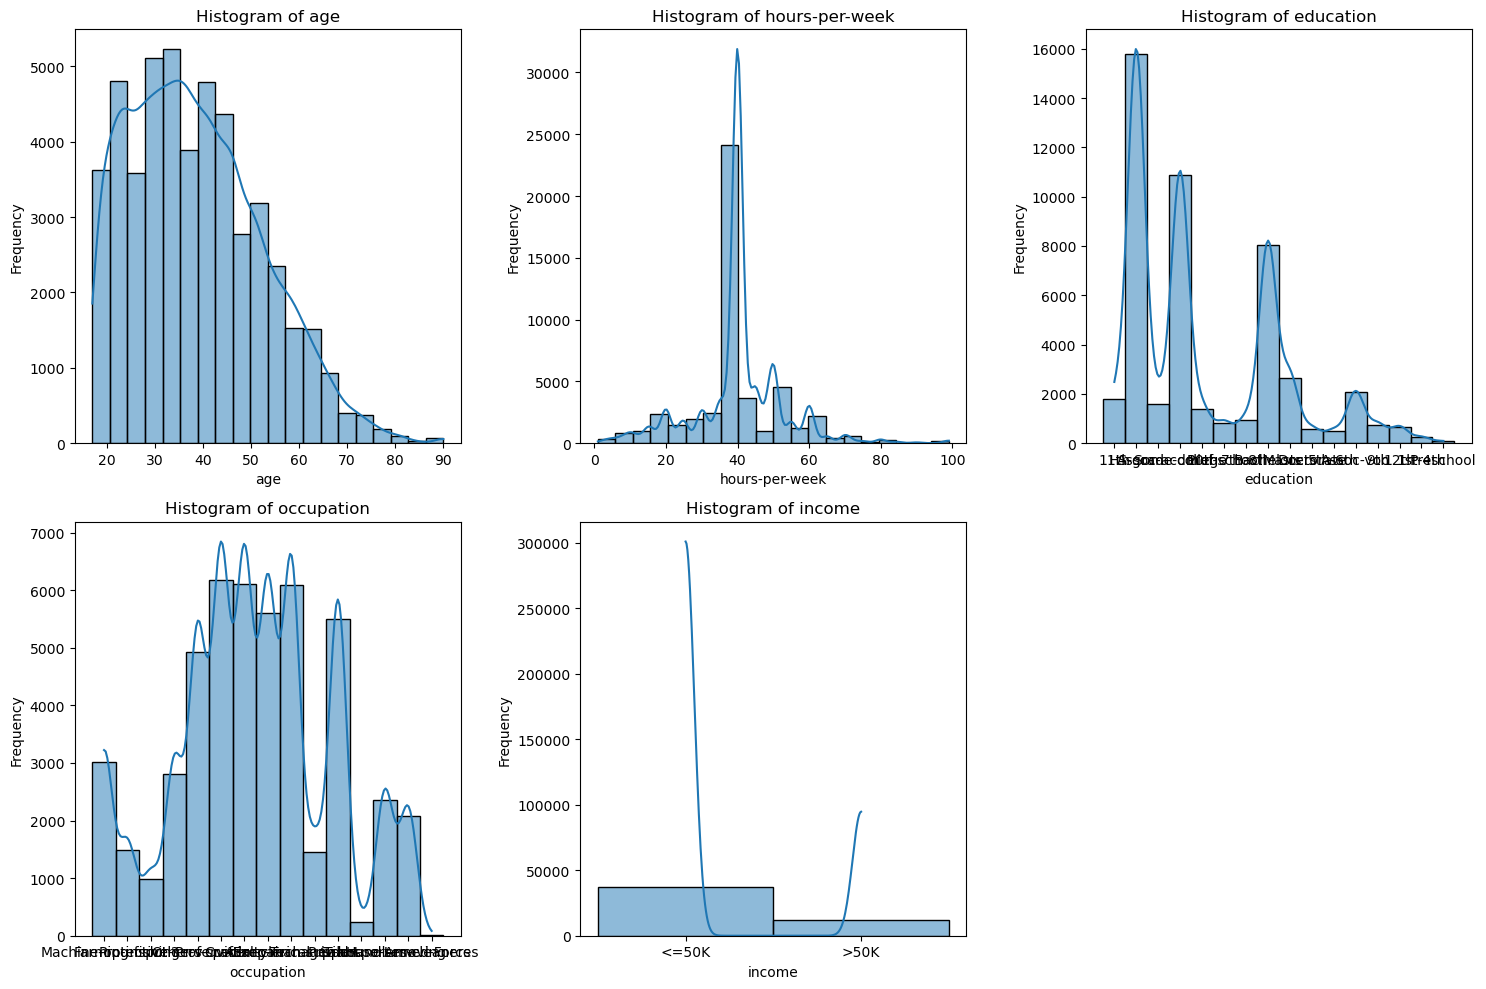

Outliers in age:
     age
193   79
234   80
899   90
926   79
951   80
Outliers in hours-per-week:
    hours-per-week
4               30
5               30
7               32
9               10
16              25
Shape of data after removing outliers: (35266, 15)


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\17077\Downloads\adult.csv'

# Read the Excel file/
data = pd.read_csv(file_path)


# List of variables to generate histograms and check for outliers
variables = ['age', 'hours-per-week', 'education', 'occupation', 'income']  

# Function to plot histograms for each variable
def plot_histograms(df, variables):
    plt.figure(figsize=(15, 10))
    for i, var in enumerate(variables, 1):
        plt.subplot(2, 3, i)  # 2x3 grid of subplots
        sns.histplot(df[var], kde=True, bins=20)
        plt.title(f"Histogram of {var}")
        plt.xlabel(var)
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Function to identify outliers using the IQR method
def find_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Plot histograms
plot_histograms(data, variables)

# Identifying outliers for each variable
outliers_dict = {}
for var in variables:
    if data[var].dtype in ['int64', 'float64']:  # Only check numeric variables for outliers
        outliers = find_outliers_iqr(data, var)
        outliers_dict[var] = outliers
        if not outliers.empty:
            print(f"Outliers in {var}:")
            print(outliers[[var]].head())  # Display the first few outliers for each variable
        else:
            print(f"No outliers in {var}.")

# Handling outliers (removing them from the dataset)
# Create a cleaned copy of the dataset
data_cleaned = data.copy()
for var in variables:
    if data[var].dtype in ['int64', 'float64']:  # For numeric variables only
        outliers = find_outliers_iqr(data, var)
        data_cleaned = data_cleaned[~data_cleaned.index.isin(outliers.index)]  # Remove outliers

# Verify the new shape of the data after removing outliers
print(f"Shape of data after removing outliers: {data_cleaned.shape}")


In [ ]:
def calculate_descriptive_stats(df, variables):
    for var in variables:
        print(f"Descriptive Statistics for {var}:")
        
        # Calculate Mean
        mean_value = df[var].mean()
        print(f"Mean: {mean_value}")
        
        # Calculate Mode
        mode_value = df[var].mode()[0]  # pandas returns mode as a series, we take the first value
        print(f"Mode: {mode_value}")
        
        # Calculate Variance
        variance_value = df[var].var()
        print(f"Variance: {variance_value}")
        
        # Calculate Standard Deviation
        std_dev_value = df[var].std()
        print(f"Standard Deviation: {std_dev_value}")
        
        # Calculate IQR
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        print(f"IQR: {IQR}")
        
        # Calculate Skewness
        skewness_value = df[var].skew()
        print(f"Skewness: {skewness_value}")
        
        # Calculate Kurtosis
        kurtosis_value = df[var].kurtosis()
        print(f"Kurtosis: {kurtosis_value}")
        
        print("\n")

# Call the function to calculate and print the descriptive statistics
calculate_descriptive_stats(data, variables)


Descriptive Statistics for age:
Mean: 38.64358543876172
Mode: 36
Variance: 187.97808266246622
Standard Deviation: 13.71050993444322
IQR: 20.0
Skewness: 0.5575803166133181
Kurtosis: -0.18426874062387766


Descriptive Statistics for hours-per-week:
Mean: 40.422382375824085
Mode: 40
Variance: 153.547885006268
Standard Deviation: 12.39144402425593
IQR: 5.0
Skewness: 0.23874965720275756
Kurtosis: 2.9510590898442954


Descriptive Statistics for education:


TypeError: Could not convert string '11thHS-gradAssoc-acdmSome-collegeSome-college10thHS-gradProf-schoolSome-college7th-8thHS-gradBachelorsHS-gradHS-gradHS-gradMastersSome-collegeHS-gradHS-gradDoctorateBachelorsSome-college7th-8thBachelorsBachelorsHS-gradHS-gradHS-gradHS-gradSome-collegeSome-college11thBachelorsSome-collegeHS-gradHS-gradBachelors5th-6th10thHS-gradMastersAssoc-vocHS-grad11thSome-collegeAssoc-voc7th-8thSome-college11thHS-gradSome-collegeHS-gradSome-collegeHS-grad9thSome-collegeHS-gradBachelorsHS-gradHS-gradBachelorsSome-collegeMastersHS-gradHS-gradBachelorsAssoc-acdmSome-collegeHS-gradHS-gradSome-collegeAssoc-vocHS-gradSome-collegeSome-college10thHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsSome-collegeHS-gradSome-collegeHS-grad11thHS-gradSome-collegeMastersBachelors7th-8thMastersBachelorsMastersHS-gradBachelors10thHS-gradHS-gradSome-collegeSome-collegeSome-college9thHS-grad10thHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeAssoc-vocHS-gradSome-collegeHS-gradHS-grad11thHS-gradBachelorsBachelorsSome-collegeSome-collegeSome-collegeHS-gradHS-gradDoctorateHS-gradHS-gradMastersSome-collegeHS-gradHS-gradDoctorateHS-gradAssoc-acdmHS-grad7th-8thHS-grad10thMastersSome-collegeHS-gradHS-gradMastersHS-gradAssoc-vocHS-gradBachelorsHS-gradSome-college11th7th-8th11thBachelorsSome-collegeHS-gradBachelorsSome-collegeBachelors11thHS-gradHS-gradBachelorsMastersSome-collegeDoctorateHS-gradHS-gradHS-gradHS-gradMastersBachelors12thMastersSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeMastersSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradBachelorsBachelorsSome-college7th-8thHS-gradSome-collegeSome-collegeProf-schoolHS-gradHS-gradSome-collegeBachelorsBachelorsBachelorsAssoc-vocBachelors7th-8thHS-gradBachelorsSome-college11thSome-collegeAssoc-vocBachelorsBachelorsHS-gradHS-grad5th-6thAssoc-vocBachelorsBachelorsHS-gradHS-gradHS-grad9thSome-collegeBachelorsHS-grad9thSome-college12thProf-schoolMastersHS-gradHS-gradAssoc-vocSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-vocBachelorsBachelorsBachelorsSome-collegeSome-collegeHS-gradHS-gradProf-schoolSome-collegeMastersSome-collegeBachelorsMastersSome-collegeHS-grad10thSome-college11thHS-grad10thSome-collegeMastersHS-gradHS-gradHS-grad11thBachelorsSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-grad10thSome-college10thSome-collegeHS-grad9thHS-gradAssoc-vocHS-gradSome-college11thSome-collegeHS-gradSome-collegeBachelorsHS-gradBachelorsBachelorsHS-gradAssoc-acdmSome-collegeSome-collegeBachelorsHS-gradSome-collegeSome-collegeSome-collegeBachelorsHS-gradSome-collegeBachelorsHS-grad1st-4thHS-gradMastersMasters11thSome-collegeDoctorateHS-gradSome-collegeHS-gradHS-gradMastersHS-grad9th10thHS-gradBachelorsHS-gradBachelors5th-6thMastersHS-gradBachelorsHS-grad7th-8thHS-gradAssoc-vocHS-gradHS-gradHS-gradSome-collegeHS-gradBachelorsBachelorsProf-schoolAssoc-acdmBachelors11thSome-collegeSome-collegeSome-collegeHS-gradProf-schoolSome-collegeSome-collegeMasters10thSome-college7th-8thHS-gradBachelorsHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradBachelorsDoctorateHS-grad11th11thHS-grad11thHS-gradHS-gradBachelorsHS-gradMastersHS-gradHS-gradHS-gradBachelorsHS-gradMastersBachelorsBachelorsAssoc-acdm11thHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeBachelors11thHS-gradHS-gradAssoc-acdm10th10thHS-gradSome-collegeProf-schoolBachelors1st-4thHS-gradSome-collegeBachelorsAssoc-vocHS-gradHS-gradSome-college11thSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeMastersBachelors10thHS-gradBachelorsHS-gradBachelorsBachelorsHS-gradSome-collegeDoctorateSome-collegeBachelorsBachelorsSome-collegeHS-gradHS-gradMastersHS-gradBachelorsSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradBachelors7th-8thHS-grad11thMastersHS-gradAssoc-vocHS-gradSome-collegeMastersHS-gradMastersSome-collegeSome-college7th-8thSome-collegeSome-collegeSome-collegeBachelorsBachelorsSome-collegeBachelorsHS-gradHS-gradHS-gradAssoc-acdmBachelorsSome-collegeAssoc-vocBachelors11thHS-grad9thSome-collegeSome-collegeHS-grad5th-6thProf-schoolSome-college9thSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeAssoc-vocHS-gradHS-grad10thHS-gradSome-collegeSome-college5th-6thHS-gradHS-gradDoctorate1st-4thBachelorsHS-gradBachelorsSome-collegeSome-collegeHS-gradBachelors11thBachelorsBachelorsBachelorsBachelorsSome-college10thHS-gradMastersHS-gradSome-collegeHS-grad11th7th-8thBachelorsBachelorsSome-collegeBachelorsBachelorsBachelorsAssoc-vocAssoc-vocHS-grad11th10thBachelorsSome-collegeSome-collegeBachelorsBachelorsBachelorsBachelorsSome-collegeHS-gradSome-collegeMastersHS-gradSome-collegeHS-grad5th-6thBachelorsAssoc-vocHS-gradBachelorsMastersHS-gradHS-gradBachelorsSome-collegeAssoc-vocHS-gradMastersAssoc-vocHS-gradBachelorsBachelorsSome-collegeHS-gradSome-college11thBachelorsHS-gradHS-grad5th-6thSome-collegeHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelorsBachelors11thSome-collegeHS-gradSome-collegeAssoc-vocBachelorsHS-gradProf-schoolSome-collegeSome-college7th-8thHS-gradHS-grad12thSome-collegeBachelorsSome-collegeAssoc-acdmHS-gradSome-collegeHS-gradBachelorsBachelorsBachelorsHS-gradHS-gradSome-collegeSome-collegeBachelorsSome-collegeHS-gradBachelorsHS-grad5th-6thMasters5th-6thHS-grad11thBachelorsMastersHS-gradHS-gradHS-gradBachelorsHS-gradHS-grad11th10thHS-gradHS-gradBachelorsSome-collegeMastersSome-collegeHS-gradHS-gradSome-college9thHS-gradHS-grad11thAssoc-acdmHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsProf-school10th10thSome-collegeHS-gradHS-gradMastersDoctorate12thHS-gradSome-collegeHS-gradAssoc-vocSome-collegeSome-collegeSome-collegeSome-collegeBachelorsHS-gradMastersSome-college9thHS-gradHS-gradAssoc-vocSome-collegeMastersSome-collegeBachelorsBachelorsSome-college11thAssoc-vocBachelorsHS-gradBachelorsAssoc-vocHS-gradBachelorsSome-college12thSome-college7th-8thHS-gradHS-gradMastersMastersBachelorsBachelorsSome-college9thSome-collegeMastersProf-schoolAssoc-vocSome-collegeBachelorsHS-grad10thSome-collegeHS-grad7th-8thHS-gradSome-collegeHS-gradHS-gradAssoc-acdmHS-gradHS-grad10thHS-gradBachelorsHS-gradHS-gradProf-schoolBachelorsHS-gradBachelorsAssoc-vocSome-collegeHS-gradBachelorsHS-gradHS-gradBachelorsHS-gradBachelorsBachelorsHS-gradBachelors11thSome-college11thHS-gradHS-gradSome-collegeSome-college7th-8thSome-collegeHS-grad11thHS-gradProf-schoolBachelorsHS-gradBachelorsPreschoolHS-gradHS-gradSome-college11thHS-gradBachelorsSome-collegeHS-gradDoctorateSome-collegeHS-grad10th10thHS-gradHS-gradBachelorsBachelorsAssoc-vocBachelorsBachelorsBachelorsBachelorsHS-grad12thHS-gradSome-collegeHS-gradBachelorsHS-gradSome-collegeProf-schoolAssoc-vocSome-collegeHS-gradHS-gradBachelorsSome-collegeSome-collegePreschoolBachelorsAssoc-acdmSome-collegeHS-gradAssoc-acdmHS-gradHS-gradSome-collegeSome-collegeAssoc-vocMastersHS-gradSome-college12thMasters10thHS-gradSome-college11th7th-8th11th9thHS-grad11thBachelors11thSome-collegeBachelorsBachelorsMastersHS-gradBachelorsProf-schoolHS-grad5th-6thSome-collegeAssoc-acdmSome-collegeBachelorsMastersHS-gradAssoc-vocHS-gradHS-grad9thBachelorsAssoc-acdmBachelors10thDoctorateAssoc-vocSome-collegeSome-collegeBachelorsHS-gradHS-gradHS-gradBachelorsHS-gradBachelorsBachelorsBachelorsBachelorsProf-schoolSome-collegeHS-gradMastersHS-gradSome-collegeSome-collegeBachelors1st-4thBachelorsHS-grad12thHS-gradHS-gradBachelorsSome-collegeHS-gradAssoc-acdmHS-gradHS-gradSome-college11thSome-collegeDoctorateHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradBachelors9thHS-gradSome-collegeSome-collegeSome-collegeBachelorsProf-schoolBachelorsSome-collegeHS-gradHS-gradMastersAssoc-acdm10th7th-8thAssoc-vocBachelorsHS-gradSome-collegeHS-gradBachelorsSome-collegeSome-college10thHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradDoctorate7th-8thSome-college10thBachelorsHS-gradHS-gradHS-grad11thSome-collegeHS-grad11thSome-collegeAssoc-vocHS-gradSome-college1st-4th5th-6th12thProf-schoolHS-gradHS-gradAssoc-acdmHS-grad7th-8thSome-collegeMastersSome-college10th11thHS-gradBachelors9thHS-gradProf-schoolBachelorsHS-gradAssoc-vocHS-gradBachelorsHS-gradSome-collegeBachelors11thSome-collegeBachelorsBachelorsProf-schoolSome-collegeSome-college11th10thSome-collegeBachelorsBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradAssoc-acdmAssoc-vocMastersAssoc-acdmHS-grad10thSome-college7th-8thHS-gradBachelorsBachelorsAssoc-vocHS-gradHS-gradBachelorsSome-collegeSome-collegeBachelorsSome-collegeBachelorsHS-gradBachelorsBachelorsPreschoolSome-collegeAssoc-vocSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradMastersDoctorateMastersSome-college11th11thAssoc-voc10thAssoc-acdm11thSome-collegeBachelorsHS-gradMasters10thHS-gradMastersSome-collegeAssoc-acdm7th-8thPreschoolAssoc-voc10thHS-grad7th-8thSome-collegeAssoc-acdmHS-gradHS-gradMastersBachelorsSome-college11th11th11thMastersMasters10thHS-gradBachelors7th-8thHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradBachelors10thHS-gradMastersSome-college7th-8thHS-grad9th5th-6th9thSome-collegeBachelorsMastersHS-gradHS-gradBachelorsAssoc-voc7th-8th10th9thSome-collegeHS-gradBachelors7th-8thBachelorsHS-gradBachelorsHS-gradHS-grad10thSome-collegeBachelorsHS-gradSome-collegeHS-gradProf-schoolBachelorsHS-grad11th10thSome-collegeBachelorsHS-gradBachelorsSome-collegeProf-schoolHS-grad5th-6th7th-8thBachelorsSome-collegeBachelorsSome-collegeHS-gradMastersHS-gradHS-gradMastersHS-gradSome-collegeSome-collegeSome-collegeSome-collegeHS-grad10thAssoc-acdmSome-collegeMastersBachelorsBachelors5th-6thProf-schoolDoctorateSome-collegeAssoc-acdmAssoc-vocHS-gradDoctorateHS-gradSome-collegeBachelors11th12thHS-gradProf-schoolSome-collegeAssoc-acdmHS-grad7th-8thHS-gradSome-college10thHS-grad12thSome-collegeMastersBachelorsHS-gradBachelorsSome-college1st-4thSome-collegeHS-grad11thProf-schoolHS-gradSome-college11thBachelorsHS-gradHS-gradHS-gradMastersMastersSome-college10thProf-schoolSome-collegeHS-gradSome-collegeAssoc-vocMastersHS-gradSome-college12thAssoc-acdmAssoc-acdm10thSome-collegeBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-acdmSome-collegeSome-collegeAssoc-vocBachelorsBachelorsSome-collegeSome-collegeHS-gradHS-gradSome-collegeAssoc-voc10th7th-8thBachelorsHS-gradHS-gradBachelorsMastersBachelors9thBachelorsHS-gradBachelors10thBachelorsBachelorsBachelorsBachelorsSome-collegeHS-grad12thBachelorsHS-gradMastersSome-collegeHS-gradSome-collegeSome-collegeHS-gradMastersHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeSome-college10thSome-collegeSome-collegeProf-schoolHS-gradSome-collegeSome-collegeHS-gradSome-college1st-4thBachelorsSome-college9thAssoc-acdmHS-grad10thHS-gradHS-gradAssoc-vocBachelorsSome-collegeSome-collegeHS-gradBachelorsMastersHS-gradMastersHS-grad11thHS-gradHS-gradMastersSome-collegeHS-gradBachelorsHS-grad11thHS-gradSome-college7th-8thBachelorsSome-college11thSome-collegeBachelorsAssoc-acdm11thBachelors11thBachelorsHS-grad7th-8thSome-collegeMastersHS-gradAssoc-vocSome-college11thMastersAssoc-vocBachelors7th-8thHS-gradBachelors5th-6thAssoc-acdmBachelors10thSome-college7th-8thBachelorsSome-collegeSome-collegeDoctorateMastersMastersAssoc-vocBachelorsBachelorsSome-collegeHS-gradHS-grad11thHS-gradBachelorsSome-collegeSome-collegeSome-collegeMastersDoctorateMastersSome-college9thBachelorsBachelors11thSome-college10thHS-gradHS-gradSome-collegeAssoc-voc10thSome-collegeSome-collegeSome-collegeSome-college11thBachelorsProf-schoolMasters9thAssoc-vocHS-gradAssoc-voc11th11thMastersHS-gradAssoc-acdm1st-4th11th11thBachelors7th-8thBachelorsAssoc-vocBachelors7th-8thHS-gradProf-schoolHS-gradSome-collegeSome-collegeSome-collegeSome-college5th-6thBachelorsMastersMastersHS-gradMastersHS-gradAssoc-vocHS-gradBachelorsSome-collegeHS-gradDoctorateHS-gradBachelorsAssoc-acdmHS-grad10thMastersHS-gradBachelors10thBachelorsBachelorsMastersSome-collegeAssoc-vocAssoc-acdm10thHS-gradHS-gradMastersSome-collegeBachelorsHS-gradHS-gradAssoc-acdmBachelorsAssoc-vocHS-gradSome-collegeBachelorsSome-collegeMastersAssoc-acdm11thHS-gradHS-gradBachelorsSome-collegeMastersSome-collegeHS-gradMastersHS-gradSome-collegeHS-gradAssoc-vocAssoc-acdmSome-college5th-6thSome-college9thProf-school9thHS-gradMastersHS-gradSome-collegeHS-gradHS-gradBachelorsBachelorsHS-gradBachelorsMastersHS-gradAssoc-vocSome-collegeBachelorsMastersBachelorsHS-gradPreschoolSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradBachelorsMastersPreschoolBachelorsSome-collegeSome-collegeAssoc-acdmSome-collegeSome-collegeAssoc-acdmSome-collegeHS-gradHS-gradHS-gradHS-grad7th-8th10thDoctorateHS-gradBachelorsHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradBachelorsSome-collegeAssoc-voc10thHS-gradBachelors5th-6thAssoc-vocAssoc-vocSome-collegeSome-collegeHS-gradMastersSome-collegeBachelorsHS-gradAssoc-vocSome-college12thBachelorsSome-collegeHS-grad11th9thHS-gradBachelorsSome-collegeSome-collegeSome-collegeHS-gradDoctorateBachelorsBachelorsAssoc-vocHS-gradSome-college7th-8thBachelorsHS-gradBachelorsHS-gradMasters11thHS-gradHS-gradBachelorsBachelors9thHS-gradSome-collegeHS-grad1st-4th11thHS-gradSome-collegeHS-gradSome-collegeBachelors5th-6thHS-gradBachelorsAssoc-vocBachelorsSome-collegeBachelorsHS-gradBachelorsDoctorateHS-gradSome-collegeAssoc-vocSome-collegeSome-collegeBachelorsProf-schoolSome-college7th-8thHS-gradSome-collegeHS-gradSome-collegeSome-collegeBachelorsBachelorsHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelors11thSome-collegeSome-collegeSome-collegeHS-gradBachelorsHS-gradHS-gradHS-grad11thHS-gradSome-collegeBachelorsAssoc-vocSome-collegeHS-gradSome-collegeSome-collegeSome-collegeBachelorsSome-college9thSome-collegeSome-collegeSome-collegeAssoc-acdmAssoc-acdmHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeSome-collegeHS-grad5th-6th12thSome-collegeHS-gradSome-college9th5th-6thSome-collegeBachelorsBachelors5th-6thSome-collegeSome-collegeBachelorsHS-gradSome-collegeSome-collegeSome-collegeBachelorsHS-gradHS-gradHS-gradHS-grad11thHS-gradSome-collegeHS-gradSome-collegeMastersHS-gradBachelorsAssoc-acdmHS-gradHS-gradHS-gradHS-gradHS-grad9thHS-gradAssoc-vocHS-gradProf-schoolSome-collegeBachelorsAssoc-vocBachelorsBachelorsBachelorsMastersBachelorsAssoc-vocHS-gradMastersMastersMastersMastersHS-grad11thBachelorsBachelorsSome-college11thBachelorsSome-college10th7th-8thHS-grad9thBachelorsHS-gradAssoc-acdmHS-gradHS-gradBachelorsBachelors11thHS-gradSome-collegeHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelorsDoctorateHS-gradSome-collegeBachelorsBachelorsHS-grad11thSome-collegeAssoc-acdmHS-gradHS-gradHS-gradSome-collegeHS-gradMastersBachelorsProf-schoolHS-gradBachelorsHS-gradSome-collegeSome-collegeBachelorsSome-collegeBachelorsHS-gradMastersHS-grad9th11thHS-grad10th7th-8thHS-gradHS-gradHS-grad11thSome-collegeHS-gradHS-gradBachelors9thBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeHS-gradAssoc-acdmSome-collegeBachelorsHS-gradMastersMastersProf-schoolHS-gradSome-collegeSome-collegeBachelorsHS-gradAssoc-acdmHS-gradHS-gradHS-gradDoctorateSome-college9thBachelorsHS-gradHS-gradMasters11thHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeBachelorsAssoc-voc7th-8thHS-gradBachelorsAssoc-acdmBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradBachelorsSome-collegeBachelorsSome-collegeBachelorsSome-collegeBachelorsSome-collegeBachelorsAssoc-acdmSome-college10thAssoc-acdm7th-8th7th-8thSome-collegeHS-grad5th-6thHS-gradSome-collegeBachelorsBachelorsSome-collegeBachelorsHS-gradHS-gradAssoc-vocAssoc-vocHS-grad10thBachelorsBachelorsHS-grad10thHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsSome-collegeMastersSome-college5th-6thBachelorsBachelorsHS-grad5th-6thHS-gradHS-gradSome-collegeBachelorsSome-collegeBachelorsSome-collegeHS-gradSome-collegeHS-grad10thSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsMastersBachelorsHS-grad10thHS-gradBachelorsHS-gradAssoc-vocBachelorsHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradMastersSome-collegeBachelorsHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-collegeSome-collegeAssoc-acdm11thHS-grad10thHS-gradHS-grad1st-4th12thBachelorsSome-collegeHS-gradSome-collegeSome-collegeHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradSome-collegeHS-gradDoctorateSome-collegeHS-gradMastersSome-collegeBachelorsSome-collegeHS-gradAssoc-acdmHS-gradHS-gradAssoc-vocMastersProf-schoolAssoc-acdmHS-gradBachelors11thBachelorsHS-gradAssoc-acdmSome-college10thHS-gradBachelorsSome-college11thBachelorsBachelorsHS-gradBachelorsSome-collegeSome-college1st-4thSome-college7th-8thSome-collegeHS-gradSome-collegeProf-schoolBachelorsMastersBachelorsHS-grad10th10thBachelors9thSome-collegeBachelorsMastersBachelorsHS-gradHS-gradHS-gradAssoc-voc7th-8thHS-grad11thHS-gradSome-college7th-8thSome-collegeAssoc-vocBachelorsBachelorsHS-grad7th-8thAssoc-acdmAssoc-voc5th-6thHS-gradHS-gradBachelorsBachelorsHS-gradBachelorsBachelorsBachelorsHS-gradProf-school10thBachelorsSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradBachelorsHS-gradSome-collegeAssoc-vocSome-collegeProf-schoolMastersHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradBachelorsBachelors5th-6thHS-gradHS-grad7th-8thBachelorsSome-collegeMastersHS-gradSome-collegeBachelorsAssoc-vocBachelorsBachelorsHS-gradHS-gradHS-gradAssoc-acdmHS-gradHS-grad11th11thHS-gradSome-collegeSome-college9thSome-collegeMasters11thMastersHS-gradHS-gradBachelorsHS-gradMastersHS-gradHS-gradSome-collegeHS-grad11thSome-collegeMastersMastersSome-collegeHS-gradHS-gradHS-gradBachelorsHS-gradBachelorsBachelorsAssoc-vocBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeHS-grad11thHS-grad5th-6th9thSome-collegeHS-gradHS-gradHS-gradProf-schoolBachelorsHS-gradHS-gradSome-collegeAssoc-acdmBachelorsSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeMastersHS-gradBachelorsBachelorsHS-gradHS-gradAssoc-vocAssoc-vocSome-collegeBachelorsProf-schoolProf-schoolBachelorsMastersHS-gradProf-school10th10thHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsMastersSome-collegeHS-gradAssoc-acdmHS-gradHS-gradBachelorsSome-collegeSome-collegeSome-collegeHS-grad5th-6thHS-gradBachelors5th-6thHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsSome-collegeHS-grad9thHS-gradSome-collegeBachelorsSome-collegeSome-collegeBachelorsBachelorsSome-collegeProf-schoolSome-college9thSome-collegeHS-gradHS-gradHS-grad5th-6th11thSome-collegeHS-gradBachelorsSome-collegeSome-collegeHS-gradSome-collegeBachelorsMastersMastersSome-collegeHS-gradHS-gradMastersBachelorsMastersProf-schoolSome-collegeHS-grad12thHS-gradSome-collegeSome-collegeHS-grad10thHS-gradHS-gradMastersBachelorsMastersHS-gradAssoc-acdmHS-gradHS-gradAssoc-vocSome-collegeBachelorsHS-gradHS-gradAssoc-acdmBachelorsSome-collegeAssoc-acdmBachelorsDoctorateSome-collegeHS-gradBachelorsSome-collegeSome-college11thHS-gradHS-gradBachelorsBachelorsHS-gradBachelorsHS-gradHS-gradBachelorsBachelorsHS-gradMastersHS-gradSome-collegeSome-collegeBachelorsHS-gradBachelorsHS-grad11thAssoc-acdmBachelorsMastersBachelorsHS-grad10thSome-collegeHS-gradBachelorsSome-college11thBachelors10thBachelorsBachelorsSome-college10thHS-gradProf-schoolHS-gradBachelorsSome-collegeAssoc-acdmSome-collegeHS-grad11thHS-gradMastersSome-collegeBachelorsSome-college10thBachelorsSome-collegeAssoc-voc10thSome-collegeAssoc-vocBachelorsBachelorsSome-collegeMastersSome-collegeBachelorsSome-collegeSome-collegeMastersHS-gradSome-collegeBachelorsBachelorsAssoc-vocSome-collegeHS-gradHS-gradBachelorsSome-collegeProf-schoolHS-gradHS-gradBachelorsSome-collegePreschool10thSome-collegeAssoc-vocHS-grad1st-4thMastersHS-gradHS-gradMastersHS-gradBachelorsBachelorsAssoc-acdmSome-collegeHS-gradAssoc-acdmHS-gradSome-collegeHS-gradAssoc-acdmBachelorsSome-collegeProf-schoolSome-collegeSome-collegeSome-collegeBachelorsHS-gradHS-gradBachelorsBachelorsAssoc-vocHS-grad11th5th-6thHS-grad5th-6th11thSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeAssoc-acdmBachelors5th-6thHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradMastersSome-collegeMastersHS-gradBachelorsMastersDoctorateMastersSome-collegeHS-gradMastersBachelorsMastersHS-grad10thHS-gradSome-collegeBachelorsHS-gradHS-gradSome-college10thMastersSome-collegeBachelorsAssoc-acdmSome-collegeHS-gradAssoc-acdmAssoc-vocHS-grad10th10thHS-gradAssoc-vocSome-college11thBachelorsBachelorsSome-collegeHS-gradHS-gradSome-collegeMastersHS-gradHS-gradSome-collegeSome-collegePreschoolProf-schoolHS-gradHS-gradHS-gradHS-gradHS-grad11thHS-gradAssoc-vocHS-grad10thAssoc-acdmHS-gradMastersBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsMastersBachelorsSome-collegeMastersSome-collegeSome-collegeHS-gradAssoc-vocBachelors9thBachelorsMastersBachelorsMastersSome-collegeHS-grad11thAssoc-vocProf-schoolAssoc-acdmBachelorsAssoc-acdm7th-8thSome-collegeHS-gradSome-college11thSome-collegeBachelorsSome-collegeSome-collegeBachelorsHS-gradBachelors10thSome-collegeBachelorsAssoc-acdmHS-gradHS-gradHS-gradProf-schoolAssoc-vocSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradAssoc-vocSome-collegeBachelors10thHS-gradMastersHS-grad11thSome-collegeBachelors7th-8thMastersHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsBachelorsSome-collegeBachelorsHS-gradBachelors7th-8thSome-collegeHS-gradBachelorsSome-collegeMastersDoctorateSome-collegeBachelorsHS-grad11thSome-collegeSome-collegeHS-gradHS-gradMastersBachelorsHS-gradMastersHS-gradHS-gradSome-collegeHS-gradHS-gradAssoc-vocHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradSome-college7th-8thHS-gradAssoc-acdmSome-collegeSome-collegeAssoc-acdm9thHS-gradMasters10th12thSome-collegeSome-collegeHS-gradHS-gradSome-college11thBachelorsHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeSome-collegeAssoc-vocBachelorsBachelorsSome-collegeHS-gradMastersHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-college12thHS-grad12thBachelorsBachelorsSome-collegeMastersBachelorsHS-gradHS-grad11th10thBachelorsHS-gradBachelors11thSome-collegeBachelorsBachelors7th-8thMastersHS-gradHS-gradMastersHS-grad10th7th-8thBachelorsAssoc-vocBachelorsBachelors9thMasters11thMastersDoctorateHS-gradAssoc-vocMastersSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsSome-collegeBachelorsBachelorsAssoc-acdm9thHS-gradHS-gradProf-schoolBachelorsBachelorsSome-collegeHS-gradBachelors10thSome-collegeMastersMastersHS-gradHS-gradHS-gradHS-gradBachelors7th-8thSome-collegeHS-gradSome-collegeAssoc-voc10thBachelorsHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-collegeMastersHS-gradHS-gradSome-collegeAssoc-acdmBachelorsBachelorsHS-gradMastersSome-collegeHS-gradHS-gradBachelorsSome-collegeAssoc-acdmBachelorsHS-gradBachelorsMastersHS-gradBachelors11thHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradAssoc-acdmAssoc-acdm11thHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeSome-collegeAssoc-vocHS-gradHS-gradSome-collegeBachelorsSome-collegeAssoc-vocHS-grad11th12th7th-8thHS-gradHS-grad11thBachelorsHS-grad10thMastersHS-gradBachelorsMastersBachelorsBachelorsSome-college1st-4thSome-collegeHS-gradHS-gradSome-collegeSome-college10thSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsSome-college11thSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradAssoc-vocHS-gradHS-gradSome-collegeHS-gradSome-collegeBachelorsSome-collegeHS-grad12thSome-collegeSome-collegeHS-gradBachelorsHS-grad10thBachelorsBachelorsHS-gradMastersHS-gradSome-college11thHS-gradHS-gradMastersHS-gradHS-gradSome-collegeHS-gradHS-grad5th-6thSome-collegeAssoc-vocHS-gradHS-grad7th-8thHS-gradBachelorsBachelorsSome-collegeHS-gradHS-gradAssoc-vocHS-grad11thHS-gradBachelorsHS-gradHS-gradSome-collegeAssoc-vocSome-collegeHS-gradSome-college11thHS-gradBachelorsHS-gradBachelors7th-8thBachelorsSome-collegeHS-gradHS-gradHS-gradHS-grad10thBachelors10thSome-collegeSome-college5th-6thBachelorsSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeHS-grad12thAssoc-vocSome-collegeAssoc-acdmSome-college11thHS-gradHS-gradMastersSome-collegeBachelorsHS-gradDoctorateMastersAssoc-acdmSome-collegeAssoc-acdm10thSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeBachelorsAssoc-vocMasters10th7th-8thSome-collegeBachelorsBachelorsHS-grad11thMastersSome-collegeSome-collegeProf-schoolSome-college10thAssoc-vocHS-gradAssoc-vocHS-gradSome-collegeHS-grad9th7th-8thBachelorsHS-gradAssoc-vocBachelorsSome-collegeBachelorsMasters11thHS-gradHS-gradDoctorateBachelorsHS-gradMastersHS-gradHS-gradHS-gradHS-gradAssoc-vocSome-collegeMastersSome-collegeBachelorsSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradAssoc-acdm7th-8th9thMastersHS-grad9thHS-gradHS-gradHS-gradMasters5th-6thBachelorsSome-college5th-6th5th-6thHS-gradAssoc-vocSome-collegeAssoc-acdmBachelorsHS-gradSome-college7th-8th10thSome-collegeHS-gradSome-collegeSome-collegeMastersAssoc-acdm11thHS-gradAssoc-acdm11thSome-college11thHS-gradAssoc-acdmHS-gradHS-gradHS-gradAssoc-vocHS-gradHS-gradHS-gradHS-gradSome-college10thAssoc-vocSome-collegeSome-collegeHS-gradBachelorsHS-gradHS-gradProf-schoolBachelorsHS-gradBachelorsBachelorsSome-collegeHS-gradSome-collegeSome-collegeHS-gradSome-college10th7th-8thPreschool7th-8thBachelorsProf-schoolSome-collegeHS-gradHS-gradHS-gradBachelors10thBachelorsProf-schoolAssoc-acdmSome-collegeSome-college7th-8thHS-grad10thBachelorsBachelorsBachelors11thSome-collegeSome-collegeSome-collegeHS-gradMastersHS-grad12thHS-gradAssoc-voc12thHS-gradSome-collegeAssoc-acdmHS-gradSome-collegeAssoc-vocHS-gradAssoc-acdmAssoc-acdmAssoc-voc9thBachelorsHS-gradMastersBachelorsHS-gradHS-grad7th-8thHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeBachelorsSome-collegeHS-gradSome-collegeBachelorsHS-gradDoctorate11thSome-collegeHS-grad12th11thSome-collegeSome-college11thAssoc-vocSome-collegeMastersBachelorsHS-gradHS-gradHS-gradSome-collegeBachelors5th-6thHS-gradHS-gradSome-collegeBachelors12thSome-collegeHS-gradHS-gradHS-gradHS-gradHS-grad7th-8thHS-gradAssoc-voc10thHS-gradMastersSome-collegeHS-gradSome-collegeBachelorsAssoc-vocSome-collegeAssoc-vocHS-grad11th1st-4thHS-gradSome-collegeMastersHS-gradSome-college12thHS-gradHS-gradSome-collegeBachelorsSome-collegeSome-collegeHS-gradAssoc-acdm10thMastersHS-gradBachelorsSome-collegeSome-collegeAssoc-vocHS-gradHS-grad7th-8thSome-collegeHS-gradBachelorsSome-collegeMastersHS-grad1st-4thSome-college7th-8thHS-gradHS-gradBachelors9thHS-gradSome-college11thHS-gradBachelorsHS-grad10thMastersSome-collegeAssoc-voc10thHS-gradMastersSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelors12thBachelorsBachelorsHS-gradHS-grad10thHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsHS-grad9thHS-grad11thHS-gradSome-college7th-8thMastersBachelorsHS-gradAssoc-vocMastersBachelorsBachelors11thHS-gradSome-collegeHS-gradHS-grad11thHS-gradHS-grad12thSome-collegeHS-gradSome-collegeMastersBachelorsSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-collegeHS-grad10thAssoc-acdmHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradMastersBachelorsHS-gradBachelorsBachelorsAssoc-vocBachelorsHS-grad12thBachelorsBachelorsProf-schoolHS-gradBachelors11thMastersHS-gradHS-gradAssoc-vocSome-collegeMasters10thHS-gradBachelorsHS-gradBachelors9thHS-gradSome-collegeAssoc-acdmHS-gradHS-gradAssoc-vocBachelorsSome-collegeDoctorateBachelorsHS-gradHS-grad10thHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-gradHS-grad11thBachelorsHS-gradAssoc-acdmBachelorsMasters10thHS-gradAssoc-acdmHS-gradBachelorsHS-gradHS-gradBachelorsHS-grad11thAssoc-vocSome-collegeHS-gradBachelorsBachelorsSome-collegeBachelorsSome-collegeSome-collegeBachelorsHS-gradSome-collegeSome-collegeHS-gradSome-collegeSome-college7th-8thHS-gradBachelorsMastersHS-gradSome-collegeHS-grad7th-8thHS-gradSome-collegeHS-gradSome-collegeMastersAssoc-vocSome-collegeHS-gradSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeSome-collegeBachelorsSome-collegeBachelorsBachelorsBachelors10thBachelorsHS-gradHS-gradSome-collegeBachelorsAssoc-vocAssoc-vocAssoc-vocBachelorsAssoc-acdmSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradSome-college11thSome-collegeHS-gradBachelorsSome-collegeSome-collegeBachelorsSome-collegeAssoc-vocHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradMastersSome-collegeHS-gradBachelorsSome-college10thHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradSome-collegeHS-gradBachelors5th-6thHS-gradSome-collegeAssoc-vocHS-grad11thHS-gradSome-collegeBachelorsSome-collegeSome-collegeBachelorsHS-gradSome-collegeAssoc-vocHS-gradSome-collegeBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradAssoc-vocBachelorsAssoc-vocAssoc-vocBachelorsSome-collegeAssoc-vocHS-gradBachelorsAssoc-vocHS-gradHS-gradMastersHS-gradSome-collegeSome-collegeHS-gradMastersSome-collegeMastersHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradBachelorsMastersHS-gradAssoc-vocSome-collegeBachelorsSome-collegeHS-grad11thHS-gradHS-gradMastersHS-gradHS-gradSome-collegeHS-gradSome-collegeAssoc-acdmHS-gradHS-gradBachelorsBachelorsHS-gradMastersSome-college12thSome-collegeHS-gradProf-school5th-6thHS-gradAssoc-acdmSome-collegeSome-collegeHS-grad9thSome-collegeSome-collegeSome-college7th-8th9th10thMastersHS-gradSome-collegeHS-gradHS-grad7th-8thHS-gradBachelorsBachelorsBachelorsHS-gradAssoc-vocSome-collegeAssoc-vocMastersSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeSome-collegeBachelorsHS-gradBachelorsAssoc-vocHS-gradSome-collegeMastersPreschoolHS-grad11thHS-gradAssoc-vocBachelorsHS-gradBachelorsSome-collegeBachelorsSome-collegeSome-college7th-8thHS-gradBachelorsHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsAssoc-vocMastersSome-collegeSome-collegeSome-college5th-6thHS-gradAssoc-vocHS-gradHS-gradBachelorsHS-gradBachelors12thHS-gradAssoc-voc9th7th-8thHS-gradHS-gradAssoc-vocHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-grad11thHS-gradHS-gradSome-collegeAssoc-vocHS-gradHS-gradBachelors9thSome-collegeHS-gradSome-collegeHS-grad11thHS-grad11thHS-gradSome-collegeSome-collegeSome-collegeSome-college9thHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-college12thHS-gradBachelorsHS-gradHS-gradAssoc-vocSome-college11thHS-grad12thSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-collegeBachelors10thHS-gradHS-grad10thBachelorsAssoc-acdmHS-grad11thMastersHS-gradHS-gradHS-gradBachelorsHS-gradBachelorsAssoc-vocBachelorsSome-college7th-8thSome-collegeAssoc-acdmHS-gradHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradSome-college12thBachelorsHS-gradSome-college9thSome-collegeAssoc-voc9th9thSome-collegeSome-collegeHS-gradBachelorsAssoc-vocSome-collegeHS-gradHS-gradMastersHS-gradAssoc-vocSome-collegeSome-collegeSome-collegeHS-gradMastersBachelorsSome-collegeSome-collegeHS-gradSome-college7th-8th10thAssoc-vocSome-collegeAssoc-acdmSome-collegeMastersHS-gradSome-collegeMastersSome-collegeHS-gradHS-grad11thProf-schoolSome-college11thHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-grad12thHS-grad5th-6thSome-college12thHS-gradDoctorate10thHS-grad11thHS-grad7th-8thDoctorateBachelorsSome-collegeBachelorsHS-gradSome-collegeHS-gradAssoc-vocHS-gradSome-collegeHS-gradHS-gradBachelorsSome-collegeHS-gradSome-collegeHS-gradSome-collegeBachelors11thSome-collegeBachelorsAssoc-acdmBachelors7th-8thMastersBachelorsSome-collegeBachelorsHS-gradProf-schoolBachelorsBachelorsBachelorsDoctorateSome-collegeBachelors10thSome-collegeHS-grad11thHS-gradHS-gradHS-gradHS-gradBachelorsBachelorsSome-collegeBachelorsSome-collegeMastersAssoc-vocBachelorsSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-grad11thHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-gradSome-collegeDoctorateDoctorateHS-grad7th-8thBachelors10thBachelorsHS-gradHS-gradAssoc-acdmHS-grad9thBachelorsHS-gradSome-collegeSome-collegeBachelorsHS-gradBachelorsSome-college11thBachelorsSome-collegeHS-gradHS-grad12thBachelorsSome-collegeMasters11thSome-collegeSome-collegeHS-grad11thHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-grad9thHS-gradSome-college5th-6th12thSome-collegeHS-gradSome-collegeSome-college11thHS-gradHS-gradBachelors9thSome-collegeHS-gradSome-college10thAssoc-acdmBachelors5th-6thHS-gradHS-gradSome-collegeSome-collegeSome-collegeSome-collegeHS-gradHS-gradAssoc-vocSome-collegeHS-gradBachelorsMastersHS-gradAssoc-vocBachelorsSome-collegeHS-gradSome-collegeHS-gradProf-schoolBachelorsSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeMastersHS-gradSome-college12thHS-gradHS-grad11thBachelorsHS-gradSome-collegeBachelors5th-6thSome-collegeAssoc-voc11thBachelorsHS-grad10thHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradBachelorsBachelorsBachelorsHS-gradHS-gradMastersHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-grad7th-8thMasters11thSome-collegeHS-gradMastersHS-gradMastersHS-grad11thBachelorsDoctorateAssoc-vocSome-collegeHS-gradHS-gradAssoc-vocSome-college10thSome-collegeAssoc-vocHS-grad1st-4thHS-gradSome-collegeHS-gradHS-gradBachelorsSome-collegeSome-collegeHS-gradHS-gradMastersBachelorsBachelorsSome-collegeBachelorsMasters1st-4thHS-gradBachelorsSome-collegeSome-collegeHS-gradHS-gradDoctorate11thSome-collegeBachelorsBachelorsProf-schoolBachelorsSome-collegeBachelorsBachelorsBachelorsSome-collegeAssoc-vocHS-gradProf-schoolSome-collegeBachelorsMastersMastersMastersAssoc-vocHS-gradHS-gradHS-gradSome-collegeDoctorate7th-8thAssoc-vocHS-gradMastersBachelorsHS-gradAssoc-vocSome-collegeSome-collegeBachelorsAssoc-vocBachelorsHS-gradBachelorsSome-collegeAssoc-vocSome-collegeProf-schoolSome-collegeSome-collegeSome-collegeSome-collegeHS-gradMastersBachelorsHS-gradHS-grad1st-4thHS-gradHS-gradHS-gradHS-gradHS-gradBachelors11thMasters9thHS-gradSome-collegeHS-grad7th-8thHS-gradHS-gradHS-gradHS-gradHS-grad11thSome-college7th-8thSome-collegeAssoc-acdmAssoc-vocHS-gradSome-collegeHS-gradMastersHS-grad7th-8th11thDoctorateDoctorateSome-collegeHS-gradBachelors11thSome-collegeHS-gradSome-collegeSome-collegeAssoc-voc10thSome-collegeSome-collegeSome-collegeHS-gradSome-college11th10thSome-collegeHS-gradAssoc-acdmAssoc-acdmSome-collegeHS-gradBachelorsBachelorsHS-gradHS-grad7th-8thSome-collegeHS-gradBachelorsSome-collegeBachelorsBachelors12thSome-college7th-8thSome-collegeAssoc-vocHS-gradHS-gradHS-gradAssoc-vocHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradHS-grad10thSome-collegeSome-collegeSome-collegeSome-collegeHS-gradMastersSome-college9thBachelorsSome-collegeSome-collegeMasters12thHS-gradSome-collegeSome-collegeHS-gradSome-collegeAssoc-vocBachelorsSome-collegeSome-collegeAssoc-vocSome-collegeHS-gradHS-grad11thHS-gradBachelorsMastersHS-gradMastersHS-grad12thSome-collegeHS-gradHS-gradSome-collegeBachelors10thMastersDoctorateBachelors10thBachelorsBachelorsBachelorsBachelorsHS-gradHS-gradBachelors7th-8thAssoc-acdmSome-collegeProf-schoolBachelorsHS-gradHS-gradMastersHS-gradSome-collegeHS-gradHS-gradHS-grad11thSome-collegeHS-gradBachelors9thSome-collegeBachelors11th7th-8thBachelorsBachelorsHS-gradSome-collegeAssoc-acdmHS-grad11thSome-collegeBachelorsBachelorsMastersSome-collegeHS-gradAssoc-acdmHS-gradAssoc-acdmBachelorsSome-collegeAssoc-acdmDoctorateAssoc-vocBachelorsSome-collegeHS-gradBachelorsHS-gradSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeHS-gradBachelorsHS-gradBachelors10th7th-8thAssoc-vocSome-collegeBachelors12thSome-collegeHS-gradBachelorsHS-grad7th-8thHS-gradSome-collegeSome-collegeHS-gradAssoc-acdmHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsAssoc-acdmBachelors10th11thHS-gradAssoc-voc11thBachelorsSome-collegeHS-gradSome-collegeHS-grad11th10thAssoc-voc1st-4th10thSome-collegeHS-grad11thSome-collegeMastersMastersBachelorsHS-gradSome-collegeHS-grad11thHS-gradHS-gradMastersSome-collegeSome-collegeBachelors7th-8thHS-gradBachelorsMastersHS-gradHS-grad9thHS-gradHS-gradSome-collegeAssoc-acdmHS-gradSome-collegeBachelorsSome-collegeHS-gradHS-gradAssoc-vocMastersSome-collegeHS-gradSome-collegeBachelorsBachelorsHS-grad7th-8thHS-gradBachelorsHS-grad11thBachelorsAssoc-acdmAssoc-acdmMastersBachelorsAssoc-vocSome-collegeDoctorate11thHS-gradHS-grad11thSome-collegeHS-gradHS-gradSome-collegeSome-college12thBachelorsHS-gradSome-college12thBachelorsHS-gradSome-college12thHS-gradBachelorsHS-gradMastersAssoc-vocHS-gradHS-grad9thHS-gradBachelorsSome-collegeAssoc-acdmHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradAssoc-vocHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradSome-collegeAssoc-vocSome-collegeHS-gradBachelorsSome-collegeSome-college10thHS-gradHS-grad11th10thMastersSome-collegeMastersMastersHS-gradMastersHS-gradHS-gradBachelorsHS-grad10thHS-gradHS-gradHS-gradHS-grad9thMastersBachelorsAssoc-voc10thBachelorsHS-gradHS-gradHS-gradHS-gradMastersBachelors10thMastersBachelorsSome-collegeBachelors5th-6thBachelorsHS-gradAssoc-vocBachelorsBachelorsHS-gradHS-gradBachelorsAssoc-vocSome-college7th-8thMastersSome-collegeHS-gradBachelorsSome-collegePreschoolHS-gradHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsSome-college12th11thMastersHS-gradDoctorateBachelorsBachelorsSome-collegeHS-grad9th1st-4thMastersSome-collegeBachelorsMastersHS-gradBachelorsBachelors5th-6thHS-gradSome-collegeSome-collegeHS-gradBachelorsBachelors10thSome-collegeBachelorsHS-grad11thMastersBachelors7th-8thSome-collegeHS-gradHS-gradHS-gradHS-gradAssoc-acdmSome-collegeAssoc-acdmHS-gradBachelorsBachelorsSome-collegeBachelorsSome-collegeDoctorateHS-grad11th11thSome-collegeDoctorate11thSome-collegeHS-grad10thMastersSome-collegeSome-collegeSome-collegeHS-gradBachelorsSome-collegeBachelorsSome-collegeHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradSome-collegeHS-grad10thSome-collegeBachelorsHS-gradHS-grad11thProf-schoolHS-gradBachelorsMastersHS-gradSome-collegeHS-gradHS-gradBachelorsBachelorsAssoc-vocHS-gradHS-gradSome-collegeBachelorsAssoc-voc9thHS-gradBachelors12thSome-collegeHS-gradBachelorsHS-gradHS-gradBachelorsBachelorsSome-collegeSome-collegeHS-gradAssoc-vocHS-gradAssoc-voc11thHS-gradMastersBachelorsBachelorsSome-collegeHS-gradHS-gradHS-gradMastersBachelorsHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradSome-collegeBachelorsHS-gradHS-gradHS-gradBachelorsHS-gradBachelorsAssoc-acdmBachelorsBachelorsHS-gradBachelorsAssoc-voc11thSome-collegeSome-collegeAssoc-vocHS-gradBachelorsSome-college10thSome-collegeHS-grad12thHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeHS-grad5th-6thHS-grad1st-4thBachelorsHS-gradHS-gradSome-college7th-8thSome-collegeHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsHS-gradDoctorateBachelorsMastersHS-gradBachelorsSome-college10thHS-gradHS-grad10thSome-collegeSome-collegeHS-gradHS-gradPreschoolBachelorsBachelorsHS-gradHS-gradMastersHS-gradSome-collegeBachelorsAssoc-acdmSome-collegeSome-collegeBachelorsSome-college7th-8thSome-collegeHS-grad1st-4thAssoc-acdmHS-gradBachelors5th-6thAssoc-vocBachelorsHS-gradSome-collegeHS-gradDoctorateSome-collegeBachelorsMastersSome-college5th-6thHS-gradHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradMastersHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeBachelorsBachelors10thHS-gradHS-gradAssoc-vocSome-collegeSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradAssoc-vocBachelorsSome-collegeHS-gradBachelorsMastersSome-collegeHS-gradProf-schoolSome-collegeHS-grad9thHS-gradSome-collegeHS-gradHS-gradBachelorsSome-college7th-8th7th-8thMastersMastersBachelorsSome-collegeHS-gradBachelorsAssoc-vocHS-gradHS-gradBachelorsHS-gradMastersSome-college9th7th-8thHS-gradPreschoolProf-schoolHS-gradSome-collegeSome-collegeSome-college9thBachelorsBachelorsMastersMastersMasters9th9th1st-4thSome-college10thHS-gradBachelorsBachelorsHS-grad11thHS-gradSome-college10thHS-gradHS-gradBachelors12th10thSome-collegeBachelorsSome-collegeHS-gradAssoc-vocSome-collegeSome-collegeAssoc-vocSome-collegeHS-gradAssoc-acdmAssoc-vocBachelorsProf-schoolMasters1st-4thHS-gradHS-gradSome-collegeHS-gradSome-collegeBachelorsBachelorsProf-schoolHS-gradSome-collegeMastersBachelorsSome-collegeHS-grad10thMastersHS-gradSome-collegeSome-collegeHS-grad7th-8thSome-collegeHS-gradBachelorsSome-collegeHS-gradHS-gradAssoc-voc11thHS-gradBachelors9thHS-gradSome-collegeSome-collegeAssoc-vocHS-gradSome-collegeAssoc-vocBachelorsSome-collegeHS-gradSome-collegeSome-collegeBachelorsSome-collegeHS-gradHS-grad10thAssoc-vocSome-college10thSome-collegeHS-gradSome-collegeSome-collegeSome-collegeHS-gradSome-collegeSome-college10thMasters11thSome-collegeSome-college9thAssoc-vocHS-gradSome-collegeMastersBachelorsSome-collegeAssoc-vocSome-collegeBachelorsAssoc-vocProf-schoolSome-collegeBachelorsBachelorsBachelorsHS-gradProf-schoolSome-collegeBachelors10thSome-college5th-6thBachelorsSome-collegeSome-collegeAssoc-acdmHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradBachelors12th11thHS-gradHS-gradSome-collegeHS-gradSome-collegeAssoc-acdmBachelorsProf-schoolSome-collegeSome-collegeBachelorsHS-gradBachelorsHS-grad10thHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsDoctorateHS-gradBachelors12thHS-gradBachelorsHS-grad10thSome-collegeBachelors11thHS-grad11thSome-collegeAssoc-acdm11thSome-collegeBachelorsHS-gradBachelorsBachelorsBachelorsHS-gradAssoc-vocSome-college10thHS-gradAssoc-acdmBachelorsBachelorsSome-collegeHS-grad7th-8thSome-collegeHS-gradAssoc-vocSome-collegeBachelorsHS-gradAssoc-acdmSome-collegeAssoc-voc9thBachelorsMasters7th-8thHS-gradSome-collegeHS-gradBachelors7th-8thBachelorsHS-gradSome-collegeSome-collegeAssoc-acdmHS-gradHS-gradHS-grad11thSome-college11th10th11thSome-collegeHS-grad10thAssoc-acdmAssoc-vocSome-collegeHS-gradHS-grad9thHS-gradSome-collegeHS-gradHS-gradAssoc-acdmHS-gradHS-gradDoctorateBachelors12thHS-gradHS-gradSome-collegeHS-gradMastersSome-collegeBachelorsSome-college10thSome-collegeSome-collegeHS-gradProf-school10thBachelorsHS-gradMastersMastersMastersHS-gradSome-collegeBachelorsSome-collegeHS-gradSome-collegeProf-schoolSome-collegeDoctorateSome-college10thAssoc-vocProf-schoolSome-college12thAssoc-acdmBachelorsHS-gradMastersBachelorsHS-grad11thBachelorsBachelorsMastersSome-collegeSome-collegeSome-collegeAssoc-vocBachelorsHS-gradHS-gradHS-grad7th-8thSome-collegeHS-grad12th11thBachelorsSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradAssoc-acdmHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsMastersMastersAssoc-acdmAssoc-acdmHS-gradMastersBachelorsSome-collegeBachelors11thHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradMastersHS-grad9thAssoc-acdmHS-gradSome-collegeHS-gradHS-gradBachelors12th5th-6thDoctorateBachelorsHS-grad11thBachelorsSome-college1st-4th7th-8thBachelorsMastersHS-grad11thBachelorsBachelorsSome-collegeSome-collegeSome-collegeSome-collegeHS-gradSome-collegeAssoc-vocBachelorsHS-gradSome-collegeSome-collegeHS-grad12thSome-collegeBachelors11thHS-gradSome-college7th-8thSome-college12thBachelors11thSome-collegeAssoc-voc10thHS-grad11thBachelorsBachelorsBachelorsHS-gradBachelorsDoctorateBachelorsBachelorsHS-gradBachelorsMasters11thBachelorsHS-gradHS-gradAssoc-acdmBachelors9thBachelorsAssoc-acdmBachelors11thSome-collegeAssoc-acdmHS-gradBachelorsSome-collegeHS-gradAssoc-acdmHS-gradBachelorsMastersSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradSome-collegeSome-collegeHS-gradSome-collegeMastersSome-college9thHS-gradMastersHS-gradHS-gradHS-gradBachelorsBachelors7th-8thMastersHS-gradBachelorsBachelorsSome-collegeHS-grad7th-8thAssoc-voc10thSome-collegeBachelorsSome-collegeBachelorsSome-collegeHS-gradBachelorsHS-grad10thAssoc-vocHS-gradSome-collegeBachelorsBachelorsSome-collegeSome-collegeHS-gradBachelorsMastersHS-gradProf-schoolHS-gradSome-collegeHS-gradProf-schoolAssoc-vocBachelorsHS-gradAssoc-vocHS-gradBachelors10th11thBachelorsHS-gradHS-gradProf-schoolMastersBachelorsHS-gradHS-gradHS-gradAssoc-acdmAssoc-vocHS-gradAssoc-vocMastersSome-college10thHS-gradBachelors5th-6thBachelorsSome-college12thMastersHS-gradSome-collegeHS-gradBachelorsBachelorsBachelorsHS-gradDoctorateBachelorsAssoc-acdmHS-gradSome-collegeHS-grad11thSome-collegeSome-collegeHS-grad10thHS-gradBachelorsHS-gradBachelorsBachelorsMastersSome-collegeBachelorsHS-gradBachelorsMastersHS-grad11thBachelors9thBachelorsAssoc-acdmHS-gradMastersBachelorsHS-gradMastersAssoc-voc10th9thHS-gradSome-collegeBachelorsBachelorsHS-grad10thHS-gradHS-gradHS-gradBachelors11thAssoc-vocAssoc-acdmBachelorsBachelorsHS-gradSome-college11th12thHS-gradAssoc-acdmHS-gradAssoc-acdmHS-gradHS-gradBachelorsSome-college11thAssoc-vocSome-collegeBachelorsHS-gradHS-grad12thHS-gradMastersSome-collegeSome-college10thBachelorsAssoc-acdmHS-gradBachelors11thAssoc-vocHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-acdmAssoc-acdm11thSome-collegeSome-collegeBachelorsHS-gradBachelors9thSome-collegeAssoc-vocSome-college5th-6thHS-grad10thHS-gradHS-grad5th-6thSome-college10thSome-collegeSome-collegeMastersSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeBachelorsBachelorsSome-collegeSome-college11th9th7th-8thHS-gradHS-gradHS-gradHS-gradAssoc-acdm11thHS-grad12thAssoc-vocSome-collegeHS-gradBachelorsMasters11thHS-gradSome-collegeHS-gradSome-college10thBachelorsHS-gradBachelorsBachelorsProf-schoolHS-gradDoctorateSome-collegeHS-gradSome-collegeMastersHS-gradSome-collegeSome-collegeMastersBachelors11thAssoc-vocHS-gradSome-collegeAssoc-vocHS-gradHS-gradSome-collegeSome-collegeBachelorsAssoc-vocBachelorsMastersMastersProf-schoolBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradMastersHS-gradHS-gradBachelorsMastersSome-collegeHS-gradSome-collegeHS-gradHS-grad5th-6thMastersSome-college7th-8thHS-gradSome-collegeHS-gradBachelorsSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradMastersBachelorsSome-collegeSome-collegeAssoc-acdm12thSome-collegeHS-gradHS-grad10thSome-collegeMastersBachelorsAssoc-acdmHS-gradBachelors9thSome-collegeHS-gradHS-gradSome-collegeMasters11thSome-collegeBachelors12th1st-4thHS-grad7th-8thDoctorate7th-8thHS-gradBachelorsHS-gradAssoc-vocAssoc-acdmHS-gradProf-schoolProf-schoolAssoc-acdmBachelorsSome-collegeAssoc-vocSome-collegeMastersSome-collegeSome-collegeHS-grad7th-8thHS-gradHS-grad10th10thHS-gradBachelorsSome-collegeHS-gradHS-gradHS-grad11thHS-gradBachelorsHS-gradHS-gradHS-gradBachelorsProf-schoolDoctorateMastersSome-collegeHS-gradAssoc-vocSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradProf-schoolSome-college5th-6thHS-grad11thBachelorsAssoc-voc10thSome-college11thSome-collegeHS-gradSome-collegeAssoc-vocBachelorsHS-gradMastersHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradAssoc-acdmSome-collegeAssoc-acdm7th-8thHS-gradSome-collegeBachelorsSome-collegeMastersHS-gradHS-gradAssoc-acdmHS-gradHS-gradBachelorsSome-collegeBachelorsHS-gradHS-gradSome-collegeSome-collegeSome-collegeBachelorsSome-college11thDoctorateSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradBachelorsBachelorsHS-gradHS-gradHS-gradMastersHS-gradSome-collegeHS-gradBachelorsDoctorate10thSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeBachelorsBachelorsHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelors11thSome-collegeSome-college10thSome-collegeHS-gradHS-gradAssoc-acdmHS-gradBachelors10thHS-grad5th-6thSome-college11thAssoc-acdm10thMastersAssoc-vocHS-gradAssoc-vocHS-gradSome-collegeAssoc-voc10thSome-collegeSome-collegeSome-collegeHS-gradAssoc-vocSome-collegeAssoc-vocHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-grad10thSome-collegeSome-collegeMastersSome-collegeSome-collegeSome-college1st-4thBachelorsSome-collegeBachelors10thHS-gradProf-school11th12thSome-collegeSome-collegeHS-gradBachelorsSome-collegeSome-college10thHS-gradSome-collegeAssoc-vocHS-gradHS-grad9th7th-8thBachelorsAssoc-vocBachelorsSome-collegeSome-college9thHS-gradHS-gradMastersHS-gradSome-collegeSome-collegeBachelorsSome-collegeMastersHS-gradHS-gradAssoc-acdmHS-gradAssoc-vocSome-collegeBachelorsSome-college7th-8thSome-collegeHS-gradMastersHS-gradHS-gradHS-gradBachelorsProf-schoolDoctorateSome-collegeSome-college10thBachelorsDoctorateHS-gradAssoc-vocBachelorsHS-gradHS-gradSome-collegeHS-grad5th-6thMastersHS-gradHS-gradHS-gradSome-collegeMastersSome-collegeHS-gradHS-gradSome-collegeMastersHS-gradAssoc-acdmHS-gradSome-collegeHS-gradHS-gradSome-college11thHS-gradAssoc-acdmMastersSome-college7th-8thSome-collegeAssoc-vocSome-collegeHS-gradProf-schoolHS-gradHS-grad12thHS-gradHS-gradHS-gradHS-gradProf-school10thHS-gradBachelorsSome-college1st-4thBachelorsHS-gradHS-gradHS-gradHS-gradBachelorsHS-grad1st-4thHS-gradBachelorsHS-gradBachelorsBachelorsSome-collegeAssoc-voc7th-8thPreschoolBachelorsSome-collegeBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeBachelorsHS-grad10thHS-gradHS-gradBachelorsHS-gradBachelorsBachelorsAssoc-acdmHS-gradSome-collegeHS-gradSome-collegeSome-collegeBachelorsHS-gradHS-gradAssoc-vocSome-collegeBachelorsMastersHS-gradProf-school1st-4thBachelorsSome-collegeAssoc-acdmSome-collegeHS-gradSome-collegeHS-gradHS-gradProf-schoolMasters5th-6thBachelors9thHS-gradSome-collegeSome-collegeHS-gradHS-gradMasters10thHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-grad11thSome-collegeSome-collegeBachelorsHS-gradSome-collegeMastersBachelorsHS-gradSome-collegeSome-collegeSome-collegeDoctorateHS-gradHS-grad9thHS-gradMastersSome-collegeBachelorsMasters12thHS-gradSome-collegeHS-gradHS-gradBachelorsBachelorsSome-collegeAssoc-acdmBachelorsAssoc-vocBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsBachelorsBachelorsHS-gradBachelorsSome-collegeBachelorsHS-gradHS-gradSome-college7th-8th10thSome-collegeHS-gradBachelorsSome-collegeAssoc-acdmSome-collegeBachelors12thHS-grad1st-4thBachelorsSome-collegeAssoc-acdmHS-gradAssoc-voc9thMasters11thSome-collegeMastersBachelorsBachelorsAssoc-acdmSome-collegeBachelorsBachelorsSome-collegeSome-collegeSome-college11thSome-collegeAssoc-vocBachelorsAssoc-acdmHS-gradSome-collegeDoctorateAssoc-vocBachelorsBachelors12thHS-gradHS-gradHS-gradSome-collegeAssoc-acdm7th-8th9thBachelors10thSome-collegeSome-collegeSome-collegeSome-collegeAssoc-vocMastersSome-collegeSome-collegeSome-collegeAssoc-vocBachelorsHS-gradDoctorateHS-gradHS-gradBachelors11thHS-grad11th11thSome-collegeHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeSome-college11thSome-collegeSome-collegeSome-college9thSome-collegeBachelorsHS-gradSome-collegeSome-collegeSome-collegeBachelors12thAssoc-acdmHS-gradAssoc-vocAssoc-vocProf-school7th-8thSome-collegeAssoc-acdm7th-8thSome-college10thAssoc-acdmHS-grad7th-8thHS-gradMastersHS-gradBachelorsHS-gradHS-gradBachelorsSome-collegeHS-gradSome-collegeHS-gradBachelors7th-8thHS-gradSome-collegeHS-grad11thSome-collegeHS-gradAssoc-acdmAssoc-acdm10thSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeMastersBachelorsHS-grad12th1st-4thHS-gradDoctorateMastersMastersBachelorsHS-gradHS-gradAssoc-acdmHS-gradBachelorsHS-gradMastersSome-collegeSome-collegeAssoc-acdmHS-gradSome-collegeHS-grad10thHS-gradDoctorate12thHS-gradSome-collegeHS-gradHS-gradAssoc-vocAssoc-acdmHS-gradHS-gradHS-gradBachelorsHS-gradMastersSome-collegeSome-collegeHS-gradHS-gradSome-collegeSome-collegeMastersMastersSome-college10thHS-gradAssoc-voc11thBachelors11thHS-gradProf-schoolSome-collegeHS-gradBachelorsBachelorsSome-college7th-8thMastersBachelorsProf-schoolHS-gradHS-gradMastersBachelorsBachelorsBachelorsAssoc-vocSome-college12thHS-gradBachelorsSome-collegeProf-schoolHS-grad7th-8thHS-gradMastersSome-college12th9thHS-gradAssoc-vocBachelorsBachelorsBachelorsHS-gradHS-gradMastersSome-collegeHS-gradHS-gradBachelorsBachelorsAssoc-vocHS-gradHS-gradSome-college10thSome-collegeSome-collegeHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-college10thBachelorsBachelorsBachelorsHS-gradDoctorateHS-gradSome-collegeBachelorsBachelorsSome-collegeHS-gradHS-grad11thProf-schoolHS-gradSome-collegeSome-collegeHS-gradBachelorsBachelorsAssoc-acdmHS-gradHS-gradSome-college7th-8thAssoc-acdmSome-collegeHS-gradSome-collegeHS-gradBachelorsAssoc-voc9thHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeDoctorateHS-gradMastersBachelorsSome-college12thBachelorsBachelorsHS-gradHS-gradAssoc-acdm10thHS-gradSome-college9thHS-grad10thSome-collegeAssoc-acdmAssoc-vocSome-collegeHS-gradSome-collegeHS-gradDoctorateSome-collegeSome-collegeSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-grad5th-6thSome-collegeAssoc-acdmHS-gradHS-gradBachelorsBachelorsHS-gradProf-schoolSome-collegeHS-gradSome-collegeBachelorsHS-gradSome-collegeSome-collegeSome-collegeSome-collegeSome-college11thHS-gradAssoc-acdmAssoc-vocAssoc-voc11th7th-8thBachelorsSome-collegeHS-gradHS-gradHS-grad10thAssoc-vocHS-grad11th12th11thHS-gradHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsSome-collegeSome-collegeBachelorsSome-collegeMasters5th-6thSome-collegeBachelorsDoctorateAssoc-voc11thHS-gradDoctorateHS-gradBachelorsBachelorsHS-gradHS-gradBachelorsAssoc-acdm10thSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsSome-collegeSome-collegeHS-gradSome-collegeSome-collegeMastersSome-collegeHS-grad11thAssoc-vocMastersHS-gradMastersHS-gradHS-gradDoctorateMastersMastersHS-gradSome-collegeSome-collegeHS-grad11thBachelorsBachelorsSome-collegeBachelorsDoctorateAssoc-vocBachelorsBachelorsHS-gradBachelorsSome-collegeBachelorsHS-gradBachelorsHS-gradHS-gradSome-college11thHS-gradSome-collegeHS-gradHS-gradSome-collegeDoctorateAssoc-vocHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradAssoc-acdmMastersBachelors7th-8th11thSome-collegeHS-gradBachelors9thHS-gradAssoc-acdmHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradBachelorsSome-collegeBachelorsBachelorsHS-grad11thSome-collegeHS-grad5th-6th11thHS-gradHS-gradBachelorsMastersSome-collegeAssoc-acdmSome-collegeHS-gradHS-gradHS-grad9thBachelorsBachelorsSome-collegeHS-gradHS-gradProf-schoolHS-gradMastersSome-collegeSome-collegeSome-college7th-8thHS-gradBachelorsHS-gradBachelorsSome-collegeHS-gradSome-collegeMastersSome-collegeHS-gradHS-gradHS-gradHS-gradBachelors10thHS-grad11thBachelorsMastersAssoc-vocHS-gradBachelorsHS-gradSome-collegeHS-gradAssoc-vocBachelorsBachelorsSome-collegeBachelorsSome-collegeHS-gradBachelors11thBachelorsHS-gradMastersSome-collegeAssoc-acdmMastersMastersAssoc-vocSome-collegeMasters11thHS-gradBachelorsSome-college11thDoctorateSome-collegeSome-collegeHS-gradMastersDoctorateHS-gradBachelorsBachelorsSome-collegeSome-collegeSome-college11thHS-grad5th-6thAssoc-acdmSome-college10thMastersAssoc-vocSome-collegeHS-gradAssoc-vocHS-gradHS-gradSome-college10thSome-collegeHS-grad10thHS-gradSome-collegeMasters9thSome-collegeHS-gradHS-gradSome-collegeMastersHS-gradBachelorsHS-gradMastersHS-gradSome-collegeSome-collegeBachelorsSome-college11thHS-grad11thSome-college7th-8thMastersHS-gradBachelorsHS-grad5th-6thAssoc-acdmHS-gradHS-gradBachelorsHS-gradBachelorsBachelorsBachelorsHS-gradHS-gradSome-collegeMastersSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeAssoc-acdm11thHS-gradHS-gradHS-gradSome-collegeHS-gradMasters7th-8th5th-6th9thHS-gradAssoc-vocHS-gradBachelorsHS-gradBachelors10th11thHS-gradHS-gradBachelorsHS-grad7th-8thHS-gradSome-collegeSome-collegeAssoc-acdmHS-gradBachelorsBachelorsHS-gradMastersBachelorsBachelorsBachelorsDoctorateHS-grad7th-8thSome-collegeSome-collegeSome-collegeHS-grad9thHS-gradSome-college11thHS-gradHS-gradBachelorsBachelorsHS-gradSome-college7th-8thMastersHS-gradHS-gradSome-collegeAssoc-vocHS-gradMastersHS-gradMastersHS-gradSome-collegeHS-grad10thHS-gradSome-collegeAssoc-voc12thSome-collegeBachelors10thBachelorsHS-grad10thHS-gradMastersBachelorsSome-college9thSome-collegeSome-college7th-8thBachelorsBachelorsBachelorsHS-grad11thSome-collegeSome-collegeSome-collegeHS-gradSome-collegeSome-collegeSome-collegeHS-gradAssoc-acdmSome-collegeBachelorsDoctorateSome-collegeBachelors11th5th-6thHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-gradBachelors11thHS-gradHS-grad9thSome-collegeSome-college12thHS-gradSome-collegeMastersProf-school11thHS-gradHS-gradMasters10thHS-grad9thBachelorsSome-collegeHS-gradHS-gradHS-gradSome-college5th-6thHS-gradHS-gradBachelorsHS-gradSome-collegeDoctorateSome-collegeSome-collegeHS-gradHS-gradMastersBachelorsHS-gradHS-gradHS-gradMastersMastersAssoc-voc12thSome-collegeSome-collegeHS-gradBachelorsMastersBachelorsMastersHS-gradHS-gradHS-gradHS-grad10thProf-schoolBachelorsBachelorsHS-gradBachelorsSome-collegeSome-collegeBachelorsBachelorsHS-gradHS-gradBachelorsMasters11thSome-collegeBachelors11thHS-gradHS-grad11thBachelorsAssoc-acdmMasters11th11thHS-gradHS-gradHS-gradAssoc-acdmBachelorsSome-collegeHS-gradAssoc-vocAssoc-acdmSome-collegeAssoc-vocProf-schoolHS-gradHS-gradBachelorsMasters5th-6th1st-4th9thSome-college12thMastersHS-gradHS-gradHS-gradBachelorsSome-collegeSome-collegeSome-collegeHS-gradHS-gradHS-gradAssoc-acdmHS-gradHS-gradAssoc-acdmHS-gradAssoc-voc10thAssoc-vocHS-gradHS-gradMastersSome-collegeBachelorsBachelorsHS-gradAssoc-acdmSome-collegeBachelorsHS-gradMastersBachelorsBachelorsSome-collegeSome-collegeHS-gradAssoc-acdmHS-gradBachelorsHS-gradAssoc-vocSome-collegeSome-college11thSome-collegeAssoc-acdmBachelorsBachelorsProf-schoolBachelorsAssoc-acdm12thHS-gradSome-collegeHS-gradMastersHS-gradHS-gradHS-grad5th-6th10thHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsHS-gradBachelorsBachelorsHS-gradSome-collegeHS-grad11thHS-grad7th-8thSome-collegeSome-college10thHS-gradMasters5th-6thBachelorsHS-gradBachelorsAssoc-acdmSome-collegeSome-collegeHS-gradHS-gradProf-schoolBachelorsHS-gradBachelorsDoctorateMastersBachelorsHS-gradHS-gradHS-gradHS-gradProf-schoolSome-college10thSome-collegeBachelorsHS-grad7th-8thAssoc-vocBachelors11thHS-gradHS-gradAssoc-acdm11thAssoc-vocHS-gradSome-college7th-8thHS-gradBachelorsBachelorsSome-collegeSome-collegeSome-collegeMastersHS-grad10thBachelorsHS-gradSome-collegeHS-gradHS-gradAssoc-vocHS-gradBachelors11th9thHS-gradSome-collegeSome-collegeBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-acdmSome-collegeHS-grad12thHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsSome-college12thSome-collegeBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradHS-grad10thBachelorsHS-gradHS-grad10th12thHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-vocHS-gradAssoc-vocSome-collegeSome-collegeHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradAssoc-vocBachelorsSome-collegeDoctorateHS-grad12thBachelorsSome-collegeHS-gradHS-gradMastersBachelorsHS-gradAssoc-vocHS-grad7th-8thAssoc-vocBachelorsHS-gradHS-gradSome-collegeSome-collegeSome-collegeSome-collegeHS-gradHS-gradMastersHS-gradSome-college12thSome-collegeHS-gradSome-collegeSome-collegeBachelorsSome-collegeBachelorsBachelorsHS-gradBachelorsMasters11thSome-collegeBachelorsHS-gradBachelorsHS-gradBachelors11thHS-gradAssoc-vocSome-collegeBachelorsAssoc-acdmMasters9th9thAssoc-voc12thBachelorsHS-gradHS-gradSome-collegeBachelorsAssoc-acdmHS-gradBachelorsHS-gradSome-collegeSome-collegeHS-grad11thBachelorsHS-gradSome-collegeSome-college11thHS-gradHS-gradBachelorsBachelors11thDoctorateHS-gradSome-college5th-6thHS-gradSome-collegeSome-collegeHS-gradPreschoolHS-gradBachelorsHS-gradBachelorsAssoc-acdmHS-gradSome-collegeBachelorsSome-collegeSome-collegeBachelorsHS-gradProf-schoolSome-collegeBachelorsHS-gradAssoc-acdmHS-gradHS-gradDoctorateSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-gradHS-gradHS-grad1st-4thHS-gradBachelorsAssoc-vocHS-gradSome-collegeSome-collegeHS-gradHS-gradAssoc-acdmSome-collegeHS-gradHS-gradSome-collegeAssoc-vocHS-gradAssoc-acdmAssoc-vocHS-gradHS-gradHS-gradBachelorsAssoc-acdmSome-collegeBachelors9thHS-gradBachelorsSome-collegeSome-collegeBachelorsBachelors11thSome-collegeBachelorsHS-gradAssoc-vocBachelorsHS-gradBachelorsAssoc-vocSome-collegeSome-college11thBachelorsHS-gradSome-collegeHS-gradAssoc-vocSome-collegeHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-grad11th9thMastersSome-collegeBachelorsHS-gradHS-gradMastersHS-gradBachelorsSome-college11thSome-collegeHS-gradBachelorsSome-collegeBachelorsProf-schoolSome-collegeBachelorsBachelorsHS-gradAssoc-vocBachelorsHS-gradAssoc-vocMastersBachelors1st-4thSome-college11thHS-gradProf-schoolHS-gradProf-schoolSome-collegeSome-collegeHS-grad11thHS-gradHS-gradSome-collegeSome-collegeMastersHS-gradHS-gradHS-gradHS-gradHS-gradAssoc-acdmHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-grad11thSome-college9thBachelorsSome-collegeBachelors12thHS-gradHS-gradHS-gradSome-collegeHS-gradSome-college1st-4thProf-schoolSome-collegeSome-collegeHS-grad10thAssoc-vocSome-collegeHS-gradMastersBachelorsMasters12thSome-collegeSome-collegeSome-collegeSome-collegeHS-gradAssoc-acdmSome-collegeHS-gradSome-collegeBachelorsAssoc-acdmHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradAssoc-voc10thSome-college1st-4thSome-collegeSome-collegeSome-collegeBachelorsHS-gradAssoc-vocHS-grad9thSome-college10thBachelorsMastersSome-college9thHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeAssoc-vocBachelorsHS-gradAssoc-vocHS-gradSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradAssoc-vocSome-collegeHS-gradBachelorsMasters5th-6thHS-gradAssoc-vocHS-gradHS-gradHS-gradHS-gradMastersMastersHS-gradPreschoolHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsHS-grad11thBachelorsHS-grad10thHS-gradAssoc-acdmAssoc-voc9thHS-gradBachelorsAssoc-voc1st-4thBachelorsHS-gradAssoc-vocAssoc-acdm5th-6thHS-gradBachelorsHS-gradHS-gradAssoc-acdmHS-grad7th-8thAssoc-acdmBachelorsHS-grad10thSome-collegeHS-gradBachelorsMastersBachelorsHS-gradHS-gradAssoc-acdmSome-collegeHS-gradAssoc-acdmMasters10th10thHS-gradBachelorsHS-grad7th-8thHS-gradBachelorsBachelorsSome-collegeBachelorsHS-gradBachelorsSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-grad7th-8thBachelorsHS-gradSome-collegeSome-collegeBachelorsBachelorsSome-collegeSome-collegeSome-collegeBachelorsSome-collegeSome-collegeAssoc-acdmHS-gradSome-college12thAssoc-acdmHS-grad10thHS-gradHS-grad11thBachelorsHS-gradProf-schoolHS-gradBachelors10thHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradAssoc-acdmAssoc-vocHS-gradBachelorsSome-collegeProf-schoolHS-gradSome-collegeHS-gradAssoc-acdmMastersSome-collegeSome-collegeMastersBachelorsSome-collegeBachelorsMastersAssoc-vocBachelorsSome-collegeAssoc-acdm11thHS-gradPreschool9thSome-collegeSome-collegeBachelorsSome-collegeHS-gradSome-college10thSome-collegeSome-collegeBachelorsBachelorsSome-collegeAssoc-vocSome-collegeSome-collegeBachelorsSome-collegeHS-gradSome-collegeHS-gradProf-schoolMasters11thSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeAssoc-vocHS-grad11thSome-collegeBachelorsMastersHS-gradHS-gradSome-collegeSome-collegeBachelorsSome-collegeHS-gradPreschoolHS-gradHS-gradHS-gradHS-gradBachelorsBachelorsSome-collegeBachelorsSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-gradAssoc-acdmHS-gradHS-gradHS-gradMastersSome-collegeHS-gradProf-schoolSome-collegeSome-collegeBachelors1st-4thSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeMastersMastersSome-collegeHS-gradSome-collegeBachelorsHS-grad10thHS-gradMastersBachelorsAssoc-acdmBachelorsHS-gradSome-collegeSome-collegeSome-collegeAssoc-vocSome-collegeSome-college10th7th-8thHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradMastersBachelorsBachelorsProf-school10th12thHS-gradSome-collegeHS-gradHS-grad7th-8thHS-gradSome-collegeProf-schoolAssoc-acdmSome-collegeBachelorsHS-gradSome-collegeHS-gradAssoc-acdmSome-college9thBachelorsHS-gradHS-gradHS-gradDoctorateSome-collegeBachelorsHS-grad11thHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradBachelors11th7th-8thHS-gradDoctorateSome-collegeHS-gradAssoc-acdm10thHS-gradSome-college10th9th7th-8thMastersMastersBachelorsHS-gradBachelorsMastersProf-schoolHS-gradProf-schoolSome-collegeMastersSome-collegeAssoc-vocMastersAssoc-acdmBachelors10thHS-gradHS-gradSome-collegeSome-collegeHS-grad11thHS-gradHS-grad9thHS-grad1st-4thSome-collegeBachelorsBachelorsSome-collegeSome-collegeProf-schoolMastersHS-gradHS-gradAssoc-vocHS-gradHS-gradHS-gradHS-gradMastersHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsDoctorateHS-gradSome-collegeSome-collegeMastersSome-collegeAssoc-acdmBachelorsSome-collegeHS-grad11thHS-gradBachelors7th-8thBachelorsHS-grad11thHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradAssoc-acdmHS-gradBachelorsSome-college5th-6thBachelorsSome-college9thBachelorsBachelors7th-8thHS-gradAssoc-vocHS-grad11thBachelorsHS-gradMastersHS-gradHS-gradHS-gradHS-gradSome-collegeBachelorsSome-collegeHS-gradSome-collegeSome-college10thBachelorsMasters9thHS-gradSome-collegeBachelorsBachelors11thHS-gradDoctorate5th-6thHS-gradAssoc-acdmSome-collegeSome-collegeHS-gradAssoc-acdmHS-gradSome-collegeAssoc-vocSome-collegeBachelorsSome-collegeAssoc-acdmHS-gradSome-collegeSome-collegeBachelorsMastersHS-gradHS-gradAssoc-vocHS-gradHS-gradPreschoolHS-gradHS-gradHS-gradSome-collegeAssoc-vocHS-gradSome-college5th-6thHS-gradAssoc-vocHS-gradSome-collegeMastersHS-gradSome-collegeBachelorsHS-gradMastersDoctorateHS-gradAssoc-acdmSome-collegeHS-gradAssoc-vocBachelorsHS-gradBachelorsMastersSome-collegeBachelorsBachelorsSome-college5th-6th11thHS-gradSome-collegePreschoolHS-gradHS-gradHS-gradAssoc-vocSome-collegeSome-collegeAssoc-acdmHS-gradMastersBachelorsSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsBachelorsHS-gradHS-gradAssoc-vocHS-gradSome-collegeSome-collegeSome-collegeHS-grad5th-6th9th11thAssoc-vocMastersBachelorsMastersSome-collegeHS-gradBachelorsHS-grad7th-8thSome-collegeHS-gradHS-gradHS-grad12thSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradMastersHS-gradMastersMastersHS-grad7th-8thSome-collegeSome-collegeHS-grad7th-8thHS-gradAssoc-acdmHS-gradHS-gradDoctorateHS-gradBachelorsSome-collegeMasters11th10thHS-gradHS-gradHS-gradHS-gradAssoc-vocHS-gradHS-gradProf-schoolProf-schoolBachelorsHS-gradProf-school11thHS-gradHS-gradHS-gradHS-gradHS-gradMastersHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradAssoc-vocSome-college11thSome-collegeHS-gradHS-gradMasters12thHS-gradHS-gradHS-gradHS-gradHS-gradMastersSome-collegeHS-gradAssoc-acdm7th-8thBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-grad11thHS-gradSome-collegeSome-collegeMastersMastersAssoc-vocHS-gradBachelorsMastersBachelorsBachelorsSome-collegeHS-gradHS-gradBachelorsHS-grad11thHS-gradHS-grad10thHS-gradAssoc-vocSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradAssoc-acdmMastersHS-gradHS-gradSome-collegeMastersHS-gradHS-gradSome-collegeHS-grad9thHS-gradSome-collegeHS-gradHS-grad10th12thHS-gradSome-collegeHS-grad7th-8thHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradBachelorsSome-collegeSome-collegeBachelorsDoctorate7th-8th5th-6thHS-gradBachelorsBachelorsSome-collegeHS-gradSome-collegeBachelorsSome-collegeMastersAssoc-acdmBachelorsHS-grad11thBachelorsHS-gradHS-grad5th-6thBachelorsHS-gradHS-grad9thAssoc-acdmHS-gradHS-gradProf-schoolSome-collegeHS-grad9thSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeBachelorsSome-collegeHS-gradSome-collegeMastersHS-gradHS-gradHS-gradSome-collegeHS-gradAssoc-vocMastersBachelorsHS-gradHS-gradAssoc-acdmHS-gradBachelorsAssoc-acdmHS-gradProf-schoolSome-college11thHS-gradSome-collegeSome-college12thBachelorsProf-schoolBachelors10thSome-collegeSome-collegeMastersHS-gradSome-college5th-6thProf-school12th11thHS-gradAssoc-acdmHS-gradHS-grad11thHS-gradAssoc-vocDoctorateBachelorsBachelors12thSome-collegeBachelors5th-6thMastersBachelorsHS-gradSome-collegeBachelorsHS-gradBachelorsAssoc-vocSome-collegeSome-collegeSome-collegeBachelors5th-6thBachelors10thHS-gradBachelorsProf-schoolHS-gradBachelorsMastersSome-collegeHS-gradHS-gradBachelorsHS-gradBachelorsSome-collegeSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-collegeSome-collegeHS-grad12thSome-collegeHS-gradBachelorsBachelors11th11th5th-6thHS-gradAssoc-vocHS-gradHS-grad11thSome-collegeHS-gradSome-collegeSome-collegeHS-grad10thSome-collegeHS-gradHS-grad11thHS-gradSome-collegeHS-gradBachelorsBachelorsSome-collegeSome-collegeHS-gradHS-gradSome-collegeSome-college12thSome-collegeHS-gradHS-gradBachelors9thSome-collegeMastersProf-schoolSome-college7th-8thAssoc-acdmSome-collegeSome-college11thHS-gradHS-grad9thBachelorsHS-gradBachelorsHS-gradHS-gradSome-collegeBachelorsSome-collegeSome-collegeSome-collegeAssoc-vocHS-gradAssoc-acdmHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradBachelorsHS-gradBachelorsHS-gradBachelorsBachelorsSome-collegeBachelorsSome-college10thHS-gradMastersHS-gradHS-gradBachelorsHS-gradHS-grad11thHS-gradSome-collegeBachelorsHS-gradSome-collegeSome-collegeBachelorsBachelorsSome-collegeBachelorsSome-college7th-8thBachelorsBachelorsBachelorsBachelorsAssoc-acdmHS-gradBachelorsBachelorsBachelorsHS-gradHS-gradHS-gradHS-grad9thBachelors9thHS-gradAssoc-acdmHS-gradSome-collegeBachelors9th10thSome-college11thHS-gradProf-schoolHS-gradAssoc-acdmBachelorsSome-collegeHS-grad10th12thHS-gradHS-grad10thProf-schoolBachelorsHS-gradHS-gradHS-grad10thHS-grad10thBachelorsHS-gradSome-collegeBachelorsHS-grad11thProf-schoolBachelorsHS-grad7th-8th12thAssoc-acdmHS-gradBachelorsHS-gradBachelorsHS-gradSome-collegeHS-grad11thHS-gradAssoc-acdmHS-gradSome-collegeMastersHS-grad10thSome-collegeBachelors7th-8thHS-gradAssoc-acdmHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradAssoc-voc12thHS-gradSome-collegeBachelorsHS-gradBachelorsAssoc-acdmSome-collegeHS-gradHS-gradAssoc-vocHS-gradBachelors11thHS-gradHS-gradHS-gradAssoc-vocBachelorsSome-collegeHS-gradAssoc-voc11thBachelorsHS-gradHS-gradSome-collegeSome-collegeDoctorateSome-collegeBachelors11thHS-gradSome-collegeMastersHS-gradMastersHS-gradMastersAssoc-vocBachelorsAssoc-vocHS-grad11thSome-collegeSome-collegeAssoc-vocSome-collegeSome-collegeHS-grad5th-6thSome-collegeHS-grad7th-8thSome-collegeBachelors7th-8thHS-gradHS-gradBachelorsSome-collegeMastersSome-collegeHS-gradDoctorateSome-collegeSome-collegeAssoc-vocSome-collegeBachelors11thHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradHS-grad5th-6thHS-gradSome-college1st-4th7th-8thAssoc-vocAssoc-acdmBachelorsBachelors12thProf-schoolAssoc-vocHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-grad11thSome-collegeHS-gradMastersHS-gradAssoc-acdmAssoc-vocBachelorsHS-gradSome-collegeSome-collegeDoctorate10th10thHS-gradBachelorsHS-gradSome-collegeSome-collegeAssoc-vocMastersAssoc-vocMastersBachelorsBachelorsSome-collegeHS-gradSome-college11thHS-gradBachelorsHS-gradHS-gradSome-college11thBachelorsHS-gradBachelorsMastersBachelorsSome-collegeHS-gradHS-gradHS-gradBachelorsAssoc-acdmAssoc-acdmBachelorsSome-collegeAssoc-vocBachelorsSome-collegeMastersBachelorsAssoc-vocHS-grad11thHS-gradHS-gradBachelorsMastersBachelorsBachelorsHS-gradHS-gradMastersSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeAssoc-acdmHS-gradHS-gradSome-college7th-8th1st-4thHS-grad11thBachelorsHS-gradHS-gradSome-collegeHS-gradAssoc-acdmBachelorsHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-grad12thHS-gradAssoc-acdmSome-collegeBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeAssoc-acdmBachelorsProf-schoolHS-gradHS-gradHS-gradSome-collegeBachelorsSome-collegeHS-gradMastersHS-gradSome-collegeMastersBachelorsDoctorateBachelorsBachelorsMastersMastersSome-collegeBachelorsAssoc-acdmBachelorsHS-gradHS-grad11thBachelorsBachelorsBachelorsHS-gradMastersHS-gradBachelorsMastersDoctorateHS-gradSome-college11thHS-grad7th-8thSome-collegeHS-gradHS-grad10thBachelors10thSome-collegeHS-gradSome-collegeBachelorsSome-collegeSome-collegeHS-grad9thAssoc-acdm9thHS-gradAssoc-vocHS-gradHS-gradHS-grad7th-8thHS-gradBachelorsHS-gradSome-collegeBachelorsHS-gradBachelorsAssoc-acdmSome-collegeSome-collegeBachelorsBachelorsBachelorsBachelorsHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradBachelorsAssoc-vocHS-gradAssoc-acdmHS-gradHS-gradMastersBachelorsBachelorsSome-collegeHS-gradHS-gradBachelorsMastersBachelorsBachelorsSome-collegeHS-gradBachelorsAssoc-vocMastersDoctorateBachelorsHS-grad5th-6thHS-gradHS-gradBachelorsSome-collegeBachelorsHS-gradMastersHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-grad11thHS-gradHS-gradSome-collegeHS-grad9th7th-8thMastersBachelorsSome-collegeBachelorsSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-grad5th-6thAssoc-acdmBachelorsSome-collegeSome-collegeHS-gradAssoc-vocHS-gradSome-collegeBachelorsAssoc-vocHS-gradBachelorsProf-schoolDoctorateBachelorsAssoc-voc10thHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsHS-grad10thMasters10thMastersHS-gradBachelorsHS-gradHS-gradMastersHS-gradBachelorsBachelors7th-8thHS-gradHS-gradBachelorsSome-collegeAssoc-vocBachelorsAssoc-acdmHS-gradSome-collegeSome-collegeHS-gradSome-college7th-8thHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeMastersSome-collegeBachelorsHS-gradAssoc-acdmBachelorsAssoc-vocBachelorsHS-gradAssoc-vocHS-grad10thSome-collegeMastersHS-gradSome-collegeAssoc-vocHS-gradMastersHS-gradHS-gradHS-gradSome-college7th-8thHS-gradSome-collegeSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradAssoc-vocBachelorsSome-collegeHS-gradHS-gradMastersSome-collegeBachelorsSome-collegeBachelorsAssoc-acdmHS-gradHS-gradMastersHS-gradSome-collegeHS-grad9th7th-8thHS-gradSome-collegeBachelorsMastersBachelorsMastersHS-gradBachelors11thHS-gradSome-collegeSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-collegeMastersSome-college11thSome-collegeMastersSome-collegeHS-gradBachelorsBachelorsSome-collegeSome-collegeAssoc-vocHS-gradBachelorsSome-college12th11thHS-gradHS-gradProf-schoolHS-gradHS-gradMastersHS-gradBachelorsHS-gradAssoc-vocSome-collegeSome-collegeSome-collegeSome-collegeMastersBachelorsBachelorsBachelorsSome-collegeSome-collegeSome-collegeAssoc-vocSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradMastersSome-collegeBachelorsHS-gradSome-college12thHS-gradSome-collegeSome-collegeBachelorsSome-college12thBachelorsHS-gradBachelorsHS-grad9thHS-gradHS-gradMastersSome-collegeSome-collegeProf-school10thAssoc-vocHS-grad9thSome-collegeHS-gradMasters9thBachelorsBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradBachelorsHS-gradMastersProf-schoolHS-gradMastersBachelorsHS-gradBachelorsSome-collegeHS-gradSome-collegeHS-gradBachelorsAssoc-vocHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsBachelorsMastersMasters10thHS-gradHS-gradHS-gradAssoc-acdmHS-gradBachelorsHS-gradAssoc-acdmHS-gradBachelorsHS-gradBachelorsHS-gradHS-gradMastersSome-collegeBachelorsMastersHS-gradHS-gradMastersBachelors11thBachelorsHS-gradHS-gradHS-gradHS-gradAssoc-acdmBachelorsSome-collegeHS-gradSome-collegeMastersMastersHS-gradBachelorsSome-college7th-8thProf-schoolBachelorsSome-collegeSome-collegeSome-collegeHS-gradHS-grad11thBachelorsAssoc-acdm11thBachelors1st-4thHS-gradHS-gradMastersHS-gradSome-collegeBachelorsSome-collegeHS-grad11thHS-gradAssoc-vocHS-gradMastersBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsSome-college12thSome-collegeBachelorsMasters5th-6thHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-grad7th-8th12thHS-gradHS-gradSome-collegeBachelorsBachelorsMastersHS-gradHS-gradSome-collegeBachelorsAssoc-vocHS-grad10th7th-8thHS-grad5th-6thBachelorsSome-collegeHS-gradMastersHS-gradBachelorsAssoc-acdmSome-collegeAssoc-voc11thBachelorsBachelorsBachelorsSome-collegeSome-collegeDoctorate10thHS-gradSome-collegeHS-gradBachelorsSome-collegeBachelorsSome-collegeSome-collegeSome-collegeAssoc-acdm10th10thBachelorsSome-collegeMastersSome-college10thSome-college9thHS-gradProf-schoolMastersAssoc-acdmHS-gradSome-collegeSome-collegeHS-gradHS-gradAssoc-acdm12thProf-schoolAssoc-voc10thMastersHS-gradMasters11thSome-collegeMastersBachelors9thHS-gradSome-collegeSome-collegeProf-schoolBachelorsSome-collegeHS-gradBachelorsHS-gradBachelorsSome-collegeAssoc-vocHS-gradSome-collegeHS-gradSome-college10thHS-gradHS-gradBachelorsAssoc-vocAssoc-acdm11thSome-college10thBachelorsBachelors11thHS-gradHS-gradBachelorsAssoc-vocHS-grad10thSome-collegeAssoc-vocHS-gradHS-gradSome-collegeSome-collegeHS-gradAssoc-voc11thAssoc-vocSome-collegeAssoc-vocSome-collegeAssoc-vocBachelorsAssoc-vocSome-collegeBachelorsAssoc-acdmSome-collegeSome-collegeHS-gradHS-gradSome-collegeSome-collegeMasters9th11thSome-collegeBachelorsSome-college9thHS-gradHS-gradAssoc-vocSome-collegeBachelorsBachelorsAssoc-vocHS-gradHS-grad1st-4thAssoc-vocSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-collegeSome-collegeSome-collegeBachelorsBachelorsAssoc-acdmBachelorsSome-collegeHS-gradProf-schoolHS-gradAssoc-vocSome-collegeBachelorsHS-gradHS-gradSome-collegeMastersHS-gradHS-gradSome-collegeSome-collegeAssoc-acdmMastersHS-gradAssoc-vocHS-grad7th-8th1st-4thHS-gradSome-collegeSome-collegeMastersSome-college12thBachelorsMastersHS-gradHS-gradHS-gradBachelorsAssoc-vocBachelorsHS-grad9thHS-gradSome-collegeBachelorsMasters12thDoctorateBachelorsBachelorsHS-gradSome-collegeAssoc-voc11thSome-collegeSome-collegeMastersAssoc-vocProf-schoolSome-collegeAssoc-acdmBachelorsHS-gradSome-collegeHS-gradHS-gradBachelorsProf-schoolAssoc-acdmSome-collegeProf-schoolHS-gradBachelorsHS-gradSome-collegeHS-grad10thHS-gradBachelorsHS-gradBachelorsHS-gradHS-gradSome-collegeAssoc-acdmSome-collegeSome-collegeSome-collegeSome-collegeMasters12thAssoc-acdmHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-acdmBachelorsHS-gradHS-gradBachelorsSome-collegeBachelorsHS-gradBachelorsBachelorsBachelorsBachelorsBachelorsSome-collegeAssoc-voc11thBachelors11thAssoc-acdmAssoc-acdmHS-gradBachelorsHS-gradSome-collegeBachelorsSome-collegeHS-gradAssoc-acdmHS-gradBachelorsHS-gradBachelorsSome-college7th-8thAssoc-vocAssoc-acdmHS-gradSome-collegeSome-collegeHS-grad7th-8thSome-collegeMastersBachelors7th-8thHS-gradHS-gradHS-grad12thHS-gradMasters11th7th-8thHS-gradHS-gradSome-collegeHS-grad11thSome-collegeHS-gradSome-collegeDoctorateSome-collegeHS-gradBachelorsHS-gradBachelors10th11thHS-gradAssoc-vocSome-college11thSome-collegeMastersHS-gradProf-schoolSome-collegeHS-gradHS-gradAssoc-acdmAssoc-acdmSome-collegeSome-collegeSome-collegeAssoc-vocAssoc-vocHS-gradBachelorsHS-gradHS-gradHS-gradAssoc-acdmSome-collegeBachelorsBachelorsBachelorsMastersBachelorsSome-college11thMastersBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradMastersMastersBachelorsBachelors11thAssoc-vocSome-collegeProf-schoolBachelorsBachelorsHS-grad1st-4th11thHS-gradHS-gradBachelorsBachelorsHS-gradHS-gradSome-collegeHS-grad5th-6thHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeSome-collegeHS-gradAssoc-vocSome-collegeBachelorsSome-collegeHS-gradBachelorsHS-gradBachelorsHS-gradMastersSome-collegeBachelorsHS-gradSome-collegeHS-gradSome-collegeBachelors7th-8th7th-8thSome-collegeBachelorsHS-gradHS-gradHS-grad12thHS-gradSome-collegeHS-gradMastersBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelorsHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeSome-college9thMastersBachelorsBachelorsHS-gradSome-collegeBachelorsHS-grad10thHS-grad11thHS-gradBachelorsSome-collegeSome-collegeAssoc-voc5th-6thAssoc-acdmHS-gradMasters11thHS-gradHS-gradBachelorsHS-gradHS-gradBachelorsAssoc-acdmAssoc-vocSome-collegeHS-gradSome-collegeHS-gradSome-collegeAssoc-vocBachelorsHS-gradHS-gradSome-collegeMastersBachelorsHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelorsBachelors5th-6thHS-gradAssoc-vocAssoc-acdmHS-gradAssoc-acdmSome-collegeSome-collegeHS-gradHS-gradBachelorsBachelors9thHS-gradBachelorsBachelorsHS-gradSome-collegeHS-grad10thHS-gradSome-collegeSome-collegeHS-gradBachelorsBachelorsHS-gradAssoc-acdmAssoc-acdm10thHS-gradSome-collegeHS-gradSome-collegeSome-collegeSome-college7th-8thBachelorsBachelorsSome-college5th-6thSome-collegeHS-gradHS-grad9th1st-4thBachelorsSome-collegeBachelorsBachelorsBachelors12thAssoc-acdmMastersHS-grad12thHS-grad11thHS-gradAssoc-voc10thMastersAssoc-vocHS-gradAssoc-vocHS-gradBachelorsAssoc-acdmDoctorate5th-6thBachelors7th-8thSome-collegeSome-collegeHS-gradBachelorsMastersHS-grad11thBachelorsAssoc-acdmBachelorsSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeMasters1st-4thBachelorsSome-collegeProf-schoolSome-collegeSome-collegeHS-gradAssoc-vocSome-collegeSome-college11thHS-gradHS-gradDoctorateMastersHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradAssoc-acdmHS-gradBachelorsHS-gradAssoc-acdmBachelorsBachelors12thHS-grad12thSome-collegeSome-collegeAssoc-vocSome-collegeBachelorsHS-gradBachelorsBachelors11thHS-gradHS-gradHS-gradBachelorsSome-collegeAssoc-vocSome-collegeBachelorsHS-gradAssoc-acdmHS-gradAssoc-acdmSome-collegeBachelorsBachelorsHS-gradMastersMasters5th-6thHS-gradSome-collegeHS-gradHS-gradAssoc-acdmSome-collegeDoctorate11thBachelorsBachelorsBachelorsSome-collegeAssoc-acdmBachelors11th11th12th7th-8thBachelorsSome-collegeSome-collegeHS-gradBachelorsHS-gradAssoc-acdm7th-8th9thHS-gradSome-collegeSome-collegeAssoc-acdmBachelorsHS-gradHS-gradHS-gradHS-grad5th-6thBachelorsHS-gradAssoc-vocBachelorsHS-grad9thSome-collegeBachelors12thAssoc-vocHS-grad9thMastersSome-collegeSome-collegeSome-college11thAssoc-voc12thHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradAssoc-vocAssoc-vocHS-gradHS-grad7th-8thBachelors9th9thDoctorateHS-gradHS-gradSome-collegeMastersProf-school10thSome-collegeProf-school9thHS-gradHS-gradHS-gradHS-grad7th-8thHS-gradSome-collegeSome-collegeSome-collegeBachelorsProf-schoolSome-collegeHS-gradAssoc-vocSome-collegeHS-gradAssoc-acdmHS-grad11thHS-gradSome-collegeAssoc-vocHS-gradBachelorsMastersBachelors1st-4thHS-gradBachelors7th-8thHS-gradMasters7th-8thHS-gradSome-collegeHS-gradSome-collegeMastersSome-collegeSome-collegeHS-grad5th-6th1st-4thHS-gradHS-gradAssoc-vocBachelorsSome-collegeHS-gradSome-collegeSome-collegeBachelorsBachelorsHS-gradHS-gradSome-collegeAssoc-vocHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-grad7th-8thMasters7th-8thDoctorate10thBachelors11thHS-gradHS-gradBachelorsHS-gradSome-collegeBachelorsMastersHS-gradSome-college11thHS-gradBachelorsHS-gradBachelorsSome-collegeHS-gradHS-gradBachelorsSome-collegeHS-gradSome-collegeHS-gradProf-schoolHS-gradHS-gradSome-college11thSome-collegeAssoc-vocSome-collegeBachelorsSome-collegeAssoc-vocHS-grad7th-8thHS-gradAssoc-acdmBachelorsSome-collegeBachelorsAssoc-vocAssoc-vocHS-gradHS-gradBachelorsSome-collegeBachelorsAssoc-voc10thHS-gradHS-gradBachelors11th1st-4thSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-collegeSome-collegeHS-grad10th10thBachelorsBachelorsSome-college10thMastersSome-collegeHS-gradHS-gradAssoc-acdmMastersBachelorsSome-collegeSome-collegeHS-gradBachelors7th-8thDoctorateHS-gradHS-grad7th-8thHS-gradBachelorsSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradProf-schoolAssoc-acdmHS-gradHS-gradAssoc-vocProf-schoolHS-gradBachelorsHS-grad10thHS-gradProf-schoolSome-collegeAssoc-acdm11thSome-collegeHS-grad10thHS-gradHS-gradSome-collegeHS-grad7th-8th11thProf-schoolHS-gradDoctorateBachelorsHS-gradHS-gradMasters11thHS-gradHS-gradBachelors5th-6thSome-collegeAssoc-vocSome-collegeProf-schoolMasters11thHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradMastersBachelorsBachelors11thBachelorsMastersBachelorsHS-grad7th-8thHS-gradMastersSome-collegeSome-collegeHS-grad11thSome-collegeMastersMasters10thSome-college10thHS-gradHS-grad11thSome-collegeHS-gradSome-collegeSome-college12thAssoc-vocMastersHS-gradAssoc-acdmMastersSome-collegeSome-collegeSome-collegeAssoc-acdmBachelorsHS-gradHS-grad12thHS-gradHS-gradMastersSome-collegeBachelorsSome-collegeAssoc-vocMastersAssoc-vocHS-gradAssoc-acdm11th11thHS-gradAssoc-acdmSome-college11thHS-gradBachelorsSome-collegeHS-grad10thSome-collegeHS-gradBachelorsAssoc-acdmHS-gradHS-gradBachelorsBachelorsSome-college11thHS-grad11th12thHS-grad5th-6thAssoc-acdmBachelorsHS-gradSome-college11thAssoc-voc11thSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-college10thHS-gradAssoc-acdm5th-6th10thBachelorsMastersBachelorsSome-collegeSome-college10thMastersBachelorsBachelors11thHS-gradSome-collegeHS-gradHS-gradHS-gradMastersSome-college7th-8thAssoc-voc11thBachelorsHS-gradSome-collegeHS-grad11thHS-gradAssoc-voc1st-4thSome-collegeHS-grad9thHS-gradSome-collegeMastersHS-gradAssoc-vocBachelorsBachelors9thAssoc-vocSome-collegeHS-gradSome-collegeSome-collegeBachelorsBachelorsMastersSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-collegeMastersMasters9thBachelors9thHS-gradSome-college9thDoctorateSome-collegeMastersHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradAssoc-acdmAssoc-acdmBachelorsHS-gradHS-grad12thBachelorsHS-gradDoctorateBachelors10thSome-collegeSome-collegeMasters7th-8thHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradAssoc-vocBachelorsSome-collegeHS-gradHS-gradSome-collegeAssoc-vocSome-collegeMastersSome-collegeAssoc-vocHS-gradHS-grad10thProf-schoolHS-gradMastersHS-gradHS-gradSome-collegeBachelors11thSome-collegeSome-college10thSome-collegeHS-gradMasters10thMastersBachelorsHS-gradBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradAssoc-acdmSome-collegeMastersSome-collegeBachelorsDoctorateSome-collegeSome-collegeSome-college1st-4thHS-grad5th-6thHS-gradHS-gradSome-college5th-6thSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeBachelorsBachelorsHS-gradAssoc-acdmHS-grad10th10thBachelorsSome-collegeMastersBachelorsSome-collegeSome-collegeBachelorsSome-collegeHS-gradHS-gradHS-grad11thHS-gradBachelors5th-6thHS-gradHS-grad11th7th-8thHS-gradBachelorsBachelorsBachelorsHS-gradHS-gradAssoc-vocMastersDoctorate11thHS-gradHS-gradHS-gradSome-collegeBachelors10thBachelorsSome-collegeHS-gradSome-collegeSome-collegeSome-collegeSome-collegeHS-gradMastersHS-grad5th-6thHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-gradBachelorsSome-collegeHS-gradHS-gradProf-schoolSome-collegeSome-collegeAssoc-acdmMastersAssoc-voc10thSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradAssoc-vocSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-grad10th9th7th-8thHS-gradDoctorate12thHS-gradBachelorsBachelorsHS-gradSome-collegeBachelorsSome-collegeMastersSome-collegeHS-grad12thBachelorsHS-gradHS-gradHS-gradSome-collegeBachelors5th-6thSome-collegeSome-collegeHS-gradBachelorsSome-college7th-8thHS-gradAssoc-acdmHS-gradBachelors10th10th9thBachelorsSome-collegeHS-grad10thHS-gradHS-gradHS-gradPreschoolBachelorsHS-gradHS-gradSome-college11thSome-college11thHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsBachelorsMastersProf-schoolHS-gradSome-college11thSome-collegeBachelorsHS-gradBachelorsSome-collegeSome-college7th-8thAssoc-voc9thBachelors9thSome-collegeBachelorsBachelorsAssoc-acdmSome-collegeHS-gradHS-gradSome-collegeHS-gradAssoc-vocProf-schoolBachelorsBachelorsHS-gradHS-gradAssoc-voc10th11th12thBachelorsHS-gradSome-collegeHS-gradSome-college5th-6th11th10thHS-gradBachelors11thHS-gradHS-gradSome-collegeMastersHS-gradHS-gradBachelorsBachelorsAssoc-acdmHS-gradHS-gradMastersProf-schoolHS-gradSome-collegeAssoc-acdmAssoc-acdmBachelorsSome-collegeHS-gradSome-collegeHS-gradProf-schoolAssoc-vocAssoc-vocHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradAssoc-acdmSome-collegeBachelorsHS-gradHS-gradSome-collegeHS-gradBachelors11thHS-gradSome-collegeSome-collegeHS-gradSome-collegeHS-gradSome-college11thMastersHS-gradHS-gradSome-collegeHS-gradBachelorsSome-college7th-8thBachelorsHS-grad9thHS-gradAssoc-vocSome-collegeSome-collegeSome-collegeHS-gradSome-college11th7th-8thBachelorsBachelors12thHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsBachelorsSome-collegeHS-gradHS-gradHS-gradAssoc-acdmBachelorsHS-gradBachelorsHS-grad5th-6thHS-gradSome-collegeAssoc-vocAssoc-vocHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeBachelorsHS-gradSome-collegeAssoc-vocBachelorsBachelorsHS-gradHS-gradAssoc-acdmHS-gradHS-gradSome-collegeHS-grad11thHS-gradMastersBachelorsAssoc-vocBachelorsSome-collegeBachelorsAssoc-vocSome-collegeHS-gradSome-collegeBachelorsSome-college10th12thHS-gradSome-collegeHS-gradMastersSome-college11thAssoc-acdm12thBachelorsSome-collegeSome-collegeHS-grad12thBachelorsSome-collegeHS-gradSome-collegeBachelorsHS-gradProf-school10thBachelors10thMastersMastersSome-collegeHS-gradMastersHS-gradSome-collegeBachelorsSome-collegeAssoc-acdmHS-gradHS-gradHS-gradBachelorsHS-grad11thBachelorsHS-gradSome-collegeHS-gradBachelorsMastersBachelorsHS-grad7th-8thMasters11thSome-college10thSome-collegeHS-gradHS-gradSome-college10thBachelorsSome-collegeHS-gradHS-gradSome-college11thSome-collegeSome-college10thBachelorsHS-gradProf-schoolHS-gradBachelorsSome-collegeHS-gradHS-gradBachelorsSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeMastersSome-collegeProf-school11thBachelorsMastersAssoc-vocHS-gradHS-gradSome-collegeMastersSome-collegeSome-collegeBachelorsSome-collegeAssoc-vocMastersHS-gradHS-gradBachelorsSome-collegeSome-collegeHS-grad1st-4thProf-schoolHS-gradSome-collegeBachelorsHS-gradHS-gradMasters9th7th-8th12thSome-college10th12thAssoc-vocBachelorsAssoc-vocHS-gradMastersSome-collegeSome-collegeSome-collegeHS-gradBachelorsSome-collegeMastersAssoc-acdmSome-collegeBachelors12thBachelorsHS-gradSome-collegeHS-gradMastersSome-collegeSome-collegeHS-gradHS-gradHS-gradAssoc-acdmBachelorsAssoc-voc1st-4thHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsSome-collegeBachelorsHS-gradSome-collegeHS-gradSome-college11thHS-gradHS-grad5th-6thHS-grad9thHS-gradHS-gradBachelorsBachelors10th5th-6thBachelors7th-8thBachelorsHS-gradProf-schoolSome-college10thSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-acdmHS-gradHS-gradHS-grad5th-6thHS-gradHS-gradHS-gradHS-gradSome-collegeHS-grad10thAssoc-acdmSome-collegeAssoc-vocSome-collegeHS-gradAssoc-vocHS-gradHS-grad1st-4thHS-gradHS-gradSome-collegeSome-collegeMastersSome-collegeSome-collegeHS-grad11thBachelorsPreschoolHS-gradHS-grad10thAssoc-vocHS-gradAssoc-acdmHS-gradSome-collegeHS-gradBachelors10thHS-gradSome-collegeHS-gradHS-gradBachelorsSome-collegeHS-gradBachelors9thHS-grad10thSome-collegeBachelorsHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-collegeHS-gradDoctorateBachelorsSome-collegeHS-gradHS-gradSome-collegeBachelors11thSome-collegeBachelorsHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-gradBachelors10thSome-college9thSome-collegeHS-gradAssoc-acdmPreschoolHS-gradHS-grad11th10thHS-gradHS-gradMastersHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-gradHS-grad11thDoctorateBachelorsAssoc-vocSome-collegeHS-gradHS-gradBachelorsSome-collegeBachelorsBachelorsHS-gradProf-schoolBachelorsHS-gradBachelorsHS-gradSome-collegeBachelorsProf-schoolHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeMastersHS-gradBachelorsBachelorsMastersSome-collegeHS-gradHS-gradBachelorsMastersSome-collegeHS-gradSome-collegeSome-college11thMastersBachelorsAssoc-vocHS-gradSome-college11thSome-collegeBachelorsAssoc-acdmHS-gradHS-grad11thSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradMastersHS-gradHS-gradSome-collegeSome-college10th1st-4thSome-collegeHS-gradSome-college9thSome-collegeSome-collegeHS-gradHS-gradSome-college5th-6thSome-collegeBachelorsSome-collegeMastersSome-collegeMastersHS-grad12thAssoc-acdmHS-gradHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeAssoc-acdmHS-gradHS-gradMastersHS-grad5th-6thHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsAssoc-voc7th-8thDoctorateMastersSome-collegeHS-gradHS-gradSome-collegeMasters10thSome-college5th-6thAssoc-vocMastersHS-grad11thMastersHS-gradHS-gradHS-gradAssoc-vocMastersHS-gradHS-gradMastersBachelorsHS-grad11thMastersBachelorsSome-collegeHS-gradAssoc-acdmSome-collegeBachelorsDoctorateSome-college9thSome-collegeBachelorsHS-gradHS-gradHS-gradMastersHS-gradHS-gradHS-gradBachelorsAssoc-acdmAssoc-acdmPreschoolSome-collegeMastersProf-schoolBachelorsHS-gradSome-collegeHS-gradHS-gradBachelorsSome-college11th11thBachelorsBachelorsSome-collegeBachelorsSome-collegeHS-gradSome-collegeProf-schoolSome-collegeAssoc-vocMastersHS-gradMastersHS-gradMastersBachelorsBachelorsHS-gradHS-gradHS-gradBachelorsSome-collegeSome-college5th-6th11thHS-gradSome-collegeBachelorsAssoc-acdmSome-collegeBachelorsAssoc-vocAssoc-acdmProf-schoolHS-gradHS-gradHS-gradHS-grad11thBachelorsBachelorsBachelorsAssoc-vocBachelorsHS-grad5th-6thHS-grad10thBachelorsSome-collegeAssoc-acdm12thHS-gradSome-collegeHS-gradAssoc-vocBachelorsHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeBachelorsHS-gradHS-gradHS-gradHS-gradBachelorsSome-college11thAssoc-acdmSome-collegeHS-gradBachelorsSome-college11thSome-collegeBachelorsBachelorsHS-gradSome-collegeHS-gradSome-collegeBachelorsAssoc-vocHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsBachelorsSome-collegeBachelorsSome-collegeHS-gradHS-gradMastersBachelors11thHS-gradHS-grad11thHS-gradBachelorsBachelorsHS-gradBachelors1st-4thSome-collegeSome-collegeAssoc-acdmSome-collegeHS-gradBachelorsSome-college7th-8thBachelorsHS-gradHS-gradHS-gradSome-collegeBachelorsBachelorsHS-grad5th-6thMasters7th-8th11thHS-gradSome-collegeAssoc-acdmProf-schoolHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradBachelors11thBachelorsHS-gradHS-gradSome-collegeBachelorsBachelorsSome-collegeSome-collegeSome-collegeHS-gradAssoc-acdmSome-college10thMastersSome-college5th-6thProf-schoolSome-collegeBachelorsAssoc-acdmHS-gradHS-gradAssoc-vocHS-gradHS-gradSome-collegeMastersAssoc-acdmBachelorsHS-grad5th-6thBachelorsSome-college5th-6thAssoc-vocSome-college9thBachelorsMastersHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradSome-collegeProf-school7th-8thDoctorate9thMastersBachelorsMastersHS-grad5th-6thHS-gradSome-collegeHS-gradHS-gradHS-grad11th7th-8thHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-grad10thSome-college11thSome-collegeSome-collegeBachelorsHS-gradHS-gradMastersDoctorateHS-gradDoctorateDoctorateHS-gradHS-gradSome-collegeAssoc-voc7th-8thAssoc-acdmHS-gradHS-gradSome-college11thSome-collegeBachelorsBachelorsAssoc-acdmHS-gradBachelorsSome-collegeSome-college11thBachelorsMastersHS-gradHS-gradAssoc-vocSome-collegeHS-gradSome-collegeHS-gradHS-gradAssoc-vocProf-schoolSome-collegeBachelorsAssoc-vocSome-collegeHS-gradHS-gradSome-collegeBachelorsAssoc-acdmBachelorsHS-gradAssoc-vocHS-grad12thProf-schoolHS-grad1st-4th10thHS-gradSome-collegeBachelors10thProf-schoolHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-collegeSome-collegeAssoc-vocHS-gradHS-gradAssoc-vocBachelorsHS-gradAssoc-voc11thSome-collegeHS-gradSome-collegeBachelorsBachelorsBachelorsHS-gradHS-gradMastersBachelorsSome-collegeSome-collegeHS-gradSome-collegeHS-grad5th-6thHS-gradHS-gradSome-collegeBachelorsAssoc-vocAssoc-acdmBachelorsBachelorsMastersHS-gradHS-gradSome-collegeSome-collegeHS-gradMastersBachelorsHS-gradBachelorsSome-collegeHS-gradSome-collegeMastersAssoc-vocBachelorsHS-gradBachelorsAssoc-vocHS-grad11thMastersBachelorsHS-gradHS-gradAssoc-vocHS-gradAssoc-vocAssoc-vocHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradSome-college11thHS-gradMastersHS-gradSome-collegeHS-gradHS-gradBachelorsMastersHS-gradBachelorsHS-gradHS-gradAssoc-acdmAssoc-acdm5th-6thSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradBachelors9thBachelorsBachelorsSome-collegeSome-collegeBachelors11thHS-gradHS-gradBachelorsSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeProf-schoolMastersAssoc-acdmSome-college11thSome-collegeBachelorsAssoc-acdmAssoc-acdmSome-college9thProf-schoolSome-college12thBachelorsSome-collegeHS-grad10th11thBachelors11thHS-gradSome-collegeSome-collegeMastersBachelorsHS-gradMastersMastersHS-gradHS-gradHS-gradHS-grad10thHS-gradHS-gradHS-gradHS-grad11thHS-grad12thSome-collegeBachelorsHS-grad11thAssoc-vocHS-gradMastersHS-gradSome-collegeHS-gradBachelorsBachelorsSome-collegeHS-gradSome-collegeSome-collegeSome-collegeAssoc-vocHS-gradHS-gradSome-collegeSome-college5th-6thAssoc-acdmHS-gradSome-college11thSome-collegeHS-gradSome-collegeSome-collegeAssoc-vocBachelors12thHS-gradMastersHS-gradHS-gradHS-gradHS-grad5th-6thHS-gradHS-gradProf-schoolPreschool5th-6thHS-gradHS-gradSome-college9thHS-gradMastersBachelorsHS-gradAssoc-acdmSome-collegeBachelorsHS-gradHS-gradBachelorsSome-collegeSome-collegeSome-collegeBachelorsSome-collegeBachelorsSome-collegeHS-gradSome-college5th-6thHS-gradHS-gradSome-collegeHS-grad11thHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradSome-college1st-4thBachelorsHS-gradAssoc-acdm11thHS-gradHS-gradHS-gradSome-collegeHS-grad10thHS-gradBachelorsBachelorsHS-grad10thHS-gradSome-college9thHS-gradSome-collegeHS-gradSome-collegeDoctorateMastersHS-gradBachelors11thSome-collegeMasters12thSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeMastersHS-grad11th10thProf-school7th-8thHS-grad11thBachelorsBachelorsSome-collegeBachelorsBachelorsHS-grad11thHS-grad11thSome-collegeSome-collegeAssoc-acdmBachelorsMastersBachelorsBachelorsHS-gradAssoc-acdmHS-gradMasters11thHS-gradMastersSome-collegeHS-gradHS-gradBachelors11thBachelorsHS-gradBachelorsHS-gradSome-collegeAssoc-vocSome-collegeHS-gradAssoc-vocBachelorsSome-collegeSome-collegeBachelorsHS-gradSome-collegeMastersHS-grad9thAssoc-voc11thBachelorsMastersBachelorsSome-college11thHS-gradHS-gradSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeDoctorateHS-grad5th-6thSome-collegeHS-gradSome-collegeHS-gradBachelorsMastersSome-collegeSome-collegeAssoc-vocHS-gradHS-gradSome-collegeHS-gradSome-collegeBachelorsMastersSome-college11thSome-college11thAssoc-acdmSome-collegeBachelorsHS-gradHS-gradMastersSome-collegeHS-grad7th-8thHS-gradMastersHS-gradHS-grad11thHS-gradHS-gradMastersBachelorsMasters10thHS-gradSome-collegeSome-collegeSome-collegeSome-collegeBachelors10thSome-collegeSome-collegeBachelorsSome-collegeHS-gradAssoc-vocBachelorsHS-gradBachelorsHS-gradSome-collegeHS-gradDoctorateHS-gradAssoc-acdmBachelorsSome-collegeBachelors11th12th12th9thHS-gradSome-collegeMastersBachelorsPreschoolHS-gradHS-gradHS-gradSome-college10thSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-college12thHS-gradHS-gradHS-gradBachelors1st-4thSome-collegeSome-collegeSome-college10thSome-collegeHS-gradHS-gradSome-collegeAssoc-vocHS-gradAssoc-acdm5th-6thMastersHS-grad10thSome-collegeMastersSome-college7th-8thHS-gradMastersSome-collegeSome-collegeHS-grad11th12thSome-collegeBachelorsSome-collegeSome-collegeSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeHS-gradProf-schoolBachelors10thAssoc-acdm11thAssoc-acdm7th-8thHS-gradHS-grad11thSome-college11th9thHS-gradHS-gradAssoc-vocSome-collegeBachelors10thHS-gradHS-gradBachelorsSome-collegeHS-gradHS-grad11thHS-gradMastersMastersBachelorsHS-gradHS-gradBachelorsHS-gradAssoc-vocHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeSome-collegeDoctorateBachelorsHS-gradBachelorsSome-collegeAssoc-acdmHS-gradSome-college11thBachelorsMastersHS-gradBachelorsHS-gradProf-schoolHS-gradHS-gradMastersBachelorsHS-gradSome-collegeMastersBachelorsSome-collegeSome-collegeMastersDoctorate9thBachelorsBachelorsHS-grad11th12thAssoc-vocMastersHS-gradMastersMasters11thHS-gradBachelorsHS-gradBachelorsHS-gradHS-grad12thHS-gradBachelorsAssoc-acdmBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradMastersHS-gradSome-collegeBachelorsHS-gradHS-gradMastersHS-gradHS-gradSome-collegeBachelorsSome-collegeDoctorate11thAssoc-vocHS-gradSome-collegeBachelorsAssoc-vocProf-school11thHS-gradHS-gradMastersHS-gradSome-college10thHS-grad7th-8thBachelors10thSome-collegeBachelorsBachelorsSome-collegeBachelors10thBachelorsSome-collegeHS-gradSome-collegeHS-grad11thMastersSome-collegeSome-collegeAssoc-acdmHS-gradHS-gradMasters7th-8th7th-8thHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-gradSome-collegeAssoc-vocBachelorsHS-gradAssoc-acdmBachelorsBachelorsDoctorateHS-gradSome-collegeSome-collegeHS-gradMastersBachelorsBachelors11th10thHS-gradSome-collegeHS-gradSome-collegeBachelorsAssoc-vocHS-gradSome-collegeMastersHS-gradSome-collegeBachelorsHS-gradBachelorsBachelorsSome-collegeHS-gradSome-collegeSome-collegeSome-college7th-8thHS-gradHS-gradSome-collegeBachelorsHS-grad9thSome-collegeBachelorsHS-gradHS-gradHS-gradProf-schoolAssoc-vocHS-gradAssoc-vocSome-collegeHS-gradBachelorsAssoc-vocHS-gradSome-collegeMastersSome-collegeHS-gradBachelors12thHS-gradHS-gradHS-gradHS-gradBachelors5th-6thSome-collegeSome-collegeSome-collegeSome-collegeBachelorsHS-gradSome-collegeBachelors10thHS-grad11thHS-gradBachelorsHS-gradBachelorsSome-collegeSome-college11thBachelorsMastersSome-collegeHS-gradBachelorsSome-collegeBachelorsHS-grad11thMastersSome-collegeSome-collegeSome-collegeMastersBachelorsSome-collegeSome-collegeBachelorsBachelorsSome-collegeSome-collegeHS-gradHS-grad12thAssoc-acdmAssoc-vocSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelors5th-6thSome-collegeSome-collegeHS-gradAssoc-acdmSome-collegeHS-gradBachelorsSome-collegeSome-collegeHS-gradSome-collegeBachelorsDoctorate1st-4thDoctorate11thBachelorsHS-gradBachelorsBachelorsBachelorsSome-collegeSome-college10thHS-gradHS-grad5th-6thSome-collegeBachelors9thHS-gradSome-collegeBachelorsSome-collegeSome-college7th-8thHS-gradHS-grad7th-8thSome-collegeSome-collegeSome-collegeHS-gradMastersHS-gradBachelorsSome-collegeHS-gradBachelors9thBachelorsSome-collegeAssoc-acdmSome-collegeMastersAssoc-vocHS-gradBachelorsBachelorsBachelorsHS-gradSome-collegeSome-collegeAssoc-voc11thSome-collegeHS-gradHS-gradAssoc-vocAssoc-acdmSome-collegeHS-gradMastersAssoc-vocBachelorsBachelorsHS-grad11thSome-collegeBachelorsHS-gradHS-gradAssoc-acdmHS-gradSome-collegeSome-collegeBachelorsHS-gradHS-gradHS-grad9thHS-gradHS-gradHS-gradMastersHS-gradAssoc-vocAssoc-acdm5th-6thSome-collegeBachelorsBachelorsProf-school11thHS-grad7th-8th11thMastersBachelors10thSome-collegeDoctorateSome-collegeBachelorsHS-gradHS-gradHS-gradHS-gradMastersHS-gradSome-collegeBachelorsAssoc-vocHS-gradBachelorsSome-collegeBachelorsBachelorsBachelorsSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-college11thHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradAssoc-vocBachelorsSome-collegeSome-college9thAssoc-vocBachelors1st-4thBachelorsHS-gradHS-grad10thSome-collegeSome-collegeBachelors11thMasters9thBachelorsProf-schoolHS-grad10thSome-college11thSome-collegeSome-collegeHS-gradHS-gradAssoc-acdmHS-gradHS-gradSome-collegeHS-grad12th11thBachelorsHS-gradHS-gradHS-gradBachelors10thHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsHS-gradAssoc-acdmBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-grad7th-8thHS-gradBachelorsHS-gradAssoc-vocSome-collegeAssoc-acdmMasters12thHS-grad7th-8thDoctorateHS-gradBachelorsHS-gradHS-gradHS-gradAssoc-acdmHS-gradAssoc-vocSome-collegeBachelorsHS-gradAssoc-vocHS-gradBachelorsBachelorsBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsAssoc-acdmBachelorsHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-grad12thAssoc-acdmSome-collegeBachelorsHS-grad9thHS-gradBachelorsBachelorsSome-college10thSome-collegeHS-gradSome-college11thBachelorsMastersHS-gradHS-gradHS-gradHS-gradAssoc-acdmBachelorsAssoc-acdmHS-gradHS-grad9thHS-gradBachelorsSome-collegeHS-grad10th11thHS-gradBachelorsBachelorsSome-collegeSome-collegeHS-gradSome-collegeHS-gradSome-collegeBachelors11thHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeSome-college10thBachelorsHS-grad7th-8thMastersHS-gradMastersBachelorsMastersProf-schoolSome-collegeBachelors11th10thHS-gradHS-gradHS-grad11thHS-gradHS-gradSome-college11thHS-gradHS-gradHS-gradSome-collegeHS-gradHS-grad7th-8th11thDoctorateSome-collegeHS-gradSome-collegeMasters7th-8thAssoc-vocHS-gradHS-grad9thSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsBachelorsHS-gradHS-gradBachelorsSome-collegeAssoc-vocMasters12th1st-4thHS-gradHS-gradSome-collegeProf-schoolSome-collegeProf-schoolSome-collegeHS-gradSome-collegeAssoc-voc7th-8thHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-gradAssoc-acdm11thBachelorsBachelorsHS-gradSome-collegeHS-gradSome-collegeSome-collegeBachelorsAssoc-acdmHS-gradSome-college10thBachelorsMastersHS-gradSome-collegeHS-gradAssoc-acdmSome-collegeHS-gradHS-gradSome-college11thMastersHS-gradMastersHS-gradBachelorsHS-gradSome-college12thProf-schoolBachelorsBachelorsBachelorsSome-collegeSome-collegeHS-gradHS-grad9thHS-gradHS-gradSome-collegeMastersSome-collegeBachelorsSome-collegeSome-collegeBachelors10thBachelorsSome-collegeSome-collegeHS-grad12thBachelorsHS-grad1st-4thAssoc-vocBachelorsHS-grad7th-8thMasters11thSome-collegeHS-grad1st-4thHS-grad11thSome-college10thSome-collegeBachelorsHS-gradAssoc-vocSome-collegeSome-collegeDoctorateHS-gradSome-collegeHS-gradHS-gradProf-schoolSome-collegeDoctorateBachelors10thSome-collegeMasters11th7th-8th10thSome-collegeHS-grad10thMastersHS-grad7th-8thAssoc-vocAssoc-voc11thHS-grad5th-6thBachelorsMasters11thHS-gradBachelorsBachelorsHS-gradAssoc-vocSome-collegeHS-grad10thSome-collegeHS-gradSome-collegeProf-schoolBachelorsAssoc-acdmHS-gradBachelorsSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeDoctorate7th-8thHS-gradHS-grad12thBachelorsSome-collegeBachelorsHS-grad11thAssoc-acdmHS-gradAssoc-acdm9thMastersSome-college9thBachelorsSome-collegeBachelors11thHS-gradHS-gradHS-grad10thBachelorsHS-gradMastersAssoc-acdmHS-gradBachelorsSome-collegeSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeSome-collegeSome-college5th-6th11thAssoc-acdmHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradAssoc-vocSome-collegeHS-gradBachelors11thMastersAssoc-acdmHS-gradSome-collegeBachelorsDoctorate9thHS-gradHS-gradBachelorsSome-college10thHS-gradSome-collegeBachelors11thHS-gradHS-gradBachelorsBachelors11thHS-gradBachelorsSome-collegeAssoc-vocHS-gradBachelorsBachelorsBachelors10thHS-gradSome-collegeHS-gradHS-gradBachelorsAssoc-voc10thMastersSome-collegeHS-gradSome-collegeBachelorsBachelorsHS-gradHS-gradHS-grad11thSome-collegeHS-gradBachelorsSome-collegeHS-grad11thHS-gradHS-gradSome-collegeHS-gradBachelorsHS-grad10thHS-gradSome-collegeSome-collegeSome-collegeAssoc-acdmHS-grad10th11thBachelorsSome-collegeHS-gradBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradBachelorsSome-college10thSome-collegeHS-gradBachelorsHS-gradHS-gradHS-grad11th1st-4thMastersDoctorateBachelorsAssoc-acdmBachelorsHS-gradHS-gradHS-grad7th-8thDoctorateHS-gradBachelorsAssoc-vocHS-gradHS-gradSome-collegeBachelorsHS-gradBachelorsHS-gradAssoc-acdmHS-gradSome-collegeHS-gradHS-gradHS-grad12thBachelorsBachelorsHS-gradBachelorsBachelorsHS-gradHS-gradBachelorsMastersBachelorsHS-gradSome-collegeBachelorsBachelorsBachelorsSome-college5th-6thHS-gradHS-gradProf-schoolMastersHS-gradMastersAssoc-acdmSome-collegeSome-college7th-8thSome-collegeHS-gradSome-collegeHS-gradMasters11thSome-collegeBachelorsSome-collegeMastersProf-schoolAssoc-vocAssoc-vocBachelors12thSome-collegeHS-gradBachelorsSome-collegeSome-college10thMastersHS-gradProf-schoolBachelorsSome-collegeHS-gradBachelorsHS-gradMastersAssoc-voc11thBachelorsHS-gradBachelorsSome-collegeAssoc-vocHS-gradBachelorsBachelorsBachelorsHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradAssoc-acdmSome-collegeSome-collegeAssoc-vocBachelorsSome-collegeBachelorsHS-gradSome-collegeSome-collegeHS-grad10th12thBachelorsAssoc-vocHS-gradBachelorsBachelors7th-8thBachelorsHS-gradAssoc-vocHS-gradHS-grad11thMastersBachelorsHS-gradSome-collegeBachelorsSome-college5th-6thMastersMastersMastersMastersSome-collegeSome-collegeHS-gradMastersBachelorsSome-collegeHS-gradHS-gradAssoc-vocSome-collegeBachelorsBachelorsMastersAssoc-acdmSome-collegeBachelorsSome-collegeSome-collegeHS-gradSome-collegeHS-gradBachelorsHS-gradBachelorsAssoc-vocSome-collegeHS-gradHS-grad11thHS-gradHS-gradBachelorsSome-collegeAssoc-vocHS-gradSome-collegeHS-grad11thHS-grad11thSome-college11thHS-gradHS-gradBachelorsBachelorsSome-collegeSome-collegeHS-grad9thSome-collegeHS-gradSome-collegeSome-collegeAssoc-acdmHS-gradSome-collegeBachelorsBachelorsBachelorsMastersHS-gradSome-collegeBachelorsBachelorsHS-grad10thSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-grad10thHS-gradHS-gradSome-collegeBachelorsBachelorsHS-gradMastersHS-gradHS-gradAssoc-vocSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeAssoc-acdmAssoc-vocBachelorsAssoc-vocHS-gradMastersMastersBachelorsBachelorsHS-gradSome-collegeAssoc-vocMastersHS-gradSome-collegeSome-collegeSome-collegeBachelorsHS-grad11thHS-gradMastersHS-gradBachelorsBachelorsHS-gradSome-collegeHS-gradMastersBachelors11thSome-collegeSome-collegeSome-collegeAssoc-acdmHS-gradSome-collegeHS-gradSome-college12thMastersHS-gradSome-collegeHS-gradBachelorsSome-collegeMastersAssoc-acdm12thHS-gradBachelorsSome-collegeSome-collegeSome-collegeMastersBachelorsSome-collegeSome-college11thSome-collegeAssoc-vocSome-collegeHS-gradHS-gradHS-gradMastersSome-collegeMastersBachelorsBachelorsBachelors10thAssoc-voc7th-8thBachelorsHS-gradSome-collegeHS-gradSome-collegeDoctorateMastersHS-gradHS-gradSome-collegeProf-school10thHS-gradHS-grad11thSome-college7th-8thDoctorate9th7th-8th10thHS-gradBachelorsBachelorsHS-gradHS-grad11thHS-gradHS-gradBachelorsHS-gradSome-college7th-8thSome-collegeHS-grad7th-8thBachelorsHS-gradSome-collegeHS-gradSome-college5th-6thSome-collegeMastersProf-schoolSome-college7th-8th10thHS-gradBachelorsHS-gradAssoc-acdmHS-gradMastersHS-gradHS-gradHS-gradAssoc-acdmAssoc-acdmSome-collegeProf-schoolBachelorsHS-gradBachelorsMasters9thAssoc-vocMastersHS-gradHS-gradBachelorsMastersAssoc-acdmMastersAssoc-acdm7th-8thMasters12thHS-gradBachelorsSome-collegeSome-collegeHS-gradBachelorsBachelorsBachelorsHS-gradBachelorsHS-gradAssoc-vocHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradMastersBachelorsHS-gradDoctorate10thSome-collegeHS-grad9thHS-gradHS-grad11thProf-schoolSome-collegeAssoc-acdmHS-gradHS-gradBachelorsHS-gradHS-gradMastersHS-gradHS-gradAssoc-acdmAssoc-acdmSome-collegeHS-gradSome-collegeHS-gradAssoc-vocProf-schoolBachelorsMastersBachelorsHS-gradSome-collegeAssoc-vocBachelorsHS-gradMastersAssoc-acdmHS-gradSome-collegeBachelorsSome-collegeHS-gradHS-grad5th-6th12thHS-gradMastersHS-gradBachelorsHS-gradSome-college12thAssoc-acdmHS-gradSome-collegeAssoc-vocDoctorate11thSome-collegeMastersBachelorsMastersSome-collegeHS-gradMastersHS-gradAssoc-acdmDoctorateSome-collegeHS-grad10thHS-gradBachelorsAssoc-acdmAssoc-vocAssoc-acdmDoctorate12thHS-gradHS-grad9thBachelorsHS-gradAssoc-vocBachelorsHS-gradBachelorsSome-collegeHS-gradSome-collegeHS-gradSome-collegeBachelors10thHS-gradAssoc-acdmBachelorsHS-gradBachelors7th-8thBachelors10thBachelorsHS-gradSome-collegeHS-gradSome-college9thSome-collegeSome-collegeBachelors5th-6thSome-collegeHS-grad11thHS-gradSome-collegeSome-collegeBachelorsHS-grad7th-8thBachelorsMastersAssoc-acdmSome-college11thHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradAssoc-voc11th9th10thHS-gradMastersSome-collegeHS-gradHS-gradBachelorsHS-grad11th12th11thAssoc-vocHS-gradSome-collegeSome-collegeSome-collegeSome-collegeAssoc-vocAssoc-vocHS-gradSome-collegeBachelorsHS-grad7th-8thBachelorsProf-schoolProf-schoolHS-gradMastersBachelorsBachelorsHS-gradHS-gradHS-gradSome-collegeAssoc-acdmHS-gradHS-gradSome-collegeHS-grad11thMastersDoctorateMastersAssoc-acdm5th-6thDoctorateHS-gradSome-collegeMasters9thBachelorsAssoc-voc11thHS-gradHS-gradHS-gradBachelorsHS-gradSome-college10thHS-gradMastersSome-collegeSome-collegeSome-collegeHS-gradProf-schoolBachelorsBachelors11th11thHS-grad11thBachelorsSome-collegeBachelorsBachelorsBachelorsSome-collegeBachelorsHS-gradMastersSome-collegeHS-gradBachelorsMastersHS-gradHS-grad1st-4thSome-collegeAssoc-acdm10thBachelorsSome-collegeSome-collegeHS-gradHS-gradBachelorsHS-grad11thMastersHS-gradBachelorsHS-gradBachelors7th-8thBachelorsHS-grad1st-4thSome-collegeHS-gradMastersSome-collegeBachelors1st-4th7th-8thHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeBachelorsSome-collegeHS-gradAssoc-vocSome-collegeBachelorsHS-gradProf-schoolBachelorsMastersHS-gradSome-college1st-4thHS-gradSome-collegeHS-gradSome-collegeProf-school10thSome-collegeBachelorsSome-collegeHS-gradDoctorateMastersHS-gradMasters10thSome-collegeSome-collegeMastersSome-college10thBachelorsMastersBachelorsHS-gradBachelorsSome-collegeHS-grad11thSome-collegeHS-gradHS-grad7th-8thSome-collegeHS-grad11thHS-gradHS-grad12thMastersHS-gradMastersSome-collegeSome-collegeHS-gradMastersBachelorsHS-gradBachelorsBachelorsSome-collegeHS-gradMastersSome-collegeSome-collegeSome-collegeHS-gradBachelorsMastersSome-collegeBachelorsHS-gradBachelorsMastersHS-gradSome-collegeHS-gradMastersHS-grad10th10thHS-gradAssoc-voc9thHS-grad5th-6thHS-gradBachelorsBachelorsSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeHS-grad10thBachelorsBachelorsHS-gradProf-schoolBachelorsHS-gradAssoc-acdmHS-gradHS-grad11thBachelorsBachelorsHS-gradMastersHS-gradBachelors11th9thHS-gradMastersAssoc-acdm11th7th-8thHS-gradSome-college7th-8thHS-gradBachelorsBachelorsSome-collegeHS-gradSome-collegeSome-college5th-6thBachelorsSome-collegeHS-gradSome-collegeHS-gradBachelorsSome-college11thHS-gradBachelorsMastersHS-gradHS-grad9thHS-gradBachelorsHS-gradSome-college10thBachelorsMastersSome-collegeHS-gradHS-gradHS-gradHS-grad7th-8thHS-gradSome-collegeSome-collegeHS-gradBachelorsBachelors5th-6th12thSome-collegeSome-collegeSome-collegeBachelorsSome-college7th-8thSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeBachelorsBachelorsAssoc-acdmSome-collegeSome-collegeHS-gradSome-collegeBachelorsHS-gradBachelorsBachelors9thAssoc-acdmHS-gradProf-school5th-6thHS-gradHS-gradSome-collegeHS-gradAssoc-vocSome-collegeSome-collegeSome-collegeProf-schoolHS-gradSome-college7th-8thBachelorsHS-gradHS-gradHS-gradAssoc-vocHS-gradHS-gradHS-gradBachelorsPreschoolBachelorsHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeSome-collegeHS-gradBachelorsBachelorsBachelorsPreschoolHS-gradBachelorsBachelorsSome-collegeSome-college9thBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-collegeSome-college12thBachelorsAssoc-vocHS-gradHS-gradHS-gradAssoc-voc9thSome-collegeAssoc-acdmMastersHS-gradMastersMastersProf-schoolSome-collegeSome-collegeBachelorsSome-collegeBachelorsHS-gradHS-gradSome-college11thMastersHS-gradHS-gradHS-gradSome-collegeAssoc-vocSome-collegeMasters7th-8thHS-gradSome-collegeSome-collegeHS-gradSome-collegeSome-collegeAssoc-acdmSome-collegeSome-collegeHS-gradAssoc-vocBachelorsHS-gradHS-gradHS-gradMastersHS-gradSome-collegeHS-gradBachelorsAssoc-voc12thHS-gradBachelorsSome-collegeSome-college10th5th-6thSome-collegeProf-schoolMastersSome-collegeBachelorsHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradHS-grad1st-4thHS-gradHS-gradBachelorsSome-collegeSome-collegeHS-grad9thHS-gradBachelorsAssoc-vocHS-gradHS-grad11thAssoc-acdmBachelorsHS-grad10thHS-gradHS-gradHS-gradAssoc-vocHS-gradHS-gradBachelorsHS-gradSome-college9thBachelorsHS-gradSome-collegeSome-collegeSome-collegeHS-gradAssoc-vocHS-gradBachelorsBachelorsHS-gradHS-gradBachelorsAssoc-acdmHS-gradSome-collegeSome-collegeMastersBachelorsAssoc-vocHS-gradHS-gradBachelorsMastersProf-schoolBachelorsHS-gradHS-gradSome-collegeBachelorsHS-gradBachelors7th-8thBachelorsHS-gradBachelorsHS-gradSome-collegeSome-collegeHS-grad9th9thMastersBachelorsHS-gradAssoc-acdm11thBachelorsMastersHS-grad11thSome-collegeMastersSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradMastersMasters10thProf-schoolAssoc-voc9thHS-gradSome-collegeBachelorsSome-college7th-8thSome-collegeHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeSome-college11thProf-school11thAssoc-vocHS-gradHS-gradHS-gradBachelorsBachelorsHS-gradBachelorsBachelorsHS-gradSome-collegeHS-grad7th-8thSome-collegeAssoc-voc11thHS-gradAssoc-vocHS-grad12thBachelorsHS-gradSome-collegeHS-gradHS-gradSome-college11thBachelorsBachelorsHS-gradBachelorsHS-gradBachelorsHS-gradMastersHS-gradHS-gradBachelorsHS-grad11th10thSome-collegeSome-college7th-8thSome-collegeBachelorsHS-gradSome-college9thBachelorsBachelors12thHS-gradAssoc-vocHS-gradAssoc-vocHS-gradHS-gradAssoc-vocHS-gradMastersHS-gradAssoc-voc11thAssoc-acdmBachelorsHS-gradBachelorsSome-collegeBachelorsBachelorsHS-gradAssoc-vocHS-gradBachelorsSome-college11th10thSome-college11thSome-collegeSome-collegeHS-grad5th-6thAssoc-voc5th-6thHS-gradAssoc-acdmSome-collegeMastersBachelorsHS-gradHS-gradHS-gradBachelors9thBachelorsSome-collegeBachelorsHS-grad9thSome-collegeHS-gradDoctorateHS-gradBachelorsHS-grad10th11thAssoc-vocAssoc-acdmSome-collegeSome-collegeAssoc-vocHS-gradHS-gradHS-grad11thDoctorateBachelorsHS-gradAssoc-vocAssoc-vocBachelorsDoctorate10thHS-gradSome-collegeHS-gradBachelorsDoctorateSome-collegeBachelorsSome-collegeBachelors10thHS-gradBachelorsHS-grad11thBachelorsBachelorsSome-collegeHS-gradHS-gradBachelorsSome-collegeAssoc-vocSome-collegeBachelorsBachelorsSome-college10thAssoc-vocHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradSome-college7th-8thSome-college7th-8thHS-gradSome-college9thProf-schoolSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeMastersHS-gradHS-gradHS-gradSome-collegeMastersAssoc-acdmHS-grad9thHS-gradHS-gradHS-gradMastersMastersHS-gradHS-gradMastersHS-gradAssoc-acdm9thHS-gradHS-gradHS-grad12thHS-gradHS-gradHS-gradMastersBachelorsMastersSome-collegeAssoc-vocMastersHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradAssoc-vocHS-gradHS-gradBachelorsSome-collegeDoctorateHS-gradHS-gradMastersHS-gradMastersBachelorsHS-gradHS-gradHS-gradHS-grad1st-4th10thBachelors11thHS-gradMastersBachelorsSome-collegeMastersHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradAssoc-voc11thMastersBachelorsHS-gradAssoc-vocHS-gradHS-gradSome-collegeBachelorsBachelorsDoctorateAssoc-vocSome-collegeAssoc-vocSome-collegeAssoc-acdmDoctorateBachelorsBachelorsBachelorsAssoc-acdmSome-collegeHS-gradHS-gradSome-college7th-8thBachelorsHS-gradAssoc-vocSome-college7th-8thBachelorsSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelorsHS-gradBachelorsHS-gradAssoc-vocHS-gradMastersHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradProf-schoolHS-gradHS-gradMastersBachelors7th-8thHS-gradSome-collegeMastersMastersSome-collegeProf-school12thBachelorsBachelorsAssoc-vocHS-gradHS-gradSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeBachelors5th-6thHS-gradMastersAssoc-acdmHS-gradBachelorsBachelorsHS-gradHS-gradHS-gradSome-college11thSome-college7th-8thAssoc-vocHS-gradSome-collegeSome-collegeAssoc-acdmHS-grad11th11thSome-collegeHS-gradHS-gradBachelorsHS-gradDoctorateSome-collegeSome-collegeHS-gradHS-gradAssoc-acdm5th-6thBachelorsHS-gradHS-gradSome-collegeHS-gradPreschoolHS-gradSome-collegeSome-collegeSome-collegeHS-gradBachelorsHS-gradHS-gradHS-grad11thSome-college11thBachelors12thHS-gradHS-grad10thHS-gradHS-gradHS-gradSome-collegeMastersBachelorsSome-collegeSome-collegeSome-college9thMastersHS-grad10thDoctorateHS-gradBachelors11thMastersSome-collegeSome-collegeHS-gradBachelorsProf-schoolHS-gradBachelorsSome-collegeHS-gradAssoc-acdmHS-gradAssoc-vocDoctorateSome-collegeHS-gradHS-gradMastersHS-grad9thHS-gradBachelorsBachelorsHS-gradHS-gradSome-collegeMasters11thSome-collegeHS-gradBachelorsAssoc-acdmSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeSome-collegeDoctorateBachelorsHS-gradAssoc-acdmHS-gradBachelorsSome-collegeHS-gradBachelors11th9thSome-collegeSome-collegeHS-gradSome-college9thSome-college7th-8thHS-gradAssoc-voc11thHS-gradAssoc-vocHS-gradBachelorsBachelorsHS-gradProf-school10thBachelorsBachelorsMastersHS-gradSome-collegeBachelors5th-6thHS-gradAssoc-acdm5th-6thBachelorsBachelorsBachelorsSome-collegeBachelors7th-8thSome-collegeSome-collegeHS-gradMastersBachelorsSome-collegeHS-gradHS-gradAssoc-acdmHS-gradHS-gradAssoc-vocSome-collegeSome-collegeSome-collegeHS-gradAssoc-vocBachelorsBachelorsSome-collegeSome-collegeBachelorsHS-gradBachelors5th-6thSome-college11thBachelors7th-8thSome-collegeHS-grad11thBachelorsBachelorsSome-collegeBachelorsMastersSome-collegeHS-gradHS-gradDoctorateSome-collegeSome-collegeAssoc-acdm7th-8thSome-collegeSome-collegeBachelorsSome-collegeSome-collegeHS-gradBachelorsHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradBachelorsSome-collegeBachelors10thAssoc-acdmBachelorsBachelorsHS-gradSome-collegeSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsProf-schoolHS-gradSome-collegeBachelorsHS-gradBachelors10th7th-8thBachelorsHS-grad11thSome-collegeHS-gradBachelorsMastersAssoc-acdmBachelorsSome-collegeBachelorsHS-gradHS-gradHS-grad7th-8thSome-college11thSome-collegeBachelorsBachelors9thSome-collegeBachelorsHS-gradHS-gradMastersSome-collegeHS-gradHS-gradSome-collegeHS-grad9thBachelorsHS-gradBachelorsSome-collegeSome-collegeSome-collegeHS-gradBachelorsBachelorsHS-gradHS-grad11th12thHS-grad11thSome-collegeProf-schoolHS-gradMastersHS-gradHS-gradMastersAssoc-vocSome-collegeBachelorsBachelorsProf-schoolAssoc-vocHS-gradHS-gradHS-gradSome-collegeHS-gradMastersHS-gradAssoc-vocSome-collegeSome-collegeBachelorsSome-collegeHS-gradSome-collegeBachelors7th-8thSome-collegeBachelorsSome-collegeBachelorsSome-collegeBachelorsSome-collegeSome-collegeBachelorsSome-collegeHS-gradHS-gradProf-schoolBachelorsHS-grad10thHS-gradDoctorateHS-gradBachelorsBachelorsHS-gradHS-gradHS-gradAssoc-acdm11thMastersBachelors9th10thHS-gradSome-collegeHS-gradMasters12thSome-collegeProf-schoolMasters10thSome-collegeAssoc-vocHS-gradHS-gradHS-gradAssoc-vocBachelorsHS-gradSome-collegeDoctorateSome-collegeMastersHS-gradHS-grad12thHS-gradMastersHS-gradSome-collegeMastersSome-collegeHS-gradSome-college11thSome-collegeSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeMastersSome-collegeHS-gradBachelorsAssoc-vocSome-collegeSome-collegeMastersHS-gradProf-schoolBachelorsHS-gradBachelorsHS-gradHS-gradMastersHS-gradMastersSome-collegeBachelors10thHS-grad10th12th7th-8thSome-college11thHS-gradHS-gradBachelors11thAssoc-vocBachelorsSome-collegeHS-gradHS-gradHS-gradBachelorsBachelorsDoctorateHS-grad7th-8thHS-gradDoctorateSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradSome-college11thHS-gradBachelorsSome-collegeHS-gradBachelorsHS-gradAssoc-vocBachelors10thHS-gradHS-grad11thAssoc-acdmSome-collegeSome-college10thSome-collegeBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeAssoc-acdmSome-college7th-8th12thHS-gradMastersBachelorsHS-gradHS-gradMastersHS-gradMastersSome-collegeSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-grad12thSome-collegeHS-gradBachelorsBachelorsSome-collegeSome-collegeBachelorsHS-grad12th7th-8th11thSome-collegeSome-college10th10thSome-collegeSome-college5th-6thBachelorsHS-gradDoctorateHS-gradBachelorsSome-collegeSome-collegeAssoc-vocSome-collegeAssoc-acdmHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsSome-collegeBachelorsMastersHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeBachelorsHS-gradBachelorsBachelorsBachelors1st-4thHS-gradAssoc-acdmSome-collegeSome-collegeBachelorsSome-collegeBachelors12thHS-gradSome-collegeHS-grad10thHS-gradSome-collegeBachelorsSome-collegeBachelorsSome-collegeHS-gradHS-grad5th-6thHS-gradMastersHS-gradSome-collegeSome-collegeSome-collegeSome-collegeHS-grad10thHS-gradHS-gradMastersAssoc-vocBachelorsHS-gradMastersBachelorsHS-grad7th-8thHS-gradHS-gradSome-collegeHS-grad12thAssoc-acdmHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeDoctorateHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-gradSome-college10thAssoc-vocHS-gradHS-gradSome-collegeSome-collegeAssoc-acdmSome-college11thHS-grad11thHS-gradSome-collegeMastersHS-grad12thHS-gradSome-collegeBachelorsMastersBachelorsHS-gradBachelorsHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeBachelorsHS-gradAssoc-acdmSome-collegeSome-collegeBachelorsSome-collegeMastersSome-collegeSome-college11thSome-college10thSome-collegeAssoc-vocHS-gradHS-gradHS-gradMastersSome-collegeSome-college10thBachelorsBachelorsHS-gradSome-collegeSome-collegeMastersBachelorsHS-gradAssoc-acdmHS-gradHS-gradSome-collegeAssoc-acdmBachelorsHS-gradHS-gradHS-grad11th11thBachelorsBachelorsHS-gradSome-collegeHS-grad10th5th-6th7th-8thBachelorsAssoc-voc7th-8thSome-collegeBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradSome-collegeBachelors11th7th-8thSome-collegeAssoc-acdmSome-college7th-8thHS-gradBachelorsBachelorsHS-grad9thHS-gradMastersHS-gradSome-collegeMastersProf-schoolHS-gradSome-collegeSome-collegeMastersHS-gradBachelorsHS-gradSome-collegeBachelors7th-8thHS-gradHS-gradSome-college9thBachelorsHS-grad12thAssoc-vocAssoc-vocSome-collegeHS-gradSome-collegeSome-collegeAssoc-voc9thHS-gradHS-gradSome-collegeSome-collegeMastersHS-gradBachelorsHS-gradHS-gradMastersSome-collegeHS-gradBachelorsHS-grad12thAssoc-acdmHS-gradBachelorsBachelorsAssoc-acdmHS-gradHS-gradSome-collegeSome-collegeBachelorsSome-collegeHS-gradHS-gradHS-grad11th11thHS-gradHS-gradHS-gradHS-gradSome-college11thHS-gradBachelorsBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradBachelorsHS-gradBachelorsHS-gradHS-gradAssoc-acdmHS-gradHS-gradAssoc-vocAssoc-vocBachelors5th-6thHS-gradHS-grad10thAssoc-vocHS-gradMasters11thHS-gradHS-grad10thHS-gradBachelorsHS-gradHS-gradMastersHS-gradBachelorsSome-collegeHS-gradAssoc-voc7th-8thAssoc-voc7th-8thBachelors11thSome-collegeBachelorsHS-gradSome-collegeSome-collegeMastersHS-grad10thHS-gradHS-gradAssoc-vocHS-gradBachelors12thHS-gradHS-gradSome-collegeSome-collegeAssoc-vocAssoc-voc5th-6thProf-schoolSome-collegeProf-schoolHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradBachelorsMastersSome-collegeSome-collegeHS-grad9thAssoc-acdmSome-collegeSome-collegeHS-gradBachelors11thMastersSome-collegeAssoc-vocAssoc-vocSome-collegeSome-collegeHS-gradProf-schoolSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsAssoc-acdm11thSome-collegeBachelorsProf-schoolSome-collegeBachelorsHS-gradBachelorsBachelorsDoctorate7th-8thSome-collegeBachelorsBachelorsSome-collegeHS-grad12thBachelorsSome-collegeAssoc-voc10thAssoc-vocMastersHS-gradHS-gradProf-schoolAssoc-voc9thBachelorsProf-schoolSome-collegeHS-gradHS-gradSome-college12thHS-gradSome-collegeHS-gradMastersAssoc-acdmBachelorsHS-gradHS-gradBachelorsAssoc-vocMastersHS-grad9thBachelorsSome-collegeBachelorsHS-gradHS-grad11thBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeMastersHS-gradHS-gradSome-collegeBachelorsMastersSome-collegeSome-collegeHS-gradHS-gradBachelorsHS-gradMastersBachelorsSome-collegeHS-gradHS-gradSome-college5th-6thBachelorsMastersSome-collegeAssoc-acdmBachelors11thMastersSome-collegeHS-gradHS-gradBachelorsMasters7th-8th12th1st-4thHS-gradHS-gradAssoc-acdmSome-collegeBachelorsBachelorsSome-collegeProf-schoolSome-collegeAssoc-acdm1st-4thProf-schoolSome-collegeBachelorsSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-grad10thSome-collegeBachelorsSome-collegeSome-collegeSome-collegeAssoc-vocBachelorsBachelorsHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-grad11thProf-schoolMastersHS-gradHS-gradSome-collegeBachelorsHS-gradMastersHS-gradAssoc-vocBachelors12thHS-gradAssoc-acdmHS-gradBachelorsSome-collegeHS-gradSome-collegeBachelorsBachelorsProf-schoolBachelorsBachelorsBachelorsAssoc-acdmHS-gradBachelorsHS-gradHS-grad12thHS-gradBachelorsHS-gradHS-grad10thBachelorsSome-collegeBachelorsHS-gradAssoc-vocBachelorsAssoc-acdmBachelorsSome-college11thSome-collegeHS-gradSome-collegeAssoc-acdmBachelorsHS-gradHS-gradSome-collegeHS-gradMastersHS-grad5th-6thHS-gradHS-gradHS-gradHS-grad10thHS-gradHS-grad10thAssoc-vocHS-gradHS-gradHS-gradHS-gradMasters11thProf-schoolSome-collegeSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeAssoc-vocSome-collegeMastersHS-gradHS-grad10th10thAssoc-acdmHS-gradAssoc-vocProf-schoolHS-gradHS-gradHS-gradHS-grad10thProf-schoolHS-gradSome-collegeBachelorsHS-gradBachelorsHS-grad11th11thSome-collegeSome-college9thHS-gradSome-collegeHS-grad12thSome-collegeMastersAssoc-vocHS-gradHS-grad10thHS-gradAssoc-acdm11thHS-gradHS-gradHS-gradHS-gradMastersMastersBachelorsHS-gradMastersBachelorsProf-school10thBachelorsSome-college11thBachelorsMastersSome-college11thMastersSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradAssoc-acdm9thSome-collegeSome-collegeHS-gradBachelors10thSome-collegeSome-collegeSome-collegeSome-collegeBachelorsHS-gradHS-gradHS-gradHS-gradAssoc-voc10thHS-gradHS-gradAssoc-vocAssoc-acdmSome-collegeMastersMastersHS-gradProf-schoolSome-collegeBachelorsHS-gradHS-grad12th11thHS-gradBachelors1st-4thHS-gradBachelors12thHS-gradSome-collegeAssoc-acdmSome-collegeHS-grad5th-6thHS-gradHS-grad11thSome-collegeSome-collegeHS-gradHS-gradSome-collegeMastersBachelorsSome-collegeHS-gradAssoc-vocHS-gradHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeBachelorsBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeSome-collegeSome-college11thSome-collegeSome-collegeBachelorsHS-gradBachelorsHS-gradBachelorsHS-gradSome-collegeAssoc-vocSome-collegeSome-collegeHS-gradHS-gradHS-gradDoctorateSome-collegeBachelorsHS-gradBachelorsMastersHS-gradSome-college5th-6thHS-grad11thHS-gradProf-schoolSome-collegeHS-gradHS-gradBachelors5th-6thHS-gradBachelorsAssoc-acdm11thSome-collegeSome-college7th-8thHS-gradAssoc-acdmHS-gradAssoc-acdm10thAssoc-acdmSome-college11thHS-gradSome-collegeAssoc-acdmHS-gradBachelorsMasters9thBachelorsSome-collegeHS-gradHS-gradBachelors7th-8thSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-grad11thSome-collegeHS-gradHS-gradHS-gradHS-grad7th-8thHS-gradBachelorsHS-gradBachelorsHS-grad10thSome-collegeBachelorsHS-gradBachelorsSome-collegeMastersHS-gradBachelorsHS-gradBachelorsBachelorsHS-grad12thDoctorateHS-gradBachelorsSome-collegeHS-grad11thBachelorsBachelorsHS-gradHS-gradHS-gradAssoc-vocSome-collegeHS-gradHS-gradBachelors10thSome-collegeBachelorsProf-schoolHS-gradSome-college12thMastersSome-collegeAssoc-acdm11thAssoc-acdm10thHS-gradSome-collegeMastersHS-gradAssoc-vocSome-collegeHS-grad12th12thBachelorsMastersHS-gradSome-collegeDoctorateSome-collegeHS-gradSome-collegeDoctorateBachelors10thHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeBachelorsPreschoolBachelorsBachelorsDoctorateHS-grad11thHS-gradSome-collegeHS-gradAssoc-acdm5th-6thMastersHS-gradSome-collegeAssoc-vocSome-college11thSome-collegeSome-collegeProf-schoolHS-grad5th-6thSome-college12th11thBachelorsAssoc-acdm5th-6thSome-collegeSome-collegeBachelorsHS-gradHS-gradBachelors12thHS-gradAssoc-voc10thBachelorsSome-college9thHS-gradHS-gradSome-collegeSome-collegeBachelorsAssoc-vocHS-gradProf-schoolSome-college9thSome-college10thBachelorsSome-collegeSome-collegeSome-collegeSome-collegeHS-gradHS-grad12th11thHS-grad9thAssoc-acdm11thBachelorsSome-collegeHS-gradBachelors11thHS-gradProf-school9thBachelorsBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsMasters7th-8thAssoc-vocSome-college12thSome-collegeSome-collegeAssoc-acdmSome-collegeSome-collegeSome-collegeDoctorateAssoc-vocHS-gradHS-gradBachelorsSome-collegeAssoc-acdm12th11thSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradAssoc-voc7th-8thHS-gradSome-collegeSome-collegeSome-collegeHS-gradDoctorateHS-gradHS-grad12thBachelorsSome-collegeSome-college9thHS-gradHS-gradMastersHS-gradBachelorsHS-gradBachelorsBachelorsHS-gradBachelorsMastersSome-collegeHS-gradPreschool11thSome-collegeAssoc-acdmHS-gradBachelorsSome-collegeBachelorsBachelorsHS-grad5th-6thSome-college10thBachelors11th7th-8th1st-4thAssoc-acdmSome-collegeSome-collegeBachelorsHS-gradMastersHS-gradSome-college10thBachelorsMastersHS-grad11th11thSome-college9thMastersHS-gradBachelorsBachelorsHS-gradAssoc-acdmAssoc-vocBachelors11th10th10thSome-collegeHS-gradMastersHS-gradHS-gradSome-collegeAssoc-acdmBachelorsHS-gradSome-collegeSome-collegeHS-grad11thSome-collegeSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradAssoc-acdm5th-6thHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradMastersSome-collegeHS-grad9thHS-grad5th-6thAssoc-vocSome-collegeBachelorsSome-collegeSome-collegeBachelorsHS-gradAssoc-acdmAssoc-acdmSome-collegeHS-gradSome-collegeHS-gradSome-collegeBachelorsMastersHS-gradBachelorsSome-collegeBachelorsAssoc-acdmBachelorsHS-gradHS-gradAssoc-vocSome-collegeAssoc-acdmHS-gradSome-collegeSome-college9th12thHS-gradBachelorsSome-collegeAssoc-acdmProf-schoolAssoc-acdmHS-gradSome-collegeHS-gradHS-gradAssoc-acdmBachelorsSome-collegeHS-grad11thHS-grad5th-6thSome-collegeHS-gradHS-grad1st-4thHS-grad5th-6thAssoc-vocHS-gradSome-collegeSome-college9thSome-collegeMasters10thHS-gradHS-gradHS-grad11thSome-collegeHS-gradAssoc-acdm10thSome-collegeHS-gradBachelorsMastersHS-gradBachelorsHS-gradSome-collegeAssoc-acdmHS-gradBachelorsSome-collegeBachelorsSome-collegeAssoc-acdmSome-collegeBachelorsSome-college11thHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeSome-collegeHS-gradSome-collegeDoctorateHS-grad10thBachelorsHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-grad12th11th5th-6thHS-gradHS-gradHS-grad12thSome-collegeHS-gradAssoc-vocBachelorsHS-gradBachelorsSome-collegeBachelorsBachelors11th11thHS-gradBachelorsBachelorsMasters11thSome-collegeMastersBachelorsSome-collegeHS-gradProf-schoolSome-college7th-8thBachelorsSome-college12th7th-8thBachelorsAssoc-vocHS-gradHS-gradAssoc-acdmMastersMasters10thHS-gradHS-gradSome-collegeSome-college11thBachelorsSome-collegeBachelorsSome-college10thSome-collegeSome-collegeAssoc-acdmHS-grad11th12thSome-collegeSome-collegeSome-collegeMastersAssoc-acdmAssoc-acdmSome-collegeSome-collegeHS-grad12thHS-grad7th-8thProf-schoolHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradBachelors12thHS-grad9thHS-gradSome-collegeSome-collegeSome-collegeHS-grad5th-6thSome-collegeHS-gradHS-gradSome-college11thSome-collegeMasters7th-8thHS-gradBachelors7th-8thSome-collegeHS-gradHS-gradSome-collegeSome-college11thBachelorsHS-gradBachelorsBachelorsSome-collegeHS-gradHS-grad12thSome-collegeHS-gradHS-gradPreschoolBachelorsHS-grad10thHS-gradHS-grad12thAssoc-vocHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradAssoc-vocAssoc-vocSome-collegeBachelorsHS-gradBachelorsSome-college10thHS-gradHS-gradSome-collegeAssoc-vocSome-collegeSome-college11thHS-gradBachelorsSome-collegeSome-collegeSome-collegeProf-school11thSome-collegeHS-grad7th-8thHS-gradSome-collegeHS-gradAssoc-vocAssoc-vocMastersSome-collegeSome-college11thSome-collegeHS-gradBachelorsHS-gradHS-gradSome-college12thSome-collegeMastersHS-gradMasters12thHS-gradSome-college10thDoctorate10thBachelorsBachelorsMastersHS-grad7th-8thHS-gradSome-collegeBachelorsHS-grad9thBachelorsHS-grad10thBachelorsHS-gradHS-gradBachelorsHS-gradBachelorsHS-gradHS-gradAssoc-vocProf-school9thAssoc-vocBachelors11thHS-gradHS-grad11thMastersBachelorsSome-collegeBachelorsHS-gradSome-collegeBachelorsAssoc-acdmProf-schoolHS-grad10th11thHS-gradProf-school7th-8thBachelorsMasters7th-8thSome-collegeSome-college11thBachelorsMastersDoctorate7th-8thBachelorsSome-collegeSome-collegeSome-collegeMastersMastersHS-gradSome-collegeHS-gradAssoc-vocSome-collegeAssoc-voc11thBachelorsSome-collegeBachelorsMastersBachelorsMastersSome-collegeSome-collegeSome-collegeBachelorsMastersSome-collegeHS-gradHS-gradAssoc-vocSome-collegeBachelorsHS-gradHS-gradSome-college10thBachelorsMastersSome-collegeSome-collegeHS-gradAssoc-vocBachelorsAssoc-vocHS-gradHS-gradBachelorsBachelorsHS-grad11thSome-collegeMastersHS-gradSome-collegeHS-gradHS-gradHS-gradAssoc-acdm10thMastersSome-college12thHS-gradBachelorsAssoc-vocHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsAssoc-vocBachelorsSome-collegeHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsAssoc-vocSome-collegeBachelorsHS-gradHS-gradHS-gradBachelors12thBachelorsBachelorsBachelorsDoctorateProf-school10thSome-collegeHS-gradMastersMastersAssoc-acdmHS-gradHS-gradBachelorsBachelorsHS-grad10thBachelorsSome-collegeProf-schoolHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeMastersBachelorsAssoc-acdmAssoc-voc7th-8thHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-grad11thHS-gradBachelorsHS-grad7th-8thHS-gradHS-gradBachelorsHS-gradProf-schoolHS-gradSome-collegeHS-grad7th-8thHS-gradHS-gradHS-gradSome-collegeBachelors12thProf-schoolHS-gradHS-gradSome-collegeBachelorsMastersAssoc-vocAssoc-vocBachelors9th11thHS-gradHS-gradHS-gradAssoc-vocAssoc-vocBachelorsMastersMastersHS-gradSome-collegeSome-collegeHS-gradSome-collegeProf-schoolHS-gradSome-collegeHS-gradMastersHS-gradAssoc-vocAssoc-acdmHS-gradHS-gradHS-gradHS-gradHS-gradMastersBachelorsBachelorsHS-gradBachelorsBachelorsBachelorsBachelorsBachelorsHS-grad11thBachelorsMasters9thHS-gradMastersBachelorsSome-collegeBachelorsBachelorsAssoc-acdmAssoc-voc7th-8thHS-gradHS-grad11thMastersDoctorateHS-grad9th11thHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradAssoc-acdmSome-collegeBachelorsSome-collegeSome-college11thSome-collegeHS-gradSome-collegeAssoc-acdm9thBachelorsBachelorsHS-gradHS-gradBachelorsHS-gradMastersAssoc-vocAssoc-vocSome-collegeHS-gradProf-schoolBachelorsHS-gradSome-college5th-6thAssoc-vocHS-gradHS-gradBachelors7th-8thHS-gradDoctorateSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-collegeSome-collegeBachelorsBachelorsSome-collegeSome-collegeHS-gradAssoc-acdm10th11th7th-8thHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradMasters9thDoctorateAssoc-vocSome-collegeSome-collegeHS-gradBachelorsSome-collegeDoctorateSome-collegeAssoc-acdmHS-gradMastersBachelorsMastersSome-collegeHS-gradHS-grad10th11thHS-gradHS-gradBachelorsProf-schoolHS-gradSome-collegeHS-grad9thSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeBachelorsBachelorsBachelorsSome-collegeBachelorsSome-collegeAssoc-acdmHS-gradSome-collegeAssoc-acdmHS-gradHS-gradBachelorsAssoc-acdmMastersHS-gradAssoc-vocSome-collegeSome-collegeHS-gradSome-collegeSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeHS-grad11thSome-collegeSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradBachelors1st-4thHS-gradMastersHS-gradMastersSome-collegeAssoc-acdmMasters11thAssoc-vocHS-gradHS-gradSome-collegeBachelorsBachelorsHS-gradHS-gradHS-gradHS-gradBachelorsSome-collegeSome-collegeSome-college7th-8thSome-collegeHS-gradBachelorsBachelorsMastersDoctorateSome-collegeSome-collegeBachelorsSome-collegeBachelors5th-6thSome-collegeMastersMastersHS-gradMastersHS-gradBachelorsSome-collegeHS-grad11thBachelorsHS-gradHS-grad11thHS-gradHS-gradSome-collegeHS-grad7th-8thBachelorsAssoc-acdmBachelorsBachelors10thSome-college1st-4thHS-gradHS-gradPreschoolHS-grad10thHS-gradAssoc-vocHS-grad11thHS-gradSome-collegeSome-collegeProf-schoolHS-gradSome-collegeBachelorsMastersHS-gradBachelorsHS-gradAssoc-acdmSome-collegeSome-collegeHS-gradHS-gradHS-gradAssoc-acdmHS-gradProf-schoolBachelors10thSome-collegeSome-collegeHS-gradHS-gradHS-gradAssoc-voc7th-8thBachelorsHS-grad11thSome-college11thSome-collegeSome-collegeHS-gradBachelorsHS-gradHS-grad9thMastersMastersHS-gradHS-gradSome-collegeSome-collegeSome-collegeSome-collegeBachelorsSome-collegeAssoc-acdmBachelorsHS-gradMastersProf-schoolSome-collegeBachelors7th-8thBachelorsHS-gradBachelorsSome-collegeBachelorsHS-gradBachelorsMastersHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradAssoc-acdmAssoc-acdmAssoc-acdmSome-collegeBachelorsMastersSome-collegeBachelorsSome-collegeSome-collegeSome-college5th-6thSome-collegeHS-gradHS-gradSome-collegeHS-grad11thMastersHS-gradAssoc-vocSome-collegeHS-gradHS-gradSome-collegeBachelorsAssoc-voc10thHS-grad5th-6thHS-gradMastersHS-gradHS-gradAssoc-acdmAssoc-vocHS-gradHS-gradSome-collegeBachelors11thAssoc-vocAssoc-acdmBachelorsBachelorsHS-gradBachelors11thBachelorsHS-grad11thAssoc-vocHS-grad9th10thMastersBachelorsBachelorsHS-gradHS-gradSome-collegeAssoc-acdmBachelorsHS-gradSome-college11thAssoc-vocHS-gradHS-gradSome-collegeHS-gradSome-collegeMastersHS-gradHS-grad5th-6thSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsAssoc-acdmBachelorsHS-gradSome-collegeSome-collegeHS-gradBachelorsBachelorsSome-collegeSome-collegeBachelorsAssoc-voc7th-8thMastersHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradSome-collegeDoctorateSome-college12th1st-4th11th11thHS-gradSome-college11thBachelorsHS-grad10thHS-gradMastersHS-gradHS-gradMastersHS-grad11thBachelorsAssoc-acdmSome-collegeMastersHS-gradSome-collegeSome-collegeSome-collegeBachelorsHS-gradHS-gradSome-college9thSome-collegeHS-gradHS-gradHS-grad11thHS-gradSome-collegeHS-gradAssoc-acdmHS-gradAssoc-vocHS-gradSome-collegeHS-gradSome-collegeAssoc-acdmHS-gradBachelors1st-4thBachelorsHS-gradHS-gradSome-collegeMastersBachelorsSome-collegeSome-collegeHS-gradHS-gradAssoc-vocBachelors9thSome-college10thHS-gradAssoc-acdmSome-collegeBachelorsHS-grad12thSome-college1st-4thHS-gradBachelorsBachelorsHS-gradHS-gradAssoc-acdmHS-gradBachelorsHS-gradSome-college5th-6thSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsBachelorsSome-collegeSome-collegeHS-gradHS-gradAssoc-voc5th-6thAssoc-vocSome-collegeHS-gradAssoc-vocSome-collegeSome-collegeSome-collegeBachelorsBachelorsHS-gradSome-collegeSome-collegeSome-collegeSome-collegeBachelorsSome-collegeHS-gradMasters11thHS-gradHS-gradAssoc-acdmProf-school12th1st-4thAssoc-vocBachelorsHS-gradSome-collegeDoctorateSome-collegeHS-gradSome-collegeHS-grad10thSome-collegeHS-gradSome-collegeSome-collegeHS-grad11thHS-gradAssoc-voc11thHS-gradHS-gradHS-grad11thBachelorsBachelorsSome-collegeHS-gradBachelorsHS-gradMasters7th-8thHS-gradMastersHS-gradHS-grad11thAssoc-vocDoctorateBachelors12thAssoc-acdmBachelorsSome-collegeSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeSome-college11th10thBachelorsHS-gradHS-grad7th-8thBachelorsBachelorsHS-gradSome-collegeProf-schoolSome-collegeBachelorsBachelorsSome-college7th-8th9thAssoc-acdmHS-gradMastersHS-gradHS-grad10thMastersHS-gradHS-gradBachelorsBachelorsHS-gradHS-gradHS-gradBachelorsProf-schoolBachelors11th9thAssoc-voc9thHS-gradHS-gradHS-gradSome-collegeBachelorsSome-college10thSome-collegeBachelorsHS-gradHS-gradBachelorsBachelors5th-6thDoctorateHS-gradHS-gradSome-collegeSome-collegeSome-collegeDoctorateHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradDoctorateSome-collegeHS-gradSome-college9thHS-grad7th-8thHS-grad12thMastersSome-collegeMastersSome-collegeAssoc-acdmSome-collegeHS-grad11th9thSome-college11th11thBachelorsHS-gradHS-grad12thSome-collegeHS-gradHS-gradHS-gradAssoc-vocHS-gradSome-college11thHS-grad7th-8thBachelorsMastersHS-gradSome-collegeSome-collegeSome-collegeSome-collegeBachelorsAssoc-acdmMastersMastersBachelorsHS-gradBachelorsBachelorsSome-collegeSome-collegeDoctorateBachelors12thSome-collegeHS-grad11thBachelorsSome-collegeBachelorsAssoc-vocBachelorsHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsHS-gradBachelorsBachelorsHS-gradSome-collegeHS-grad11thSome-collegeSome-collegeAssoc-vocAssoc-vocSome-collegeSome-collegeSome-collegeBachelorsHS-gradBachelorsSome-collegeHS-gradMastersAssoc-voc12thBachelorsHS-gradSome-college11thBachelorsBachelorsBachelors10thHS-gradHS-gradAssoc-vocHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradDoctorateBachelors10thSome-collegeSome-collegeBachelorsHS-gradSome-college5th-6thHS-gradAssoc-vocHS-gradAssoc-vocSome-collegeMastersBachelorsSome-collegeSome-collegeAssoc-vocAssoc-vocSome-collegeBachelorsSome-collegeHS-grad12thHS-gradHS-gradAssoc-vocBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradMastersBachelorsAssoc-acdmHS-grad11thHS-grad11thHS-gradMastersBachelorsBachelorsHS-gradHS-gradSome-collegeSome-collegeSome-college10thHS-gradAssoc-vocSome-collegeHS-gradHS-gradAssoc-vocMastersAssoc-vocHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeBachelors11thSome-collegeSome-collegeHS-grad11thHS-gradHS-gradBachelorsBachelorsHS-grad11thSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-gradBachelorsBachelorsHS-gradMastersAssoc-vocHS-gradBachelorsDoctorateHS-gradHS-gradHS-gradBachelorsBachelors11thHS-grad11thSome-collegeHS-gradSome-college10th11thSome-collegeBachelorsBachelorsSome-collegeMastersBachelors5th-6thBachelorsHS-gradAssoc-vocHS-gradHS-grad9thBachelorsHS-gradBachelorsSome-collegeSome-collegeBachelorsSome-collegeHS-gradAssoc-vocSome-collegeBachelorsAssoc-vocBachelorsProf-schoolMastersSome-collegeBachelorsBachelorsHS-grad7th-8th9thHS-gradAssoc-acdmHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradSome-college10thSome-collegeHS-gradBachelorsMastersHS-gradHS-gradSome-collegeSome-collegeSome-college5th-6thSome-collegeHS-gradHS-gradHS-gradMastersSome-college1st-4thHS-gradSome-collegePreschoolHS-grad11thHS-gradMastersProf-schoolHS-gradBachelorsAssoc-acdmHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsSome-collegeSome-collegeHS-gradMasters7th-8thHS-gradSome-college10thSome-college10thBachelorsAssoc-acdmSome-collegeHS-gradBachelors10thHS-gradHS-gradSome-collegeHS-gradBachelorsAssoc-vocHS-gradBachelorsBachelorsHS-gradHS-gradSome-collegeSome-collegeMastersHS-gradHS-gradHS-gradAssoc-acdmHS-gradHS-gradHS-gradAssoc-vocHS-gradHS-gradHS-gradSome-collegeBachelorsAssoc-vocHS-gradHS-gradHS-gradHS-gradMastersBachelorsSome-collegeBachelorsSome-collegeDoctorateHS-gradBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradAssoc-vocHS-gradSome-collegeMasters7th-8thAssoc-vocHS-gradHS-gradHS-gradSome-collegeMastersHS-gradSome-collegeHS-gradHS-gradBachelorsHS-grad10thMastersAssoc-vocAssoc-acdmSome-collegeHS-grad7th-8thHS-grad9thHS-gradHS-grad11thHS-gradSome-collegeSome-collegeBachelorsSome-collegeProf-schoolAssoc-acdmSome-collegeSome-collegeBachelorsHS-gradBachelorsBachelorsSome-collegeSome-collegeBachelors12thAssoc-vocMastersHS-gradHS-gradHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeProf-school12thBachelorsAssoc-acdmBachelorsHS-gradHS-gradDoctorate11thSome-collegeBachelorsBachelorsHS-gradAssoc-vocBachelorsHS-gradHS-gradSome-collegeSome-collegeAssoc-vocHS-gradBachelorsSome-collegeHS-gradAssoc-acdmBachelorsDoctorateHS-gradSome-collegeBachelors10thHS-gradHS-gradSome-college7th-8thBachelors9thBachelorsAssoc-acdmHS-gradBachelorsHS-gradBachelorsAssoc-vocMastersBachelorsBachelorsHS-gradHS-gradAssoc-vocSome-collegeHS-gradBachelorsBachelorsSome-collegeHS-gradSome-collegeBachelorsSome-collegeAssoc-vocHS-gradHS-gradSome-collegeBachelorsSome-collegeHS-gradHS-gradAssoc-vocSome-collegeSome-collegeMastersHS-gradHS-grad1st-4thSome-collegeSome-collegeHS-gradBachelorsSome-collegeMastersSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradMastersBachelorsHS-gradAssoc-vocHS-gradBachelorsAssoc-acdmBachelorsHS-gradBachelorsSome-collegeProf-schoolHS-gradHS-grad11thMastersAssoc-vocHS-gradSome-collegeAssoc-vocHS-gradHS-grad11thHS-gradBachelorsBachelorsHS-gradHS-gradMastersSome-collegeHS-gradBachelorsBachelorsAssoc-vocSome-collegeHS-gradBachelorsSome-collegeBachelorsAssoc-acdmMastersHS-gradHS-gradHS-gradBachelorsBachelorsBachelorsSome-collegeMastersHS-gradBachelorsSome-collegeHS-gradSome-collegeSome-collegeSome-collegeDoctorateSome-collegeBachelorsSome-collegeHS-gradBachelorsProf-schoolHS-gradHS-gradSome-collegeHS-gradMastersHS-gradBachelorsSome-collegeHS-gradProf-schoolBachelorsHS-gradBachelorsHS-grad11thSome-collegeHS-gradHS-gradHS-gradSome-collegeMastersHS-gradHS-gradHS-gradSome-collegeSome-collegeProf-schoolHS-gradHS-gradHS-gradMastersSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradBachelorsSome-collegeHS-gradHS-gradAssoc-vocHS-gradSome-collegeHS-gradBachelorsSome-collegeSome-collegeBachelorsBachelorsSome-collegeAssoc-acdmHS-gradSome-collegeBachelorsBachelorsBachelorsHS-gradHS-gradHS-gradAssoc-acdmHS-gradSome-collegeHS-gradSome-collegeBachelors10thBachelorsHS-grad12th1st-4thHS-gradMastersHS-grad5th-6thSome-collegeAssoc-acdmSome-collegeHS-gradSome-collegeHS-gradSome-collegeProf-schoolAssoc-vocBachelorsAssoc-voc5th-6thHS-gradHS-gradBachelorsBachelorsSome-collegeHS-gradSome-collegeHS-gradDoctorateAssoc-acdmBachelorsBachelorsHS-gradSome-collegeHS-gradSome-collegeHS-grad10thHS-gradHS-gradHS-grad11thHS-gradSome-collegeHS-gradProf-schoolAssoc-vocSome-collegeBachelorsHS-gradBachelorsSome-collegeProf-schoolMastersSome-collegeHS-gradHS-gradBachelorsBachelors11thBachelors7th-8thSome-collegeBachelorsHS-gradSome-college5th-6thHS-grad10thBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeAssoc-vocHS-gradHS-gradSome-collegeHS-grad10thAssoc-acdmHS-gradMastersBachelorsAssoc-vocHS-gradHS-gradHS-gradMastersBachelorsSome-collegeBachelorsBachelorsSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-college11thBachelors7th-8thHS-gradHS-grad10th10thHS-gradMasters10thHS-gradHS-gradAssoc-acdmHS-gradHS-gradHS-gradHS-grad11thAssoc-acdmHS-gradHS-gradHS-gradHS-gradBachelorsSome-college10thSome-collegeHS-gradBachelorsBachelorsSome-collegeSome-collegeAssoc-vocAssoc-acdm11thHS-grad11thBachelors9thHS-gradHS-gradAssoc-vocHS-gradAssoc-vocSome-collegeSome-college10thBachelorsAssoc-acdmMastersHS-gradHS-gradHS-gradHS-gradAssoc-vocHS-gradAssoc-vocSome-collegeHS-gradSome-collegeSome-collegeHS-grad11th10thMastersHS-gradHS-gradHS-gradSome-collegeHS-gradProf-schoolHS-grad10thSome-collegeHS-grad10thHS-gradSome-collegeMastersAssoc-vocAssoc-acdmProf-schoolBachelorsBachelorsMastersSome-collegeHS-gradHS-gradAssoc-voc11thSome-collegeHS-gradAssoc-vocHS-gradHS-gradBachelors10thHS-gradHS-gradHS-gradMastersSome-collegeHS-gradHS-gradHS-gradHS-grad11th11thBachelorsSome-collegeSome-collegeBachelorsSome-collegeSome-collegeBachelorsMastersAssoc-acdmHS-gradHS-gradSome-collegeSome-collegeSome-collegeAssoc-vocBachelorsAssoc-vocBachelorsBachelorsHS-gradBachelorsBachelors9thBachelors9thSome-collegeSome-collegeBachelorsSome-collegeHS-gradHS-gradBachelorsHS-gradHS-grad10thMasters10thSome-collegeAssoc-acdmSome-collegeHS-grad10thHS-gradHS-gradProf-schoolHS-gradSome-college5th-6thBachelors10thBachelorsSome-college10thHS-grad10th7th-8thSome-collegeDoctorate12thBachelorsHS-gradHS-gradSome-college12thSome-collegeBachelors7th-8thHS-gradSome-collegeSome-college11thBachelorsSome-collegeBachelorsAssoc-acdmSome-collegeSome-college10thAssoc-vocHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsSome-collegeBachelorsSome-collegeMastersBachelorsHS-gradHS-gradBachelors11thBachelors11thHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-grad10thSome-college12thAssoc-acdmMastersHS-gradBachelorsHS-gradProf-schoolSome-college11thHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradProf-schoolHS-gradBachelorsHS-gradAssoc-acdm11thHS-gradAssoc-acdm5th-6th1st-4thSome-college10thHS-gradBachelorsHS-gradHS-gradBachelorsMastersMastersProf-schoolHS-gradSome-collegeHS-gradBachelors10thSome-college9thHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradSome-college10thHS-gradBachelorsBachelors7th-8thHS-gradHS-gradSome-college11thHS-gradProf-schoolAssoc-acdmSome-college7th-8thSome-collegeAssoc-acdmMastersHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradHS-grad9thDoctorateHS-grad11thHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradMastersSome-collegeSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-grad7th-8thBachelorsMastersHS-gradSome-college12thBachelorsHS-gradSome-collegeBachelorsMastersBachelorsHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradSome-collegeHS-gradHS-gradMastersAssoc-vocMastersSome-collegeHS-gradBachelorsAssoc-vocBachelorsBachelorsHS-gradBachelorsHS-gradBachelors11th7th-8thBachelorsSome-collegeSome-collegeBachelorsHS-gradHS-grad11thHS-gradHS-gradHS-grad10thHS-gradBachelorsBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelors10thMastersBachelorsHS-grad11thHS-gradSome-collegeHS-gradSome-collegeAssoc-voc10thHS-grad10th11thHS-grad10thSome-collegeBachelorsHS-grad10thBachelorsAssoc-acdmBachelorsMastersMastersAssoc-acdm5th-6th9thAssoc-acdm9thMastersSome-collegeHS-gradBachelorsAssoc-acdmHS-grad7th-8thBachelorsSome-collegeHS-gradProf-schoolHS-gradMasters11thHS-grad7th-8thHS-gradHS-gradAssoc-vocBachelors11thHS-gradHS-gradHS-gradHS-gradHS-gradBachelors7th-8th7th-8thSome-collegeSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeMastersHS-gradHS-gradMastersHS-gradSome-collegeBachelorsSome-collegeSome-collegeBachelorsAssoc-voc7th-8thHS-gradSome-collegeSome-collegeBachelorsHS-gradHS-gradMasters9thBachelorsHS-gradBachelorsMastersHS-gradHS-gradAssoc-acdmHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsSome-collegeHS-grad9thBachelors10thHS-gradSome-collegeBachelorsSome-collegeSome-collegeSome-collegeBachelorsBachelorsSome-collegeHS-gradBachelorsHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradMastersSome-collegeBachelorsBachelors11thHS-gradBachelorsSome-college7th-8thHS-gradHS-gradSome-collegeHS-gradMastersMasters10th9th11thHS-gradProf-school1st-4thSome-collegeMastersBachelorsAssoc-vocBachelorsBachelorsHS-gradMastersSome-collegeSome-collegeBachelorsBachelorsBachelorsHS-gradHS-gradMastersSome-college11th7th-8thHS-gradHS-gradBachelorsBachelorsBachelorsBachelorsHS-gradSome-college10thHS-gradHS-grad11thMastersMastersHS-gradBachelorsMastersBachelorsHS-gradBachelorsHS-grad10th11thHS-gradHS-gradBachelorsSome-collegeHS-gradMastersMastersBachelorsBachelorsHS-gradSome-collegeHS-grad10thHS-gradSome-college11thMastersHS-gradHS-gradBachelorsBachelorsSome-college11th10thProf-schoolHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeAssoc-acdmHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradMastersBachelorsHS-gradHS-gradSome-collegeHS-grad9thBachelorsHS-gradSome-college7th-8thHS-gradSome-collegeBachelorsSome-collegeSome-collegeBachelorsBachelorsProf-schoolMastersHS-gradMasters11thAssoc-acdmDoctorateSome-collegeAssoc-acdmBachelorsBachelorsAssoc-vocHS-gradSome-collegeMastersAssoc-acdmSome-collegeAssoc-vocHS-grad11thHS-gradSome-college10thSome-collegeSome-collegeBachelors7th-8thSome-collegeBachelorsBachelors10thHS-gradSome-collegeHS-gradBachelorsSome-collegeBachelors11thSome-collegeHS-grad7th-8thAssoc-vocHS-gradHS-grad12thHS-gradSome-collegeBachelorsMastersSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeBachelors11thHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradHS-gradMastersAssoc-acdmHS-gradHS-gradHS-gradAssoc-acdmBachelorsSome-collegeBachelorsSome-collegeSome-collegeBachelorsHS-gradSome-collegeMastersBachelorsAssoc-vocHS-gradSome-collegeSome-college12thHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeHS-gradMastersDoctorateHS-gradHS-gradHS-gradHS-gradBachelors5th-6thHS-gradSome-collegeHS-gradHS-gradSome-college11thMastersHS-gradMastersAssoc-vocHS-gradSome-collegeSome-collegeHS-gradBachelorsMastersHS-gradSome-collegeMastersHS-gradHS-grad11thHS-gradBachelorsSome-college11thSome-collegeSome-collegeMasters10th11thSome-collegeBachelorsMasters5th-6thHS-gradSome-college11thBachelorsHS-gradSome-collegeHS-gradBachelorsAssoc-voc10thHS-gradHS-gradHS-grad9thHS-gradBachelorsSome-collegeHS-gradAssoc-acdmBachelorsAssoc-acdmBachelorsMasters7th-8thMastersHS-gradMastersBachelorsSome-collegeSome-college11thSome-college12th9thBachelorsHS-gradSome-collegeBachelorsBachelorsHS-gradAssoc-vocAssoc-acdmBachelorsBachelorsHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradHS-grad5th-6thHS-gradSome-collegeSome-collegeMastersHS-gradHS-grad10thHS-gradSome-college7th-8th11thBachelorsHS-gradBachelorsAssoc-acdm7th-8thBachelorsBachelorsHS-gradAssoc-voc7th-8thAssoc-vocHS-gradBachelorsSome-collegeSome-collegeProf-school7th-8thAssoc-vocAssoc-acdmSome-collegeSome-collegeMastersHS-gradSome-collegeBachelorsBachelorsSome-collegeDoctorateSome-collegeHS-gradAssoc-vocBachelorsHS-gradMastersBachelorsHS-gradBachelorsAssoc-vocSome-collegeAssoc-vocSome-college12thHS-gradHS-gradBachelorsHS-gradAssoc-vocSome-collegeSome-collegeHS-gradSome-collegeAssoc-acdmHS-grad10thProf-schoolSome-college11thHS-gradBachelorsDoctorateBachelorsMastersBachelorsSome-collegeHS-gradHS-gradHS-grad11thSome-collegeHS-gradAssoc-vocHS-gradBachelorsHS-gradSome-collegeBachelorsHS-gradSome-collegeSome-collegeBachelorsBachelorsSome-collegeSome-collegeBachelorsHS-grad7th-8thSome-collegeBachelorsAssoc-acdmBachelorsSome-collegeBachelorsHS-gradMastersBachelorsSome-collegeSome-collegeHS-gradSome-collegeMastersBachelorsSome-collegeBachelors11thSome-collegeSome-collegeAssoc-voc11th11thSome-collegeSome-college11th10thHS-gradMastersSome-collegeAssoc-vocHS-grad11thMastersBachelorsAssoc-voc9th12thSome-collegeAssoc-acdmBachelorsBachelorsBachelorsSome-collegeAssoc-acdmSome-collegeHS-grad11th10thBachelorsProf-schoolSome-collegeHS-gradHS-gradSome-collegeAssoc-vocMastersHS-grad9thHS-gradBachelors9thSome-collegeDoctorateHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-college11thHS-grad7th-8thSome-collegeBachelorsBachelorsBachelors7th-8thBachelorsHS-gradBachelorsSome-collegeHS-gradSome-college12thMastersSome-collegeHS-gradHS-gradSome-collegeSome-college7th-8thBachelorsSome-collegeAssoc-vocSome-college11thHS-gradSome-college10thSome-collegeSome-collegeSome-collegeBachelorsMasters9thSome-collegeHS-grad12thBachelorsHS-grad11thBachelors9thHS-gradProf-schoolSome-collegeHS-gradHS-gradHS-gradHS-gradProf-schoolBachelorsBachelorsSome-collegeMastersHS-gradSome-collegeSome-collegeHS-grad9thSome-collegeAssoc-acdmHS-gradSome-college5th-6thHS-gradHS-grad10thBachelorsAssoc-voc10thHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-vocAssoc-vocAssoc-acdmBachelorsAssoc-vocHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradMastersBachelorsAssoc-vocBachelorsHS-grad11thAssoc-voc10thBachelorsHS-gradSome-collegeBachelors11thBachelorsDoctorateHS-grad9thHS-grad7th-8thSome-collegeHS-gradSome-collegeHS-grad11thHS-gradBachelorsSome-collegeSome-collegeBachelorsHS-gradSome-collegeBachelors5th-6thHS-grad7th-8thHS-gradSome-collegeProf-schoolHS-gradAssoc-acdmHS-gradSome-collegeBachelorsHS-gradSome-college11th12thBachelorsHS-gradBachelorsSome-collegeMastersAssoc-vocAssoc-voc7th-8thAssoc-vocHS-gradBachelorsBachelorsMastersSome-collegeSome-college12thSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradAssoc-vocSome-collegeSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-collegeAssoc-vocDoctorateSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-collegeDoctorateSome-collegeAssoc-voc9thHS-gradHS-gradSome-collegeHS-gradHS-gradMastersHS-gradSome-collegeHS-gradSome-college9th11thBachelors10thHS-gradHS-gradMastersHS-gradHS-grad1st-4th10thBachelors1st-4thHS-grad11thBachelorsSome-collegeBachelorsHS-gradSome-collegeHS-gradMastersHS-gradAssoc-acdm10thAssoc-vocHS-gradAssoc-acdmBachelorsHS-gradAssoc-vocHS-grad10thHS-gradSome-collegeBachelorsSome-collegeSome-college11thHS-gradHS-gradHS-gradBachelorsProf-school5th-6thHS-gradAssoc-vocHS-gradHS-gradMastersHS-gradBachelorsAssoc-acdm10thHS-gradAssoc-vocHS-gradHS-grad11thBachelorsSome-collegeBachelors11thMastersSome-collegeBachelorsAssoc-voc5th-6th11thBachelorsSome-collegeAssoc-vocHS-gradSome-collegeHS-grad7th-8thSome-collegeHS-gradHS-gradMastersBachelorsSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-gradProf-schoolHS-gradHS-gradHS-gradAssoc-vocBachelorsBachelorsHS-grad5th-6thSome-collegeSome-collegeHS-grad1st-4thProf-school11th7th-8thHS-gradSome-collegeSome-collegeSome-collegeSome-collegeBachelorsSome-collegeBachelorsHS-gradBachelorsSome-collegeHS-gradMastersBachelorsHS-grad9thBachelorsHS-gradBachelorsSome-collegeHS-gradSome-collegeHS-gradHS-gradMasters10thHS-gradBachelors11thSome-collegeHS-gradHS-gradProf-schoolHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-college11thAssoc-vocMastersBachelorsBachelorsHS-gradSome-collegeSome-college11thHS-gradBachelorsMastersBachelorsHS-gradSome-collegeHS-gradHS-gradProf-schoolSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradSome-college11thSome-college9thAssoc-vocHS-grad7th-8thBachelors7th-8thSome-collegeMastersHS-gradSome-collegeHS-gradHS-grad11thHS-gradHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradSome-collegeSome-collegeBachelorsSome-collegeHS-gradBachelorsDoctorateBachelorsHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradMasters5th-6thAssoc-acdmSome-collegeSome-collegeMastersSome-collegeSome-collegeHS-gradHS-gradHS-gradBachelorsHS-gradProf-schoolBachelors11thBachelorsBachelors11thSome-collegeMastersAssoc-acdm10thMastersHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeBachelors5th-6th11th1st-4thMastersHS-gradBachelorsSome-college10th12thBachelorsHS-gradHS-gradSome-collegeBachelorsMastersHS-gradSome-collegeSome-collegeProf-schoolBachelors11thHS-gradSome-college10th9thProf-schoolProf-schoolBachelorsSome-collegeHS-gradSome-collegeBachelorsHS-gradSome-collegeSome-collegeAssoc-acdmSome-collegeHS-gradHS-gradSome-collegeAssoc-vocHS-grad11th10thProf-schoolMasters1st-4th12thBachelorsSome-collegeHS-gradSome-college7th-8thBachelorsHS-grad9thHS-gradBachelorsMastersAssoc-acdmHS-grad5th-6th11th7th-8th11thHS-gradSome-collegeBachelorsMastersPreschoolHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeProf-schoolHS-gradBachelorsSome-collegeHS-grad10thMastersHS-gradHS-gradBachelorsHS-gradSome-collegeSome-college11th9thHS-grad12thProf-schoolHS-gradSome-collegeHS-gradMasters11thMastersSome-collegeHS-gradBachelorsHS-gradHS-grad7th-8thHS-gradAssoc-vocHS-gradAssoc-acdmHS-gradHS-gradBachelors10thSome-collegeHS-gradAssoc-vocProf-schoolBachelorsSome-collegeSome-collegeHS-grad11thSome-collegeHS-gradSome-collegeHS-gradBachelors11thHS-gradPreschoolHS-gradBachelorsHS-gradBachelorsSome-collegeHS-gradBachelorsHS-gradSome-collegeBachelorsMastersSome-college10thBachelors7th-8thAssoc-vocHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsSome-collegeBachelorsBachelorsHS-gradHS-grad11thSome-collegeHS-gradSome-collegeHS-gradSome-collegeMasters9thSome-collegeHS-gradSome-collegeBachelors11thSome-collegeSome-collegeMastersSome-collegeSome-collegeAssoc-voc10thBachelors11thBachelorsHS-gradHS-gradHS-grad7th-8th7th-8thSome-collegeSome-collegeAssoc-acdmSome-collegeAssoc-vocSome-collegeHS-gradHS-gradHS-gradMastersBachelorsDoctorateHS-gradHS-gradBachelorsBachelorsHS-gradSome-collegeDoctorateProf-schoolBachelors10thHS-gradHS-gradHS-gradProf-schoolSome-collegeMastersHS-gradHS-gradSome-collegeHS-gradHS-gradMastersBachelorsHS-grad12thSome-collegeProf-schoolBachelorsAssoc-vocSome-collegeHS-grad5th-6thSome-collegeBachelorsSome-collegeAssoc-acdmProf-schoolBachelorsSome-collegeHS-gradHS-gradHS-gradHS-grad10thSome-collegeHS-gradSome-collegeAssoc-acdmSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsSome-college11thHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeBachelorsMastersSome-collegeBachelorsProf-schoolHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-collegeProf-school9thBachelorsBachelorsBachelorsHS-gradBachelorsSome-college12thHS-gradHS-gradSome-collegeSome-collegeSome-collegeProf-schoolBachelorsDoctorateSome-collegeSome-collegeBachelorsDoctorateHS-gradBachelorsSome-collegeSome-collegeBachelorsAssoc-acdm5th-6thBachelorsSome-collegeSome-collegeHS-gradAssoc-vocSome-collegeMastersHS-gradBachelorsSome-collegeAssoc-acdm11thSome-collegeSome-collegeHS-gradBachelorsHS-gradSome-college10thHS-gradSome-collegeHS-gradHS-gradHS-gradMastersBachelorsHS-grad10thBachelorsSome-collegeHS-gradHS-gradBachelorsDoctorateBachelorsHS-gradHS-gradProf-schoolSome-collegeHS-gradAssoc-vocMastersHS-gradHS-gradHS-gradProf-school10thSome-collegeMastersBachelorsHS-gradSome-collegeMastersSome-collegeSome-collegeSome-collegeProf-schoolBachelorsHS-gradHS-grad12thHS-gradHS-gradAssoc-acdmHS-gradBachelorsBachelorsBachelorsBachelorsHS-gradSome-college10th7th-8thSome-college12thHS-gradHS-grad5th-6thHS-gradHS-gradSome-collegeHS-grad9thHS-gradBachelorsBachelors7th-8thBachelorsBachelors10thHS-gradAssoc-acdm7th-8thBachelorsHS-gradSome-collegeSome-collegeBachelorsBachelorsBachelors11thBachelorsHS-gradSome-collegeBachelorsProf-schoolBachelors10thBachelorsHS-grad7th-8thBachelorsSome-college1st-4thHS-gradHS-grad7th-8thHS-gradSome-collegeBachelorsSome-collegeSome-collegeSome-collegeHS-grad9thBachelorsSome-collegeAssoc-vocHS-gradBachelorsBachelors11thSome-collegeBachelorsHS-gradHS-gradAssoc-vocBachelorsHS-gradHS-gradAssoc-acdmBachelorsHS-gradHS-gradSome-collegeAssoc-acdmBachelorsBachelorsHS-gradBachelorsHS-grad10thMasters10thHS-gradBachelorsSome-collegeMastersHS-gradHS-gradBachelorsSome-collegeDoctorateSome-collegeHS-gradProf-schoolHS-grad5th-6thSome-collegeAssoc-acdm11th11th7th-8thBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeAssoc-acdm11thHS-gradBachelorsHS-gradBachelorsSome-collegeHS-gradHS-gradAssoc-acdmSome-collegeBachelorsHS-gradBachelors11th12thSome-collegeSome-collegeSome-collegeHS-gradSome-collegeAssoc-acdmSome-collegeSome-collegeMastersHS-gradSome-collegeSome-collegeBachelorsBachelors12thHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradAssoc-vocSome-college11thAssoc-voc5th-6thHS-gradBachelorsHS-gradSome-collegeHS-gradHS-grad11thBachelorsAssoc-vocSome-collegeHS-gradMastersBachelors11th10thSome-collegeSome-collegeBachelors11thBachelorsProf-schoolHS-gradProf-schoolSome-collegeHS-gradHS-grad10thSome-college10thBachelorsHS-gradHS-grad9thBachelorsAssoc-vocAssoc-vocHS-grad10thHS-gradHS-gradBachelorsDoctorateDoctorateSome-collegeBachelorsAssoc-vocHS-gradProf-schoolBachelorsHS-gradBachelorsHS-gradSome-collegeHS-gradHS-grad11th5th-6thSome-collegeAssoc-vocSome-collegeAssoc-acdm9thMastersSome-collegeHS-gradBachelorsSome-collegeSome-collegeHS-gradSome-collegeBachelorsSome-collegeSome-collegeHS-gradAssoc-vocBachelors5th-6thAssoc-acdmAssoc-acdmMastersSome-collegeSome-collegeBachelors10thHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradSome-college10thMastersBachelorsPreschool12thHS-gradBachelorsAssoc-vocBachelorsAssoc-acdmHS-gradBachelorsSome-collegeSome-collegeSome-collegeBachelorsHS-gradHS-grad7th-8thHS-grad11thBachelorsBachelorsMasters7th-8thBachelorsSome-college10thHS-gradBachelorsSome-collegeBachelorsSome-college11thHS-gradBachelorsMastersAssoc-voc7th-8thHS-gradMastersHS-gradBachelorsHS-gradHS-gradBachelorsAssoc-voc9thSome-collegeAssoc-vocHS-gradBachelorsSome-college11thSome-collegeHS-gradMastersBachelorsBachelorsProf-schoolHS-gradBachelorsDoctorateSome-collegeMastersSome-collegeSome-collegeHS-grad9thHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradBachelorsHS-gradHS-gradSome-college10thSome-collegeHS-gradHS-gradSome-collegeHS-grad10thHS-gradSome-collegeHS-grad10th12thSome-collegeHS-gradDoctorateHS-gradAssoc-acdmHS-gradMastersAssoc-vocBachelorsSome-collegeBachelorsSome-collegeHS-grad10thHS-gradBachelorsSome-collegeSome-collegeMasters12thAssoc-voc11thHS-gradBachelorsBachelorsBachelorsHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-gradHS-gradHS-grad7th-8thHS-gradHS-grad7th-8thDoctorateSome-college11thDoctorateDoctorateBachelorsHS-gradSome-collegeHS-gradSome-collegeProf-schoolHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-collegeBachelorsPreschoolHS-gradHS-gradAssoc-vocSome-collegeHS-gradHS-gradSome-college11thBachelorsDoctorate7th-8thHS-grad10thHS-gradSome-collegeSome-collegeHS-gradAssoc-vocHS-gradBachelorsBachelorsAssoc-vocSome-collegeBachelorsHS-gradHS-gradHS-gradHS-gradBachelorsHS-grad9thHS-gradBachelorsHS-gradMastersBachelorsHS-gradBachelorsHS-gradSome-college7th-8thHS-grad7th-8th12thSome-collegeHS-gradBachelorsBachelorsAssoc-acdm10thAssoc-voc9thHS-gradHS-gradBachelorsBachelorsSome-collegeHS-gradBachelorsMastersHS-gradHS-gradProf-schoolHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsBachelorsBachelorsMasters5th-6thSome-collegeHS-grad11thMastersAssoc-acdmBachelors5th-6thHS-gradMastersBachelors11thBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradHS-grad7th-8thSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeSome-college9thHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradSome-collegeMasters11thSome-collegeSome-collegeHS-gradBachelorsHS-gradSome-collegeAssoc-vocHS-gradBachelorsSome-collegeBachelorsBachelorsSome-collegeSome-collegeHS-gradBachelorsSome-collegeHS-gradMastersSome-collegeHS-gradAssoc-voc9thHS-gradAssoc-vocSome-collegeHS-gradMastersHS-gradSome-collegeAssoc-voc11thHS-grad9thHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsSome-collegeMastersSome-collegeHS-gradHS-gradBachelorsBachelorsHS-gradBachelorsSome-collegeHS-grad7th-8thBachelorsProf-schoolSome-collegeAssoc-vocSome-collegeAssoc-acdmHS-gradSome-collegeBachelorsHS-gradBachelorsHS-gradAssoc-vocSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-acdmSome-collegeHS-gradBachelorsBachelorsHS-gradAssoc-acdmSome-collegeSome-college7th-8thHS-gradBachelors10th11th10thHS-gradSome-collegeHS-grad11thSome-collegeProf-schoolBachelorsBachelorsSome-collegeBachelorsSome-collegeHS-gradHS-gradBachelorsSome-collegeMastersMastersSome-collegeSome-collegeBachelorsAssoc-vocHS-gradAssoc-acdmSome-collegeHS-grad10thSome-collegeSome-collegeMastersHS-gradBachelors11thSome-collegeBachelorsHS-gradProf-schoolHS-gradSome-collegeHS-gradAssoc-vocHS-gradSome-collegeSome-collegeBachelorsBachelorsSome-collegeHS-gradSome-collegeSome-collegeAssoc-vocSome-collegeSome-college12thHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-gradBachelorsHS-gradAssoc-vocAssoc-vocHS-gradHS-gradSome-collegeHS-gradAssoc-acdmMasters10thHS-gradHS-gradHS-gradSome-college7th-8th7th-8thHS-gradAssoc-voc5th-6thSome-collegeHS-gradSome-college10thMastersHS-gradAssoc-acdmBachelorsHS-gradAssoc-vocSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelorsSome-collegeSome-collegeHS-grad11th7th-8thBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradBachelorsSome-college7th-8thHS-gradBachelorsSome-collegeHS-gradBachelorsSome-college11thHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeMastersHS-gradHS-gradHS-grad5th-6thHS-gradHS-gradMasters11thAssoc-vocAssoc-acdmSome-collegeHS-gradBachelors1st-4thBachelorsHS-gradSome-collegeBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsSome-collegeSome-collegeHS-gradHS-gradMastersAssoc-vocSome-collegeSome-collegeSome-collegeHS-gradAssoc-vocHS-gradBachelorsHS-gradMasters11th11thAssoc-acdmBachelors9thHS-gradHS-gradSome-collegeBachelorsHS-gradBachelorsBachelorsMastersAssoc-acdmHS-gradBachelors10th9thHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-gradHS-grad10th7th-8thBachelorsHS-gradBachelorsSome-collegeProf-schoolSome-collegeBachelorsHS-gradHS-gradAssoc-acdmSome-collegeSome-college7th-8thSome-collegeHS-gradSome-collegeHS-gradSome-collegeDoctorateAssoc-acdmHS-gradSome-collegeAssoc-vocHS-grad10thHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradAssoc-vocAssoc-acdmSome-collegeProf-schoolBachelors10thHS-gradHS-gradBachelorsHS-gradBachelorsHS-gradSome-collegeAssoc-vocHS-gradHS-gradSome-collegeAssoc-vocBachelorsBachelorsHS-gradBachelorsBachelorsProf-schoolSome-collegeAssoc-vocAssoc-acdmSome-collegeBachelors11thHS-gradHS-gradHS-gradHS-gradHS-grad11thAssoc-acdmHS-grad11thSome-collegeHS-gradBachelorsHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-grad7th-8thHS-gradSome-collegeHS-grad10thBachelorsBachelorsSome-college11thHS-gradMastersMasters10thHS-gradHS-gradMasters11thHS-gradBachelorsHS-grad9thSome-collegeSome-collegeSome-collegeBachelorsPreschoolBachelorsBachelorsHS-gradSome-collegeSome-collegeAssoc-vocBachelorsSome-collegeAssoc-vocHS-gradBachelorsHS-gradSome-collegeHS-gradSome-college9thBachelorsHS-gradHS-gradProf-schoolBachelorsSome-college5th-6thSome-collegeSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeSome-collegeHS-gradHS-grad12thSome-collegeHS-gradHS-gradBachelorsHS-gradSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeSome-collegeBachelorsDoctorate7th-8thSome-collegeHS-gradHS-gradSome-collegeHS-grad9thHS-gradSome-collegeAssoc-vocAssoc-acdm11thSome-collegeSome-collegeAssoc-voc10thHS-gradMastersBachelors11thHS-gradHS-gradBachelorsHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradBachelorsAssoc-voc11thSome-collegeHS-grad7th-8th12thSome-collegeHS-gradSome-college12thHS-grad9thSome-collegeHS-grad12th11thAssoc-vocHS-gradBachelorsSome-collegeHS-gradHS-gradBachelorsMastersSome-collegeAssoc-acdmHS-grad7th-8thHS-gradHS-gradMastersSome-collegeSome-college10thBachelorsHS-gradSome-collegeSome-college11thSome-collegeHS-gradHS-gradHS-gradAssoc-vocSome-collegeSome-collegeAssoc-voc9thBachelorsSome-collegeBachelorsDoctorateMastersHS-gradSome-college12thAssoc-acdmSome-college11thAssoc-acdmHS-gradBachelorsHS-grad11thBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeHS-gradSome-collegeHS-gradBachelorsHS-gradBachelorsBachelorsHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeBachelorsSome-collegeBachelorsHS-gradAssoc-voc7th-8thSome-collegeHS-gradHS-gradHS-gradHS-gradBachelors10thSome-collegeHS-grad12thAssoc-vocSome-collegeProf-schoolHS-gradHS-gradMastersHS-gradSome-collegeSome-collegeHS-grad9th1st-4thSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeMastersProf-schoolSome-collegeHS-gradSome-collegeSome-collegeBachelorsHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeAssoc-vocBachelors1st-4thAssoc-vocHS-gradAssoc-acdmHS-grad7th-8thDoctorateSome-collegeSome-collegeSome-collegeSome-collegeBachelorsProf-schoolBachelorsSome-collegeHS-gradSome-collegeMastersHS-gradHS-gradHS-gradHS-gradSome-collegeMastersHS-gradHS-gradHS-gradSome-collegeDoctorate10thSome-collegeHS-gradAssoc-acdmBachelorsSome-collegeAssoc-acdmSome-collegeHS-gradAssoc-vocBachelorsMastersHS-gradSome-collegeSome-collegeSome-collegeHS-gradSome-college10thBachelorsHS-gradSome-collegeSome-college9th11thBachelorsBachelorsHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradSome-collegeHS-grad11th12thBachelorsSome-collegeHS-grad11thSome-collegeBachelorsSome-collegeSome-collegeBachelorsSome-collegeSome-collegeHS-gradHS-gradHS-gradMastersAssoc-acdmSome-collegeHS-grad9thSome-collegeHS-gradSome-collegeBachelors11thHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradAssoc-acdmDoctorateAssoc-vocSome-collegeHS-gradMastersDoctorateHS-gradProf-schoolProf-schoolBachelorsHS-grad11thMastersHS-gradSome-collegeSome-college10thSome-collegeHS-gradBachelorsHS-gradHS-grad7th-8thMastersHS-gradHS-gradBachelorsSome-collegeSome-collegeSome-collegeHS-grad10thMastersSome-collegeSome-collegeAssoc-voc12th10thHS-gradHS-grad10thProf-schoolMastersHS-gradSome-collegeBachelorsProf-schoolBachelorsBachelorsSome-collegeBachelorsHS-gradHS-grad10thSome-collegeAssoc-vocAssoc-acdmBachelors11thBachelors11thSome-collegeBachelorsSome-college7th-8thAssoc-vocSome-college11thHS-gradBachelorsBachelorsBachelorsAssoc-acdmHS-gradSome-collegeSome-collegeHS-gradSome-collegeBachelorsBachelorsSome-collegeBachelorsHS-gradHS-gradHS-gradHS-gradAssoc-acdmHS-grad10thSome-collegeBachelors1st-4thHS-grad7th-8thHS-grad12th10thSome-collegeSome-collegeHS-gradHS-gradHS-grad10thBachelorsBachelorsHS-gradMastersAssoc-vocHS-gradAssoc-vocHS-grad10thAssoc-acdmBachelorsHS-gradAssoc-acdmMastersSome-collegeHS-gradHS-grad12thSome-college11thHS-gradBachelorsSome-collegeHS-gradSome-college7th-8thHS-gradAssoc-vocSome-collegeBachelorsSome-collegeMastersHS-gradHS-gradHS-gradMasters11thHS-gradHS-gradBachelorsHS-gradBachelorsAssoc-vocSome-collegeHS-grad5th-6thAssoc-acdmSome-collegeSome-collegeAssoc-acdmHS-gradSome-collegeSome-college9thBachelors11thAssoc-vocAssoc-vocAssoc-acdmHS-gradSome-collegeDoctorateMastersBachelorsHS-grad11thHS-gradSome-collegeAssoc-vocHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradProf-school9thHS-gradHS-gradBachelorsAssoc-vocBachelorsSome-collegeMasters11thBachelors11thHS-gradProf-schoolSome-college7th-8thHS-gradSome-college12thSome-college10th7th-8thSome-collegeAssoc-acdmAssoc-acdmSome-college10thBachelorsSome-collegeHS-grad7th-8th9thSome-college9thHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-grad9thAssoc-acdmBachelorsSome-collegeSome-collegeSome-collegeBachelorsAssoc-vocAssoc-vocHS-gradHS-gradHS-grad11thHS-gradBachelorsSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-grad11thHS-gradDoctorateHS-gradBachelorsSome-collegeAssoc-vocAssoc-acdmAssoc-acdmSome-collegeMastersHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeSome-collegeSome-collegeHS-gradHS-grad7th-8th9th10th12th10thHS-grad9thAssoc-vocHS-gradHS-grad10thSome-collegeBachelorsSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-grad1st-4thBachelorsHS-gradBachelorsHS-gradSome-collegeBachelorsHS-gradSome-collegeBachelorsBachelorsSome-collegeHS-gradHS-grad7th-8thHS-gradAssoc-vocSome-collegeHS-gradSome-collegeSome-collegeHS-gradBachelorsDoctorateMastersBachelors12thHS-gradBachelorsMastersAssoc-acdmBachelorsSome-collegeBachelorsHS-grad7th-8thHS-gradBachelorsBachelorsSome-collegeHS-grad10thBachelorsBachelorsSome-collegeBachelorsProf-schoolHS-gradHS-gradSome-collegeMastersSome-college11thHS-gradSome-collegeSome-collegeAssoc-acdmBachelorsSome-collegeSome-college7th-8thHS-gradMastersBachelorsBachelorsSome-collegeAssoc-acdmSome-collegeHS-gradHS-gradMastersHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsAssoc-vocBachelorsHS-gradBachelors12thMastersHS-gradAssoc-acdmHS-gradDoctorateHS-grad11thBachelorsSome-collegeBachelorsBachelorsHS-gradHS-gradHS-gradAssoc-acdmBachelorsBachelorsSome-collegeAssoc-acdmHS-gradBachelorsBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-grad11thAssoc-voc5th-6thHS-gradHS-gradSome-collegeSome-college10thSome-collegeHS-grad10thAssoc-vocHS-gradSome-collegeHS-gradSome-college7th-8thHS-gradAssoc-acdmSome-collegeBachelorsBachelorsHS-gradBachelorsSome-collegeHS-gradBachelorsHS-gradHS-gradBachelorsSome-collegeHS-gradBachelorsHS-gradHS-gradAssoc-vocHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeProf-schoolHS-gradHS-gradBachelorsSome-collegeMastersBachelorsSome-collegeSome-collegeAssoc-acdm11thBachelors10thSome-collegeSome-collegeBachelorsHS-gradAssoc-acdmBachelorsHS-gradSome-collegeSome-collegeAssoc-acdmHS-gradMastersHS-gradHS-gradBachelorsProf-schoolMastersHS-gradBachelorsSome-collegeHS-grad10thHS-gradBachelorsSome-collegeAssoc-vocMastersHS-gradBachelorsSome-collegeBachelorsHS-grad11thAssoc-vocSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-collegeSome-collegeHS-gradBachelorsSome-collegeSome-collegeMastersHS-grad9thHS-gradSome-collegeAssoc-acdmHS-gradHS-grad11th12thSome-collegeHS-gradHS-gradHS-grad10thAssoc-vocSome-collegeSome-collegeBachelorsHS-gradSome-collegeBachelorsAssoc-vocHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsMastersSome-collegeAssoc-voc11thAssoc-acdmAssoc-acdmMastersSome-collegeBachelorsHS-gradMastersHS-gradSome-collegeHS-gradHS-gradDoctorate10thProf-schoolHS-gradMastersHS-gradBachelorsHS-grad9thBachelorsSome-collegeProf-schoolHS-gradSome-college12thBachelorsSome-collegeAssoc-vocAssoc-acdm9thHS-gradSome-collegeBachelors5th-6thHS-gradHS-gradHS-gradSome-collegeProf-schoolBachelorsHS-gradHS-gradHS-gradHS-grad11thBachelorsBachelors9thAssoc-voc5th-6thMastersMastersSome-collegeHS-gradSome-collegeHS-gradSome-college5th-6thSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsSome-collegeHS-grad12thHS-gradBachelorsSome-collegeProf-schoolHS-gradHS-gradAssoc-acdmBachelorsAssoc-vocSome-collegeSome-collegeHS-gradHS-gradBachelorsMastersSome-collegeHS-gradSome-college7th-8thMastersHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeSome-collegeSome-collegeAssoc-vocSome-collegeSome-college11thHS-gradSome-collegeSome-college1st-4thHS-grad11thSome-collegeDoctorateSome-collegeHS-grad7th-8thDoctorateHS-gradHS-gradHS-gradBachelorsHS-grad7th-8thSome-collegeHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-college1st-4thHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradAssoc-acdmProf-schoolSome-college7th-8thMastersSome-collegeHS-gradSome-collegeAssoc-acdmSome-collegeAssoc-acdmSome-collegeBachelorsSome-collegeHS-gradMastersHS-gradHS-grad7th-8th9thBachelorsBachelorsHS-gradMastersHS-gradHS-gradMasters12thHS-gradHS-gradAssoc-vocSome-collegeMasters10thSome-collegeBachelorsHS-grad11th7th-8thAssoc-acdmHS-gradSome-collegeAssoc-vocBachelorsHS-gradBachelors10thHS-gradHS-gradSome-college9th9thHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeHS-gradHS-gradMastersSome-collegeBachelorsHS-gradHS-gradMastersHS-gradAssoc-vocHS-gradSome-collegeHS-gradHS-grad9thHS-gradHS-gradBachelorsBachelorsSome-collegeHS-gradSome-collegeHS-gradMastersBachelors11th5th-6thProf-schoolDoctorateSome-collegeBachelorsAssoc-voc11thHS-gradHS-grad12thBachelorsHS-gradHS-gradSome-collegeDoctorateBachelorsSome-collegeAssoc-acdmBachelorsMastersProf-school10thHS-gradBachelorsSome-collegeBachelorsHS-gradAssoc-vocSome-college10thAssoc-vocSome-collegeBachelorsAssoc-vocBachelorsHS-gradBachelorsBachelorsBachelors12thSome-collegeSome-collegeBachelors7th-8thHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelors7th-8thSome-collegeBachelors11thSome-collegeSome-collegeBachelorsSome-collegeAssoc-acdmSome-collegeSome-collegeAssoc-vocHS-gradBachelorsSome-college11thHS-gradSome-collegeHS-gradMastersSome-collegeAssoc-acdmHS-gradHS-gradBachelorsSome-collegeHS-grad11thSome-collegeHS-gradSome-collegeSome-collegeSome-collegeBachelorsHS-gradSome-collegeBachelors9thHS-gradHS-grad9thAssoc-vocHS-gradDoctorateMastersAssoc-acdm11thBachelorsSome-collegeSome-collegeSome-collegeMastersSome-collegeSome-college9thBachelorsHS-grad10thSome-collegeMastersSome-collegeSome-collegeMastersHS-gradHS-grad7th-8thHS-gradSome-collegeHS-gradBachelorsSome-collegeSome-collegeBachelorsMastersSome-collegeAssoc-vocSome-collegeSome-collegeSome-collegeDoctorateHS-gradBachelorsHS-gradHS-gradAssoc-acdm5th-6thHS-gradBachelorsHS-grad9thHS-gradHS-gradHS-grad7th-8thHS-gradAssoc-acdmBachelorsBachelorsBachelorsBachelorsHS-grad11thHS-gradAssoc-acdm12thMastersAssoc-acdmSome-college5th-6thHS-gradHS-gradSome-collegeSome-collegeAssoc-vocSome-college7th-8thBachelorsBachelorsHS-gradMastersHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-grad10thHS-gradHS-gradHS-grad5th-6thBachelors10thBachelorsSome-collegeMastersHS-gradAssoc-vocHS-gradSome-collegeBachelorsAssoc-vocMasters7th-8thHS-gradBachelorsBachelorsSome-collegeSome-collegeHS-grad9thHS-gradHS-gradBachelorsHS-grad12thHS-gradBachelorsAssoc-vocBachelorsBachelors11thBachelors9thHS-gradBachelorsHS-gradMastersBachelorsAssoc-vocSome-collegeMastersAssoc-vocSome-collegeHS-gradAssoc-vocMastersAssoc-vocHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-collegeBachelorsBachelorsHS-gradMastersHS-gradBachelorsAssoc-vocSome-collegeProf-schoolHS-gradBachelors9thBachelorsSome-collegeSome-collegeHS-gradHS-grad5th-6th12thHS-gradBachelorsHS-grad10thSome-collegeHS-gradHS-gradHS-grad11thBachelorsHS-gradAssoc-vocBachelorsHS-gradSome-collegeMastersBachelorsHS-gradBachelorsBachelors10thHS-gradAssoc-vocHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeProf-schoolHS-gradHS-gradSome-collegeSome-collegeBachelorsBachelorsSome-college10thBachelorsHS-grad7th-8th10thSome-collegeHS-gradAssoc-vocSome-collegeMastersHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradMastersBachelorsHS-gradBachelorsMastersSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-grad11thAssoc-acdm1st-4thHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeAssoc-acdmHS-grad10thBachelorsSome-college5th-6thBachelorsHS-gradMastersSome-collegeDoctorateHS-gradSome-collegeBachelorsSome-collegeMastersMastersSome-college5th-6thHS-gradAssoc-acdmMastersAssoc-acdmSome-collegeBachelorsSome-college10thMastersHS-gradHS-gradHS-grad11th10thSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-college7th-8thSome-collegeHS-gradBachelors10thHS-gradHS-gradSome-collegeBachelorsSome-collegeSome-collegeSome-collegeBachelorsBachelorsSome-collegeBachelorsSome-collegeAssoc-acdmHS-gradMastersHS-gradSome-collegeHS-gradBachelorsAssoc-vocAssoc-vocAssoc-vocProf-schoolBachelorsHS-gradBachelorsSome-collegeMastersHS-gradHS-gradBachelorsHS-gradHS-gradBachelorsHS-gradBachelorsBachelorsBachelors11thAssoc-vocHS-grad11th7th-8thHS-gradAssoc-vocHS-gradDoctorateSome-collegeMastersSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-grad5th-6thAssoc-acdmBachelorsSome-collegeSome-collegeSome-collegeSome-collegeHS-gradHS-gradMastersHS-gradMastersSome-college5th-6thSome-collegeBachelorsMasters12thHS-grad11thHS-grad10thSome-collegeSome-collegeHS-gradMastersBachelorsHS-gradSome-collegeHS-gradAssoc-vocBachelorsSome-collegeHS-gradSome-collegeAssoc-acdmBachelorsHS-grad7th-8th9thHS-gradHS-grad1st-4thHS-gradBachelorsDoctorateHS-gradBachelorsSome-collegeSome-collegeMastersSome-collegeBachelors10thSome-collegeMastersBachelorsBachelors9thDoctorateBachelorsHS-gradMastersSome-collegeSome-collegeHS-gradHS-grad11thBachelorsHS-gradHS-gradAssoc-vocSome-collegeSome-collegeBachelors11thHS-grad7th-8thHS-gradHS-gradProf-schoolHS-gradBachelorsSome-collegeMastersProf-schoolDoctorateSome-collegeHS-gradSome-collegeProf-schoolAssoc-vocSome-college5th-6thBachelorsSome-collegeAssoc-vocBachelorsHS-gradAssoc-acdmHS-gradSome-collegeHS-gradHS-gradMastersProf-schoolAssoc-vocSome-collegeBachelorsSome-collegeHS-grad1st-4thSome-collegeHS-grad11thHS-grad9thSome-college1st-4thHS-grad7th-8thBachelorsSome-college9thBachelorsSome-collegeHS-gradHS-grad9th9thSome-collegeBachelorsHS-gradAssoc-vocMastersSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeHS-gradDoctorateHS-gradSome-collegeSome-collegeSome-collegeAssoc-acdmSome-collegeMastersHS-gradSome-collegeAssoc-acdmSome-collegeHS-gradSome-collegeSome-collegeSome-collegeSome-collegeAssoc-acdmAssoc-vocSome-collegeBachelorsSome-college10thHS-gradSome-college7th-8thHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsBachelorsSome-collegeAssoc-vocHS-grad10thHS-gradAssoc-acdmSome-collegeSome-collegeSome-collegeHS-grad12th10thSome-college9thAssoc-vocHS-gradAssoc-vocSome-collegeSome-collegeHS-gradMastersSome-collegeSome-collegeSome-collegeAssoc-acdmMastersHS-gradSome-college10thHS-gradSome-college10th12thHS-gradBachelorsMastersSome-college1st-4thHS-gradMastersBachelorsSome-collegeBachelorsSome-collegeMasters1st-4th10thHS-gradSome-collegeHS-gradHS-gradBachelorsSome-college10thHS-gradSome-collegeSome-collegeSome-collegeHS-gradSome-collegeAssoc-acdm10thHS-gradHS-grad10thMastersMastersSome-collegeBachelorsHS-gradBachelors11thHS-grad7th-8thBachelors7th-8thSome-collegeSome-collegeSome-collegeMasters1st-4thHS-gradHS-gradSome-college10thMasters10thHS-gradHS-gradHS-gradHS-grad9thBachelorsBachelorsHS-gradHS-gradSome-collegeAssoc-acdmBachelorsSome-collegeSome-collegeBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradBachelorsAssoc-vocHS-gradSome-collegeSome-collegeHS-grad11thSome-collegeBachelors11thHS-gradMastersHS-grad10thHS-gradHS-gradHS-gradBachelorsSome-collegeMastersSome-collegeSome-collegeBachelorsSome-collegeSome-collegeHS-gradSome-collegeSome-collegeBachelorsSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-grad10thBachelorsBachelors9thSome-collegeBachelorsBachelorsSome-college11thBachelorsBachelorsHS-gradSome-collegeSome-collegeHS-gradAssoc-voc1st-4thHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradBachelors12thAssoc-vocDoctorateHS-gradBachelors5th-6thHS-gradHS-gradHS-grad5th-6thBachelorsDoctorateHS-grad10thBachelorsHS-gradHS-gradSome-collegeBachelorsHS-gradBachelors10thSome-collegeHS-gradBachelors9thHS-gradHS-gradHS-gradSome-college11thHS-gradHS-gradHS-grad11th10thMastersHS-gradAssoc-acdmBachelors5th-6thBachelorsAssoc-vocHS-gradBachelorsSome-collegeBachelorsAssoc-vocHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-acdm10thSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-gradBachelorsAssoc-acdmBachelorsAssoc-vocBachelorsHS-grad7th-8thHS-gradHS-gradAssoc-vocSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsAssoc-vocHS-gradHS-gradHS-gradAssoc-acdm10thHS-gradHS-gradHS-gradHS-grad9th10thAssoc-acdmBachelorsBachelorsBachelorsBachelorsHS-gradSome-collegeSome-collegeBachelorsHS-gradHS-grad10thSome-college9th11thSome-collegeBachelorsMastersHS-grad12thAssoc-vocSome-collegeBachelorsSome-collegeHS-grad9thHS-gradSome-collegeSome-collegeSome-college9thHS-grad9thSome-collegeHS-gradHS-gradHS-gradHS-gradHS-grad9thHS-gradBachelors11thSome-college10thHS-gradHS-gradHS-gradHS-gradAssoc-acdmHS-gradMastersHS-gradProf-schoolHS-gradSome-collegeSome-collegeHS-gradHS-grad12thMastersMastersHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeSome-collegeSome-collegeBachelors5th-6thHS-gradSome-collegeBachelorsBachelorsSome-collegeAssoc-vocHS-gradSome-collegeAssoc-vocHS-grad9thMastersHS-gradHS-gradSome-collegeSome-collegeSome-collegeAssoc-acdmSome-collegeHS-grad9thMastersBachelorsSome-collegeSome-collegeHS-gradAssoc-acdmHS-gradBachelorsBachelorsHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradSome-collegeHS-grad7th-8thHS-gradSome-collegeDoctorateSome-collegeHS-gradBachelorsBachelorsHS-gradHS-gradProf-schoolProf-schoolSome-college10thHS-gradAssoc-acdmBachelors10thHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-college11thSome-collegeSome-collegeHS-grad11thSome-collegeBachelorsBachelorsAssoc-vocHS-grad11thMastersSome-collegeSome-collegeMastersHS-gradHS-gradMastersSome-collegeHS-gradBachelorsHS-gradBachelorsHS-gradSome-collegeAssoc-acdmSome-collegeSome-collegeMastersSome-collegeMastersSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeBachelorsMasters7th-8thSome-collegeBachelors7th-8thHS-gradSome-collegeHS-gradAssoc-acdmSome-collegeAssoc-voc11thHS-gradSome-college10thHS-gradBachelorsBachelorsBachelorsSome-collegeHS-gradHS-grad10thHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeMastersHS-grad7th-8thHS-grad11thSome-collegeBachelorsSome-college9thSome-collegeSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradProf-school10thDoctorateSome-college12thHS-gradSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeMastersHS-gradSome-collegeHS-gradMastersSome-collegeHS-gradSome-collegeSome-collegeMastersSome-collegeHS-grad11thSome-collegeSome-collegeBachelorsSome-college11thBachelorsHS-gradHS-gradHS-gradBachelorsBachelorsHS-gradAssoc-vocSome-collegeSome-collegeSome-collegeMastersAssoc-acdmHS-gradBachelorsSome-collegeSome-collegeSome-collegeSome-collegeBachelorsSome-collegeBachelorsHS-gradMastersHS-gradHS-gradSome-collegeSome-collegeBachelorsSome-collegeSome-collegeHS-grad7th-8thAssoc-vocBachelorsHS-gradMastersSome-college11thAssoc-acdmHS-gradAssoc-vocSome-collegeBachelorsHS-gradHS-gradDoctorateHS-gradAssoc-acdmBachelorsHS-gradAssoc-acdmHS-gradHS-gradHS-gradHS-gradSome-collegeBachelorsAssoc-vocHS-gradHS-gradBachelorsHS-gradBachelors11thProf-schoolBachelorsHS-gradHS-gradSome-collegeMastersSome-collegeSome-college12thMastersHS-grad11th11thBachelorsSome-college9thSome-collegeBachelorsSome-collegeBachelorsAssoc-vocHS-gradBachelorsBachelorsSome-collegeBachelorsHS-grad9thHS-gradSome-collegeHS-gradSome-college11thHS-grad12thAssoc-vocBachelorsSome-collegeHS-gradHS-grad11thHS-gradBachelorsProf-schoolHS-grad10thHS-gradHS-gradSome-collegeHS-gradHS-gradMastersMastersSome-collegeSome-collegePreschoolSome-collegeHS-gradSome-college11thSome-college7th-8thHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradMastersSome-collegeMastersHS-gradHS-grad10th12thHS-gradSome-collegeSome-college10thMastersProf-schoolHS-grad10thMastersSome-collegeBachelorsHS-gradHS-gradBachelorsHS-grad10thMastersHS-gradAssoc-vocBachelorsBachelorsMastersBachelorsSome-collegeHS-grad5th-6thMastersBachelorsBachelorsHS-gradHS-gradHS-gradProf-schoolHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradBachelorsMasters10thHS-gradHS-gradSome-collegeBachelorsHS-gradAssoc-acdmHS-grad11thHS-gradHS-gradBachelorsBachelorsBachelorsSome-collegeSome-collegeHS-grad7th-8thMastersHS-gradHS-gradSome-collegeSome-collegeMastersSome-college10thAssoc-acdmBachelorsHS-gradHS-grad7th-8thSome-collegeMastersBachelorsAssoc-vocHS-gradBachelorsSome-collegeHS-gradSome-college11th11thHS-grad9thHS-gradAssoc-acdmSome-collegeMastersBachelorsHS-gradSome-collegeHS-gradBachelorsHS-grad10thDoctorateAssoc-acdmSome-collegeHS-gradProf-schoolBachelorsSome-collegeHS-gradHS-gradHS-gradHS-grad11thHS-gradAssoc-vocSome-collegeBachelorsHS-gradBachelorsSome-collegeHS-gradBachelorsHS-grad11thAssoc-vocMastersSome-collegeSome-college11thMastersSome-collegeSome-collegeHS-gradSome-collegeSome-college7th-8thAssoc-vocHS-gradSome-collegeHS-gradMastersSome-collegeHS-gradHS-gradBachelorsBachelorsHS-grad7th-8thSome-collegeHS-gradSome-collegeHS-gradMastersMastersMastersHS-gradHS-gradHS-grad9thBachelorsMastersHS-gradSome-collegeHS-gradSome-college5th-6thMastersHS-gradAssoc-acdm11thSome-collegeHS-gradHS-grad11thHS-gradSome-collegeBachelorsAssoc-acdmBachelorsBachelorsAssoc-vocHS-gradDoctorateAssoc-vocProf-schoolSome-collegeHS-gradAssoc-acdmBachelorsHS-gradHS-gradSome-college12thMastersAssoc-vocAssoc-vocHS-gradHS-gradHS-grad11thSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelorsHS-gradSome-collegeSome-collegeBachelorsHS-grad11thMastersHS-gradBachelors11thAssoc-vocAssoc-vocAssoc-acdmSome-collegeHS-gradBachelorsBachelorsHS-gradHS-gradHS-gradHS-gradAssoc-voc10thHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-grad10thHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradMasters7th-8thHS-gradBachelors11thHS-gradAssoc-acdm9thDoctorateHS-gradBachelorsHS-gradHS-gradBachelorsBachelors12thHS-gradHS-grad11th10thSome-college9thHS-gradSome-collegeSome-collegeHS-gradBachelorsProf-schoolAssoc-vocHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradMastersSome-collegeHS-gradAssoc-acdmMastersSome-collegeHS-gradSome-collegeSome-collegeHS-gradSome-collegeBachelorsSome-collegeSome-collegeHS-gradBachelorsProf-schoolHS-gradBachelorsHS-gradSome-collegeHS-gradBachelorsBachelorsSome-college7th-8thHS-gradHS-gradMastersHS-gradSome-collegeSome-collegeHS-gradSome-collegeBachelorsSome-collegeHS-gradBachelors11thHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradSome-collegeHS-gradSome-college11thHS-gradSome-collegeAssoc-acdmBachelors11thBachelorsMasters11thAssoc-acdmBachelorsHS-gradHS-grad7th-8thSome-collegeSome-collegeSome-collegeSome-collegeHS-grad10thHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradSome-college10thSome-collegeAssoc-acdmBachelorsHS-gradHS-grad11thSome-collegeSome-college9thHS-gradMastersSome-collegeMastersSome-collegeMastersSome-college12thSome-collegeBachelorsHS-gradHS-gradHS-gradBachelorsMastersAssoc-vocHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-grad11thBachelorsHS-gradHS-gradHS-gradAssoc-acdmAssoc-vocSome-collegePreschoolSome-collegeHS-grad7th-8thHS-gradBachelorsBachelorsMastersAssoc-voc12th10thBachelorsMastersHS-gradHS-gradMastersAssoc-acdmSome-collegeHS-grad11thAssoc-vocBachelors7th-8thBachelorsSome-collegeHS-gradProf-schoolSome-collegeSome-college12thAssoc-vocSome-collegeSome-collegeBachelors10th11thBachelorsBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradBachelorsSome-collegeAssoc-acdmBachelorsSome-collegeHS-gradAssoc-acdm9thAssoc-vocBachelorsBachelorsSome-collegeBachelorsAssoc-acdmHS-gradHS-gradSome-collegeBachelorsProf-schoolBachelorsSome-college7th-8thBachelorsSome-collegeHS-gradSome-collegeSome-collegeBachelorsHS-gradBachelors10thHS-gradHS-gradHS-gradMastersSome-collegeBachelorsHS-gradSome-collegeSome-collegeHS-gradSome-collegeBachelorsBachelorsAssoc-vocAssoc-vocHS-gradMastersSome-collegeSome-collegeAssoc-acdmHS-gradHS-gradHS-gradHS-gradHS-gradMastersDoctorateProf-school10th7th-8thHS-gradAssoc-acdmHS-gradSome-college7th-8thBachelorsHS-gradSome-collegeAssoc-acdmHS-grad7th-8thSome-collegeMastersSome-collegeBachelorsHS-grad10thBachelorsHS-grad10thBachelorsHS-gradSome-collegeMastersAssoc-acdmSome-collegeHS-gradSome-collegeSome-collegeHS-grad11thHS-gradDoctorateBachelorsSome-collegeSome-collegeHS-gradBachelorsHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsBachelorsHS-gradAssoc-voc9thSome-collegeBachelorsSome-collegeAssoc-acdmHS-gradMastersBachelorsProf-schoolHS-gradSome-collegeHS-gradMastersSome-collegeSome-collegeBachelorsBachelors7th-8thSome-collegeBachelorsBachelorsSome-collegeSome-collegeAssoc-vocHS-grad11th12thSome-collegeDoctorate11thDoctorateSome-college10th11thAssoc-voc10thMastersBachelorsSome-college7th-8thHS-gradBachelorsSome-collegeSome-collegeHS-gradBachelorsHS-gradBachelorsHS-gradMastersBachelorsHS-gradHS-gradHS-gradHS-gradPreschoolBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradAssoc-vocHS-grad11th10thBachelorsBachelorsMastersBachelorsHS-gradMastersSome-college9thBachelorsSome-college10thBachelorsHS-gradHS-gradBachelorsAssoc-vocSome-collegeProf-schoolBachelorsHS-gradSome-collegeSome-collegeBachelorsMastersHS-gradMastersHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradAssoc-acdmHS-gradHS-gradAssoc-vocMastersDoctorateSome-college9thHS-grad5th-6thAssoc-vocSome-collegeAssoc-acdm9thBachelorsHS-gradBachelorsSome-college7th-8thBachelorsHS-gradAssoc-acdmHS-gradAssoc-vocHS-gradHS-gradAssoc-vocHS-gradDoctorate11thHS-gradSome-collegeMastersSome-collegeAssoc-vocHS-gradSome-collegeSome-collegeSome-collegeHS-gradMastersHS-grad10thHS-gradSome-collegeAssoc-acdmSome-collegeHS-gradProf-schoolSome-collegeSome-collegeHS-grad11thHS-gradBachelorsBachelorsBachelorsSome-collegePreschoolBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsSome-collegeAssoc-acdmSome-collegeBachelorsMastersHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradBachelors11thBachelorsSome-collegeHS-gradHS-gradHS-gradHS-grad7th-8thBachelorsBachelorsProf-schoolSome-collegeSome-college7th-8thBachelorsSome-collegeSome-collegeHS-gradSome-college11thHS-gradBachelorsSome-collegeHS-gradBachelorsHS-gradSome-collegeDoctorateHS-gradHS-gradHS-gradAssoc-vocHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelors10thSome-collegeBachelorsAssoc-vocHS-gradHS-gradBachelorsBachelorsHS-gradSome-collegeBachelorsHS-gradAssoc-vocSome-collegeSome-college11thBachelorsBachelors11thHS-gradHS-gradHS-gradProf-schoolHS-gradSome-collegeAssoc-acdmHS-gradAssoc-acdmHS-gradSome-collegeBachelors10thSome-collegeProf-schoolSome-collegeSome-collegeBachelorsHS-gradHS-gradDoctorateHS-gradHS-gradDoctorateHS-gradHS-gradHS-gradHS-gradBachelorsBachelorsMastersHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradBachelors11thHS-gradAssoc-acdmDoctorateHS-gradSome-collegeHS-grad1st-4thHS-gradHS-gradBachelorsBachelorsAssoc-vocBachelorsBachelors7th-8thHS-gradHS-gradHS-grad11thBachelorsHS-gradHS-gradSome-collegeMastersHS-grad1st-4thDoctorate7th-8thSome-collegeBachelorsHS-gradSome-collegeAssoc-acdmDoctorate7th-8thHS-gradMastersHS-gradHS-gradSome-college10thAssoc-vocSome-collegeProf-schoolSome-collegeSome-collegeSome-collegeSome-collegeSome-college10thSome-collegeSome-collegeHS-gradBachelorsSome-collegeBachelorsSome-collegeHS-gradSome-collegeMastersAssoc-acdmSome-collegeAssoc-acdm10thBachelorsMasters11th12thSome-college10thSome-college11th7th-8thSome-collegeSome-collegeSome-collegeBachelorsProf-schoolSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelorsSome-collegeHS-gradSome-collegeBachelorsHS-gradAssoc-vocSome-collegeAssoc-acdmHS-grad10thSome-collegeMastersSome-collegeMastersHS-gradSome-collegeAssoc-acdmSome-collegeHS-gradAssoc-acdmHS-gradHS-gradSome-collegeBachelorsSome-collegeBachelorsSome-collegeMastersSome-collegeSome-collegeHS-gradBachelorsMastersSome-collegeSome-collegeBachelorsHS-gradBachelors9thAssoc-acdmSome-collegeSome-collegeHS-gradMasters10thHS-gradSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-grad5th-6thBachelors11thHS-gradAssoc-acdmAssoc-acdmHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeHS-grad11thAssoc-vocSome-college11th5th-6thBachelorsHS-gradSome-collegeHS-gradMastersBachelorsHS-gradSome-collegeBachelorsSome-collegeHS-gradMastersHS-gradSome-collegeAssoc-voc10thHS-gradBachelorsSome-collegeHS-grad12thSome-collegeHS-gradSome-college10thHS-gradHS-grad9thHS-gradMastersBachelorsAssoc-vocMastersBachelorsHS-gradHS-gradHS-gradProf-schoolSome-collegeBachelorsHS-gradBachelorsHS-gradSome-collegeSome-collegeBachelorsSome-collegeDoctorate10thAssoc-acdmHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradBachelors11th5th-6thBachelorsDoctorateAssoc-acdmHS-gradHS-gradHS-gradHS-gradHS-gradHS-grad11th10thSome-collegeHS-gradHS-gradSome-collegeBachelorsMastersHS-gradAssoc-acdmBachelorsHS-gradSome-collegeHS-grad12thAssoc-acdmHS-grad11thMastersSome-collegeSome-collegeSome-college11thHS-gradHS-gradHS-gradSome-collegeBachelorsSome-collegeHS-gradMastersBachelorsHS-gradProf-schoolBachelorsSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradAssoc-voc10thBachelors11thHS-gradBachelorsHS-gradHS-gradSome-collegeAssoc-vocBachelorsSome-collegeAssoc-vocBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradHS-grad11thHS-gradBachelorsBachelors7th-8thHS-gradSome-collegeBachelors11thSome-collegeSome-collegeSome-collegeHS-gradMastersHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradBachelorsHS-gradSome-collegeSome-collegeHS-gradSome-college9th12thHS-gradHS-grad11thHS-gradHS-gradHS-gradHS-gradMastersHS-gradHS-gradBachelorsSome-college7th-8thSome-collegeHS-gradProf-school10thHS-gradSome-college9thMasters10thSome-collegeBachelorsHS-gradSome-college7th-8thSome-collegeHS-gradSome-college9thHS-grad11thSome-collegeHS-gradSome-college11thSome-college11thHS-gradBachelorsAssoc-acdmSome-collegeHS-gradHS-gradBachelorsSome-college12thBachelors11thHS-gradAssoc-vocMasters10thSome-collegeHS-gradHS-gradMastersHS-gradBachelorsAssoc-acdmSome-collegeSome-collegeHS-gradBachelorsAssoc-vocAssoc-vocBachelorsSome-collegeHS-gradSome-collegeHS-gradHS-gradBachelorsBachelorsHS-gradDoctorateSome-collegeMastersHS-gradSome-collegeSome-collegeSome-college7th-8thSome-collegeBachelorsHS-gradMastersHS-gradSome-collegeHS-grad5th-6thHS-gradHS-gradBachelorsBachelorsBachelorsSome-collegeHS-gradHS-gradMastersHS-gradHS-gradHS-gradSome-collegeSome-collegeMastersBachelors12thSome-collegeBachelorsHS-gradSome-collegeSome-collegeSome-college12th1st-4thHS-gradProf-schoolSome-collegeSome-collegeHS-gradHS-gradSome-collegeSome-college1st-4thBachelors7th-8th9thHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-grad9thBachelorsHS-grad11th11th11thSome-college10thHS-gradHS-gradAssoc-acdmHS-grad7th-8th9thBachelorsHS-gradHS-grad5th-6th10thSome-collegeSome-collegeHS-grad7th-8thHS-gradSome-collegeHS-gradDoctorateBachelors11thBachelorsHS-gradBachelorsAssoc-vocBachelorsHS-gradMastersSome-college11thProf-schoolHS-gradHS-gradAssoc-vocSome-collegeSome-collegeAssoc-acdmHS-gradBachelorsHS-gradHS-gradBachelorsBachelorsSome-collegeHS-gradAssoc-acdmBachelorsHS-gradSome-collegeSome-collegeHS-gradAssoc-acdmBachelorsSome-college11thBachelorsHS-gradSome-collegeHS-gradBachelorsHS-gradSome-collegeSome-collegeHS-gradAssoc-acdmMastersSome-collegeHS-gradSome-collegeMastersSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelors10thSome-collegeAssoc-acdm7th-8thBachelorsHS-gradAssoc-vocHS-gradMastersSome-collegeHS-gradSome-collegeBachelorsSome-college1st-4thHS-gradHS-gradSome-collegeSome-collegeSome-collegeAssoc-acdmMasters11thSome-collegeMastersHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradSome-college10thBachelors7th-8thHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-gradSome-collegeAssoc-acdmSome-collegeHS-gradHS-gradSome-collegeBachelorsMastersAssoc-acdm9thSome-collegeBachelorsHS-gradPreschoolHS-gradMastersHS-gradHS-gradSome-collegeHS-grad11thBachelorsHS-gradHS-grad7th-8thBachelorsSome-collegeHS-gradHS-gradBachelorsSome-collegeBachelorsHS-gradMasters7th-8thHS-gradBachelorsHS-gradHS-grad7th-8thHS-gradHS-gradHS-gradDoctorateHS-gradSome-collegeAssoc-vocSome-collegeSome-collegeHS-gradBachelorsSome-collegeSome-collegeSome-collegeSome-collegeBachelorsSome-collegeHS-gradAssoc-voc11thAssoc-vocSome-collegeSome-collegeSome-collegeHS-gradSome-college10thHS-gradBachelorsSome-collegeSome-collegeBachelorsSome-collegeAssoc-vocHS-gradSome-college7th-8thBachelorsHS-gradSome-collegeProf-school12thSome-college10thHS-gradSome-college11thSome-collegeHS-grad10th9thBachelorsBachelorsHS-gradDoctorateMastersProf-schoolHS-gradMastersBachelorsSome-collegeHS-gradHS-gradBachelorsBachelorsSome-collegeSome-collegeHS-gradAssoc-voc7th-8thBachelorsAssoc-vocHS-gradHS-gradProf-schoolSome-collegeBachelorsHS-gradSome-collegeMastersSome-collegeSome-collegeHS-grad11thSome-collegeHS-gradSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-gradSome-college7th-8thHS-gradSome-collegeSome-collegeHS-gradSome-college10thSome-college11thSome-collegeHS-gradHS-gradBachelorsBachelorsHS-gradMastersBachelorsBachelorsHS-gradSome-collegeSome-college11thBachelorsSome-collegeBachelorsAssoc-vocDoctorateSome-collegeHS-gradSome-collegeAssoc-vocHS-gradMastersBachelorsHS-gradHS-gradHS-gradBachelors7th-8thHS-gradAssoc-acdmAssoc-acdm9thHS-grad11thHS-gradHS-grad9thSome-college7th-8thBachelorsSome-collegeHS-gradBachelorsAssoc-voc5th-6thHS-grad11thAssoc-acdmAssoc-vocHS-gradMastersHS-gradHS-gradSome-collegeHS-gradPreschoolProf-schoolHS-gradSome-collegeMastersHS-gradAssoc-vocAssoc-vocPreschoolBachelorsHS-gradMastersHS-gradHS-grad10thHS-gradPreschoolMasters12thSome-collegeSome-collegeHS-gradHS-gradSome-collegeMastersProf-schoolSome-collegeSome-college11th12thHS-gradHS-grad7th-8thHS-gradAssoc-vocHS-gradBachelorsProf-schoolBachelorsHS-grad10thBachelorsSome-college11thProf-schoolBachelorsDoctorateBachelorsHS-grad11thHS-gradHS-grad10thAssoc-acdm11thSome-collegeHS-gradAssoc-vocHS-gradBachelorsHS-gradSome-collegeBachelorsHS-gradBachelorsHS-gradHS-gradAssoc-acdmBachelors10thProf-schoolHS-gradBachelorsBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsBachelorsAssoc-acdmHS-gradHS-grad7th-8thHS-gradHS-gradMastersSome-collegeHS-gradHS-gradBachelorsBachelorsBachelorsProf-schoolHS-gradSome-collegeHS-grad12th7th-8th12thAssoc-acdmHS-gradHS-gradHS-gradMastersHS-gradAssoc-vocSome-collegeSome-collegeHS-gradMastersSome-collegeAssoc-vocSome-collegeBachelorsSome-collegeHS-gradSome-collegeSome-collegeHS-gradSome-collegeBachelorsSome-college11thBachelorsBachelorsHS-gradMastersBachelorsSome-college1st-4thSome-collegeMastersHS-gradHS-gradAssoc-vocHS-gradHS-gradHS-gradSome-collegeSome-collegeAssoc-acdmBachelorsProf-schoolDoctorateBachelorsSome-collegeHS-gradAssoc-vocHS-gradHS-gradBachelorsHS-gradDoctorate10thSome-collegeMasters7th-8thAssoc-vocSome-collegeSome-collegeBachelors12th10thSome-collegeHS-gradSome-collegeBachelorsProf-schoolBachelorsMastersHS-gradSome-collegeHS-gradBachelorsSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-gradBachelorsSome-collegeSome-collegeBachelorsBachelorsBachelorsBachelorsBachelorsBachelorsSome-collegeHS-grad5th-6thHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradDoctorateBachelors5th-6thAssoc-vocHS-gradHS-gradMasters5th-6th11thHS-gradHS-grad11th7th-8thHS-gradSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelors10thSome-collegeHS-grad9thSome-collegeHS-grad11thHS-grad1st-4thHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradHS-grad9thHS-gradSome-collegeSome-collegeSome-collegeHS-gradProf-schoolHS-gradProf-schoolBachelorsHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeSome-college11thBachelors10th11th12thHS-gradHS-gradBachelorsHS-gradBachelors11thProf-schoolHS-gradHS-gradBachelorsSome-collegeBachelorsHS-grad7th-8thSome-collegeSome-collegeSome-collegeSome-collegeAssoc-vocHS-gradBachelorsAssoc-voc7th-8thSome-collegeHS-gradHS-gradAssoc-acdmSome-collegeHS-gradAssoc-acdmHS-gradBachelorsHS-gradMasters12thAssoc-acdmSome-collegeHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradBachelorsBachelorsBachelorsSome-collegeBachelorsHS-gradSome-collegeBachelorsBachelorsBachelorsSome-collegeHS-gradAssoc-acdmSome-collegeSome-collegeBachelorsBachelorsHS-gradBachelorsSome-collegeBachelorsSome-collegeHS-gradHS-gradMastersHS-gradHS-gradAssoc-voc9thHS-gradAssoc-acdm7th-8thHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsAssoc-acdmAssoc-vocHS-gradHS-gradMastersHS-gradBachelorsSome-collegeHS-gradAssoc-vocBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradBachelorsBachelorsProf-schoolBachelorsBachelorsBachelorsHS-gradHS-gradHS-grad5th-6thMastersAssoc-vocSome-collegeAssoc-acdmBachelorsBachelorsSome-collegeHS-gradHS-gradAssoc-vocSome-collegeMastersSome-collegeAssoc-acdmSome-collegeHS-gradHS-gradBachelors12thSome-collegeSome-collegeAssoc-vocHS-gradBachelorsHS-gradAssoc-vocHS-grad9thDoctorateSome-collegeBachelors1st-4thSome-collegeMastersSome-collegeHS-gradProf-schoolBachelorsAssoc-vocSome-collegeSome-collegeMastersSome-collegeProf-schoolBachelorsHS-gradHS-gradAssoc-acdm12th9thHS-gradHS-gradHS-gradHS-grad10thHS-gradAssoc-acdmBachelorsAssoc-vocHS-gradSome-collegeSome-collegeMastersAssoc-acdmAssoc-vocSome-collegeBachelorsHS-gradBachelorsSome-collegeHS-gradBachelorsSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsBachelorsHS-gradSome-collegeAssoc-vocMasters11thHS-gradHS-gradSome-collegeBachelorsSome-collegeBachelorsHS-grad7th-8thHS-gradSome-collegeHS-gradHS-grad9thHS-gradHS-gradHS-gradBachelorsBachelorsBachelorsAssoc-vocProf-schoolHS-gradHS-gradSome-collegeAssoc-vocHS-gradHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeHS-gradBachelorsBachelorsSome-collegeHS-gradHS-gradHS-gradBachelorsHS-gradBachelorsAssoc-acdmHS-gradBachelorsSome-collegeHS-gradHS-grad7th-8thSome-collegeSome-collegeHS-gradHS-grad10thMasters7th-8thHS-grad11thHS-gradProf-school10thBachelorsProf-schoolSome-collegeBachelorsAssoc-acdmSome-collegeSome-collegeBachelorsBachelorsHS-gradSome-collegeHS-gradSome-collegeMastersSome-collegeHS-gradHS-grad11th10thHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeSome-college11thHS-gradAssoc-vocSome-collegeHS-gradAssoc-vocSome-collegeBachelorsAssoc-vocHS-grad10thBachelors10thSome-collegeHS-gradHS-gradSome-college10thSome-collegeBachelorsSome-collegeHS-gradBachelorsHS-gradSome-collegeSome-collegeMasters10thAssoc-vocAssoc-vocSome-collegeBachelorsHS-gradHS-gradMastersBachelorsSome-collegeBachelorsHS-gradHS-gradSome-college10thBachelorsAssoc-vocSome-collegeSome-collegeHS-gradHS-gradHS-gradProf-schoolHS-gradMastersSome-collegeMastersMastersHS-gradHS-gradBachelorsSome-collegeSome-collegeMastersAssoc-vocBachelorsBachelorsSome-collegeProf-school10thHS-gradAssoc-vocHS-gradHS-gradHS-grad9thBachelorsSome-collegeHS-gradDoctorateBachelors12th10thBachelorsHS-gradAssoc-vocHS-gradHS-gradHS-gradSome-collegeSome-collegeMastersSome-collegeAssoc-acdmSome-collegeAssoc-acdmSome-collegeHS-gradBachelorsBachelorsMastersMastersHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeSome-collegeHS-gradSome-college1st-4thHS-gradBachelorsBachelorsSome-collegeHS-gradHS-gradBachelorsAssoc-vocHS-gradSome-college7th-8thSome-collegeMastersHS-gradBachelorsSome-collegeMastersHS-gradHS-gradHS-gradHS-gradPreschoolHS-grad9thMastersSome-collegeDoctorateBachelorsAssoc-acdmAssoc-acdmAssoc-vocHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-grad10thHS-gradHS-gradHS-grad7th-8thBachelorsHS-gradSome-collegeAssoc-acdmAssoc-vocHS-gradSome-collegeBachelorsHS-grad11thProf-schoolBachelorsBachelorsDoctorateHS-grad10thAssoc-acdmHS-gradHS-gradSome-collegeHS-gradSome-college7th-8thHS-gradProf-school7th-8thHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradBachelorsBachelorsMastersBachelorsBachelorsSome-collegeBachelorsBachelors11th9thHS-gradSome-collegeHS-gradAssoc-acdmSome-collegeSome-collegeSome-collegeBachelorsHS-gradBachelorsMastersSome-collegeHS-gradHS-gradHS-grad10thHS-gradBachelorsBachelorsSome-college10thSome-collegeMastersHS-gradBachelorsHS-gradAssoc-acdm11thHS-gradHS-gradHS-grad12thHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradBachelorsBachelors7th-8thMastersProf-school5th-6thMasters1st-4th1st-4th7th-8thSome-collegeHS-gradSome-collegeSome-college10thMastersBachelorsBachelorsSome-collegeSome-college10thHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeBachelorsDoctorateBachelorsSome-collegeBachelorsHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-gradBachelorsBachelorsBachelorsHS-gradHS-gradHS-gradAssoc-vocBachelorsBachelorsHS-gradSome-collegeSome-college7th-8thSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeAssoc-acdmSome-collegeAssoc-vocHS-gradHS-gradHS-gradHS-gradHS-grad7th-8thSome-collegeAssoc-vocBachelorsSome-collegeHS-gradBachelorsAssoc-vocSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelorsProf-schoolHS-gradBachelorsHS-gradAssoc-vocBachelors9thSome-collegeSome-collegeAssoc-vocHS-gradBachelorsHS-gradHS-grad10thSome-college5th-6thProf-school11thMastersHS-grad5th-6thSome-collegeAssoc-vocSome-collegeHS-gradProf-schoolBachelorsHS-gradHS-gradSome-collegeAssoc-vocSome-college5th-6thSome-college11thHS-gradHS-grad1st-4thHS-gradHS-gradAssoc-acdmSome-collegeBachelors10thHS-gradBachelorsDoctorateSome-collegeHS-gradSome-collegeProf-schoolHS-gradHS-gradBachelorsSome-college1st-4th7th-8thSome-collegeBachelorsHS-gradSome-collegeHS-grad11thAssoc-vocSome-collegeBachelorsSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-grad10thHS-gradSome-collegeHS-gradHS-gradBachelorsBachelorsHS-gradSome-collegeAssoc-vocBachelors5th-6thAssoc-voc12thHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradBachelors9thBachelorsSome-collegeProf-schoolSome-collegeHS-gradProf-schoolBachelorsProf-schoolHS-gradAssoc-voc9thHS-grad12thBachelorsHS-gradBachelorsSome-collegeAssoc-vocHS-gradAssoc-vocSome-collegeAssoc-acdmBachelors10thAssoc-vocHS-gradHS-gradBachelorsAssoc-vocSome-collegeHS-gradHS-gradSome-college10thMastersHS-gradSome-college10thSome-college11thMastersBachelors10thHS-gradAssoc-acdmSome-collegeSome-collegeBachelorsMasters7th-8thHS-gradMastersBachelorsBachelorsSome-collegeSome-collegeSome-collegeSome-collegeBachelorsHS-gradSome-college10thMastersHS-grad11thHS-gradBachelorsHS-gradSome-collegeDoctorate10thHS-gradSome-collegeMastersMastersSome-collegeSome-collegeHS-grad5th-6thSome-college11thBachelorsAssoc-vocMasters10thHS-grad7th-8thBachelorsProf-schoolMasters10thHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeHS-grad11thHS-gradHS-gradSome-collegeBachelorsMastersBachelorsHS-gradBachelorsAssoc-vocSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeSome-college11thSome-collegeAssoc-vocBachelorsBachelorsHS-gradMastersSome-college11thBachelorsAssoc-vocHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-collegeSome-collegeDoctorateBachelorsHS-gradBachelorsBachelorsProf-school7th-8thBachelorsHS-gradAssoc-acdmBachelorsHS-grad7th-8thHS-gradHS-gradHS-gradMastersAssoc-vocHS-gradHS-gradBachelorsBachelorsHS-gradBachelorsBachelorsHS-gradHS-grad11thHS-gradHS-grad11thAssoc-acdmHS-gradMastersBachelorsHS-grad10th7th-8thBachelorsHS-gradBachelorsSome-collegeSome-collegeBachelorsHS-grad12thHS-gradHS-gradBachelorsSome-collegeAssoc-acdmSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradBachelors5th-6thHS-gradSome-collegeBachelorsHS-gradHS-grad11th10thHS-grad10thHS-gradMasters12thHS-gradHS-grad11thSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsBachelorsSome-collegeMastersBachelorsBachelorsHS-gradSome-college7th-8thHS-grad10thSome-college5th-6thHS-gradBachelorsHS-gradAssoc-acdm11thHS-grad7th-8thSome-collegeHS-gradBachelorsAssoc-acdmSome-collegeBachelorsBachelorsHS-gradSome-collegeBachelorsBachelorsHS-gradHS-gradMastersSome-collegeBachelorsHS-gradBachelorsSome-collegeHS-gradSome-collegeAssoc-acdmSome-college10thHS-gradMastersHS-gradHS-gradSome-collegeSome-collegeBachelorsBachelorsBachelorsSome-collegeAssoc-vocSome-collegeDoctorateSome-collegeBachelors9thHS-grad7th-8thAssoc-vocHS-gradSome-collegeAssoc-acdmSome-collegeHS-gradSome-collegeHS-gradSome-collegeBachelorsMastersSome-collegeSome-collegeBachelorsSome-collegeAssoc-voc11thDoctorate12thMastersHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradSome-college10thHS-gradBachelors12thHS-gradBachelorsBachelorsSome-college11thHS-gradSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradBachelorsAssoc-acdmHS-gradHS-gradHS-gradSome-collegeHS-grad5th-6thSome-collegeMastersHS-grad11thHS-gradHS-gradSome-collegeHS-gradBachelors7th-8thMastersHS-gradHS-gradSome-college9thSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeAssoc-acdmSome-collegeProf-schoolBachelorsHS-gradDoctorateBachelorsHS-gradHS-gradBachelorsHS-gradSome-collegeBachelors7th-8thHS-gradHS-gradBachelorsHS-gradSome-college7th-8thMastersHS-gradSome-collegeHS-gradHS-gradBachelors10thBachelorsHS-gradMastersHS-grad11thHS-grad5th-6thHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelorsMastersHS-gradAssoc-vocSome-collegeHS-gradSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-collegeMastersBachelorsSome-collegeHS-gradSome-collegeBachelorsSome-collegeSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelorsSome-college11thSome-collegeHS-gradHS-gradBachelorsBachelorsSome-collegeHS-gradSome-collegeBachelorsHS-gradSome-college7th-8thSome-college11thHS-gradHS-gradSome-collegeHS-gradSome-collegeBachelorsBachelors10thSome-collegeHS-gradHS-gradSome-collegeHS-grad11thSome-collegeSome-collegeSome-collegeMastersSome-collegeHS-gradBachelorsMasters11thBachelorsHS-gradHS-gradMastersHS-gradHS-gradAssoc-acdmAssoc-vocHS-gradMastersSome-collegeHS-gradSome-collegeMastersSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradSome-collegeHS-gradSome-collegeAssoc-acdmHS-gradBachelorsHS-gradHS-gradMastersHS-gradAssoc-vocSome-collegeMasters10thSome-collegeDoctorateSome-collegeBachelorsBachelorsBachelorsSome-collegeBachelors11thHS-grad7th-8th11thBachelorsSome-college11th9th11th10thHS-gradHS-gradHS-gradMastersBachelorsSome-collegeBachelorsAssoc-acdmSome-college10thSome-collegeHS-gradMastersMastersHS-gradSome-collegeHS-gradHS-gradSome-college5th-6thHS-gradHS-gradSome-collegeMastersSome-collegeSome-collegeHS-gradHS-gradHS-gradBachelorsSome-college11thHS-gradAssoc-vocBachelorsSome-college10thBachelorsBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeSome-collegeBachelorsAssoc-vocAssoc-vocBachelorsProf-school5th-6thHS-gradMastersHS-gradHS-gradBachelorsBachelors7th-8thHS-gradBachelorsHS-grad10thBachelorsDoctorateSome-collegeHS-gradSome-collegeSome-college5th-6th7th-8thAssoc-acdmBachelorsHS-gradBachelorsBachelorsAssoc-acdmBachelorsSome-college10thBachelorsSome-college1st-4thHS-gradSome-collegeAssoc-vocSome-collegeProf-school12thHS-gradHS-gradMasters11thHS-gradHS-gradSome-collegeBachelorsProf-schoolHS-gradAssoc-vocBachelors10thHS-gradHS-gradBachelors11thHS-gradBachelorsSome-collegeSome-collegeSome-college9th12th10thBachelorsSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradMastersAssoc-vocBachelorsAssoc-acdmMastersHS-gradBachelorsBachelorsHS-gradHS-gradHS-gradSome-collegeBachelors11thBachelorsHS-gradBachelorsBachelorsHS-gradProf-schoolHS-gradMastersMastersSome-collegeAssoc-acdmHS-gradHS-grad10thHS-gradHS-gradHS-gradBachelorsSome-collegeBachelorsHS-gradBachelorsMastersSome-collegeBachelorsSome-collegeBachelors10thHS-gradHS-gradHS-grad12thSome-college11thBachelorsHS-gradProf-schoolBachelorsProf-schoolMastersAssoc-acdm5th-6thHS-grad9th1st-4thAssoc-acdmHS-gradHS-gradHS-gradBachelorsHS-gradProf-schoolSome-collegeBachelorsBachelorsSome-collegeBachelors7th-8thSome-collegeSome-collegeAssoc-acdmHS-gradSome-collegeSome-collegeSome-college9thSome-collegeAssoc-vocAssoc-vocSome-collegeHS-gradSome-college5th-6thBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsMastersBachelorsHS-gradHS-gradSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeSome-college10thHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradProf-schoolMastersAssoc-vocMastersHS-gradAssoc-vocProf-schoolHS-gradDoctorateAssoc-acdm10thAssoc-vocBachelorsMastersSome-collegeBachelorsMastersDoctorateSome-college10thMastersHS-gradBachelorsHS-gradSome-collegeDoctorateHS-gradBachelors1st-4thHS-gradHS-gradBachelors12thHS-gradSome-collegeSome-collegeSome-college10thSome-collegeHS-grad11thHS-grad5th-6thHS-gradMastersHS-gradProf-schoolHS-gradBachelorsSome-collegeSome-collegeBachelorsHS-gradSome-collegeSome-collegeMastersSome-collegeBachelorsSome-collegeSome-collegeMastersHS-gradMastersHS-gradBachelorsSome-collegeBachelorsSome-college7th-8thHS-gradSome-collegeSome-collegeHS-gradMastersHS-grad11thHS-grad11thSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelors12thHS-gradHS-gradAssoc-vocSome-collegeHS-gradBachelorsBachelorsAssoc-acdmHS-gradSome-collegeBachelorsHS-gradBachelorsSome-collegeSome-collegeAssoc-vocSome-collegeSome-collegeHS-gradSome-collegeHS-gradDoctorateHS-gradSome-collegeBachelorsHS-gradHS-gradHS-grad9thHS-grad11th11thHS-gradSome-collegeBachelorsSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeProf-schoolBachelorsHS-gradHS-gradSome-collegeAssoc-acdmBachelorsBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradMastersHS-gradHS-gradHS-gradHS-gradMastersBachelorsHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradSome-collegeBachelorsHS-grad11thHS-gradBachelors7th-8thMastersHS-gradSome-collegeSome-collegeHS-gradSome-collegeHS-gradMastersBachelorsHS-gradBachelorsHS-grad10thBachelorsMasters7th-8thBachelors9th12thSome-collegeHS-gradHS-gradAssoc-vocSome-collegeHS-gradSome-college1st-4thSome-collegeSome-collegeBachelorsSome-collegeMastersHS-gradAssoc-acdmHS-gradBachelorsHS-gradBachelorsHS-gradDoctorateHS-grad9thSome-collegeAssoc-acdmSome-collegeMastersHS-gradHS-gradHS-grad11th11thBachelorsAssoc-vocBachelorsHS-gradSome-collegeBachelorsSome-college11thHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-grad10thSome-collegeHS-grad9thDoctorateHS-grad7th-8thSome-collegeSome-collegeSome-collegeHS-gradAssoc-vocSome-collegeDoctorateHS-grad11thHS-gradBachelors11thSome-collegeBachelorsBachelorsHS-gradAssoc-acdmSome-collegeHS-gradAssoc-acdmProf-schoolHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-college7th-8th12th10thSome-college9thHS-gradBachelorsBachelorsHS-gradBachelors7th-8thAssoc-acdmSome-collegeHS-gradBachelorsHS-gradAssoc-vocBachelorsMastersSome-collegeHS-gradSome-collegeSome-collegeBachelorsSome-collegeHS-grad10th9th11thHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsSome-collegeBachelorsSome-college11thHS-gradSome-collegeDoctorateHS-gradHS-grad11thSome-collegeSome-collegeHS-gradBachelorsMastersBachelors7th-8thHS-gradSome-collegeHS-grad11thHS-gradSome-college12thHS-gradHS-gradHS-gradMastersBachelorsHS-gradSome-college5th-6thHS-grad11thHS-grad10thBachelorsBachelorsHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeSome-collegeAssoc-acdmHS-gradSome-college10thBachelorsHS-gradSome-collegeSome-collegeHS-gradHS-gradMastersHS-grad5th-6thBachelorsSome-collegeBachelorsMastersHS-gradHS-grad7th-8thDoctorate12thMastersSome-collegeDoctorate11thSome-collegeSome-collegeSome-collegeDoctorateSome-collegeBachelorsAssoc-acdmAssoc-acdmHS-grad7th-8thAssoc-acdmSome-collegeHS-gradHS-gradHS-gradBachelorsAssoc-acdmHS-gradSome-collegeSome-collegeHS-gradSome-collegeSome-collegeAssoc-vocHS-gradSome-collegeBachelorsBachelorsBachelorsSome-collegeBachelorsHS-grad12thSome-collegeBachelorsHS-gradSome-collegeSome-collegeBachelors9thSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeAssoc-vocHS-grad10thHS-gradHS-gradBachelorsHS-gradBachelorsSome-collegeSome-collegeSome-college9thBachelorsHS-gradAssoc-vocHS-gradAssoc-vocHS-gradHS-grad10th12thHS-grad10thHS-gradSome-collegeSome-collegeHS-gradMastersHS-gradSome-college1st-4thBachelors9thHS-gradBachelorsProf-schoolHS-gradAssoc-vocHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeBachelorsSome-collegeHS-gradHS-gradHS-gradAssoc-vocSome-collegeHS-gradDoctorate7th-8thBachelorsHS-gradMasters10thHS-gradHS-gradHS-grad11thHS-gradSome-collegeHS-gradHS-gradHS-gradAssoc-vocHS-gradAssoc-acdmBachelorsHS-gradHS-grad5th-6thSome-collegeAssoc-vocPreschoolHS-gradSome-collegeHS-gradBachelorsBachelorsMastersMastersSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeProf-schoolMastersProf-schoolMastersHS-gradHS-gradBachelors9thBachelorsHS-gradBachelors11thHS-gradHS-gradBachelors9thSome-collegeBachelorsBachelors5th-6th1st-4thHS-gradAssoc-vocBachelorsBachelorsBachelorsBachelorsAssoc-vocBachelorsBachelorsBachelorsHS-gradSome-collegeSome-collegeHS-gradMastersSome-collegeHS-gradHS-gradSome-collegeBachelorsBachelorsSome-collegeSome-collegeHS-gradSome-collegeSome-collegeSome-collegeSome-college9thHS-gradHS-gradHS-gradBachelorsAssoc-acdmSome-collegeSome-collegeBachelorsSome-collegeAssoc-acdmHS-gradSome-collegeSome-collegeHS-gradMastersHS-gradSome-collegeHS-gradProf-schoolMastersMastersBachelorsHS-gradHS-gradBachelorsSome-college7th-8thBachelors11th5th-6thSome-collegeBachelorsHS-gradHS-gradBachelors11thHS-gradHS-gradBachelorsHS-gradHS-gradBachelorsHS-gradAssoc-vocSome-collegeHS-gradSome-collegeAssoc-acdmBachelorsSome-collegeBachelorsSome-collegeSome-college10thBachelorsHS-gradBachelorsHS-gradHS-gradProf-schoolHS-gradBachelorsHS-gradBachelorsHS-gradHS-grad12th5th-6th10thBachelorsBachelorsBachelorsBachelorsSome-college10thSome-college12thHS-gradBachelorsSome-collegeProf-schoolAssoc-vocAssoc-vocSome-collegeMastersHS-gradBachelorsHS-gradSome-college9th11thBachelorsSome-collegeMastersHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-college7th-8thSome-collegeMastersHS-gradHS-gradBachelorsHS-grad11th11thSome-collegeHS-gradBachelorsMastersHS-gradSome-collegeBachelorsMastersSome-college9thHS-gradHS-gradHS-grad5th-6thBachelorsHS-gradBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradHS-grad5th-6thHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradBachelorsBachelorsBachelorsBachelorsBachelorsBachelorsAssoc-acdmHS-gradHS-gradMastersSome-collegeBachelorsHS-gradSome-collegeHS-gradSome-collegeMastersSome-collegeSome-collegeHS-gradBachelorsHS-grad7th-8thHS-gradProf-schoolSome-collegeMastersHS-gradBachelorsBachelors7th-8thHS-gradSome-collegeHS-gradSome-college1st-4thHS-grad12thHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelorsMastersBachelorsSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsMasters9thSome-collegeSome-collegeBachelorsHS-gradMastersBachelorsHS-gradBachelorsSome-collegeSome-collegeSome-collegeSome-collegeProf-schoolHS-gradHS-gradBachelorsSome-collegeSome-collegeBachelorsMastersHS-gradSome-collegeBachelorsHS-gradMasters11thHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsAssoc-vocSome-collegeBachelorsHS-grad11thHS-gradAssoc-vocHS-gradBachelorsBachelors10thHS-gradSome-collegeSome-collegeAssoc-vocAssoc-vocAssoc-vocHS-gradHS-gradBachelorsHS-gradSome-collegeBachelorsSome-collegeHS-gradBachelorsBachelorsBachelorsSome-collegeSome-collegeHS-gradHS-gradSome-collegeAssoc-voc7th-8thHS-gradBachelorsDoctorateHS-gradHS-gradHS-gradHS-gradAssoc-acdmSome-collegeBachelorsSome-collegeHS-gradProf-schoolSome-collegeMastersSome-collegeProf-schoolHS-gradAssoc-acdm5th-6thHS-gradAssoc-acdmMastersBachelorsHS-gradProf-school12thSome-collegeBachelorsDoctorateHS-gradHS-gradBachelorsHS-grad11thHS-grad10thBachelorsBachelors11thBachelorsBachelorsSome-collegeAssoc-voc9thMastersHS-gradHS-gradBachelorsHS-gradBachelors12thHS-gradHS-gradSome-collegeDoctorateBachelorsAssoc-acdmSome-collegeBachelorsHS-gradHS-gradBachelorsSome-collegeMasters10thSome-collegeHS-gradAssoc-acdm1st-4thHS-gradHS-gradAssoc-vocAssoc-acdmSome-collegeHS-gradBachelorsBachelorsHS-gradBachelorsMastersBachelorsMastersHS-gradSome-collegeAssoc-acdmAssoc-vocHS-gradSome-collegeSome-collegeAssoc-vocProf-schoolSome-collegeSome-collegeHS-gradBachelorsAssoc-vocHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeAssoc-acdmBachelorsHS-gradHS-gradBachelors5th-6thHS-gradSome-college10thMastersHS-gradProf-schoolHS-gradBachelorsBachelorsSome-collegeSome-collegeHS-gradSome-collegeHS-gradSome-collegeBachelorsSome-collegeBachelorsBachelorsSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-grad9thHS-grad10thSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-college12thHS-gradSome-collegeDoctorateSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradSome-collegeMasters9thAssoc-acdmSome-collegeHS-gradHS-gradBachelorsSome-collegeSome-collegeSome-collegeHS-gradSome-collegeBachelorsSome-collegeBachelorsSome-collegeSome-college11thHS-gradSome-college7th-8thAssoc-vocHS-gradDoctorateHS-gradHS-gradBachelorsBachelors11thHS-grad5th-6thHS-gradSome-collegeHS-gradAssoc-vocBachelorsBachelors7th-8thHS-gradHS-gradHS-gradBachelors7th-8thHS-gradSome-collegeBachelorsBachelorsSome-collegeSome-collegeMastersHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeAssoc-acdmSome-college11thHS-gradHS-gradHS-gradHS-gradSome-collegeProf-schoolBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-acdmBachelorsHS-gradSome-collegeHS-gradAssoc-vocSome-collegeBachelorsHS-gradBachelorsBachelors11thHS-gradSome-collegeAssoc-vocSome-collegeBachelorsHS-gradHS-grad5th-6thSome-collegeHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradAssoc-vocHS-gradHS-gradHS-gradSome-college12thMastersBachelorsHS-gradHS-gradHS-gradSome-collegeAssoc-vocBachelorsSome-collegeHS-gradHS-grad10th10th12thAssoc-vocAssoc-vocSome-collegeHS-gradBachelorsBachelorsMastersSome-college5th-6thHS-gradAssoc-vocHS-gradSome-collegeAssoc-vocDoctorate10th9thSome-collegeBachelorsMastersBachelors10thHS-gradHS-gradBachelorsDoctorateHS-gradHS-gradHS-gradSome-collegeSome-collegeDoctorateBachelorsBachelorsHS-gradSome-collegeHS-gradHS-grad1st-4thHS-gradSome-collegeHS-gradHS-gradHS-grad7th-8thAssoc-acdmProf-schoolHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsSome-collegeBachelors7th-8thHS-gradSome-collegeSome-collegeAssoc-acdm7th-8thHS-gradBachelorsHS-gradSome-college10thBachelors11thBachelorsHS-gradSome-collegeAssoc-vocHS-gradBachelorsBachelorsAssoc-acdmHS-gradBachelorsHS-grad11thSome-collegeAssoc-vocSome-collegeSome-collegeDoctorateSome-collegeHS-gradAssoc-acdmBachelorsBachelorsProf-schoolSome-collegeSome-collegeHS-gradBachelors5th-6thMastersHS-grad11thHS-grad10thBachelorsMastersProf-schoolHS-gradHS-gradAssoc-vocBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradAssoc-vocHS-gradBachelorsSome-college11thAssoc-vocSome-collegeHS-gradBachelorsMastersHS-grad11thSome-collegeSome-college9thSome-collegeHS-gradHS-gradBachelorsSome-college10thHS-gradBachelorsHS-grad10th11thBachelorsBachelorsSome-collegeBachelorsSome-collegeBachelorsAssoc-acdm10thSome-collegeBachelors9thAssoc-vocBachelorsMastersSome-collegeBachelorsAssoc-vocSome-college12thBachelors11thHS-gradHS-gradHS-gradHS-gradHS-gradMastersBachelors7th-8thHS-gradBachelors11th11thSome-collegeBachelors11thHS-gradSome-collegeHS-gradMastersSome-college5th-6thBachelorsHS-gradSome-college7th-8thBachelorsBachelorsHS-gradHS-gradBachelorsMasters10thHS-gradAssoc-vocHS-gradBachelorsPreschoolMastersHS-gradHS-gradBachelorsHS-grad11thHS-gradHS-gradSome-collegeBachelors10thAssoc-vocHS-gradSome-collegeHS-gradSome-collegeHS-gradAssoc-acdmMastersSome-college11thBachelorsHS-grad12thSome-collegeSome-collegeHS-gradHS-gradHS-grad10thSome-collegeBachelorsAssoc-vocAssoc-acdmBachelors11thHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradAssoc-vocHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsBachelorsHS-gradSome-collegeHS-gradHS-gradSome-collegeMastersHS-gradHS-grad11thHS-grad11th10thHS-gradAssoc-acdmHS-gradHS-gradHS-gradMastersMastersHS-gradSome-collegeSome-collegeAssoc-acdmHS-gradDoctorateHS-gradBachelorsHS-gradHS-gradHS-gradMastersAssoc-acdmSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradBachelors11thHS-gradHS-grad11thSome-collegeHS-gradAssoc-vocHS-gradSome-college11thHS-gradBachelorsSome-collegeHS-gradBachelorsHS-gradSome-college7th-8thSome-collegeProf-schoolAssoc-vocSome-collegeSome-collegeMastersHS-gradAssoc-acdmMasters7th-8thSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradAssoc-acdmSome-collegeSome-collegeHS-gradHS-gradHS-gradAssoc-vocAssoc-voc10thBachelorsSome-college11thHS-gradMastersBachelorsHS-gradBachelorsHS-gradSome-collegeBachelorsSome-collegeAssoc-voc11thBachelors1st-4thHS-grad11th1st-4thHS-grad12th12thHS-gradAssoc-acdm7th-8thSome-collegeBachelorsSome-collegeSome-collegeProf-schoolHS-gradBachelorsHS-gradBachelorsSome-collegeDoctorateBachelorsSome-collegeAssoc-vocHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-collegeAssoc-acdmHS-gradSome-collegeMastersSome-collegeHS-gradSome-collegeBachelorsHS-gradHS-gradMastersBachelorsBachelorsHS-gradHS-gradHS-grad5th-6thHS-gradBachelorsHS-grad11thBachelorsHS-gradSome-college11thSome-collegeBachelorsHS-gradSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradBachelorsPreschoolHS-gradSome-collegeSome-collegeSome-college11thHS-gradAssoc-acdmHS-grad10thSome-collegeHS-gradSome-collegeBachelors7th-8thSome-collegeHS-gradHS-gradHS-grad10thSome-collegeBachelorsSome-collegeHS-gradProf-schoolSome-collegeSome-collegeHS-grad9thHS-gradSome-collegeSome-collegeAssoc-acdmHS-gradHS-gradSome-collegeMastersHS-gradHS-gradSome-collegeHS-gradAssoc-acdmHS-grad11thDoctorate10th5th-6thSome-collegeBachelorsMastersBachelorsHS-grad10th11thHS-gradHS-gradHS-gradSome-collegeBachelorsBachelorsSome-collegeAssoc-acdmSome-collegeHS-gradSome-college12thBachelorsSome-collegeSome-collegeSome-college9thHS-gradSome-collegeHS-gradHS-gradHS-gradBachelors12thAssoc-voc5th-6thHS-gradMastersAssoc-acdmHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsSome-collegeDoctorateHS-grad11th7th-8thAssoc-acdmSome-collegeHS-gradHS-gradBachelors11thSome-collegeSome-collegeHS-gradHS-grad9thHS-gradBachelorsHS-gradSome-collegeHS-gradBachelorsSome-collegeBachelorsHS-gradHS-gradSome-collegeBachelors10th5th-6thHS-gradBachelorsHS-gradAssoc-vocSome-collegeHS-gradProf-schoolHS-gradSome-collegeAssoc-acdmSome-collegeSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-collegeSome-collegeSome-collegeBachelors7th-8thSome-collegeBachelorsSome-collegeHS-gradHS-gradBachelorsSome-collegeSome-collegeSome-college10thBachelorsHS-gradHS-gradBachelorsBachelorsBachelors12thBachelorsHS-gradHS-gradSome-collegeBachelorsSome-college11thBachelorsMastersSome-collegeHS-gradHS-gradHS-gradBachelorsHS-gradProf-schoolAssoc-vocSome-college10th7th-8thHS-gradProf-schoolHS-gradSome-collegeBachelorsBachelorsHS-grad10thBachelorsHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsBachelorsHS-grad11th11thHS-gradSome-collegeDoctorateBachelorsAssoc-vocDoctorateAssoc-acdm7th-8th5th-6thHS-gradHS-grad11th10thSome-collegeHS-gradHS-gradHS-gradBachelorsBachelorsAssoc-vocSome-collegeHS-gradSome-collegeSome-collegeSome-collegeBachelorsMastersSome-collegeSome-collegeSome-collegeAssoc-vocHS-gradHS-grad10thMastersSome-collegeSome-collegeBachelorsMastersSome-collegeSome-collegeBachelors5th-6th11thHS-gradSome-collegeBachelorsAssoc-vocHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradSome-collegeBachelorsDoctorateSome-collegeAssoc-vocBachelorsAssoc-acdmBachelors11th10th9thMastersHS-gradHS-grad10thBachelors9thSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradBachelors5th-6thHS-gradHS-gradSome-collegeSome-collegeBachelors11thBachelorsSome-college10thBachelorsMastersAssoc-acdmSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeMastersBachelors11thSome-collegeProf-school11thHS-gradHS-gradHS-gradBachelorsAssoc-vocAssoc-vocHS-gradMastersAssoc-voc10thMastersHS-gradAssoc-vocMastersSome-collegeHS-gradSome-collegeHS-grad11thBachelorsBachelorsHS-gradHS-gradBachelors9thSome-collegeHS-gradBachelorsSome-college7th-8th11th11thSome-collegeBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeMastersBachelorsHS-gradHS-gradHS-grad11thHS-gradBachelorsBachelorsHS-gradHS-gradMastersHS-gradSome-collegeMastersAssoc-vocAssoc-acdm11thHS-gradHS-gradDoctorateHS-grad5th-6thHS-gradPreschoolSome-collegeBachelorsHS-gradAssoc-acdmHS-gradHS-gradBachelorsSome-collegeHS-gradProf-schoolBachelorsSome-collegeBachelorsHS-gradBachelorsHS-gradSome-collegeSome-collegeMastersSome-collegeHS-gradHS-grad10thBachelorsHS-gradMastersBachelors11thSome-collegeMastersBachelorsHS-gradHS-gradHS-gradSome-collegeHS-grad10thHS-gradHS-grad12thHS-gradAssoc-vocMastersHS-gradSome-collegeMastersMastersProf-schoolHS-gradMastersHS-gradHS-gradBachelors9thBachelorsHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-college7th-8thSome-collegeHS-gradHS-gradBachelorsSome-collegeBachelorsSome-collegeSome-collegeHS-gradMasters9thHS-gradHS-gradMastersHS-gradSome-collegeSome-collegeDoctorateSome-collegeHS-gradBachelorsBachelorsSome-collegeHS-gradBachelorsSome-collegeBachelorsBachelors1st-4th10thSome-collegeHS-gradMastersMastersHS-gradHS-gradHS-grad10thMastersMastersAssoc-acdmBachelors12thMastersSome-collegeMastersSome-collegeAssoc-voc12thHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-grad10thSome-collegeSome-collegeHS-gradHS-gradMasters1st-4thHS-gradHS-gradAssoc-vocSome-college10thMastersHS-gradAssoc-voc7th-8thHS-gradAssoc-acdmSome-collegeSome-collegeSome-collegeBachelorsSome-collegeSome-collegeHS-gradSome-collegeSome-collegeHS-gradAssoc-acdmSome-collegeHS-gradMasters12thHS-gradHS-gradHS-gradMasters5th-6thMastersHS-gradAssoc-vocSome-collegeSome-collegeBachelorsHS-gradHS-gradHS-gradBachelorsSome-collegeAssoc-vocHS-gradDoctorateDoctorateHS-gradHS-gradSome-college10th10thSome-collegeHS-gradBachelorsMastersSome-collegeAssoc-acdmHS-gradBachelorsHS-gradBachelorsHS-grad5th-6thHS-gradHS-gradSome-collegeHS-gradSome-collegeMastersHS-gradHS-grad11thHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeHS-grad11thBachelorsMastersBachelorsHS-gradBachelorsSome-college5th-6thHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeAssoc-vocBachelorsMastersBachelorsSome-collegeAssoc-acdmHS-gradAssoc-vocSome-college1st-4thHS-gradSome-collegeMastersHS-gradBachelorsHS-gradHS-gradHS-gradProf-schoolHS-gradBachelorsHS-gradBachelorsBachelorsBachelorsSome-collegeMastersAssoc-vocHS-gradHS-gradSome-college12thMastersAssoc-vocMastersBachelors9thSome-collegeSome-collegeHS-grad10thBachelorsMastersHS-gradHS-gradDoctorateSome-collegeSome-collegeProf-schoolBachelorsBachelorsSome-collegeHS-grad10thAssoc-vocSome-college7th-8thSome-collegeBachelors7th-8thHS-gradSome-college7th-8thSome-collegeBachelorsSome-collegeHS-gradHS-gradAssoc-vocHS-gradHS-gradBachelorsBachelors11th9thHS-gradMastersBachelorsAssoc-acdmBachelorsSome-collegeMastersHS-grad11thSome-collegeProf-schoolHS-gradHS-gradHS-gradMasters5th-6thHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradHS-grad10thHS-gradDoctorateAssoc-vocHS-gradHS-gradHS-gradAssoc-acdmHS-gradHS-gradHS-gradHS-gradAssoc-voc12thHS-gradHS-gradHS-gradSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeSome-collegeHS-grad7th-8thSome-collegeHS-gradHS-gradHS-grad10thHS-gradSome-collegeHS-gradHS-gradSome-collegeAssoc-acdmMastersBachelorsMastersSome-college7th-8thHS-gradProf-schoolBachelorsSome-collegeAssoc-acdm1st-4thSome-collegeHS-gradHS-gradSome-collegeSome-collegeSome-collegeSome-college10thBachelorsHS-gradHS-grad5th-6th9thHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradMastersHS-gradProf-schoolSome-collegeSome-collegeSome-collegeHS-gradSome-college10thHS-grad12thSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradBachelorsSome-collegeSome-collegeHS-gradAssoc-vocHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-collegeAssoc-acdmBachelorsHS-gradMastersSome-collegeHS-gradHS-grad10thHS-gradBachelorsHS-grad9thMastersBachelorsBachelorsSome-collegeHS-grad12thBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeSome-college11thBachelorsSome-collegeSome-collegeMastersSome-collegeSome-collegeHS-gradHS-gradMastersAssoc-acdm7th-8thHS-gradSome-collegeBachelorsSome-college7th-8thHS-gradBachelorsHS-gradSome-collegeHS-gradMastersSome-college11thSome-collegeMastersAssoc-acdmHS-gradAssoc-acdmSome-collegeSome-collegeHS-gradSome-collegeSome-collegeSome-collegeHS-grad5th-6thHS-gradHS-grad9thHS-gradHS-grad11thBachelorsHS-gradSome-collegeBachelorsHS-gradHS-gradMastersMastersHS-gradProf-schoolBachelorsSome-college5th-6thBachelors11thHS-gradHS-grad7th-8thHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradMastersHS-grad5th-6thHS-gradHS-gradAssoc-acdmHS-gradSome-collegeAssoc-vocBachelorsHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradDoctorateHS-gradHS-grad11th11thHS-gradBachelorsBachelorsAssoc-acdmHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradDoctorateSome-collegeSome-college7th-8thHS-gradHS-gradSome-collegeSome-collegeSome-college7th-8thProf-schoolBachelorsBachelorsHS-gradMasters11thBachelorsSome-collegeSome-collegeSome-collegeBachelorsHS-gradAssoc-acdmSome-collegeAssoc-acdmHS-gradSome-college7th-8thSome-college7th-8th10thHS-gradHS-gradMastersBachelorsDoctorateHS-gradAssoc-acdmHS-gradHS-gradAssoc-acdmAssoc-voc10thHS-gradHS-gradBachelors7th-8thHS-gradSome-college9thAssoc-acdmMastersBachelorsBachelorsHS-gradSome-collegeBachelorsSome-college11thMastersAssoc-vocHS-gradHS-grad10thHS-gradSome-collegeBachelorsBachelorsHS-gradHS-grad10th7th-8th7th-8thBachelorsHS-gradHS-gradBachelorsSome-collegeMastersSome-collegeMastersBachelorsBachelorsBachelors5th-6thHS-gradSome-collegeSome-collegeMastersHS-gradBachelorsDoctorateSome-college11thAssoc-vocMastersHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradHS-grad11thSome-collegeBachelors12thBachelorsHS-gradHS-gradAssoc-vocSome-collegeMastersBachelorsHS-gradSome-college11thHS-grad1st-4th10th12thMastersHS-gradProf-schoolBachelorsHS-gradSome-collegeBachelorsSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeBachelorsBachelorsHS-gradHS-gradHS-gradMastersBachelorsHS-gradBachelorsHS-gradSome-collegeSome-collegeMastersHS-gradMasters7th-8thBachelorsHS-gradHS-gradSome-collegeSome-collegeMastersBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsAssoc-acdmBachelorsSome-collegeHS-gradSome-collegeAssoc-vocHS-grad5th-6thSome-collegeHS-gradAssoc-vocHS-gradHS-gradAssoc-vocBachelorsHS-gradHS-gradSome-college11thHS-gradSome-collegeSome-collegeSome-collegeSome-collegeBachelorsAssoc-vocSome-collegeHS-gradBachelorsBachelorsHS-gradSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeSome-college9thSome-collegeSome-collegeHS-gradBachelors9thSome-collegeBachelorsSome-collegeSome-collegeHS-gradHS-gradProf-schoolSome-collegeHS-gradAssoc-vocBachelorsHS-grad11th7th-8thSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelors10thHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradProf-schoolHS-gradBachelorsHS-gradHS-gradBachelorsBachelorsSome-collegeSome-collegeAssoc-acdmBachelorsHS-gradSome-collegeBachelorsBachelorsAssoc-vocAssoc-vocHS-gradSome-collegeBachelorsHS-gradHS-gradMasters7th-8thMastersSome-collegeHS-gradMastersHS-grad11thAssoc-vocHS-gradDoctorateHS-gradSome-collegeHS-gradBachelorsHS-gradBachelorsBachelorsHS-gradBachelorsHS-gradMastersHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-grad10thSome-collegeMastersHS-gradBachelorsSome-collegeBachelorsDoctorateBachelorsBachelorsHS-gradBachelorsBachelorsBachelors11th9th10thMastersSome-collegeHS-gradSome-collegeSome-college10th5th-6thSome-collegeSome-college1st-4thBachelors12thProf-schoolHS-gradMastersDoctorateHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradMastersHS-gradBachelorsHS-gradBachelors11thBachelorsAssoc-vocSome-collegeBachelors11thBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradHS-grad11thSome-collegeAssoc-vocHS-gradSome-collegeHS-gradSome-collegeBachelorsAssoc-acdmSome-collegeAssoc-acdmHS-gradHS-gradSome-collegeBachelors12thBachelorsMasters7th-8thHS-gradBachelorsAssoc-acdmAssoc-vocSome-collegeSome-collegeDoctorate12thBachelorsSome-college12thHS-gradSome-collegeBachelorsProf-school11thHS-gradAssoc-vocAssoc-acdmSome-collegeHS-gradBachelorsSome-collegeBachelorsSome-collegeSome-collegeHS-gradBachelorsSome-collegeSome-collegeHS-gradHS-gradHS-gradMastersHS-gradHS-gradHS-gradSome-collegeAssoc-acdmAssoc-vocSome-collegeProf-schoolHS-gradDoctorateDoctorateSome-collegeHS-gradSome-collegeSome-collegeHS-gradSome-college12thProf-schoolHS-gradBachelorsMastersSome-collegeSome-collegeBachelorsProf-schoolHS-gradMastersHS-gradSome-collegeBachelorsAssoc-vocHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradMastersSome-collegeAssoc-acdmSome-collegeHS-gradHS-gradAssoc-acdmBachelorsHS-gradHS-gradHS-grad12thAssoc-acdmHS-gradMastersMastersSome-college11thBachelorsSome-collegeMastersHS-gradSome-collegeSome-collegeSome-collegeMastersDoctorateHS-gradSome-collegeSome-collegeMastersHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeSome-collegeMasters1st-4thSome-collegeHS-gradSome-college11thDoctorate10thAssoc-acdmSome-college7th-8thBachelorsBachelorsSome-collegeHS-gradBachelorsBachelorsHS-gradBachelorsBachelors10thSome-collegeHS-gradHS-gradBachelorsBachelorsSome-collegeSome-college11thHS-gradSome-college11thBachelorsSome-collegeBachelorsAssoc-acdmSome-collegeMastersHS-gradHS-gradHS-gradMastersBachelorsAssoc-vocSome-collegeAssoc-acdmSome-collegeSome-collegeMastersMastersAssoc-vocSome-college12th11thHS-gradDoctorate12thAssoc-vocHS-gradAssoc-acdmAssoc-acdmBachelors10thHS-grad7th-8thHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeProf-schoolBachelorsBachelorsSome-college7th-8thHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeMastersHS-gradBachelorsSome-collegeSome-college5th-6thAssoc-vocHS-gradHS-gradMastersBachelorsSome-collegeAssoc-acdmSome-collegeBachelorsHS-grad10thMastersHS-grad12thSome-collegeHS-gradHS-gradAssoc-vocAssoc-vocSome-college11thAssoc-acdmMastersHS-gradMastersBachelorsSome-collegeHS-gradBachelorsHS-gradHS-gradBachelorsBachelorsHS-grad11thBachelors10th11thHS-gradHS-grad10thMastersBachelorsHS-gradHS-gradSome-collegeSome-collegeAssoc-acdm11thSome-collegeHS-gradSome-collegeHS-gradBachelors11th10thHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeHS-grad11thAssoc-vocSome-collegeHS-gradDoctorateSome-collegeSome-collegeMastersHS-gradHS-grad10thHS-gradMastersHS-gradSome-college11thSome-collegeHS-gradSome-collegeAssoc-vocBachelorsHS-gradSome-collegeDoctorateHS-gradBachelorsHS-gradHS-gradSome-collegeSome-college11thSome-collegeHS-gradHS-grad10thHS-gradHS-gradBachelorsAssoc-vocHS-grad10thBachelorsBachelorsHS-gradHS-grad10thSome-collegeHS-gradAssoc-acdmHS-grad10thSome-collegeAssoc-vocSome-collegeSome-collegeHS-gradSome-collegeProf-schoolBachelorsDoctorateHS-gradBachelorsHS-gradSome-collegeProf-schoolHS-gradHS-gradHS-grad10thMastersBachelorsAssoc-vocAssoc-acdmHS-gradProf-schoolProf-schoolSome-collegeSome-collegeHS-grad10thHS-grad7th-8th12th11th5th-6thAssoc-acdmSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeBachelorsHS-grad12thSome-college7th-8th9thHS-gradHS-gradHS-gradSome-college9thHS-gradHS-gradSome-collegeSome-collegeBachelors12thSome-collegeHS-gradBachelorsMasters11thHS-gradMasters9thHS-gradHS-grad9th9thBachelorsSome-collegeHS-gradSome-collegeHS-gradHS-grad7th-8thAssoc-acdmBachelorsSome-college12thBachelorsBachelorsHS-gradHS-gradHS-grad7th-8thHS-gradHS-gradHS-gradSome-collegeBachelors1st-4thHS-gradSome-collegeHS-gradAssoc-voc7th-8thAssoc-voc11thBachelorsSome-collegeSome-collegeMastersBachelorsBachelorsHS-gradSome-collegeSome-college7th-8thHS-gradHS-grad11thHS-gradHS-gradMastersHS-gradBachelorsSome-collegeDoctorateBachelorsBachelorsBachelorsHS-gradMastersHS-gradSome-collegeSome-collegeMastersMasters5th-6thMastersHS-gradAssoc-acdm10thSome-collegeBachelors10thBachelorsHS-gradMastersHS-gradMastersSome-collegeSome-collegeAssoc-acdmSome-collegeBachelorsAssoc-voc12th5th-6thBachelors11thSome-collegeBachelorsAssoc-vocHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-grad10th11thHS-gradAssoc-acdmSome-collegeBachelorsSome-collegeBachelorsProf-schoolAssoc-vocAssoc-vocMasters11thHS-grad7th-8thMastersSome-collegeBachelorsSome-collegeHS-gradHS-gradHS-gradSome-collegeMastersSome-collegeSome-collegeAssoc-vocHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeAssoc-vocBachelorsBachelorsSome-collegeAssoc-vocAssoc-acdmBachelorsBachelorsHS-gradHS-gradProf-school9thBachelorsHS-gradBachelorsAssoc-vocMastersBachelorsBachelorsBachelorsBachelorsHS-gradHS-gradBachelorsAssoc-vocBachelorsBachelorsSome-college10thHS-gradSome-collegeSome-collegeBachelors5th-6thBachelorsSome-collegeHS-grad10thBachelorsBachelorsHS-gradBachelors9thMastersSome-collegeSome-collegeHS-grad10thBachelorsHS-grad12thBachelorsSome-collegeSome-collegeHS-gradMasters11thSome-collegePreschoolHS-gradHS-gradHS-gradBachelorsHS-gradHS-grad9thHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradBachelorsMastersBachelorsBachelorsBachelorsHS-gradBachelorsBachelorsHS-gradHS-gradSome-collegeHS-gradSome-collegeBachelorsSome-collegeSome-collegeHS-grad5th-6thProf-schoolHS-gradBachelorsBachelorsBachelorsMastersBachelorsBachelors1st-4thHS-gradHS-gradSome-collegeHS-gradAssoc-acdmSome-college5th-6thSome-collegeBachelorsAssoc-acdmBachelorsHS-gradSome-collegeHS-gradBachelors11thHS-gradBachelorsHS-gradHS-gradAssoc-acdmSome-collegeBachelors10thSome-collegeHS-grad10thHS-gradSome-collegeAssoc-acdmSome-collegeHS-gradSome-collegeSome-college1st-4thSome-collegeHS-gradBachelorsSome-college11thSome-collegeHS-gradAssoc-acdmBachelorsSome-collegeHS-gradBachelorsBachelors12thHS-gradHS-gradHS-gradSome-collegeHS-gradAssoc-vocAssoc-acdmBachelorsHS-gradSome-collegeSome-collegeHS-gradSome-collegeSome-college10thBachelorsBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradBachelorsBachelorsHS-gradMastersSome-collegeHS-gradSome-collegeSome-collegeBachelorsMastersBachelorsMastersBachelorsAssoc-vocBachelorsSome-collegeBachelorsBachelorsBachelorsHS-gradHS-gradSome-collegeSome-collegeBachelorsSome-college10thBachelorsSome-collegeBachelors10thMastersHS-gradHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradBachelorsSome-collegeAssoc-acdmSome-collegeAssoc-vocBachelorsHS-gradMastersBachelorsHS-gradSome-college11thAssoc-vocBachelorsHS-gradSome-collegeBachelorsBachelorsSome-collegeHS-gradAssoc-vocBachelorsHS-gradSome-college12thHS-gradHS-gradSome-collegeBachelorsHS-grad9thHS-gradBachelorsSome-collegeSome-collegeHS-gradSome-collegeProf-schoolHS-gradHS-gradBachelorsSome-collegeHS-grad9thSome-collegeDoctorateSome-collegeBachelorsMastersSome-college7th-8thHS-grad7th-8thSome-collegeMastersSome-collegeHS-gradBachelorsSome-collegeBachelorsDoctorateHS-gradAssoc-acdmSome-college7th-8thSome-college11thHS-gradHS-gradSome-collegeAssoc-acdmAssoc-acdmSome-collegeMasters11thSome-collegeHS-gradMastersHS-gradHS-gradSome-collegeMastersAssoc-vocHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeBachelorsBachelorsBachelorsProf-schoolBachelorsHS-gradBachelorsAssoc-vocBachelors5th-6thMastersBachelorsHS-gradSome-collegeHS-gradSome-collegeAssoc-vocHS-gradSome-collegeBachelors11thHS-gradAssoc-acdmHS-gradHS-gradHS-gradBachelorsSome-collegeProf-schoolHS-gradSome-collegeBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradAssoc-vocMastersHS-gradHS-grad10thHS-grad10thBachelorsAssoc-voc7th-8th1st-4thSome-collegeAssoc-acdmSome-collegeSome-collegeMastersAssoc-vocProf-schoolHS-gradDoctorateHS-gradHS-gradHS-gradAssoc-acdmSome-collegeBachelorsProf-schoolBachelorsBachelorsBachelorsHS-gradSome-collegeSome-collegeBachelorsHS-gradAssoc-vocHS-grad12thMastersHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeSome-collegeHS-gradSome-collegeHS-gradBachelorsHS-gradHS-grad11th9thAssoc-vocSome-collegeDoctorateBachelorsSome-collegeBachelorsSome-collegeAssoc-acdmHS-gradBachelorsSome-collegeBachelors1st-4th9th9thHS-gradHS-grad11th11thSome-college9th10thHS-gradSome-collegeHS-gradBachelorsBachelors11thAssoc-acdm10thAssoc-vocSome-collegeHS-gradHS-gradBachelorsHS-gradBachelorsProf-school10thHS-gradBachelorsSome-collegeSome-collegeMastersHS-gradHS-grad12thBachelors11thAssoc-vocHS-grad7th-8thMastersSome-collegeSome-collegeHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsBachelorsHS-gradSome-collegeMastersBachelorsHS-gradSome-college9thHS-gradMastersBachelorsHS-gradSome-college1st-4thBachelorsHS-gradBachelors9thHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradAssoc-acdmHS-gradSome-collegeBachelorsSome-collegeBachelorsHS-grad1st-4thHS-gradAssoc-vocBachelorsHS-gradAssoc-acdmHS-gradHS-gradBachelorsBachelorsBachelorsHS-grad5th-6thMastersHS-gradHS-gradSome-collegeHS-gradBachelorsHS-grad12thSome-college11thBachelors11thAssoc-vocSome-collegeHS-gradHS-gradSome-collegeHS-gradAssoc-acdmSome-collegeHS-gradMastersHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradProf-schoolSome-college11th7th-8th11thHS-grad11th11thSome-collegeMastersMastersHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradSome-collegeHS-grad1st-4th12thHS-gradBachelorsHS-gradHS-grad10th10thSome-collegeHS-gradHS-gradAssoc-acdmHS-gradBachelorsSome-collegeHS-gradSome-collegeHS-gradBachelorsBachelorsBachelorsBachelorsBachelorsBachelorsSome-collegeProf-schoolBachelorsSome-collegeBachelorsDoctorateAssoc-acdmBachelorsHS-gradSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-gradBachelors10thHS-gradAssoc-acdmBachelorsAssoc-voc11thSome-collegeHS-gradBachelorsHS-grad10thBachelorsSome-collegeSome-collegeBachelors5th-6thHS-gradHS-gradHS-grad10thAssoc-voc7th-8thHS-grad10thBachelorsBachelorsAssoc-vocHS-gradHS-gradHS-gradHS-gradSome-college5th-6thAssoc-vocBachelorsHS-gradSome-collegeHS-gradAssoc-acdmProf-schoolAssoc-vocHS-gradHS-gradBachelorsBachelorsBachelorsHS-grad11th5th-6thHS-gradAssoc-acdmSome-collegeHS-gradSome-collegeSome-collegeSome-collegeDoctorateHS-gradAssoc-acdmHS-gradBachelorsSome-collegeAssoc-vocHS-gradHS-gradHS-gradAssoc-vocHS-gradSome-collegeSome-collegeBachelorsHS-gradMastersHS-gradHS-gradSome-collegeSome-college10thSome-collegeHS-gradHS-gradMastersHS-gradHS-gradHS-gradAssoc-acdm11thHS-gradHS-gradSome-collegeBachelors11thAssoc-vocHS-gradHS-gradMastersHS-gradHS-gradAssoc-acdmMastersHS-gradSome-collegeBachelorsSome-collegeBachelors11thHS-gradHS-gradHS-grad7th-8thSome-collegeAssoc-acdmSome-collegeHS-grad10thHS-gradBachelorsSome-collegeSome-collegeSome-collegeAssoc-vocHS-gradDoctorate7th-8thHS-gradSome-collegeBachelorsHS-gradHS-gradMastersSome-collegeHS-gradSome-collegeHS-grad7th-8thHS-gradSome-collegeHS-gradMastersBachelorsSome-collegeSome-collegeHS-gradAssoc-vocSome-collegeBachelorsSome-collegeSome-collegeSome-collegeAssoc-voc11th12thAssoc-vocHS-grad5th-6thHS-gradSome-collegeHS-gradBachelorsHS-gradSome-collegeBachelorsHS-gradBachelorsMastersHS-grad11thSome-college11thBachelorsBachelorsAssoc-acdmBachelorsMastersHS-gradSome-collegeAssoc-vocHS-gradSome-collegeHS-gradBachelorsMastersHS-gradHS-gradHS-gradSome-collegeAssoc-acdmHS-gradHS-gradProf-schoolSome-collegeHS-gradHS-gradBachelorsHS-gradMastersBachelors11thHS-gradAssoc-acdmHS-gradSome-collegeMastersHS-gradAssoc-vocSome-collegeBachelorsHS-gradBachelorsSome-collegeSome-collegeHS-gradSome-collegeMastersSome-collegeBachelors12thHS-gradSome-collegeBachelorsBachelorsBachelorsSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-collegeSome-collegeHS-gradHS-gradAssoc-vocHS-gradAssoc-vocHS-gradBachelorsHS-gradAssoc-acdmHS-gradProf-schoolMastersHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsBachelors11th11th11thHS-gradHS-gradSome-collegeHS-gradMastersHS-gradSome-collegeBachelorsSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeSome-collegeSome-collegeSome-collegeHS-grad12thHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradBachelors1st-4th12thSome-collegeSome-college5th-6th10thHS-gradBachelorsHS-gradSome-college10thSome-collegeMasters5th-6thHS-gradHS-gradSome-collegeBachelorsSome-collegeSome-collegeProf-schoolHS-grad10thBachelorsHS-gradHS-gradSome-collegeSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-gradProf-schoolSome-collegeHS-gradProf-schoolHS-gradSome-college5th-6thHS-grad12thHS-gradHS-gradAssoc-acdmHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradBachelors10thBachelorsBachelorsAssoc-acdmBachelors9thBachelorsBachelorsHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-grad10thSome-collegeHS-gradHS-gradAssoc-acdmSome-collegeHS-gradAssoc-acdmHS-gradSome-college11thHS-gradSome-collegeBachelorsDoctorateSome-collegeHS-gradBachelorsHS-gradAssoc-acdmHS-gradHS-grad12thHS-gradBachelorsMastersMastersHS-gradHS-gradSome-collegeHS-grad7th-8thSome-collegeHS-gradHS-grad7th-8th11thDoctorate9thHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradAssoc-vocSome-collegeHS-gradHS-gradBachelorsBachelorsBachelorsMastersBachelorsAssoc-voc10th11thHS-gradBachelorsBachelorsBachelorsHS-gradSome-collegeSome-collegeSome-college7th-8thHS-gradBachelorsHS-gradBachelors11th7th-8thMastersHS-gradSome-collegeSome-collegeSome-collegeHS-gradBachelorsAssoc-vocSome-collegeProf-schoolHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradSome-college1st-4thBachelorsBachelorsHS-gradDoctorate5th-6thBachelorsAssoc-vocSome-collegeHS-gradSome-collegeAssoc-voc12thProf-schoolAssoc-acdmHS-gradAssoc-vocSome-college9th11thBachelorsHS-gradSome-collegeHS-gradSome-college11thBachelorsMastersBachelorsHS-grad7th-8thMastersHS-grad11thSome-college9thBachelorsSome-college10thProf-schoolHS-grad10thHS-grad10thBachelorsHS-gradSome-collegeHS-gradMastersHS-gradSome-collegeBachelors9thSome-collegeBachelorsHS-gradProf-schoolSome-college10thMastersSome-collegeAssoc-acdmAssoc-vocHS-grad9thHS-gradSome-collegeAssoc-vocBachelors5th-6thSome-collegeSome-collegeBachelors11thMastersSome-collegeHS-gradAssoc-vocHS-gradBachelorsBachelors1st-4thBachelorsBachelorsDoctorateHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-college12thHS-gradBachelorsBachelorsSome-collegeSome-collegeMastersBachelorsSome-collegeSome-collegeSome-collegeBachelorsBachelorsHS-gradHS-grad10thHS-gradBachelorsHS-gradSome-collegeHS-gradMastersHS-gradAssoc-vocSome-collegeSome-collegeProf-schoolBachelorsHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeAssoc-acdmHS-gradMastersBachelorsHS-gradHS-gradBachelorsBachelorsHS-gradBachelorsAssoc-acdmHS-gradBachelorsAssoc-vocHS-gradHS-gradHS-gradMastersSome-collegeBachelorsHS-gradSome-collegeBachelorsHS-gradHS-gradHS-gradBachelors11thHS-gradBachelorsHS-gradAssoc-vocBachelorsBachelorsSome-collegeHS-gradHS-gradHS-gradMasters10thBachelorsHS-gradAssoc-vocDoctorateHS-gradHS-gradHS-gradHS-gradHS-grad10thHS-gradBachelors12th11thHS-gradSome-collegeAssoc-vocHS-gradHS-gradBachelorsAssoc-vocHS-grad11th9thHS-gradSome-collegeSome-collegeHS-gradBachelorsHS-gradMastersHS-gradSome-collegeHS-gradSome-collegeAssoc-acdmSome-college11thSome-collegeSome-collegeSome-collegeBachelors5th-6thBachelorsSome-collegeHS-grad9thBachelorsHS-gradBachelorsHS-gradBachelorsMastersSome-collegeHS-gradHS-gradAssoc-acdmAssoc-voc11thBachelorsHS-gradDoctorateHS-gradSome-collegeHS-gradHS-gradBachelorsHS-grad5th-6thHS-gradHS-gradBachelorsAssoc-vocSome-collegeSome-collegeHS-gradAssoc-vocHS-gradSome-college10thHS-grad9thBachelorsHS-gradHS-grad5th-6thSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradHS-grad11thBachelors10th11thHS-gradHS-gradSome-collegeMasters9thMastersAssoc-vocBachelorsHS-gradHS-gradHS-gradAssoc-acdm11thBachelorsHS-grad7th-8th10thSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-grad9th5th-6thMastersHS-gradHS-grad10thSome-collegeBachelorsMasters11thBachelors11th9thSome-collegeDoctorateBachelorsHS-gradHS-gradAssoc-vocAssoc-acdmProf-schoolHS-gradSome-collegeHS-gradBachelorsHS-gradBachelorsBachelorsBachelorsProf-school7th-8thSome-collegeBachelorsHS-gradBachelorsMasters10thHS-grad5th-6thProf-schoolMastersSome-collegeBachelorsSome-collegeMastersBachelorsHS-gradSome-college11thBachelorsHS-gradHS-gradSome-collegeBachelorsHS-gradHS-gradHS-gradBachelorsHS-gradBachelorsSome-college11thSome-collegeSome-collegeHS-gradSome-collegeBachelorsHS-grad11thHS-gradBachelorsBachelorsHS-gradBachelors7th-8thHS-gradAssoc-acdmSome-collegeSome-collegeHS-gradBachelorsHS-gradSome-collegeAssoc-acdmSome-collegeSome-collegeBachelorsAssoc-vocAssoc-vocHS-gradSome-collegeMastersHS-gradBachelorsAssoc-acdmBachelorsAssoc-acdmHS-grad7th-8thHS-gradSome-collegeBachelorsHS-gradAssoc-vocSome-collegeHS-gradMastersHS-gradBachelorsAssoc-acdmHS-gradHS-gradMastersSome-collegeBachelorsHS-gradHS-gradMasters11thSome-collegeSome-collegeBachelorsHS-gradBachelorsBachelorsSome-collegeHS-gradHS-grad9thMastersSome-collegeSome-collegeHS-grad9thHS-gradHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradMastersHS-gradAssoc-acdm11thAssoc-vocHS-grad7th-8thHS-gradSome-collegeSome-collegeSome-college10thSome-collegeMastersHS-gradBachelorsHS-gradHS-gradSome-collegeHS-grad10thHS-gradDoctorateHS-gradHS-gradHS-gradAssoc-vocBachelorsMastersBachelorsAssoc-vocSome-collegeHS-gradHS-gradProf-school11th5th-6th12th7th-8th9thBachelorsBachelorsHS-gradProf-schoolSome-collegeHS-gradSome-collegeSome-collegeSome-collegeHS-gradProf-schoolSome-collegeHS-gradBachelorsBachelorsSome-collegeHS-gradSome-collegeHS-gradMastersHS-gradBachelorsHS-gradSome-collegeBachelorsDoctorateAssoc-vocAssoc-vocHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeAssoc-vocBachelorsBachelorsHS-gradHS-gradAssoc-voc11thBachelorsHS-gradAssoc-voc11thSome-collegeHS-grad10thHS-gradMastersHS-grad11thSome-collegeHS-gradMastersHS-gradMastersHS-gradAssoc-vocBachelors11th5th-6thAssoc-vocBachelorsAssoc-acdm10thHS-gradHS-gradBachelorsBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradAssoc-acdmHS-gradAssoc-vocMastersAssoc-vocSome-collegeHS-gradHS-gradBachelorsHS-gradAssoc-vocSome-college10thHS-grad10thProf-schoolBachelorsSome-collegeBachelorsHS-gradSome-collegeMastersMasters11thSome-collegeAssoc-vocSome-collegeBachelorsHS-gradAssoc-vocHS-gradMasters11thHS-gradHS-gradProf-schoolSome-collegeSome-collegeHS-gradMastersHS-gradSome-collegeBachelorsSome-collegeSome-collegeSome-collegeBachelorsMastersHS-gradSome-collegeHS-grad9thSome-collegeHS-grad10thDoctorateBachelorsHS-gradHS-gradHS-gradAssoc-vocSome-collegeHS-gradAssoc-vocSome-collegeSome-collegeBachelorsHS-gradHS-gradBachelorsBachelorsHS-gradAssoc-vocAssoc-acdmSome-collegeSome-collegeHS-grad1st-4thBachelors7th-8thSome-collegeBachelorsBachelorsBachelors7th-8thBachelorsSome-college11th11thSome-collegeHS-gradMastersBachelors5th-6thBachelors5th-6th11thSome-collegeHS-gradHS-grad7th-8thSome-collegeAssoc-acdmHS-gradBachelors11thMastersBachelors11th5th-6thAssoc-voc7th-8thHS-grad5th-6thBachelorsAssoc-vocBachelorsDoctorateHS-gradBachelorsHS-gradSome-collegeHS-grad7th-8thSome-collegeSome-collegeSome-collegeSome-collegeBachelorsSome-collegeSome-collegeDoctorateBachelorsBachelorsAssoc-voc5th-6th10thHS-gradDoctorateSome-collegeSome-college9thHS-gradHS-gradHS-grad11thSome-collegeSome-collegeMastersProf-school10th11thSome-collegeBachelorsAssoc-acdm12thHS-gradSome-collegeMastersHS-gradMastersBachelorsHS-gradProf-schoolBachelorsAssoc-vocHS-gradHS-gradHS-grad11thHS-gradHS-grad5th-6thAssoc-vocHS-gradSome-collegeHS-gradHS-gradHS-gradHS-grad5th-6thBachelorsSome-collegeSome-collegeBachelorsMastersHS-gradHS-gradHS-gradBachelorsDoctorateHS-gradBachelorsBachelorsBachelorsSome-collegeSome-collegeMastersHS-gradBachelorsSome-collegeMastersAssoc-vocAssoc-acdmAssoc-vocBachelorsBachelorsBachelors1st-4thBachelorsHS-gradSome-college5th-6thHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsBachelors5th-6thBachelorsSome-college7th-8thSome-college11th11thHS-grad7th-8thSome-collegeHS-gradSome-collegeSome-collegeSome-collegeDoctorate12thSome-collegeBachelorsSome-collegeHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeSome-college11thHS-gradSome-collegeMastersHS-gradSome-collegeHS-gradHS-gradMastersHS-gradSome-collegeHS-gradHS-gradPreschoolHS-gradSome-collegeAssoc-vocSome-collegeSome-collegeSome-college10thSome-collegeBachelorsSome-collegeBachelorsHS-gradBachelorsBachelorsBachelorsMastersHS-gradAssoc-acdmBachelorsSome-collegeHS-gradHS-gradAssoc-vocBachelorsBachelorsBachelorsHS-gradBachelorsHS-gradBachelorsAssoc-vocHS-gradSome-collegeBachelors11thHS-gradSome-collegeBachelorsBachelorsAssoc-vocBachelorsAssoc-acdmSome-collegeHS-gradHS-gradSome-college7th-8thBachelorsMasters11thAssoc-vocSome-collegeHS-grad10thHS-gradSome-collegeAssoc-vocSome-collegeBachelorsBachelorsSome-collegeHS-gradDoctorate9th10thSome-collegeBachelorsSome-college5th-6thAssoc-voc10thBachelorsBachelors11thHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeDoctorateHS-gradSome-collegeAssoc-vocHS-gradBachelorsHS-grad11thMastersSome-collegeAssoc-acdmBachelorsBachelorsHS-gradSome-collegeSome-collegeAssoc-vocHS-gradHS-gradBachelorsBachelors7th-8thSome-collegeHS-gradHS-gradHS-gradHS-gradBachelors10thSome-college5th-6thBachelorsHS-gradBachelorsBachelors1st-4thHS-gradHS-gradBachelors11th9thSome-collegeAssoc-vocHS-gradHS-gradMastersSome-collegeMastersSome-collegeAssoc-acdmMastersBachelorsHS-gradHS-gradSome-collegeAssoc-voc7th-8th10thSome-college10thSome-collegeAssoc-vocHS-gradDoctorateAssoc-vocSome-collegeHS-gradSome-collegeBachelorsSome-collegeAssoc-vocBachelorsBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradBachelorsMastersSome-collegeHS-gradAssoc-acdmHS-gradBachelorsAssoc-vocProf-schoolSome-collegeSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeBachelorsSome-collegeSome-college12thAssoc-vocHS-gradSome-collegeSome-college9thHS-gradBachelorsHS-gradBachelors1st-4thMastersMastersHS-gradHS-gradHS-gradMastersSome-collegeBachelors9thBachelorsBachelors9thSome-collegeHS-grad11thSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsAssoc-vocBachelorsHS-gradHS-gradSome-collegeDoctorateAssoc-acdmHS-grad11thBachelorsSome-collegeSome-collegeAssoc-vocAssoc-acdmHS-gradAssoc-acdmBachelors7th-8thHS-grad11thHS-gradHS-gradAssoc-acdmHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-grad9thHS-gradMastersHS-gradSome-collegeHS-grad11thSome-college11thHS-gradHS-gradDoctorateSome-collegeSome-collegeBachelorsSome-collegeDoctorateHS-gradAssoc-acdmMastersSome-collegeSome-collegeMastersBachelorsHS-gradHS-gradSome-collegeBachelorsBachelorsHS-gradProf-schoolBachelors10thHS-gradSome-collegeBachelorsBachelorsMasters5th-6thMasters11thMastersAssoc-vocMasters9thBachelors10thHS-gradBachelorsHS-gradHS-gradSome-collegeHS-grad11thHS-gradHS-gradSome-collegeHS-gradBachelors5th-6thAssoc-vocBachelorsHS-gradSome-collegeProf-schoolHS-gradHS-gradHS-gradSome-college11thSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-grad9thHS-gradMastersBachelorsHS-gradHS-gradSome-collegeMastersBachelorsHS-gradSome-collegeHS-gradMastersHS-gradBachelorsHS-grad11thAssoc-vocSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradAssoc-vocMastersAssoc-vocSome-collegeAssoc-acdmAssoc-vocHS-gradHS-gradBachelorsHS-gradAssoc-acdmBachelorsBachelorsSome-collegeAssoc-vocHS-grad10th9thBachelorsMastersSome-collegeHS-gradHS-gradSome-collegeSome-collegeSome-collegeBachelorsAssoc-acdmBachelorsDoctorateHS-gradHS-gradAssoc-voc10thBachelorsHS-gradHS-gradHS-gradBachelorsAssoc-vocHS-gradProf-schoolHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-grad9thSome-collegeBachelorsBachelorsAssoc-acdmHS-grad11thSome-collegeSome-collegeBachelors12thHS-gradAssoc-voc10thHS-grad11thHS-gradHS-gradHS-gradSome-collegeBachelors9thHS-gradSome-collegeHS-gradHS-gradHS-gradProf-schoolHS-gradBachelorsSome-collegeBachelorsHS-gradHS-gradHS-gradHS-gradProf-schoolBachelorsHS-gradDoctorate7th-8thAssoc-acdmHS-grad10thSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-gradBachelorsHS-gradSome-collegeSome-collegeSome-collegeHS-gradSome-collegeBachelorsSome-collegeBachelors11thSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeBachelorsHS-grad11thSome-collegeHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-grad10thSome-college10thBachelorsSome-collegeHS-gradMasters5th-6th12thHS-gradBachelorsMastersBachelorsProf-schoolSome-collegeHS-gradMasters9thBachelors5th-6thHS-gradBachelorsBachelorsBachelorsSome-collegeHS-gradSome-college11thHS-gradHS-gradHS-gradSome-collegeHS-grad7th-8th1st-4thSome-collegeProf-schoolBachelors11thBachelors11thBachelorsSome-collegeAssoc-acdmAssoc-vocSome-collegeAssoc-acdmHS-gradHS-gradMastersBachelorsMastersSome-college9thMastersMastersHS-gradAssoc-acdmHS-gradHS-gradBachelorsAssoc-acdmBachelorsBachelorsBachelors10thHS-gradHS-gradBachelorsHS-gradAssoc-acdmHS-gradSome-collegeAssoc-vocSome-collegeBachelorsHS-gradSome-collegeProf-schoolBachelorsSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-gradProf-schoolBachelors10thBachelorsBachelorsHS-gradAssoc-vocMastersSome-collegeHS-gradSome-collegeSome-collegeProf-schoolSome-collegeHS-gradProf-schoolHS-gradSome-collegeMastersSome-collegeHS-gradAssoc-vocSome-collegeAssoc-vocSome-collegeBachelorsHS-gradHS-gradBachelorsAssoc-vocBachelorsHS-gradSome-collegeBachelorsSome-collegeBachelorsHS-gradSome-collegeProf-schoolHS-gradBachelorsHS-gradMastersBachelorsBachelorsHS-gradHS-gradBachelorsAssoc-vocSome-collegeHS-gradHS-gradBachelorsMastersSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradAssoc-acdmAssoc-vocHS-gradMastersBachelorsHS-gradSome-collegeHS-grad11thHS-gradMastersHS-gradHS-gradSome-collegeHS-grad10thBachelorsSome-collegeMastersHS-gradDoctorateHS-grad11thHS-gradBachelorsBachelorsAssoc-acdmHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradAssoc-acdmDoctorateSome-collegeBachelorsMastersHS-gradSome-collegeBachelorsSome-collegeHS-gradMastersHS-gradBachelorsMastersHS-gradAssoc-acdmHS-gradSome-collegeAssoc-vocDoctorateBachelorsAssoc-vocHS-gradBachelorsHS-gradSome-collegeAssoc-vocHS-gradHS-grad11thHS-gradMastersBachelorsAssoc-vocMastersHS-gradHS-gradHS-grad9thSome-college11thBachelorsBachelorsMastersHS-grad9th7th-8thHS-gradSome-collegeBachelorsBachelorsHS-grad11thHS-gradAssoc-acdm10thSome-collegeDoctorateSome-collegeProf-schoolHS-gradHS-grad7th-8thBachelorsMastersAssoc-vocBachelorsHS-gradSome-collegeHS-gradHS-grad9thHS-gradSome-collegeHS-gradAssoc-vocSome-collegeAssoc-acdmHS-gradHS-gradAssoc-acdmHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsProf-schoolHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeHS-gradBachelorsHS-gradAssoc-acdmSome-collegeBachelors12thSome-collegeHS-grad7th-8thHS-gradHS-gradMastersDoctorateSome-collegeMastersHS-gradBachelors1st-4thHS-grad11th10thHS-gradHS-grad7th-8thHS-gradHS-grad7th-8thMasters11thHS-grad11thSome-collegeSome-collegeHS-gradSome-collegeAssoc-acdmBachelorsSome-collegeHS-gradBachelors7th-8thHS-gradHS-gradAssoc-vocHS-gradSome-collegeHS-gradBachelorsHS-gradAssoc-vocAssoc-vocSome-collegeBachelorsHS-gradSome-collegeHS-gradBachelorsBachelorsProf-schoolHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-acdm11thBachelorsSome-college7th-8thBachelorsHS-gradHS-gradSome-collegeHS-gradHS-grad12thSome-collegeBachelorsHS-gradAssoc-acdmHS-grad10thHS-grad10thBachelorsHS-gradMastersSome-collegeSome-collegeHS-gradHS-gradAssoc-acdmAssoc-acdmSome-collegeSome-collegeSome-collegeSome-collegeBachelorsSome-college12thSome-college10thHS-gradBachelorsHS-gradMastersBachelorsSome-collegeBachelorsBachelors10thHS-gradHS-gradSome-collegeHS-gradHS-grad10thDoctorateAssoc-voc10thHS-gradBachelorsHS-gradHS-gradSome-collegeDoctorate7th-8thSome-collegeHS-gradBachelorsSome-collegeProf-schoolHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelorsHS-grad7th-8thBachelorsMastersHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeSome-collegeBachelorsSome-collegeHS-gradHS-gradSome-college12thSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradSome-college10thMastersSome-college9thHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeBachelorsBachelorsSome-collegeHS-gradHS-gradBachelorsMastersBachelorsHS-gradAssoc-acdmHS-gradBachelorsSome-college7th-8thHS-gradHS-gradAssoc-acdmHS-gradAssoc-voc7th-8thHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeSome-collegeBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradMastersHS-grad11thSome-collegeHS-gradSome-collegeBachelorsAssoc-acdmHS-gradAssoc-vocHS-grad11th7th-8thHS-gradSome-collegeProf-schoolHS-gradMastersHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradBachelors5th-6thBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradSome-college11thSome-collegeBachelors1st-4thBachelorsBachelorsMastersSome-collegeSome-collegeBachelorsDoctorateSome-college7th-8th12thHS-gradSome-collegeSome-college10thSome-collegeBachelorsBachelorsBachelorsHS-grad10thSome-collegeSome-collegeHS-gradBachelorsHS-gradSome-college1st-4thHS-gradBachelorsAssoc-acdmBachelors9thBachelorsSome-collegeBachelorsSome-collegeMasters7th-8thSome-collegeHS-gradSome-collegeSome-collegeSome-collegeBachelorsHS-gradHS-grad9thHS-grad10thHS-gradHS-gradHS-gradHS-gradHS-grad12thAssoc-acdmBachelorsMastersHS-grad11thAssoc-acdm7th-8thSome-collegeHS-gradSome-college5th-6thMastersHS-gradMastersSome-collegeAssoc-vocHS-grad10thSome-collegeHS-gradMastersBachelorsHS-gradSome-collegeSome-collegeHS-grad11thHS-gradHS-gradBachelors9thHS-gradSome-collegeHS-gradHS-gradHS-gradBachelors7th-8thBachelorsSome-collegeHS-gradSome-collegeBachelorsAssoc-vocProf-schoolMastersHS-gradSome-collegeSome-collegeHS-gradHS-grad7th-8thBachelorsSome-collegeHS-gradHS-gradBachelors11thBachelorsHS-gradBachelorsAssoc-vocMasters11thSome-college7th-8thHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsSome-collegeSome-collegeHS-gradBachelorsSome-college9thMastersBachelorsHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeHS-grad11thSome-college9th11thHS-gradHS-gradMastersHS-gradBachelorsSome-collegeHS-gradHS-grad9thAssoc-vocHS-gradSome-collegeSome-collegeAssoc-vocAssoc-vocHS-gradBachelorsHS-gradAssoc-acdmProf-schoolAssoc-vocHS-gradHS-grad9thAssoc-acdmHS-gradHS-gradSome-college11th10thHS-gradHS-gradBachelorsDoctorateBachelorsSome-collegeHS-gradAssoc-acdmMastersHS-gradBachelorsProf-schoolProf-school7th-8thAssoc-vocSome-collegeAssoc-vocHS-gradHS-gradHS-gradSome-collegeBachelorsAssoc-vocHS-gradAssoc-vocHS-gradHS-gradAssoc-acdm12thAssoc-acdmSome-collegeBachelorsHS-gradHS-gradSome-college10th12thHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradMastersHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsMasters11thBachelorsHS-gradHS-gradBachelors9thHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradAssoc-vocBachelorsHS-gradBachelorsSome-collegeBachelorsAssoc-vocAssoc-vocMastersDoctorateBachelorsMastersHS-gradHS-gradBachelorsSome-collegeSome-collegeSome-collegeAssoc-vocSome-collegeHS-grad7th-8thBachelorsHS-gradHS-gradMastersAssoc-acdmBachelorsHS-grad11thBachelorsHS-gradMastersHS-gradHS-gradBachelorsBachelorsHS-gradBachelors5th-6th12thAssoc-voc5th-6thHS-grad11thMastersSome-collegeSome-collegeAssoc-acdmHS-gradHS-gradBachelorsBachelorsHS-gradHS-gradBachelorsSome-collegeHS-gradSome-collegeHS-gradBachelorsHS-grad11thHS-gradBachelorsAssoc-acdmHS-gradMastersBachelorsBachelorsBachelorsHS-gradHS-grad7th-8th11thSome-collegeHS-gradHS-gradBachelorsDoctorateHS-gradAssoc-vocBachelorsSome-collegeBachelors12th10thSome-collegeHS-gradHS-gradBachelorsHS-gradBachelorsBachelorsHS-gradHS-gradAssoc-acdmProf-schoolHS-gradHS-gradHS-grad11th12thBachelorsHS-gradHS-gradSome-college11thHS-gradHS-gradSome-collegeBachelorsHS-gradAssoc-vocMasters10thAssoc-acdmHS-gradMastersHS-grad10thBachelorsBachelorsMastersAssoc-vocHS-grad1st-4thHS-gradHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradBachelorsSome-collegeMasters11th7th-8th11thAssoc-vocBachelorsSome-college11thHS-gradDoctorateAssoc-acdmHS-gradProf-schoolHS-grad9th10th7th-8thSome-collegeSome-collegeBachelorsDoctorateHS-gradBachelorsBachelorsBachelorsHS-gradBachelorsSome-collegeHS-gradBachelorsBachelorsSome-college5th-6th9thMastersPreschoolSome-collegeHS-gradDoctorateHS-gradDoctorateSome-collegeBachelors5th-6thSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradSome-college11thSome-collegeSome-collegeHS-gradHS-gradBachelorsMastersMastersSome-collegeHS-gradHS-gradDoctorateBachelorsSome-collegeHS-grad12th7th-8thSome-college11thHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeBachelorsHS-gradHS-gradMastersProf-schoolSome-collegeSome-collegeAssoc-vocHS-gradBachelorsHS-gradAssoc-acdmSome-collegeHS-gradHS-grad9th7th-8thHS-gradBachelorsAssoc-acdmSome-collegeHS-gradBachelorsPreschoolHS-gradSome-collegeAssoc-vocBachelorsHS-gradHS-gradHS-gradHS-grad11thHS-gradDoctorate5th-6thHS-gradSome-college12thMasters12thSome-collegeHS-gradBachelorsSome-collegeSome-collegeBachelorsHS-gradBachelorsBachelorsMastersAssoc-acdmSome-collegeHS-gradHS-grad7th-8thMastersHS-gradBachelors11th9thSome-collegeBachelorsHS-gradAssoc-acdm7th-8th7th-8th11thBachelorsBachelorsSome-collegeHS-gradHS-gradBachelorsBachelorsDoctorateHS-gradHS-gradAssoc-vocSome-collegeMastersBachelorsBachelorsSome-collegeMastersHS-gradHS-gradSome-collegeProf-schoolSome-collegeBachelorsBachelorsBachelorsHS-gradSome-collegeHS-gradMastersHS-gradMastersBachelorsSome-collegeAssoc-acdmSome-collegeHS-gradAssoc-vocHS-gradBachelorsHS-gradAssoc-voc11thBachelorsBachelorsHS-gradHS-gradMastersSome-collegeBachelorsSome-collegeDoctorateBachelorsSome-collegeBachelorsSome-collegeSome-collegeBachelorsSome-collegeSome-college11thProf-schoolAssoc-acdmHS-gradAssoc-acdmHS-grad10thSome-collegeSome-collegeHS-gradHS-gradSome-collegeSome-collegeSome-collegeSome-college10thBachelorsHS-gradAssoc-vocSome-collegeHS-gradSome-collegeSome-collegeBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradAssoc-vocMastersSome-collegeBachelorsBachelorsMastersHS-gradMastersSome-collegeAssoc-vocHS-gradBachelorsBachelorsProf-schoolHS-grad11thSome-collegeSome-collegeHS-gradHS-gradHS-gradMastersBachelorsSome-collegeMastersSome-collegeSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelors10thHS-gradBachelorsHS-grad9th10thHS-gradBachelorsSome-collegeAssoc-vocDoctorateHS-gradBachelors10thBachelorsHS-gradSome-collegeBachelorsSome-collegeHS-gradSome-college9thMastersHS-gradBachelorsHS-grad10thSome-college10thBachelorsSome-collegeAssoc-vocHS-gradHS-grad11thBachelorsHS-gradHS-gradHS-gradSome-college11thAssoc-vocSome-collegeHS-gradHS-grad12thHS-gradHS-gradMastersBachelorsSome-college11thBachelorsBachelors7th-8thAssoc-acdmHS-grad11thDoctorateBachelorsBachelorsHS-gradSome-college11thSome-collegeHS-gradAssoc-vocBachelorsHS-gradHS-gradMastersHS-gradBachelorsMastersHS-gradHS-gradHS-gradSome-collegeBachelorsSome-collegeBachelorsBachelorsHS-grad5th-6thAssoc-vocHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradAssoc-acdm12thBachelorsHS-gradHS-gradBachelorsHS-gradBachelorsAssoc-vocSome-collegeMastersSome-collegeSome-collegeHS-gradSome-college10thAssoc-vocBachelorsHS-gradHS-grad11thBachelorsMastersSome-collegeHS-gradSome-collegeBachelors12thHS-grad7th-8thHS-gradSome-collegeHS-gradHS-gradSome-collegeMastersBachelorsBachelorsAssoc-vocHS-gradAssoc-vocAssoc-acdmSome-collegeBachelorsHS-gradHS-gradMastersSome-collegeHS-gradSome-collegeProf-schoolSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsSome-collegeSome-college12thMastersAssoc-acdmSome-collegeSome-collegeHS-grad9thBachelorsBachelors11thHS-gradBachelorsHS-grad11th11thHS-gradBachelors10thHS-gradAssoc-acdmSome-collegeBachelorsMastersDoctorateHS-gradSome-collegeSome-collegeBachelorsBachelorsHS-gradHS-gradMastersBachelorsBachelors9thBachelorsAssoc-vocBachelorsSome-collegeSome-collegeHS-gradBachelorsHS-gradSome-collegeSome-college10thHS-gradAssoc-acdm10thBachelorsSome-collegeBachelorsSome-college11thBachelors9thSome-collegeAssoc-acdmAssoc-vocBachelorsSome-collegeBachelorsHS-gradHS-gradHS-gradHS-gradAssoc-acdmSome-collegeHS-gradAssoc-acdm1st-4thSome-college9thSome-collegeBachelorsMastersBachelorsMastersSome-college7th-8thSome-college7th-8thAssoc-acdmBachelorsBachelorsHS-gradAssoc-acdmHS-gradHS-gradBachelors9th10thMasters7th-8th9th12thHS-gradHS-grad11th9thBachelorsHS-gradMastersAssoc-vocBachelors7th-8thHS-grad11thAssoc-vocSome-collegeSome-collegeDoctorate12thMastersSome-collegeBachelorsBachelorsHS-grad10thSome-collegeSome-collegeSome-collegeHS-gradHS-gradHS-grad11thBachelorsSome-collegeBachelorsMastersBachelorsMastersBachelorsHS-grad1st-4thProf-schoolBachelorsSome-collegeHS-gradHS-gradHS-gradAssoc-vocSome-collegeSome-college12thAssoc-vocSome-college9thAssoc-acdmHS-gradHS-gradAssoc-vocSome-collegeHS-gradHS-gradBachelorsSome-college11thSome-collegeSome-college11thBachelorsHS-gradHS-gradSome-collegeMastersMastersHS-gradSome-college11th11thAssoc-acdmSome-college9thAssoc-vocBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsAssoc-vocHS-gradHS-gradBachelors9th10thHS-gradBachelorsBachelorsHS-gradHS-gradAssoc-vocHS-gradAssoc-voc7th-8thHS-gradHS-grad11thBachelorsHS-gradHS-grad5th-6thHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradSome-college10thAssoc-acdmBachelorsHS-gradSome-college10thHS-gradBachelorsSome-collegeHS-gradBachelorsBachelorsMastersHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradSome-collegeSome-collegeProf-schoolHS-gradMastersAssoc-acdmMastersHS-gradHS-gradHS-gradBachelorsSome-collegeAssoc-vocHS-gradDoctorateBachelorsSome-collegeHS-grad9th9thSome-collegeHS-gradMastersAssoc-vocHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradBachelors11thHS-gradBachelorsMastersSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeBachelorsHS-gradAssoc-vocSome-collegeHS-gradSome-collegeHS-gradAssoc-vocBachelors11thProf-schoolBachelorsBachelorsSome-collegeSome-collegeSome-collegeBachelorsMastersSome-collegeBachelorsHS-gradHS-gradBachelorsAssoc-vocSome-collegeHS-grad10thMastersSome-college10thHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsBachelorsMastersBachelorsHS-gradSome-collegeSome-college11thSome-collegeHS-gradHS-gradBachelorsSome-college7th-8thMastersSome-collegeHS-gradAssoc-acdmSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-gradHS-gradBachelors11thBachelorsSome-collegeMastersSome-collegeHS-grad7th-8thSome-collegeHS-gradHS-grad7th-8thSome-collegeHS-gradSome-collegeBachelorsMastersHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelors7th-8thSome-collegeAssoc-vocHS-gradDoctorate5th-6thHS-gradSome-collegeHS-gradProf-schoolBachelorsBachelors7th-8thSome-college11thAssoc-acdmAssoc-vocHS-grad12thHS-gradHS-gradBachelorsSome-collegeHS-gradAssoc-voc10th10thMastersSome-collegeBachelorsSome-collegeHS-gradSome-collegeSome-collegeHS-gradSome-collegeMastersHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradDoctorateAssoc-acdmSome-collegeHS-grad11th11thSome-collegeBachelorsHS-gradDoctorateSome-college7th-8thHS-gradSome-collegeSome-collegeSome-collegeMastersMastersHS-gradProf-schoolBachelorsAssoc-voc10thHS-gradAssoc-vocSome-collegeSome-collegeSome-collegeBachelors11thHS-gradMastersBachelorsHS-gradHS-grad10thHS-gradAssoc-vocBachelorsHS-gradBachelorsHS-gradSome-collegeHS-gradHS-grad5th-6thAssoc-vocSome-collegeHS-gradBachelorsSome-collegeHS-gradAssoc-acdmHS-gradSome-collegeSome-collegeAssoc-vocHS-gradHS-gradMastersBachelorsBachelorsBachelors11thHS-gradBachelorsHS-gradSome-collegeMastersBachelorsHS-gradMastersHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeMastersBachelorsSome-collegeAssoc-vocHS-gradSome-college9th1st-4thHS-gradSome-collegeBachelorsMastersHS-grad5th-6thSome-collegeHS-gradMastersSome-collegeHS-gradHS-gradSome-collegeHS-grad11thHS-gradSome-collegeBachelors11th10thBachelors9th10thBachelorsBachelorsHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradBachelorsBachelorsAssoc-acdmBachelorsMastersSome-collegeHS-gradHS-gradBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-grad7th-8thHS-gradSome-collegeBachelorsHS-grad11thHS-gradBachelorsSome-collegeBachelors1st-4thBachelorsSome-collegeHS-gradSome-collegeHS-gradSome-college7th-8th10thHS-grad10thHS-gradSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradSome-college11thSome-collegeSome-collegeSome-collegeSome-college7th-8thSome-college7th-8thSome-collegeHS-grad10thHS-gradSome-collegeDoctorateSome-collegeProf-schoolBachelorsSome-collegeMasters10thHS-gradHS-gradProf-school5th-6thHS-gradSome-collegeSome-college9thHS-gradHS-gradHS-gradHS-gradAssoc-vocMastersSome-collegeMastersHS-gradHS-gradBachelorsHS-gradSome-collegeBachelorsHS-gradBachelorsHS-gradBachelorsHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradSome-collegeDoctorateSome-collegeHS-gradSome-collegeBachelorsBachelorsHS-gradBachelorsBachelorsBachelorsHS-grad7th-8th10thHS-gradHS-grad10thSome-collegeBachelorsProf-schoolMastersDoctorateHS-gradBachelors11thHS-gradAssoc-acdmHS-gradHS-gradAssoc-acdmHS-gradSome-collegeBachelorsHS-gradSome-collegeMastersSome-collegeBachelorsBachelorsSome-collegeHS-gradHS-grad5th-6thBachelorsBachelors10th10th12thBachelorsHS-gradHS-gradBachelorsHS-gradAssoc-vocSome-collegeBachelors10thSome-collegeHS-gradHS-gradHS-grad11thSome-collegeSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsAssoc-acdmBachelorsHS-gradAssoc-vocAssoc-acdmHS-gradHS-gradHS-gradSome-collegeHS-gradHS-grad12th7th-8th7th-8thBachelorsHS-gradHS-gradHS-grad10thHS-gradHS-grad7th-8thSome-collegeMastersDoctorateSome-collegeBachelorsHS-gradBachelorsBachelors11thBachelorsHS-gradHS-gradHS-grad7th-8thAssoc-acdmSome-college5th-6thSome-collegeBachelorsSome-collegeSome-collegeHS-gradHS-grad11thSome-collegeHS-gradBachelorsBachelorsBachelorsSome-collegeBachelorsHS-gradBachelorsBachelorsMastersHS-gradSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeAssoc-vocBachelorsBachelorsBachelorsSome-collegeHS-gradSome-college12thSome-collegeHS-gradBachelorsProf-schoolHS-gradHS-gradSome-college11thSome-collegeMastersAssoc-acdmHS-gradSome-collegeHS-gradHS-gradSome-collegeMastersAssoc-acdmBachelors7th-8thSome-collegeMasters5th-6thAssoc-vocSome-collegeHS-grad10thHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeBachelorsBachelorsMastersAssoc-vocHS-gradAssoc-acdm5th-6thMastersHS-gradHS-gradHS-gradSome-collegeAssoc-vocHS-gradHS-gradBachelorsHS-gradHS-gradMastersSome-college11th11thHS-gradHS-grad12thAssoc-vocAssoc-acdmAssoc-vocHS-gradHS-gradSome-collegeBachelorsSome-collegeSome-collegeBachelors7th-8th9thSome-collegeAssoc-acdmBachelorsSome-collegeSome-collegeDoctorateAssoc-voc11thBachelorsSome-college12thHS-gradHS-gradSome-college1st-4thBachelorsMastersProf-schoolAssoc-acdmHS-gradBachelorsProf-schoolBachelorsHS-gradAssoc-vocHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeAssoc-vocDoctorateHS-gradHS-grad9thHS-gradAssoc-vocDoctorateAssoc-vocProf-schoolBachelorsHS-gradBachelorsHS-gradSome-college1st-4thSome-collegeHS-gradSome-collegeAssoc-acdmHS-gradAssoc-vocHS-gradSome-collegeBachelorsMastersMastersSome-collegeSome-collegeBachelors5th-6th11thHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradAssoc-acdmBachelorsHS-gradProf-schoolAssoc-acdmProf-schoolHS-gradHS-gradSome-collegeProf-schoolBachelorsBachelorsSome-collegeAssoc-acdm7th-8thAssoc-acdmHS-gradBachelorsBachelorsHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeMastersBachelorsHS-gradAssoc-vocHS-gradAssoc-acdmSome-collegeBachelorsBachelorsBachelorsBachelorsHS-gradHS-gradSome-college12thBachelors7th-8thHS-gradSome-college12thSome-collegeHS-gradBachelorsHS-grad5th-6thBachelorsBachelorsHS-gradHS-gradSome-college7th-8th9th9thHS-grad12th11thHS-gradSome-collegeSome-collegeProf-schoolHS-gradHS-grad10thHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradSome-college12thHS-gradAssoc-vocSome-collegeSome-collegeHS-gradBachelors7th-8thHS-gradSome-collegeHS-gradSome-college11thHS-grad5th-6thSome-college10thSome-collegeBachelorsAssoc-vocHS-gradBachelorsBachelorsHS-gradBachelors10thProf-school11thHS-gradMastersSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-grad7th-8thMastersBachelorsBachelors5th-6thSome-collegeSome-collegeSome-college10thHS-gradHS-gradBachelorsAssoc-acdmBachelorsSome-collegeSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradBachelorsBachelorsHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradSome-college11thHS-gradBachelorsSome-collegeBachelorsBachelorsHS-gradHS-gradHS-gradHS-gradMasters11thBachelorsHS-grad12thBachelorsSome-collegeHS-gradHS-grad10thBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeMastersHS-gradSome-collegeHS-gradAssoc-acdmBachelors9thHS-gradBachelorsHS-gradBachelorsHS-gradProf-schoolHS-gradSome-collegeBachelors10thHS-gradBachelorsHS-gradSome-collegeDoctorateBachelorsAssoc-acdmBachelorsSome-collegeBachelorsBachelors11thMastersSome-collegeSome-collegeMastersHS-gradSome-college9thBachelorsAssoc-acdmAssoc-vocHS-gradHS-grad10thHS-grad12thHS-gradAssoc-vocHS-gradAssoc-acdmHS-gradBachelorsHS-gradSome-collegeProf-schoolBachelorsSome-collegeHS-gradMastersHS-grad9thHS-grad5th-6thHS-gradProf-schoolBachelorsHS-gradSome-collegeSome-college7th-8thSome-collegeMastersHS-gradDoctorate10thBachelorsSome-collegeSome-collegeBachelorsSome-collegeHS-gradHS-grad9thMastersDoctorateSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-gradProf-schoolSome-collegeBachelorsMastersAssoc-acdmBachelorsSome-collegeBachelorsHS-gradSome-collegeHS-gradSome-collegeAssoc-vocAssoc-acdmSome-collegeSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeAssoc-vocHS-gradBachelorsAssoc-acdmHS-gradBachelorsHS-gradBachelorsSome-collegeSome-collegeBachelors11thBachelors10thHS-gradBachelorsAssoc-vocSome-collegeSome-collegeHS-gradMasters9thAssoc-vocHS-gradHS-gradHS-gradAssoc-vocHS-gradAssoc-vocProf-schoolHS-gradHS-gradBachelorsAssoc-acdmProf-schoolAssoc-acdmSome-collegeHS-gradAssoc-vocBachelorsSome-collegeHS-gradBachelorsBachelorsHS-gradAssoc-acdmHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradBachelorsBachelorsSome-collegeBachelorsDoctorateSome-collegeHS-gradHS-gradAssoc-acdmSome-college11th10thBachelors11thHS-gradSome-collegeSome-collegeSome-collegeHS-grad10thHS-gradHS-grad7th-8thHS-gradBachelorsHS-grad9thHS-gradDoctorateHS-gradSome-collegeHS-gradSome-collegeHS-gradProf-schoolSome-collegeHS-gradSome-collegeMasters9thSome-collegeSome-collegeHS-gradSome-collegeHS-gradSome-college7th-8thHS-gradHS-gradHS-gradSome-collegeAssoc-vocBachelorsHS-gradHS-gradSome-collegeSome-collegeSome-collegeSome-collegeBachelorsAssoc-vocHS-gradBachelorsSome-collegeBachelorsHS-gradAssoc-vocBachelorsHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradBachelorsHS-gradHS-grad7th-8thAssoc-acdmProf-schoolAssoc-voc10thHS-gradBachelors7th-8thMastersSome-collegeHS-gradHS-gradSome-college10thAssoc-acdmBachelorsSome-collegeHS-gradBachelorsMastersAssoc-acdmSome-college9thBachelorsSome-college10thHS-gradSome-collegeAssoc-acdmHS-gradBachelorsBachelorsHS-grad10thHS-gradSome-collegeBachelorsSome-collegeSome-collegeHS-gradDoctorateSome-collegeSome-collegeBachelorsHS-gradBachelorsSome-collegeHS-gradSome-college10thHS-gradAssoc-vocSome-collegeHS-gradAssoc-acdmMasters7th-8thHS-gradSome-collegeAssoc-vocHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-collegeDoctorateSome-college5th-6thHS-gradHS-gradSome-collegeSome-college5th-6thHS-grad11th10thSome-college7th-8thHS-grad12thBachelorsHS-gradBachelorsHS-grad11thBachelors11thHS-gradDoctorateBachelorsHS-gradSome-collegeHS-grad9thSome-collegeHS-gradHS-gradBachelorsHS-gradAssoc-vocSome-collegeBachelorsMastersBachelorsSome-college5th-6thAssoc-vocHS-gradHS-gradHS-gradHS-gradHS-gradSome-college10thSome-collegeMastersSome-collegeBachelorsSome-collegeHS-gradHS-grad9thDoctorateSome-collegeBachelorsBachelorsHS-gradSome-collegeHS-gradHS-gradSome-collegeProf-schoolSome-collegeAssoc-vocBachelors11thAssoc-voc11thHS-gradSome-collegeSome-collegeHS-gradSome-collegeProf-schoolHS-gradSome-collegeBachelorsHS-grad10th9thBachelors1st-4thBachelorsHS-grad11thHS-gradHS-gradSome-college11thBachelorsBachelorsHS-gradHS-gradHS-gradBachelorsHS-gradMastersBachelorsBachelorsHS-grad10thHS-gradHS-gradProf-schoolBachelorsHS-gradBachelorsProf-schoolBachelorsProf-schoolPreschoolSome-collegeSome-collegeHS-gradBachelorsBachelorsSome-college9thHS-gradHS-gradHS-gradHS-gradAssoc-vocSome-collegeHS-gradMastersHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeMastersSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsSome-collegeHS-gradAssoc-acdmHS-grad10thHS-gradBachelors10thBachelorsBachelorsMastersHS-gradHS-gradProf-schoolHS-gradBachelorsSome-collegeSome-college10thProf-schoolSome-collegeHS-gradHS-grad11thAssoc-voc10th10thSome-collegeAssoc-acdmBachelorsSome-collegeSome-collegeHS-gradSome-college7th-8thBachelorsSome-collegeHS-gradAssoc-vocDoctorateSome-collegeSome-collegeBachelorsHS-gradHS-gradBachelorsHS-gradAssoc-vocSome-collegeHS-gradSome-collegeAssoc-vocHS-gradSome-college9thSome-collegeHS-gradHS-grad10th11thSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeProf-schoolSome-college11th7th-8thSome-college11thSome-collegeSome-collegeSome-collegeAssoc-acdmBachelorsMastersBachelorsHS-gradSome-collegeBachelorsSome-collegeHS-gradAssoc-acdmSome-collegeBachelors11thSome-collegeHS-gradHS-grad5th-6th9thBachelorsHS-grad9thBachelorsHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradMastersHS-gradBachelorsDoctorateSome-collegeHS-gradHS-gradSome-college9thSome-collegeSome-collegeHS-gradAssoc-acdmBachelorsHS-gradHS-gradBachelorsSome-collegeBachelorsSome-collegeSome-collegeBachelorsSome-collegeAssoc-acdmHS-gradBachelorsHS-grad12thHS-gradBachelors9thHS-gradMastersSome-collegeHS-grad9th7th-8th12th11th11thHS-gradAssoc-vocBachelorsHS-gradProf-schoolHS-gradHS-gradHS-gradHS-gradAssoc-vocHS-gradSome-collegeSome-collegeHS-grad10thHS-grad12thHS-gradBachelorsHS-gradSome-collegeBachelorsAssoc-vocHS-gradHS-gradSome-collegeHS-grad11thAssoc-vocAssoc-vocSome-collegeSome-collegeHS-grad9thHS-gradBachelors12thHS-gradBachelorsBachelorsAssoc-acdm10thAssoc-acdmBachelorsHS-grad11thHS-gradBachelorsBachelorsAssoc-vocSome-collegeSome-college5th-6thHS-gradSome-collegeMastersBachelorsSome-college11thSome-collegeDoctorateSome-collegeSome-collegeHS-gradHS-gradBachelorsBachelorsHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeHS-grad10thHS-gradAssoc-acdmMastersSome-collegeSome-collegeMastersMasters9thBachelorsAssoc-acdm12th7th-8thSome-collegeHS-gradBachelorsSome-college5th-6thMastersHS-gradHS-gradHS-gradSome-collegeSome-college12th10thSome-collegeHS-gradHS-gradHS-gradBachelorsProf-schoolSome-collegeMastersAssoc-vocHS-gradAssoc-vocHS-gradHS-grad11thHS-gradBachelorsAssoc-vocBachelors11thSome-collegeSome-collegeSome-collegeHS-grad11th12thBachelorsBachelorsHS-gradHS-gradSome-collegeBachelorsBachelorsMastersHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsSome-collegeHS-grad10thBachelorsHS-gradSome-college9thSome-college10thSome-collegeSome-collegeSome-collegeSome-collegeBachelorsSome-collegeHS-grad10thSome-college5th-6thHS-gradHS-grad9thSome-collegeHS-gradMastersMastersHS-gradHS-gradSome-collegeSome-collegeHS-grad11thHS-gradHS-gradBachelorsBachelors9thSome-college11thHS-gradBachelorsBachelorsProf-schoolHS-gradSome-college10thHS-gradHS-gradHS-grad10thSome-collegeHS-gradSome-collegeSome-collegeHS-gradMastersHS-gradHS-gradProf-schoolHS-gradSome-college10thHS-gradHS-gradAssoc-acdmAssoc-acdmBachelorsHS-gradHS-gradHS-gradBachelors10th11thMastersHS-gradProf-schoolHS-gradHS-gradBachelorsAssoc-acdmAssoc-vocSome-collegeSome-collegeBachelors7th-8thSome-collegeHS-gradSome-collegeHS-gradBachelorsSome-collegeAssoc-vocHS-gradMastersHS-gradBachelorsBachelorsSome-college10thHS-gradAssoc-acdmSome-college5th-6th7th-8thAssoc-acdmBachelorsHS-gradSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeHS-gradBachelorsBachelors1st-4thHS-grad11thBachelorsSome-collegeMastersBachelorsSome-collegeHS-gradHS-gradBachelorsSome-collegeHS-grad10thHS-gradBachelorsHS-gradAssoc-vocSome-collegeAssoc-acdmHS-gradMastersHS-grad12thHS-gradBachelorsHS-gradHS-gradProf-schoolSome-collegeBachelorsSome-collegeHS-gradSome-collegeSome-collegeSome-collegeProf-schoolSome-collegeHS-gradMastersHS-gradHS-gradHS-gradSome-college12thHS-gradHS-gradAssoc-vocHS-gradBachelorsBachelors1st-4thBachelorsBachelorsHS-gradSome-college11thHS-gradHS-gradHS-gradAssoc-vocMastersBachelorsHS-gradAssoc-vocSome-collegeHS-grad10thSome-collegeSome-collegeSome-collegeSome-collegeHS-gradSome-collegeSome-collegeBachelorsBachelors7th-8th7th-8thSome-collegeBachelorsAssoc-vocHS-grad12thSome-collegeHS-gradHS-gradSome-collegeHS-gradMastersSome-collegeSome-collegeAssoc-vocAssoc-vocHS-grad10thBachelorsHS-gradSome-collegeBachelorsAssoc-vocBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeAssoc-vocHS-grad11thHS-gradHS-gradBachelors1st-4thHS-gradSome-collegeSome-collegeBachelorsHS-gradBachelorsHS-gradHS-gradBachelorsProf-schoolBachelorsHS-gradMastersSome-collegeBachelorsHS-gradHS-gradBachelorsHS-gradBachelorsBachelorsSome-collegeAssoc-acdmBachelorsHS-gradBachelorsBachelorsHS-gradHS-gradProf-school11th10thBachelorsHS-grad12thHS-grad7th-8thSome-college5th-6thSome-collegeHS-gradBachelorsHS-grad10thBachelorsHS-gradHS-gradHS-gradAssoc-vocBachelorsSome-collegeHS-gradSome-collegeHS-gradBachelorsSome-collegeBachelorsSome-college12thSome-collegeAssoc-acdmHS-gradBachelorsMastersBachelorsHS-gradBachelorsHS-gradHS-gradBachelorsSome-collegeSome-college1st-4thBachelors10thSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradHS-grad12thHS-gradSome-college7th-8thBachelorsHS-gradSome-collegeDoctorateSome-college5th-6thSome-collegeSome-college7th-8thHS-gradHS-gradBachelorsHS-gradBachelorsSome-collegeSome-collegeSome-collegeHS-gradHS-gradBachelorsBachelorsSome-collegeBachelorsBachelorsSome-collegeSome-college12thSome-collegeSome-collegeSome-collegeHS-gradSome-collegeDoctorateHS-gradAssoc-vocHS-gradHS-gradHS-gradAssoc-acdmHS-gradSome-collegeSome-collegeHS-gradBachelors10thSome-collegeSome-college1st-4th12thHS-gradSome-collegeSome-collegeHS-gradHS-gradAssoc-vocHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeAssoc-vocAssoc-vocSome-collegeAssoc-acdmHS-gradSome-collegeBachelors10th11thSome-collegeHS-gradHS-gradSome-college11th7th-8thSome-collegeDoctorateHS-gradSome-college9thHS-gradBachelorsSome-collegeHS-gradHS-gradHS-grad12thBachelorsSome-collegeMastersHS-gradSome-college10thSome-collegeHS-grad9thHS-gradBachelorsSome-collegeHS-gradHS-grad5th-6thBachelorsMastersDoctorateHS-grad11thAssoc-vocAssoc-vocSome-collegeAssoc-acdm11th1st-4th10thHS-gradHS-gradBachelorsHS-gradBachelors7th-8thBachelors11thHS-grad12thHS-gradProf-schoolBachelorsHS-gradHS-gradSome-collegeHS-gradDoctorateHS-gradBachelorsSome-collegeSome-collegeHS-gradSome-collegeHS-grad10thSome-collegeBachelorsSome-collegeHS-grad11thSome-collegeSome-collegeBachelorsSome-collegeHS-gradAssoc-acdmSome-collegeAssoc-acdmHS-gradSome-collegeHS-gradHS-grad5th-6thMastersHS-gradHS-gradHS-gradSome-college9thHS-gradSome-collegeBachelorsHS-gradSome-college10thSome-college11thSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-college12thSome-collegeMasters11thBachelorsSome-collegeSome-collegeHS-grad11thBachelorsBachelorsBachelorsBachelorsMastersAssoc-acdmHS-gradBachelorsBachelorsBachelorsMastersHS-grad7th-8thSome-collegeHS-gradSome-collegeHS-gradHS-gradBachelors11thMasters11thHS-gradSome-collegeHS-gradSome-collegeHS-grad10thMastersHS-gradHS-gradHS-gradHS-gradHS-gradMastersSome-collegeHS-gradProf-schoolMastersHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradMastersHS-gradSome-collegeSome-college9thBachelorsSome-collegeHS-grad11thHS-gradAssoc-acdmMastersSome-collegeAssoc-acdmHS-gradAssoc-vocSome-collegeSome-collegeBachelorsBachelorsHS-grad10thHS-gradBachelorsMastersAssoc-acdmAssoc-vocDoctorate12thHS-gradHS-gradAssoc-vocSome-college9thBachelorsMastersSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-collegeAssoc-acdmHS-gradAssoc-vocBachelorsSome-collegeBachelorsHS-gradSome-collegeBachelorsAssoc-acdmMastersBachelorsBachelorsHS-gradBachelorsHS-gradSome-college11thAssoc-vocSome-collegeBachelorsSome-collegeHS-gradHS-gradProf-schoolHS-gradBachelorsHS-gradBachelorsHS-gradAssoc-acdmBachelorsHS-gradHS-gradHS-gradMastersSome-college10th12thAssoc-acdmHS-gradAssoc-vocHS-gradMastersHS-grad9thAssoc-voc11thHS-gradHS-gradHS-grad12thBachelorsAssoc-vocSome-collegeBachelorsSome-collegeSome-collegeAssoc-vocHS-gradHS-gradHS-gradHS-gradHS-gradBachelors1st-4thHS-gradBachelorsSome-collegeSome-collegeSome-collegeBachelorsSome-collegeHS-gradMastersSome-collegeDoctorateHS-gradHS-gradMastersBachelorsAssoc-vocBachelorsBachelorsAssoc-acdm9thSome-collegeHS-gradHS-gradHS-gradBachelorsMasters10thAssoc-vocSome-collegeSome-collegeAssoc-acdmSome-collegeSome-collegeAssoc-acdmSome-collegeSome-collegeHS-gradHS-gradAssoc-vocHS-gradMastersMastersHS-gradBachelorsSome-collegeBachelorsHS-gradHS-gradHS-gradAssoc-vocHS-grad10thHS-gradHS-gradHS-gradMastersHS-gradHS-gradBachelors10thHS-gradHS-gradHS-gradHS-gradBachelorsBachelorsProf-schoolBachelorsHS-gradBachelorsDoctorateAssoc-acdmBachelorsSome-collegeBachelorsHS-gradMastersHS-gradHS-gradAssoc-vocHS-gradBachelorsAssoc-vocBachelorsAssoc-vocSome-college10th10thAssoc-voc10thBachelorsHS-gradBachelorsAssoc-vocHS-gradSome-collegeHS-gradMastersBachelorsHS-gradMastersSome-college11thSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-gradHS-gradHS-gradSome-college10thBachelorsSome-collegeHS-gradHS-gradBachelorsHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-college12thAssoc-vocAssoc-vocHS-gradAssoc-acdm9thBachelors11thSome-collegeHS-gradHS-gradSome-college10thSome-collegeSome-collegeBachelorsHS-grad10thAssoc-voc11thSome-collegeSome-college1st-4th10thMastersHS-gradHS-gradAssoc-acdmSome-collegeBachelorsSome-collegeSome-college5th-6thHS-gradSome-collegeMastersSome-college1st-4thMastersBachelorsSome-collegeHS-gradHS-gradBachelorsAssoc-voc5th-6thSome-collegeHS-gradHS-grad11thSome-collegeSome-collegeBachelorsHS-gradHS-gradBachelorsBachelorsSome-collegeHS-gradSome-collegeHS-gradAssoc-vocSome-collegeHS-gradHS-gradAssoc-vocHS-grad7th-8thSome-collegeBachelorsSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsMastersHS-gradHS-gradAssoc-vocHS-gradSome-college10th11thProf-schoolHS-gradSome-collegeHS-gradBachelorsBachelors11thSome-college10thProf-schoolHS-gradHS-gradHS-gradHS-gradHS-grad10thSome-collegeMastersHS-gradBachelorsHS-gradHS-grad10thHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsMastersHS-grad11thHS-gradHS-grad11thSome-collegeHS-gradSome-collegeHS-gradHS-grad10thHS-grad11thHS-grad11thHS-gradBachelorsHS-gradSome-collegeSome-collegeMastersSome-collegeHS-grad7th-8thBachelorsBachelorsSome-college10th10thSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradBachelorsAssoc-vocAssoc-acdmSome-collegeSome-collegeBachelorsHS-gradBachelorsHS-grad11thSome-collegeAssoc-voc12th7th-8thHS-grad10thMasters10th11thBachelorsSome-collegeHS-gradBachelorsHS-gradBachelorsHS-gradHS-gradSome-collegeBachelorsSome-collegeMastersBachelorsHS-gradBachelorsHS-gradAssoc-acdmHS-gradDoctorateMastersBachelorsSome-collegeHS-gradHS-gradHS-gradSome-college10thHS-gradHS-grad7th-8thBachelorsHS-gradSome-collegeHS-grad7th-8th7th-8thHS-gradHS-gradHS-gradHS-gradBachelorsAssoc-vocSome-collegeSome-collegeHS-gradHS-gradHS-gradAssoc-vocSome-collegeHS-gradDoctorateHS-gradBachelorsHS-grad11thBachelors7th-8thHS-gradHS-gradHS-gradSome-collegeBachelors10th11thAssoc-vocSome-collegeSome-collegeAssoc-acdmHS-gradSome-college9thHS-gradBachelorsBachelors10th11thProf-schoolBachelorsSome-collegeBachelorsHS-gradSome-collegeAssoc-acdmHS-gradBachelorsBachelorsHS-gradHS-gradSome-collegeSome-college12thHS-gradSome-collegeHS-gradBachelorsHS-gradAssoc-vocDoctorateSome-collegeHS-gradBachelorsHS-gradAssoc-acdmBachelorsSome-collegeSome-college11thSome-collegeMastersAssoc-vocBachelorsHS-gradMastersSome-collegeBachelors7th-8thMastersHS-gradHS-gradAssoc-acdmHS-gradSome-collegeBachelorsHS-gradSome-collegeSome-collegeHS-gradAssoc-vocSome-collegeAssoc-acdmMastersSome-collegeMastersBachelorsHS-gradSome-collegeDoctorateHS-gradHS-gradHS-gradSome-collegeBachelorsSome-collegeAssoc-acdmSome-college11thBachelorsHS-gradDoctorateMasters9thHS-gradHS-gradMastersHS-gradHS-gradHS-grad9thSome-collegeHS-gradAssoc-acdmHS-gradHS-gradSome-collegeSome-collegeBachelorsAssoc-vocSome-college12thHS-grad5th-6thBachelorsHS-gradBachelorsSome-college10th11thAssoc-vocBachelorsHS-gradHS-gradSome-collegeMastersMastersHS-gradSome-collegeBachelorsBachelorsDoctorate10thHS-gradMastersSome-collegeBachelorsHS-gradSome-college7th-8thHS-gradHS-gradBachelorsAssoc-acdmBachelorsHS-gradSome-college10thAssoc-acdmBachelorsMastersHS-gradHS-grad11th11thBachelorsProf-schoolHS-gradHS-grad12thHS-gradAssoc-voc10thSome-collegeSome-collegeHS-gradHS-grad10thBachelorsAssoc-vocHS-gradHS-gradBachelors10thAssoc-acdmSome-collegeHS-gradHS-grad10thSome-collegeSome-collegeSome-college10thAssoc-vocHS-gradHS-gradBachelorsHS-gradHS-grad9thHS-gradDoctorateBachelorsBachelorsBachelors11thHS-grad7th-8thMastersSome-collegeHS-gradBachelorsMastersBachelorsSome-collegeSome-collegeBachelorsHS-gradSome-collegeSome-college5th-6thBachelorsHS-gradHS-grad11th12thSome-collegeAssoc-vocBachelorsSome-collegeAssoc-vocSome-collegeBachelorsHS-gradBachelorsHS-grad12th7th-8thSome-collegeHS-gradHS-gradBachelorsBachelorsAssoc-acdmHS-gradSome-collegeHS-gradSome-collegeAssoc-acdmSome-collegeBachelorsHS-gradHS-gradHS-gradBachelors1st-4thSome-collegeAssoc-vocBachelorsAssoc-vocBachelors12thSome-collegeAssoc-acdmHS-grad12thHS-gradBachelorsHS-gradSome-collegeHS-grad7th-8thSome-collegeAssoc-acdmBachelors9thMastersSome-collegeHS-gradDoctorateSome-collegeBachelorsHS-gradHS-gradHS-gradBachelorsMastersMastersAssoc-vocSome-collegeSome-collegeMastersMastersAssoc-acdmHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradBachelorsSome-college11thBachelorsSome-collegeHS-gradSome-collegeHS-grad9thBachelorsSome-collegeBachelorsHS-gradHS-gradSome-collegeAssoc-vocHS-grad10thHS-gradBachelorsAssoc-vocBachelorsMastersHS-gradHS-grad11thHS-gradSome-college7th-8thMastersHS-gradHS-gradSome-collegeMasters10thAssoc-acdmAssoc-acdmAssoc-vocMastersSome-college7th-8thAssoc-voc7th-8thSome-collegeBachelorsSome-collegeHS-gradHS-gradSome-collegeAssoc-vocHS-grad12thSome-collegeSome-collegeHS-grad7th-8thHS-gradHS-gradSome-collegeHS-gradMastersSome-college7th-8thHS-gradBachelorsMastersBachelorsHS-gradHS-gradAssoc-vocBachelorsBachelorsHS-gradHS-gradProf-schoolAssoc-vocAssoc-voc10th9thBachelorsSome-collegeSome-collegeBachelorsAssoc-vocSome-collegeSome-collegeSome-collegeHS-gradBachelorsSome-collegeMastersSome-collegeBachelorsAssoc-vocSome-collegeAssoc-acdmHS-gradSome-college7th-8thSome-collegeMasters11thProf-schoolBachelorsSome-collegeBachelorsBachelorsHS-gradMastersAssoc-acdmProf-school1st-4th7th-8thAssoc-vocHS-gradBachelorsMastersHS-gradHS-grad7th-8th10thHS-grad11thHS-gradHS-gradHS-grad10thSome-collegeHS-gradSome-collegeSome-collegeHS-gradSome-collegeDoctorateHS-gradSome-collegeAssoc-acdmBachelorsHS-gradSome-collegeMastersProf-schoolAssoc-acdmHS-gradHS-gradMastersHS-gradSome-collegeBachelorsSome-collegeBachelorsHS-gradBachelorsHS-gradBachelorsSome-collegeSome-collegeDoctorateBachelorsSome-collegeHS-gradHS-gradMastersHS-gradProf-school11thHS-gradMastersSome-collegeBachelorsSome-college10thBachelorsSome-collegeHS-gradSome-collegeHS-grad11thSome-collegeSome-collegeBachelorsHS-gradHS-gradMasters12thHS-grad9thBachelorsSome-collegeAssoc-voc10th11thBachelorsSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradAssoc-vocHS-gradSome-college10thBachelors11thBachelorsHS-gradSome-collegeBachelorsSome-collegeSome-collegeHS-gradSome-collegeMasters11thAssoc-vocSome-collegeHS-gradHS-gradBachelorsMastersBachelorsDoctorateHS-gradSome-collegeBachelors9thHS-gradSome-collegeBachelors11thHS-gradSome-collegeSome-collegeBachelorsBachelors10thHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradAssoc-vocHS-gradBachelorsHS-grad7th-8thSome-collegeSome-collegeSome-college10thHS-gradBachelorsBachelors7th-8thHS-gradBachelorsHS-gradAssoc-acdmMasters11thBachelorsHS-gradBachelorsBachelorsBachelorsHS-grad11thProf-schoolMastersHS-gradBachelors11thHS-gradHS-gradSome-collegeSome-college5th-6thSome-collegeHS-gradSome-collegeSome-collegeSome-collegeBachelors7th-8thSome-college12thHS-gradHS-gradSome-collegeHS-gradHS-grad11th9thSome-collegeHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradProf-schoolBachelorsBachelorsBachelorsBachelorsHS-grad9thHS-grad11thHS-gradProf-schoolSome-collegeSome-college11thSome-collegeBachelorsHS-gradBachelorsAssoc-vocAssoc-acdmMastersBachelorsSome-collegeAssoc-vocSome-collegeSome-college11thMastersHS-gradAssoc-acdm12thHS-grad12thSome-collegeHS-gradSome-collegeHS-gradBachelors5th-6thHS-gradAssoc-vocMastersHS-gradSome-collegeHS-gradProf-school9thMastersBachelorsAssoc-acdm7th-8thMasters10th11thHS-grad5th-6thSome-collegeDoctorateMastersHS-gradHS-gradSome-collegeSome-collegeSome-college9thHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradHS-grad12thPreschoolProf-schoolProf-schoolSome-collegeMastersSome-collegeSome-collegeSome-college11thHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-grad9thHS-gradHS-gradHS-gradBachelors10thBachelorsSome-collegeHS-grad7th-8thProf-schoolSome-collegeSome-collegeHS-gradAssoc-voc11thSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradBachelorsHS-gradAssoc-voc7th-8th11thHS-gradDoctorateBachelorsBachelorsHS-gradHS-gradHS-gradAssoc-vocMastersBachelorsSome-collegeBachelorsBachelorsHS-gradHS-grad10thSome-collegeHS-gradBachelors11thHS-gradSome-college5th-6thAssoc-vocHS-gradBachelorsHS-grad1st-4thAssoc-voc10thBachelorsMastersSome-collegeHS-gradHS-gradHS-grad10th11thHS-gradHS-gradAssoc-acdmBachelorsHS-gradHS-gradSome-collegeMastersHS-gradSome-collegeHS-gradHS-grad11thAssoc-vocAssoc-vocHS-gradBachelorsBachelorsHS-gradHS-grad10thHS-gradHS-gradDoctorateSome-collegeProf-schoolBachelorsHS-gradAssoc-vocBachelorsSome-collegeSome-collegeBachelorsBachelorsSome-collegeBachelorsSome-collegeMastersAssoc-vocSome-collegeSome-collegeHS-gradBachelorsMastersBachelors11thHS-gradSome-collegeBachelorsSome-collegeHS-grad12thBachelorsSome-collegeSome-collegeSome-collegeDoctorateHS-gradSome-collegeHS-gradHS-gradBachelorsBachelorsHS-gradBachelorsHS-gradBachelorsHS-gradHS-gradBachelorsSome-collegeSome-collegeHS-gradHS-grad11thHS-grad11th10thBachelorsAssoc-acdmSome-collegeAssoc-acdmBachelorsBachelorsSome-college7th-8thHS-gradSome-collegeHS-gradAssoc-vocMastersBachelorsHS-gradHS-gradHS-grad11thHS-gradHS-gradMastersHS-gradAssoc-vocAssoc-acdmHS-gradHS-grad11thSome-collegeBachelorsHS-gradBachelorsBachelorsSome-collegeHS-gradHS-gradBachelorsAssoc-vocBachelorsHS-gradSome-collegeMastersHS-gradSome-collegeBachelorsAssoc-acdmHS-grad12thBachelorsSome-collegeAssoc-vocHS-gradAssoc-voc11thAssoc-vocHS-gradHS-gradSome-college10th11th12th9thBachelorsHS-gradAssoc-vocBachelorsBachelorsAssoc-vocHS-gradBachelorsBachelorsSome-collegeAssoc-vocHS-grad10thSome-college12thHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradDoctorateAssoc-vocHS-gradBachelorsMastersHS-gradSome-collegeHS-gradSome-collegeSome-collegeBachelorsHS-gradHS-gradHS-gradBachelorsAssoc-acdmSome-college12thBachelorsBachelorsHS-gradSome-collegeMastersHS-gradAssoc-acdmAssoc-vocBachelorsSome-collegeBachelorsMasters12thHS-gradBachelorsBachelorsHS-gradHS-grad5th-6thBachelorsBachelorsSome-college5th-6thHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeBachelorsSome-collegeAssoc-acdmHS-gradProf-schoolMasters9thSome-collegeHS-gradHS-gradHS-gradBachelorsBachelorsSome-college7th-8th9thHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeMasters10thHS-gradHS-gradHS-gradMastersSome-collegeBachelorsBachelors9th7th-8thSome-collegeBachelorsHS-gradHS-gradHS-grad11thSome-collegeSome-collegeHS-gradSome-collegeHS-gradAssoc-acdmAssoc-acdmMastersSome-collegeSome-college10thSome-collegeHS-gradHS-gradHS-gradAssoc-acdm9thBachelors12thSome-collegeSome-collegeHS-gradBachelorsHS-grad11thSome-collegeSome-collegeHS-gradBachelors5th-6thMastersBachelorsHS-gradBachelorsHS-gradSome-collegeSome-collegeHS-gradBachelorsHS-gradHS-gradSome-college12thBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeAssoc-vocBachelorsBachelors11th5th-6thAssoc-vocMastersHS-gradBachelorsBachelorsHS-gradAssoc-acdmSome-collegeBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeHS-grad7th-8thBachelorsSome-collegeHS-gradProf-schoolBachelorsSome-collegeBachelorsHS-grad10th9thSome-collegeHS-gradSome-collegeSome-collegeBachelorsBachelorsSome-collegeSome-collegeBachelorsHS-gradAssoc-voc7th-8thMastersSome-collegeSome-collegeHS-gradMasters10thAssoc-acdmHS-grad7th-8thHS-gradHS-gradSome-collegeHS-gradHS-grad10thSome-collegeBachelorsSome-collegeHS-gradSome-collegeSome-collegeAssoc-vocHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradAssoc-acdm12thHS-gradBachelorsHS-gradSome-collegeSome-collegeSome-collegeMastersHS-gradSome-collegeSome-collegeHS-grad9thSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradProf-school9thHS-gradBachelorsSome-collegeSome-college10thHS-gradHS-grad10thSome-collegeAssoc-vocBachelorsBachelorsSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeHS-gradHS-grad11thHS-gradAssoc-vocHS-gradHS-gradSome-collegeBachelorsSome-collegeHS-gradSome-college11thBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradMastersSome-collegeHS-gradSome-collegeHS-gradMastersHS-grad11thBachelorsHS-gradHS-gradSome-collegeBachelorsHS-gradMastersSome-collegeBachelorsAssoc-vocAssoc-acdmHS-gradBachelors9thSome-collegeHS-gradHS-gradSome-collegeHS-grad11thHS-gradMastersSome-collegeHS-gradSome-collegeHS-gradHS-grad10thSome-college11thBachelorsSome-collegeHS-gradHS-gradSome-collegeSome-collegeBachelors9th11th9thHS-gradMastersBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsBachelorsBachelorsHS-grad11thDoctorate10thBachelors5th-6thSome-collegeBachelorsProf-schoolSome-collegeHS-gradBachelorsBachelorsBachelorsHS-gradBachelorsAssoc-vocBachelorsSome-collegeSome-collegeMastersMastersSome-college1st-4thSome-collegeBachelorsBachelorsHS-gradAssoc-vocBachelorsSome-collegeHS-gradHS-gradHS-grad11thSome-collegeSome-collegeSome-collegeBachelors7th-8thSome-collegeAssoc-acdmAssoc-acdmSome-college12thSome-collegeBachelorsBachelorsAssoc-acdm11thHS-gradAssoc-acdmHS-gradHS-gradMastersAssoc-acdmHS-gradSome-collegeHS-gradBachelorsHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradAssoc-acdmBachelors12th7th-8thSome-college1st-4thSome-collegeHS-gradBachelorsHS-gradSome-college5th-6thDoctorate11thHS-grad12thProf-schoolSome-collegeHS-gradHS-gradSome-college7th-8thAssoc-vocBachelorsHS-grad10thHS-gradHS-gradSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeBachelorsSome-collegeMastersSome-collegeBachelors7th-8thAssoc-voc7th-8thBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeSome-collegeProf-schoolAssoc-acdmHS-grad7th-8thHS-gradSome-college7th-8thSome-collegeSome-college10thSome-collegeSome-college10thAssoc-acdmSome-collegeHS-gradBachelorsSome-collegeHS-gradMastersBachelorsAssoc-acdmSome-collegeHS-gradSome-collegeAssoc-acdm12thHS-gradHS-gradAssoc-vocSome-collegeHS-gradHS-gradSome-collegeSome-collegeBachelors5th-6th10thSome-collegeBachelorsSome-collegeHS-gradSome-collegeSome-collegeHS-gradSome-collegeProf-schoolBachelorsMastersDoctorateBachelorsBachelorsHS-gradBachelors10thSome-collegeSome-collegeBachelors10thHS-gradSome-collegeBachelorsSome-collegeAssoc-acdmMastersHS-gradHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradBachelorsSome-collegeBachelorsBachelorsHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradBachelorsSome-collegeMastersHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsBachelorsHS-grad9thAssoc-acdmHS-gradHS-gradProf-school9thHS-gradHS-gradBachelorsBachelors9thHS-grad11thAssoc-vocBachelorsAssoc-acdmBachelorsHS-grad11thMastersAssoc-vocHS-gradHS-gradMastersBachelorsAssoc-vocSome-college7th-8thHS-gradSome-college11thSome-collegeSome-collegeMastersSome-collegeHS-gradSome-college10thBachelorsSome-college7th-8thSome-collegeSome-collegeBachelorsMastersBachelorsHS-gradProf-school11th9thSome-college11thSome-collegeSome-collegeBachelorsBachelorsMastersHS-gradBachelorsHS-gradMastersAssoc-vocBachelorsSome-collegeHS-gradBachelorsBachelorsHS-grad10th11thAssoc-vocBachelors12th9thAssoc-vocHS-gradSome-collegeSome-collegeSome-collegeBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradAssoc-acdmHS-grad5th-6thSome-collegeAssoc-acdmSome-collegeHS-gradSome-collegeHS-gradSome-collegeAssoc-vocHS-gradBachelorsHS-gradHS-gradSome-collegeMastersSome-collegeHS-grad11thSome-collegeMastersBachelorsMasters7th-8thHS-gradBachelorsBachelorsHS-grad11thAssoc-voc9thHS-gradSome-collegeHS-gradSome-collegeMastersSome-collegeBachelors11th9thAssoc-acdmAssoc-acdmHS-gradHS-gradBachelorsBachelorsSome-collegeSome-collegePreschoolBachelorsProf-schoolMastersHS-gradBachelorsAssoc-vocSome-collegeBachelorsBachelors7th-8thSome-collegeMastersHS-gradSome-collegeBachelorsBachelorsBachelorsPreschoolSome-collegeBachelorsHS-gradBachelorsBachelorsSome-collegeSome-collegeHS-gradMastersBachelorsBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-voc11thSome-college10thHS-grad11thHS-gradProf-schoolSome-collegeSome-collegeSome-collegeAssoc-voc7th-8th11thHS-gradSome-collegeBachelorsSome-collegeHS-gradSome-collegeHS-gradHS-gradMastersDoctorateHS-gradHS-gradHS-gradBachelorsHS-gradHS-grad11thHS-gradBachelorsAssoc-acdmBachelorsAssoc-vocHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsMastersHS-gradBachelorsHS-grad7th-8thMastersSome-collegeHS-gradHS-grad11th10thBachelorsBachelorsAssoc-vocSome-collegeSome-collegeDoctorateMastersBachelors7th-8thHS-gradHS-gradDoctorateHS-grad11thBachelorsAssoc-acdm12thHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeSome-collegeSome-collegeBachelorsSome-collegeBachelorsSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeHS-grad12thSome-collegeBachelorsHS-gradHS-gradHS-gradBachelorsBachelorsHS-gradSome-collegeAssoc-acdm1st-4thSome-collegeHS-gradBachelorsSome-collegeBachelorsHS-grad7th-8thBachelorsSome-collegeHS-gradAssoc-vocHS-grad11thMastersHS-grad11th10thProf-school11thBachelorsBachelorsSome-collegeSome-collegeHS-grad12th9thBachelorsHS-gradHS-gradHS-gradSome-college5th-6th11th12thAssoc-voc12thHS-gradAssoc-vocHS-grad10thSome-collegeBachelorsSome-collegeHS-gradBachelorsSome-college11thAssoc-vocSome-collegeSome-collegeHS-grad11thBachelorsBachelorsSome-college7th-8thAssoc-vocAssoc-acdmHS-gradMastersHS-gradHS-gradBachelorsDoctorateAssoc-acdmHS-gradHS-gradHS-gradProf-schoolAssoc-acdm11thBachelorsHS-gradSome-collegeHS-gradBachelorsHS-gradAssoc-vocHS-gradAssoc-vocBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradAssoc-acdmHS-gradHS-gradDoctorateSome-collegeHS-gradMasters11thSome-collegeBachelorsAssoc-vocBachelorsSome-collegeHS-gradHS-gradAssoc-vocHS-gradSome-collegeBachelorsBachelorsHS-gradSome-college9thAssoc-acdmHS-gradHS-gradSome-collegeHS-gradHS-gradHS-grad7th-8thAssoc-acdmHS-gradSome-collegeProf-schoolHS-gradHS-gradHS-gradHS-gradAssoc-voc1st-4thAssoc-acdmBachelorsAssoc-vocSome-collegeDoctorateSome-collegeSome-collegeBachelorsSome-collegeBachelorsSome-college7th-8thSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeAssoc-acdmHS-gradSome-collegeMastersAssoc-vocHS-gradHS-gradSome-collegeHS-gradHS-gradSome-college10thHS-grad12thMasters12thHS-gradHS-gradSome-collegeSome-collegeAssoc-acdmBachelorsHS-gradSome-collegeSome-collegeMastersBachelorsHS-gradHS-gradHS-grad9thHS-gradSome-collegeAssoc-vocBachelorsHS-gradMastersSome-collegeBachelorsSome-collegeHS-gradHS-gradHS-grad12thSome-collegeHS-gradBachelorsSome-college11thHS-gradMastersHS-gradHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsSome-college9thAssoc-acdmHS-gradHS-gradHS-gradBachelorsBachelorsAssoc-vocPreschoolBachelorsHS-gradSome-collegeHS-gradHS-gradBachelorsBachelors10thBachelorsAssoc-vocSome-collegeSome-collegeSome-collegeHS-gradSome-collegeSome-college11th10thMastersHS-gradHS-gradHS-gradSome-college5th-6thAssoc-acdmHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeSome-collegeBachelors11thSome-collegeHS-gradHS-grad10thHS-gradHS-gradBachelorsSome-collegeSome-collegeSome-college11thMastersHS-gradBachelorsHS-gradSome-college10thSome-collegeHS-grad5th-6thSome-college5th-6thDoctorateSome-collegeBachelorsSome-collegeSome-collegeHS-gradSome-college7th-8th11thHS-gradMastersAssoc-acdmHS-gradHS-gradHS-gradPreschoolSome-collegeBachelorsBachelors5th-6thProf-schoolHS-gradSome-collegeBachelorsSome-collegeSome-collegeBachelorsHS-gradSome-collegeSome-collegeHS-gradAssoc-vocHS-gradAssoc-voc11th11thSome-collegeSome-collegeHS-gradMastersSome-collegeHS-gradSome-collegeHS-gradSome-collegeBachelorsAssoc-vocSome-college10thHS-gradSome-college7th-8thBachelorsBachelorsHS-gradHS-gradProf-schoolSome-collegeMastersSome-collegeHS-gradDoctorateHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeHS-grad7th-8thSome-collegeProf-schoolSome-collegeHS-grad11thHS-gradHS-gradMastersProf-school5th-6thAssoc-voc11thHS-gradBachelorsAssoc-vocHS-gradHS-grad1st-4thBachelorsSome-collegeBachelors7th-8thBachelorsSome-collegeSome-collegeBachelorsBachelorsAssoc-acdmHS-gradHS-gradMastersBachelorsSome-collegeHS-grad12thSome-collegeMastersSome-collegeProf-schoolMastersBachelorsMastersBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradBachelors11thHS-gradHS-grad1st-4thHS-gradSome-collegeSome-college12thProf-schoolSome-college11thSome-college10thHS-grad12thSome-collegeSome-college7th-8thHS-grad11th11thHS-grad10thHS-gradSome-collegeHS-gradHS-gradHS-gradSome-college11thSome-collegeSome-collegeBachelors10thHS-gradSome-collegeHS-gradHS-gradHS-gradHS-grad10thHS-gradMastersHS-gradProf-school9thBachelorsBachelors12th11thSome-collegeSome-collegeSome-collegeHS-gradBachelorsMastersHS-gradSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeBachelorsMastersSome-collegeHS-gradHS-gradHS-gradProf-school10thBachelors7th-8thAssoc-acdmBachelorsSome-collegeBachelorsHS-gradSome-collegeBachelorsSome-collegeHS-grad9thAssoc-vocHS-gradBachelorsBachelorsHS-grad5th-6thHS-gradHS-gradBachelorsBachelorsProf-schoolHS-gradAssoc-vocSome-collegeHS-gradHS-grad9thHS-gradBachelorsSome-collegeSome-collegeDoctorateSome-collegeBachelorsSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeBachelorsHS-gradMastersSome-collegeDoctorateAssoc-vocMastersMastersMastersHS-gradMastersHS-gradSome-collegeBachelorsBachelors7th-8thBachelorsBachelorsBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradAssoc-vocSome-collegeMastersHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradBachelorsBachelorsHS-gradBachelorsAssoc-acdmSome-college5th-6thSome-college12thAssoc-vocSome-college10thProf-schoolHS-gradHS-grad11thHS-gradHS-gradHS-gradBachelorsAssoc-vocHS-gradHS-gradAssoc-acdmHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeMasters11thSome-collegeBachelorsSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeSome-college10thSome-college7th-8thSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeAssoc-voc10thSome-collegeSome-collegeSome-collegeAssoc-vocBachelors11th7th-8thHS-gradHS-gradMastersSome-collegeMastersAssoc-acdmHS-gradSome-collegeSome-collegeHS-gradSome-collegeAssoc-vocHS-gradHS-gradBachelorsMastersBachelorsBachelorsSome-college9thBachelorsHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradMastersAssoc-vocAssoc-vocHS-gradAssoc-acdmHS-gradBachelorsSome-collegeBachelorsHS-gradSome-collegeHS-gradSome-collegeHS-gradPreschoolSome-collegeBachelorsHS-gradBachelorsAssoc-voc10thBachelorsMastersSome-collegeHS-gradSome-collegeHS-gradBachelorsBachelorsHS-grad9thSome-college12thHS-gradSome-collegeSome-collegeBachelorsHS-gradBachelors11thSome-collegeBachelorsBachelorsHS-gradBachelorsSome-collegeHS-grad7th-8thHS-gradHS-grad10thHS-gradSome-collegeBachelorsSome-collegeHS-gradHS-gradBachelorsHS-gradHS-grad10thMastersHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradMastersProf-schoolHS-gradMastersBachelors11thHS-gradSome-collegeBachelorsSome-college11thBachelorsAssoc-acdmHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-acdm12thBachelorsHS-gradSome-collegeBachelorsSome-collegeSome-collegeHS-gradHS-gradMasters12thHS-gradHS-gradSome-collegeProf-school10thHS-gradMastersHS-gradHS-grad12thSome-collegeDoctorateSome-collegeHS-gradHS-gradBachelorsHS-gradSome-collegeBachelorsMastersHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeDoctorateSome-collegeHS-gradSome-collegeDoctorateSome-collegeBachelorsSome-collegeSome-collegeMastersHS-gradHS-gradHS-gradBachelorsMastersMastersBachelorsHS-grad11thSome-college1st-4thAssoc-vocHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeBachelorsSome-collegeSome-collegeHS-gradHS-grad11th10thHS-gradSome-collegeHS-gradProf-schoolHS-gradHS-gradMastersHS-gradSome-collegeBachelorsBachelorsHS-grad5th-6thAssoc-acdmHS-gradProf-schoolSome-collegeHS-gradSome-college11thBachelorsBachelors11thBachelorsMasters5th-6thHS-gradHS-gradMastersSome-collegeSome-college5th-6thHS-gradSome-college1st-4thHS-grad10thBachelorsHS-gradHS-gradHS-gradHS-gradSome-collegeHS-grad9thHS-gradSome-collegeDoctorateSome-collegeSome-collegeHS-grad9thBachelorsBachelorsBachelorsProf-school7th-8thMastersHS-grad5th-6thSome-collegeSome-collegeHS-gradHS-grad7th-8thSome-collegeBachelorsHS-grad11thHS-gradBachelorsBachelorsHS-gradSome-collegeAssoc-acdmHS-gradMasters7th-8thHS-gradSome-collegeHS-gradBachelors12th10thMastersBachelorsHS-gradMastersDoctorateSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradMastersSome-collegeHS-gradHS-gradHS-gradAssoc-acdmBachelorsHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-grad7th-8th10thHS-grad12th11thBachelors11thHS-gradMasters10thHS-gradHS-gradMastersHS-gradBachelorsHS-gradHS-gradBachelorsAssoc-acdmAssoc-vocHS-gradHS-gradSome-college7th-8th11thHS-gradProf-schoolHS-gradHS-gradProf-schoolSome-collegeSome-collegeBachelorsHS-gradHS-gradSome-collegeSome-college11thHS-gradSome-collegeAssoc-vocHS-grad11thBachelorsHS-gradBachelorsHS-gradBachelorsHS-gradAssoc-vocBachelorsSome-college11thBachelorsHS-grad10thSome-college11th9thSome-collegeAssoc-acdmSome-collegeSome-college10th10thBachelorsHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradSome-college9th11th10thBachelorsBachelorsHS-grad9th10thBachelorsHS-gradSome-collegeAssoc-vocHS-gradSome-collegeBachelorsHS-gradHS-grad1st-4thSome-collegeMastersAssoc-acdmHS-gradSome-collegeAssoc-acdmHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradAssoc-acdmProf-schoolHS-gradBachelorsHS-gradPreschoolHS-grad9thAssoc-voc11thMastersDoctorateHS-gradHS-gradHS-grad9thProf-schoolMastersProf-schoolHS-gradAssoc-vocBachelorsAssoc-acdmSome-collegeHS-gradHS-gradSome-collegeAssoc-vocSome-collegeProf-schoolBachelorsSome-collegeHS-gradHS-gradSome-collegeAssoc-vocHS-gradHS-gradMasters12thHS-gradHS-grad11thBachelorsMasters1st-4thSome-collegeAssoc-vocAssoc-acdmBachelors7th-8thHS-gradMastersSome-collegeHS-gradHS-grad11thSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeBachelorsBachelorsDoctorateBachelorsAssoc-acdmAssoc-acdmHS-gradSome-collegeSome-collegeHS-gradBachelorsHS-gradBachelorsSome-collegeHS-gradSome-collegeHS-grad12thAssoc-vocHS-gradSome-collegeProf-schoolBachelorsMastersMastersBachelorsSome-college5th-6thBachelorsHS-gradBachelorsSome-collegeSome-college11thHS-gradBachelorsAssoc-vocAssoc-vocBachelorsHS-gradProf-schoolHS-gradSome-college11thBachelorsBachelorsHS-gradMastersAssoc-vocProf-schoolMasters12thSome-collegeSome-collegeAssoc-vocSome-collegeAssoc-vocBachelorsHS-gradSome-collegeBachelors9thSome-collegeSome-collegeHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradAssoc-acdmHS-gradBachelorsHS-gradSome-collegeSome-collegeBachelorsMastersHS-grad9thBachelorsHS-grad11thHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-collegeSome-collegeMastersSome-collegeMasters9th7th-8th12thAssoc-vocHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-college12thBachelorsBachelorsBachelorsHS-gradAssoc-acdmMastersBachelorsHS-gradSome-collegeHS-gradBachelors10thMastersSome-collegeBachelorsBachelorsSome-collegeBachelorsHS-gradHS-gradBachelorsSome-collegeSome-collegeBachelorsProf-school11thDoctorateBachelorsBachelorsHS-gradHS-gradBachelorsBachelors11thHS-gradAssoc-vocBachelorsMastersBachelorsMastersMastersAssoc-vocBachelorsBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradAssoc-acdmBachelorsHS-gradMastersBachelorsBachelorsBachelorsSome-collegeSome-collegeHS-gradBachelors7th-8thSome-collegeProf-schoolHS-gradSome-collegeBachelorsProf-schoolHS-gradSome-collegeHS-grad11thSome-collegeHS-gradHS-gradBachelorsHS-grad11th9thHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradMastersHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-college12thMastersBachelorsHS-gradSome-collegeHS-gradHS-gradSome-college7th-8thSome-collegeAssoc-vocHS-gradSome-collegeSome-collegeBachelorsSome-collegeAssoc-vocSome-collegeSome-collegeHS-gradHS-gradSome-collegeBachelorsAssoc-acdmHS-grad9thSome-collegeAssoc-vocSome-collegeSome-collegeHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradProf-schoolMasters12thSome-collegeHS-gradSome-collegeHS-gradAssoc-vocHS-gradMastersHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsMastersAssoc-acdmSome-college12th11thHS-gradHS-gradSome-collegeBachelorsAssoc-vocSome-collegeSome-college12thBachelorsAssoc-vocHS-gradSome-collegeSome-collegeBachelorsHS-gradHS-grad5th-6thDoctorateHS-gradMasters12thHS-grad11th11thSome-collegeHS-gradBachelorsBachelors7th-8thSome-college12thSome-collegeBachelorsHS-grad5th-6thSome-collegeHS-gradBachelorsHS-gradSome-collegeBachelorsHS-gradBachelorsAssoc-vocHS-gradSome-college11thHS-grad5th-6th10thSome-collegeHS-gradHS-gradHS-gradHS-gradProf-schoolMasters9thSome-collegeMasters12thBachelorsSome-collegeProf-schoolSome-collegeAssoc-acdmHS-gradHS-gradHS-gradProf-schoolHS-gradHS-gradAssoc-acdmSome-collegeAssoc-vocAssoc-acdm10thSome-college10thSome-collegeHS-gradBachelorsHS-gradProf-school11thHS-gradBachelorsSome-collegeHS-gradHS-gradPreschoolHS-gradHS-gradHS-gradAssoc-voc10thHS-grad11thBachelorsHS-gradSome-collegeAssoc-acdmSome-collegeBachelorsBachelorsHS-gradMasters11th11th11thHS-gradHS-gradSome-collegeSome-collegeSome-college7th-8thHS-gradBachelorsBachelorsProf-schoolHS-gradHS-gradHS-grad11thSome-collegeHS-grad5th-6thHS-gradMastersSome-collegeSome-collegeBachelorsSome-collegeSome-collegeBachelorsBachelorsSome-collegeHS-gradBachelorsBachelorsHS-gradMastersSome-collegeSome-college9thHS-gradMastersSome-collegeSome-collegeBachelorsHS-grad5th-6thBachelorsHS-gradBachelorsAssoc-acdmAssoc-voc11thMastersHS-gradHS-gradProf-school1st-4th9thHS-gradBachelorsBachelorsSome-collegeSome-collegeBachelorsHS-gradBachelorsBachelorsBachelorsSome-collegeSome-collegeSome-college7th-8thAssoc-acdmSome-collegeHS-gradBachelorsBachelorsHS-gradHS-gradSome-collegeAssoc-acdmHS-gradHS-gradSome-collegeMastersSome-college10thBachelorsSome-collegeSome-collegeHS-grad9th11thBachelorsBachelors10thBachelorsSome-collegeHS-gradBachelorsHS-gradHS-gradBachelorsSome-collegeHS-gradBachelorsSome-collegeAssoc-acdmSome-collegeBachelorsBachelorsHS-gradSome-collegeBachelors5th-6thHS-grad5th-6thAssoc-acdmSome-collegeHS-gradHS-gradHS-gradDoctorateHS-gradAssoc-vocAssoc-acdmHS-gradHS-gradHS-gradHS-gradAssoc-vocDoctorateAssoc-vocBachelorsAssoc-acdmHS-gradHS-gradSome-collegeAssoc-vocSome-collegeSome-collegeHS-grad10th10th9thBachelorsSome-collegeMastersBachelorsAssoc-vocHS-gradHS-gradSome-college11thSome-college12thHS-gradBachelorsSome-collegeHS-gradSome-collegeBachelorsSome-collegeSome-college11th9thSome-collegeAssoc-vocBachelors1st-4thSome-collegeProf-schoolSome-collegeAssoc-vocMastersBachelorsSome-collegeSome-college7th-8th11thSome-college10thHS-gradHS-gradBachelorsHS-gradAssoc-vocHS-grad10thHS-gradSome-collegeSome-collegeSome-collegeSome-collegeHS-gradAssoc-vocHS-gradSome-collegeHS-gradAssoc-acdmSome-collegeHS-gradHS-gradAssoc-vocHS-gradHS-gradAssoc-acdmMastersSome-college12thAssoc-acdmHS-gradHS-grad5th-6th11th7th-8thSome-college12th5th-6th9thHS-gradProf-school7th-8thHS-grad7th-8thHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeSome-college11thMastersBachelorsSome-collegeSome-collegeDoctorateSome-collegeProf-schoolHS-gradSome-collegeHS-gradAssoc-vocBachelorsHS-gradHS-gradHS-gradHS-gradHS-grad7th-8thHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradHS-grad7th-8th12thHS-gradAssoc-acdmHS-gradBachelorsSome-collegeHS-gradAssoc-vocBachelorsBachelorsAssoc-acdm10th9thHS-gradSome-collegeBachelorsSome-collegeHS-gradBachelorsSome-collegeBachelorsSome-collegeHS-grad11thSome-collegeHS-gradHS-gradHS-gradHS-grad12thHS-gradHS-gradBachelorsAssoc-acdmHS-gradAssoc-vocHS-gradHS-gradHS-gradDoctorateBachelorsHS-gradHS-gradHS-gradBachelors9thSome-collegeHS-gradSome-collegeHS-gradDoctorateSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeSome-collegeAssoc-acdmHS-gradSome-collegeProf-schoolMastersBachelorsBachelorsProf-schoolHS-gradSome-collegeHS-grad5th-6thSome-collegeHS-grad9thBachelorsHS-grad12thHS-gradHS-gradHS-gradHS-gradAssoc-acdm12thAssoc-vocSome-collegeBachelorsHS-gradMastersHS-gradAssoc-vocSome-collegeBachelorsBachelorsHS-gradMastersHS-gradBachelorsAssoc-vocMastersSome-collegeAssoc-vocBachelorsAssoc-vocSome-collegeDoctorateSome-collegeSome-collegeBachelorsBachelorsHS-gradSome-collegeHS-gradHS-grad12thSome-collegeHS-gradHS-grad11thHS-gradSome-collegeHS-gradSome-collegeHS-gradMastersSome-collegeHS-gradSome-collegeSome-collegeMastersHS-gradSome-collegeAssoc-acdmSome-collegeBachelorsSome-collegeBachelorsHS-gradSome-collegeBachelors12th10thSome-collegeBachelorsBachelorsBachelorsHS-gradSome-college11thSome-collegeAssoc-acdmMastersSome-collegeMastersProf-schoolAssoc-acdmBachelorsHS-grad11thBachelors11thSome-collegeHS-gradHS-gradHS-gradHS-gradMastersProf-schoolSome-collegeHS-gradSome-collegeBachelorsSome-collegeMastersHS-gradHS-gradMasters11thSome-college10th10thHS-gradSome-collegeBachelorsHS-grad7th-8thHS-gradHS-gradProf-schoolHS-gradHS-gradHS-gradHS-gradSome-collegeHS-grad10thDoctorateHS-gradHS-grad11thHS-grad7th-8th11th7th-8thDoctorateBachelors10thProf-schoolSome-collegeMastersHS-grad10thHS-gradHS-gradAssoc-vocHS-gradSome-college10thAssoc-vocAssoc-acdmBachelorsHS-grad11th11thMastersSome-collegeProf-schoolHS-grad7th-8thBachelorsHS-gradHS-gradSome-college7th-8thBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsHS-gradBachelorsAssoc-voc10thDoctorateHS-gradBachelorsSome-collegeHS-gradHS-gradBachelorsMastersHS-gradAssoc-voc7th-8thBachelorsSome-collegeSome-collegeDoctorateHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradAssoc-acdmSome-collegeAssoc-voc10th9thSome-collegeBachelorsHS-grad10th5th-6thHS-gradSome-collegeMastersHS-gradHS-gradAssoc-vocHS-gradHS-gradBachelorsBachelors11thHS-gradBachelorsHS-grad1st-4thMastersBachelorsAssoc-vocHS-gradHS-gradHS-grad7th-8thSome-collegeHS-gradSome-collegeAssoc-vocHS-gradBachelorsHS-gradSome-collegeHS-gradAssoc-vocHS-gradSome-collegeSome-collegeBachelorsBachelors9th11thBachelorsSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-college10thHS-gradSome-collegeHS-gradBachelorsMastersHS-gradHS-gradSome-collegeMastersBachelorsSome-collegeHS-gradHS-gradHS-gradProf-schoolSome-collegeHS-gradBachelorsMastersHS-gradProf-schoolSome-collegeBachelorsSome-collegeBachelorsMastersMastersSome-collegeHS-gradSome-collegeSome-collegeBachelorsSome-collegeBachelors10thBachelorsBachelorsAssoc-vocHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradBachelorsDoctorate11thHS-gradAssoc-vocHS-gradHS-gradSome-collegeSome-collegeBachelorsMastersSome-collegeAssoc-acdmSome-collegeAssoc-vocSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeAssoc-vocHS-gradHS-gradBachelorsBachelors1st-4thMastersSome-collegeMastersHS-gradAssoc-vocSome-collegeBachelorsSome-collegeAssoc-vocHS-gradHS-gradBachelorsSome-college12thAssoc-acdmSome-college12th10thAssoc-vocHS-gradSome-collegeBachelorsSome-collegeSome-collegeHS-gradProf-schoolBachelors11thHS-gradSome-college5th-6thSome-collegeHS-gradSome-collegeHS-gradBachelors12thHS-gradBachelorsBachelorsHS-gradSome-collegeSome-collegeHS-grad10thAssoc-vocHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelors5th-6thSome-collegeHS-gradSome-college9thProf-schoolSome-collegeBachelorsSome-collegeMastersBachelorsBachelorsAssoc-voc10thHS-gradAssoc-acdmBachelorsHS-gradHS-gradBachelorsHS-gradAssoc-voc10thHS-gradHS-gradBachelorsHS-gradHS-gradBachelorsSome-collegeBachelorsSome-collegeAssoc-vocBachelorsSome-collegeHS-gradSome-collegeHS-gradHS-gradBachelorsBachelorsSome-collegeAssoc-acdmHS-gradBachelorsSome-collegeSome-collegeBachelorsBachelors5th-6thSome-collegeHS-gradHS-gradAssoc-vocAssoc-vocAssoc-acdmAssoc-voc12th7th-8thAssoc-vocBachelorsSome-collegeBachelorsDoctorate7th-8thHS-gradHS-gradHS-gradMastersHS-gradHS-gradHS-grad10thHS-gradSome-collegeHS-gradDoctorateSome-collegeHS-gradMastersHS-gradSome-college10thBachelorsSome-college11th10thHS-gradHS-gradSome-collegeMastersHS-gradBachelorsHS-gradHS-gradMastersSome-collegeAssoc-acdmHS-gradSome-collegeAssoc-voc11thHS-gradSome-collegeSome-college7th-8thSome-collegeHS-grad7th-8thSome-collegeSome-collegeSome-collegeBachelorsSome-collegeBachelors5th-6thHS-grad9thHS-gradBachelors11thSome-collegeHS-gradSome-collegeHS-gradHS-gradAssoc-vocMastersBachelorsSome-college5th-6thHS-gradHS-gradAssoc-vocHS-grad11thHS-gradAssoc-vocSome-collegeHS-gradBachelorsAssoc-vocBachelorsHS-gradBachelorsSome-collegeHS-grad11thHS-gradSome-collegeHS-gradSome-college7th-8thBachelors12th11thHS-gradSome-collegeBachelorsAssoc-voc9thHS-grad10th7th-8thHS-gradHS-gradAssoc-acdmHS-gradBachelorsAssoc-acdm12thBachelorsSome-collegeHS-gradHS-gradHS-gradBachelors10thSome-collegeBachelorsHS-gradAssoc-acdmMastersHS-gradSome-collegeHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeHS-grad10th11thSome-collegeProf-schoolHS-gradHS-gradSome-collegeSome-collegeDoctorateMasters7th-8th12thSome-collegeBachelorsSome-collegeBachelors12thBachelorsSome-collegeSome-collegeHS-gradSome-collegeBachelors11thBachelorsBachelorsMastersBachelorsHS-gradBachelorsHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradHS-gradBachelorsBachelorsBachelors10thHS-gradHS-gradSome-college11th10thHS-gradHS-gradAssoc-acdm9thHS-gradBachelorsSome-college12thSome-collegeSome-college5th-6thAssoc-vocSome-college12thBachelorsHS-grad5th-6thAssoc-acdm1st-4thBachelorsSome-collegeSome-collegeAssoc-vocBachelorsHS-grad10thSome-collegeBachelorsHS-gradBachelors11thAssoc-voc12th10thSome-collegeHS-gradSome-collegeHS-gradAssoc-vocSome-collegeHS-gradDoctorateSome-collegeBachelorsHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradMastersMastersHS-gradHS-gradMastersSome-collegeHS-gradMastersSome-collegeBachelorsAssoc-acdmMasters11thHS-gradBachelorsAssoc-acdmSome-collegeHS-gradSome-collegeHS-gradHS-gradBachelorsBachelorsSome-collegeAssoc-acdmSome-collegeBachelorsHS-gradMastersAssoc-acdmAssoc-vocHS-gradBachelors10thMastersHS-gradBachelorsSome-collegeBachelors11thHS-gradHS-gradHS-gradHS-gradHS-gradMastersSome-collegeProf-school11thMasters11thSome-collegeSome-collegeBachelorsBachelorsHS-grad7th-8thSome-college10thHS-gradProf-schoolBachelorsSome-collegeAssoc-vocAssoc-acdmHS-gradMastersAssoc-voc11thSome-collegeHS-gradAssoc-vocHS-gradBachelorsSome-collegeSome-collegeSome-collegeAssoc-acdm10thSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-grad7th-8thHS-gradMastersMastersAssoc-acdmHS-gradHS-gradSome-college12thBachelorsBachelorsSome-college10thSome-collegeAssoc-acdmHS-gradSome-college10thHS-gradBachelorsSome-collegeProf-schoolSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradBachelorsBachelorsBachelorsSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradBachelorsBachelorsHS-gradSome-collegeHS-gradAssoc-acdmHS-gradBachelorsBachelorsBachelorsHS-gradHS-gradMastersHS-grad12th7th-8thAssoc-vocProf-schoolBachelorsHS-gradHS-gradBachelors11thHS-gradBachelors9th11thSome-collegeAssoc-acdmHS-grad12th11thSome-collegeHS-gradSome-collegeBachelorsHS-gradHS-gradBachelorsHS-gradSome-collegeMastersBachelorsSome-collegeBachelorsSome-collegeSome-collegeDoctorateHS-gradSome-collegeBachelors11thProf-school7th-8thSome-collegeMastersBachelorsAssoc-acdmSome-collegeHS-gradBachelorsSome-collegeHS-gradDoctorate11thSome-collegeBachelorsHS-grad10thHS-gradBachelorsHS-gradDoctorateSome-collegeAssoc-vocHS-gradMastersHS-gradHS-gradBachelorsProf-schoolHS-gradBachelorsSome-collegeHS-gradBachelorsBachelorsBachelorsHS-gradAssoc-vocHS-gradPreschoolSome-collegeSome-collegeBachelorsBachelorsMastersHS-gradBachelorsBachelorsAssoc-vocBachelorsSome-collegeHS-gradSome-college11thMastersSome-collegeHS-gradBachelorsBachelorsSome-collegeBachelorsSome-collegeHS-gradMastersBachelorsHS-gradHS-gradProf-schoolSome-collegeBachelorsHS-gradAssoc-vocSome-collegeAssoc-vocHS-gradSome-collegeAssoc-vocSome-college11thHS-gradMastersHS-grad10thHS-gradProf-schoolSome-collegeHS-gradAssoc-vocHS-gradAssoc-acdmMastersAssoc-acdmHS-gradDoctorateMastersHS-grad7th-8thHS-gradSome-collegeHS-gradAssoc-vocSome-college1st-4th11th7th-8thSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-grad10th11thSome-collegeBachelorsHS-gradSome-collegeSome-college7th-8thHS-gradHS-gradAssoc-vocHS-grad9thBachelorsSome-collegeHS-gradHS-grad9thHS-grad7th-8thSome-collegeHS-grad10thDoctorate9thSome-collegeAssoc-acdmHS-gradHS-gradSome-collegeHS-gradHS-gradBachelors7th-8thDoctorateBachelorsSome-collegeHS-gradSome-college10thSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsHS-gradBachelors5th-6thAssoc-acdmHS-gradBachelorsAssoc-vocHS-grad7th-8thBachelorsHS-gradAssoc-acdmBachelorsHS-gradSome-collegeProf-schoolHS-gradSome-collegeHS-gradBachelorsHS-gradBachelorsSome-collegeDoctorateHS-gradMastersHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeHS-gradBachelorsAssoc-voc7th-8thProf-schoolBachelors9thSome-collegeSome-collegeSome-collegeHS-grad10thHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradAssoc-vocHS-gradHS-gradAssoc-acdmAssoc-acdmHS-gradSome-collegeMastersAssoc-acdmHS-gradBachelors11thHS-grad10thHS-gradAssoc-acdmBachelorsBachelorsAssoc-acdmSome-collegeSome-collegeBachelorsMasters7th-8thSome-college10thHS-gradHS-gradMastersHS-gradBachelorsHS-gradSome-collegeMastersBachelorsBachelorsHS-grad11thSome-collegeSome-collegeSome-collegeHS-gradSome-collegeSome-collegeSome-college10thHS-gradBachelorsBachelorsBachelorsBachelorsBachelors11thBachelorsMastersProf-schoolAssoc-vocSome-college10th11thAssoc-acdmSome-collegeBachelorsBachelorsHS-gradHS-grad10thHS-gradHS-gradDoctorateHS-gradSome-collegeSome-collegeAssoc-voc10thHS-grad1st-4thAssoc-acdmBachelorsSome-collegeHS-gradHS-gradHS-grad11thSome-collegeHS-gradHS-gradSome-collegeDoctorateHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradBachelorsBachelorsMastersHS-grad7th-8thBachelorsSome-collegeHS-gradBachelorsBachelorsBachelorsBachelorsBachelorsBachelorsAssoc-acdmBachelorsBachelors7th-8thMastersSome-collegeHS-grad11thHS-gradHS-gradMastersHS-gradAssoc-voc9thSome-collegeHS-gradHS-gradHS-grad7th-8thHS-gradHS-gradMastersHS-gradHS-gradSome-collegeSome-collegeProf-schoolHS-gradMasters9th9thSome-collegeSome-collegeBachelorsHS-gradHS-grad11thBachelorsAssoc-vocSome-collegeHS-gradSome-collegeSome-college9thSome-collegeSome-collegeSome-collegeBachelors9thProf-schoolMastersSome-collegeHS-gradHS-gradHS-gradProf-schoolSome-college11thSome-collegeProf-school11thSome-collegeHS-gradBachelorsAssoc-vocBachelors7th-8thProf-schoolSome-collegeHS-gradBachelorsSome-college11thHS-grad9thHS-gradHS-gradHS-gradBachelorsSome-college11thBachelorsHS-gradBachelorsHS-gradHS-gradBachelors11thBachelorsBachelorsAssoc-acdmSome-collegeHS-gradAssoc-acdmSome-collegeBachelorsHS-grad10thHS-gradMastersHS-gradBachelors10thPreschoolHS-gradBachelorsAssoc-vocBachelorsSome-collegeHS-gradMastersSome-collegeBachelorsSome-collegeHS-gradBachelorsMasters12thBachelorsSome-collegeSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-college10thHS-gradHS-gradSome-college10thBachelors10thHS-gradSome-collegeHS-gradBachelorsHS-gradBachelors7th-8thHS-gradAssoc-acdmBachelorsAssoc-vocHS-gradBachelorsSome-collegeSome-collegeBachelorsHS-gradBachelorsAssoc-voc11thHS-grad11thHS-gradAssoc-vocHS-gradSome-collegeSome-collegeSome-collegeBachelorsHS-gradBachelors11thHS-gradHS-grad10thSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-gradBachelorsBachelorsDoctorateHS-gradAssoc-vocAssoc-vocHS-gradBachelorsSome-collegeHS-gradHS-grad12thMastersSome-collegeHS-grad12thHS-gradHS-gradSome-collegeSome-collegeDoctorate12thSome-collegeSome-collegeSome-collegeSome-collegeHS-gradHS-grad11thHS-gradBachelorsHS-gradHS-gradMastersHS-gradHS-gradMastersHS-grad12thSome-collegeSome-collegeHS-gradDoctorateHS-gradProf-schoolHS-gradAssoc-acdmMastersHS-gradSome-collegeProf-schoolAssoc-acdm11thHS-gradSome-collegeBachelorsSome-college10thHS-gradSome-collegeHS-gradSome-collegeAssoc-vocSome-college9th11thHS-grad9thHS-gradPreschoolHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradAssoc-vocHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradBachelorsHS-grad12thHS-gradHS-gradHS-gradSome-collegeHS-gradBachelorsBachelorsSome-collegeSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeMastersBachelorsHS-gradHS-gradMasters11thHS-gradSome-collegeHS-gradSome-collegeMastersHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-college7th-8thSome-collegeSome-collegeHS-grad7th-8th11thBachelorsBachelorsHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradDoctorateHS-gradSome-collegeAssoc-acdmHS-gradMastersHS-gradHS-gradBachelorsHS-grad10thSome-collegeBachelors11th11thBachelorsHS-gradHS-gradBachelorsAssoc-acdmProf-schoolSome-collegeHS-gradHS-gradHS-gradHS-gradSome-college7th-8thHS-gradAssoc-acdmSome-collegeHS-grad10thHS-gradBachelorsBachelorsSome-collegeHS-grad9thSome-collegeBachelorsHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-gradSome-collegeAssoc-vocSome-collegeSome-collegeSome-collegeAssoc-vocBachelors11thSome-collegeDoctorateSome-collegeBachelorsSome-collegeBachelorsAssoc-acdmBachelorsSome-collegeAssoc-acdmBachelorsHS-gradHS-gradHS-gradBachelorsSome-collegeHS-grad7th-8thHS-gradHS-gradHS-gradHS-gradProf-schoolBachelorsSome-collegeProf-schoolSome-collegeHS-grad11thBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-grad9th10thHS-grad12thSome-collegeSome-collegeSome-collegeAssoc-acdmProf-schoolHS-gradHS-gradBachelorsSome-collegeHS-gradBachelorsHS-gradAssoc-acdmAssoc-voc12thBachelorsHS-gradHS-gradSome-collegeHS-gradAssoc-acdmBachelorsBachelorsSome-collegeAssoc-acdmBachelors10thDoctorateSome-college9thMastersBachelorsSome-collegeHS-grad9thHS-gradBachelors12thHS-grad9thHS-gradHS-gradBachelorsBachelorsBachelorsHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeAssoc-acdmAssoc-vocSome-collegeHS-gradSome-college12thHS-grad9thMastersHS-gradSome-collegeHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeSome-collegeHS-grad11thSome-collegeHS-gradBachelorsBachelorsSome-collegeHS-gradBachelorsHS-gradBachelorsBachelorsHS-grad10thHS-gradSome-collegeHS-gradHS-gradBachelors9th7th-8thSome-college11thBachelorsAssoc-vocSome-collegeSome-collegeHS-gradHS-gradMastersSome-collegeSome-collegeHS-gradAssoc-acdm9thSome-collegeSome-collegeHS-grad1st-4thHS-gradHS-gradHS-gradHS-grad9th11thHS-gradBachelorsSome-collegeSome-collegeBachelorsSome-collegeBachelorsSome-college10thBachelorsSome-collegeAssoc-acdmAssoc-acdmSome-collegeSome-collegeHS-gradHS-gradHS-grad10thHS-gradHS-gradSome-collegeBachelors11thSome-college10thHS-gradHS-gradHS-gradHS-grad9thAssoc-vocBachelorsSome-collegeHS-gradMasters9thSome-collegeSome-collegeSome-collegeSome-collegeBachelorsHS-gradHS-grad11thBachelorsBachelors11th7th-8thMastersAssoc-acdm9thHS-gradSome-college9thSome-collegeHS-gradSome-collegeBachelorsHS-gradProf-schoolBachelorsHS-grad12thMastersBachelorsHS-gradSome-collegeSome-collegeHS-gradHS-gradAssoc-acdmAssoc-acdmHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeHS-gradAssoc-vocBachelorsSome-collegeSome-collegeSome-collegeSome-collegeHS-gradSome-collegeAssoc-vocHS-gradHS-gradSome-collegeAssoc-acdmHS-gradHS-gradHS-gradHS-grad9thSome-collegeSome-collegeHS-grad10thBachelorsAssoc-vocHS-gradSome-collegeSome-college10thHS-gradHS-gradBachelorsBachelorsAssoc-acdmHS-gradMastersBachelorsSome-collegeSome-collegeBachelorsHS-gradBachelorsMastersHS-gradPreschoolSome-college12thAssoc-acdmHS-gradMastersHS-gradHS-gradMastersHS-gradHS-grad10th7th-8thPreschool11thHS-gradSome-collegeHS-gradBachelorsAssoc-vocBachelorsMastersHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradHS-grad9thBachelorsSome-collegeSome-collegeDoctorateSome-collegeBachelorsSome-collegeAssoc-vocHS-gradAssoc-vocHS-gradHS-grad9th7th-8thHS-gradBachelorsHS-grad7th-8thMastersSome-collegeProf-school12thAssoc-vocBachelorsBachelorsSome-collegeHS-grad7th-8thHS-gradHS-grad11thMastersSome-collegeAssoc-acdmBachelorsSome-collegeSome-collegeSome-collegeSome-college10thSome-collegeSome-collegeHS-gradHS-gradHS-gradAssoc-acdmDoctorate7th-8thHS-grad5th-6thHS-gradHS-gradBachelorsSome-collegeHS-gradSome-college7th-8thSome-collegeSome-collegeSome-collegeBachelorsSome-collegeBachelorsBachelorsBachelorsAssoc-vocBachelorsSome-college11thSome-collegeAssoc-voc12thBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradMastersProf-schoolSome-collegeBachelorsAssoc-acdmMastersSome-collegeHS-gradHS-grad10thHS-gradHS-gradSome-collegeBachelorsAssoc-acdm10thHS-gradPreschoolSome-collegeHS-gradBachelorsSome-collegeSome-collegeHS-gradHS-gradHS-grad12thBachelors11th11thHS-gradMastersSome-collegeDoctorateBachelorsHS-grad7th-8thSome-collegeAssoc-vocSome-college11thMastersHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradBachelorsHS-gradBachelorsDoctorateAssoc-acdmAssoc-acdmBachelorsHS-gradBachelorsSome-collegeAssoc-acdmHS-gradAssoc-acdmBachelorsBachelors7th-8thMasters7th-8th7th-8thSome-collegeBachelorsHS-grad10thBachelors5th-6thSome-collegeHS-gradHS-gradHS-gradProf-schoolMastersHS-gradProf-schoolAssoc-vocAssoc-vocSome-collegeMastersBachelorsHS-grad11thAssoc-vocHS-gradSome-collegeBachelorsHS-grad7th-8thBachelorsBachelorsBachelors10th12thSome-collegeSome-collegeProf-schoolBachelorsProf-schoolSome-collegeProf-schoolHS-grad5th-6thSome-collegeAssoc-voc12thBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradMastersSome-collegeBachelors9th10thMastersHS-gradHS-gradSome-collegeSome-collegeBachelorsSome-collegeHS-gradSome-collegeHS-gradHS-grad10th5th-6thBachelorsHS-gradBachelors5th-6thHS-gradBachelorsMastersBachelorsMastersSome-collegeBachelorsBachelorsDoctorateHS-gradHS-gradSome-collegeHS-grad10th7th-8thSome-collegeHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradSome-collegeMastersHS-gradBachelorsMastersAssoc-voc11thAssoc-vocHS-gradSome-collegeHS-gradBachelorsAssoc-vocMastersMasters11thAssoc-acdmSome-collegeSome-collegeHS-gradHS-gradBachelorsAssoc-acdmSome-collegeSome-college11thHS-gradSome-collegeHS-grad9thSome-collegeHS-grad11thHS-gradHS-gradAssoc-vocBachelorsHS-gradHS-gradSome-collegeHS-gradAssoc-vocSome-collegeAssoc-vocHS-gradBachelorsSome-collegeSome-collegeAssoc-acdmMastersHS-gradHS-gradAssoc-acdmHS-gradBachelorsBachelorsSome-collegeHS-gradBachelorsDoctorateMastersHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradAssoc-acdmSome-collegeBachelors10thSome-collegeHS-grad10th10thSome-collegeDoctorateBachelorsAssoc-acdm9thHS-gradBachelorsSome-collegeHS-gradSome-collegeBachelorsHS-grad10thSome-collegeBachelorsAssoc-acdmSome-collegeHS-gradHS-gradAssoc-acdmHS-gradHS-gradHS-grad10thHS-gradHS-gradSome-collegeBachelorsHS-gradBachelorsHS-gradSome-college10thSome-collegeHS-gradHS-gradMastersSome-collegeHS-gradAssoc-acdm9thSome-collegeAssoc-acdmHS-gradHS-gradSome-collegeDoctorate9thMastersSome-collegeAssoc-acdmSome-collegeSome-collegeSome-collegeHS-grad5th-6thSome-collegeSome-collegeHS-gradSome-collegeSome-college10th10thSome-college10thMastersBachelors9thBachelorsSome-collegeAssoc-vocSome-college10thBachelorsSome-collegeHS-gradAssoc-acdmHS-gradHS-gradSome-collegeSome-collegeHS-gradProf-schoolAssoc-acdmHS-gradMasters10thHS-gradHS-grad5th-6th11thHS-grad1st-4thAssoc-vocDoctorateSome-collegeAssoc-acdmHS-gradMastersBachelorsSome-collegeBachelorsBachelorsHS-gradHS-gradAssoc-vocHS-gradHS-gradHS-grad12thSome-collegeBachelorsHS-gradHS-grad5th-6thHS-grad11thBachelorsBachelorsHS-gradHS-gradBachelors7th-8th10thSome-collegeHS-gradBachelorsSome-collegeBachelorsHS-gradHS-gradSome-collegeBachelorsHS-grad10thSome-college9thBachelorsBachelors11thBachelorsHS-grad11th7th-8thSome-collegeBachelorsSome-collegeHS-gradSome-collegeAssoc-acdm7th-8thBachelorsHS-gradBachelorsSome-collegeSome-collegeProf-school11thSome-collegeSome-collegeHS-gradSome-collegeMastersBachelorsHS-gradAssoc-acdmBachelorsHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeAssoc-acdm9thHS-gradBachelorsProf-schoolBachelorsHS-gradSome-collegeBachelors10thHS-gradSome-collegeAssoc-acdmSome-collegeHS-gradBachelorsBachelorsMasters12thHS-gradBachelorsHS-gradHS-gradPreschoolAssoc-vocBachelorsSome-college12thBachelorsBachelorsSome-collegeBachelorsMastersHS-gradMastersSome-collegeHS-gradSome-collegeHS-gradAssoc-vocSome-collegeHS-gradSome-collegeHS-gradBachelorsMastersAssoc-vocHS-gradHS-grad12thHS-gradBachelorsBachelors9thBachelorsBachelorsHS-gradHS-grad10thHS-gradSome-college11thHS-gradMastersSome-collegeSome-collegeHS-gradSome-collegeSome-collegeMastersSome-collegeProf-schoolSome-collegeHS-gradSome-collegeSome-collegeSome-collegeAssoc-acdm10thHS-gradSome-college10thHS-gradHS-gradAssoc-voc10thAssoc-acdm9thHS-gradProf-schoolHS-gradSome-collegeHS-gradHS-grad10thBachelorsBachelorsHS-grad11th10thMastersDoctorate7th-8thDoctorateBachelorsHS-gradHS-gradSome-collegeBachelorsSome-collegeMastersHS-gradSome-collegeBachelorsProf-schoolHS-gradSome-collegeBachelorsHS-gradSome-collegeSome-collegeAssoc-vocBachelorsAssoc-acdmSome-college11th11thSome-collegeAssoc-vocHS-gradSome-collegeHS-grad1st-4thSome-collegeHS-gradSome-collegeHS-gradBachelors11thSome-collegeHS-gradAssoc-vocAssoc-acdmHS-gradHS-gradBachelors11thHS-gradMasters7th-8thHS-gradSome-collegeSome-collegeSome-collegeSome-college12thBachelorsBachelorsProf-school11thProf-schoolBachelorsSome-collegeMasters11thBachelorsHS-gradDoctorate10thSome-collegeMastersSome-collegeHS-gradDoctorateBachelorsSome-collegeHS-grad7th-8thAssoc-vocSome-collegeBachelors12thHS-gradSome-collegeHS-grad11thBachelorsSome-collegeBachelorsHS-gradBachelorsHS-gradSome-collegeMastersAssoc-vocBachelorsMastersSome-collegeBachelorsBachelorsHS-grad11thDoctorateHS-gradAssoc-vocSome-college10thHS-gradBachelorsBachelorsSome-collegeSome-collegeBachelorsBachelorsHS-gradHS-gradSome-collegeBachelorsMasters7th-8th9thBachelorsBachelorsBachelorsHS-grad7th-8thMastersSome-collegeSome-collegeAssoc-vocSome-collegeBachelors5th-6thHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradHS-gradMasters7th-8thHS-grad5th-6thBachelorsBachelorsHS-grad7th-8thHS-gradMastersAssoc-acdmHS-gradBachelorsSome-collegeHS-gradSome-collegeBachelorsHS-gradHS-gradHS-gradHS-gradSome-college12thSome-collegeHS-gradMastersHS-gradSome-college11thHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeProf-schoolHS-gradHS-gradSome-collegeMastersBachelorsBachelorsSome-college7th-8thSome-collegeMastersBachelors5th-6thBachelorsBachelorsHS-gradAssoc-vocHS-gradSome-collegeSome-collegeHS-gradSome-collegeMastersBachelorsHS-grad12thSome-collegeSome-collegeHS-gradBachelors12thSome-collegeHS-gradProf-schoolSome-collegeHS-grad11thBachelorsHS-gradPreschoolSome-collegeMastersSome-collegeHS-gradSome-college9thSome-collegeAssoc-acdmHS-gradHS-gradHS-gradHS-grad10thHS-gradDoctorate7th-8thHS-gradBachelorsHS-gradSome-collegeAssoc-vocHS-gradMastersBachelorsHS-grad11thSome-collegeHS-gradBachelorsDoctorateHS-gradAssoc-acdmDoctorateMastersHS-gradHS-grad9thHS-gradHS-grad11thHS-grad7th-8thSome-collegeBachelorsAssoc-vocSome-collegeAssoc-acdmBachelorsHS-gradAssoc-acdmSome-collegeBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsSome-collegeAssoc-vocHS-gradMastersHS-grad11thHS-gradMastersSome-collegeHS-gradAssoc-acdmSome-college11thSome-collegeSome-college12thHS-gradBachelorsHS-gradAssoc-vocSome-collegeHS-gradBachelorsHS-gradHS-gradAssoc-vocHS-gradBachelorsBachelorsDoctorateHS-gradHS-gradHS-gradHS-gradMastersAssoc-acdmHS-grad11thProf-schoolAssoc-vocHS-gradHS-gradAssoc-acdmBachelorsSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsBachelorsHS-gradMastersDoctorate12thSome-collegeHS-gradBachelorsBachelorsHS-gradMastersHS-gradSome-collegeSome-collegeBachelorsBachelorsHS-gradBachelorsHS-gradProf-school11thSome-collegeSome-collegeHS-grad7th-8thHS-gradMastersHS-gradBachelorsBachelorsHS-grad11thProf-school12thBachelorsHS-gradDoctorate11th5th-6thBachelorsHS-gradBachelors11thBachelorsSome-collegeHS-gradHS-gradBachelorsBachelorsHS-grad7th-8thProf-schoolAssoc-vocProf-schoolHS-gradHS-gradHS-gradSome-collegeMastersHS-gradHS-gradBachelors10thSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-grad10thSome-collegeAssoc-acdmBachelorsMastersBachelorsBachelorsHS-gradBachelorsMastersBachelorsSome-collegeProf-schoolHS-gradBachelorsHS-gradSome-collegeBachelorsSome-collegeAssoc-acdmHS-gradHS-grad11thHS-gradDoctorateMastersSome-collegeSome-college9thDoctorateHS-gradHS-gradSome-collegeBachelorsSome-collegeBachelorsSome-collegeHS-gradSome-collegeHS-gradSome-collegeBachelorsHS-gradSome-collegeProf-schoolHS-gradAssoc-vocMastersSome-collegeHS-gradSome-collegeSome-collegeMastersHS-gradSome-college10thBachelorsHS-grad11thBachelorsMasters1st-4thHS-grad9thProf-schoolHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsHS-grad12thBachelors10thHS-gradHS-gradBachelorsBachelorsDoctorateBachelorsHS-gradHS-gradBachelorsSome-collegeHS-gradMastersMastersSome-collegeHS-gradMastersHS-gradBachelorsBachelorsHS-gradSome-collegeHS-gradBachelorsHS-gradSome-college7th-8thHS-gradMastersBachelorsSome-collegeHS-gradSome-collegeBachelorsHS-gradSome-collegeHS-grad7th-8thAssoc-vocBachelorsBachelorsHS-gradSome-collegeMastersSome-collegeHS-gradBachelorsAssoc-vocAssoc-acdmSome-collegeProf-schoolSome-collegeHS-gradSome-collegeBachelorsBachelorsSome-collegeSome-collegeHS-gradHS-grad11thAssoc-vocSome-collegeBachelors5th-6thDoctorateSome-collegeMastersHS-grad9thSome-collegeHS-grad7th-8thBachelorsHS-gradAssoc-acdm5th-6thHS-gradBachelorsSome-collegeHS-gradHS-gradBachelorsSome-collegeHS-gradSome-collegeSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-grad9th7th-8thSome-collegeBachelors12thDoctorate11th9thAssoc-vocSome-collegeBachelors10thMastersHS-grad11thBachelorsSome-collegeMastersMastersBachelorsHS-gradSome-collegeAssoc-vocHS-gradProf-schoolSome-college10thHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeSome-collegeDoctorateHS-gradHS-gradMastersSome-collegeSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradBachelorsBachelors12thProf-schoolBachelorsHS-gradHS-gradSome-collegeSome-collegeBachelorsSome-collegeBachelorsSome-collegeMastersSome-college10thHS-gradBachelorsHS-gradSome-collegeSome-collegeSome-collegeAssoc-vocSome-collegeSome-collegeHS-grad11thAssoc-acdmHS-gradHS-gradHS-gradAssoc-voc11thSome-collegeAssoc-acdmAssoc-acdmHS-gradHS-gradHS-gradAssoc-vocHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeSome-collegeSome-collegeMastersHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-gradBachelors7th-8thSome-collegeSome-collegeHS-gradHS-gradHS-gradProf-schoolAssoc-voc5th-6thHS-gradBachelors9thBachelorsHS-gradSome-collegeMastersMasters10thBachelorsHS-gradBachelorsAssoc-vocSome-collegeAssoc-vocHS-gradHS-grad12thBachelorsDoctorateSome-collegeSome-college1st-4thDoctorateHS-grad9thSome-collegeSome-collegeBachelorsSome-collegeHS-gradBachelorsProf-schoolHS-gradProf-schoolSome-collegeHS-grad12thSome-collegeBachelors9thHS-gradHS-gradSome-collegeBachelors7th-8thHS-grad7th-8thHS-gradBachelorsSome-collegeMastersHS-gradSome-college10thAssoc-voc12thDoctorateAssoc-vocSome-collegeAssoc-voc7th-8thProf-schoolHS-gradAssoc-acdmSome-collegeHS-gradHS-gradBachelorsDoctorateHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeSome-collegeBachelors10thSome-collegeHS-gradBachelorsSome-collegeMastersHS-grad11thBachelorsSome-collegeHS-gradBachelorsPreschoolHS-gradBachelorsHS-gradBachelors7th-8thHS-gradHS-gradHS-gradAssoc-acdmSome-collegeMastersBachelorsSome-collegeSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-collegeAssoc-acdmHS-gradSome-collegeAssoc-acdm11thBachelorsAssoc-voc7th-8thHS-gradAssoc-vocSome-collegeHS-gradHS-gradSome-collegeMastersHS-gradSome-collegeHS-grad9thSome-collegeMastersHS-gradBachelorsBachelorsBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradMastersBachelorsSome-collegeSome-collegeHS-gradBachelorsHS-gradMastersHS-gradSome-collegeHS-gradHS-gradAssoc-vocHS-gradHS-gradHS-gradHS-gradSome-collegeBachelorsDoctorateAssoc-acdmHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeHS-gradAssoc-vocBachelorsDoctorateHS-gradHS-gradBachelorsSome-collegeHS-grad11thSome-collegeHS-grad11thMastersBachelorsBachelorsSome-collegeHS-gradAssoc-acdmSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradAssoc-acdmHS-gradPreschoolBachelorsHS-gradHS-gradSome-collegeMastersAssoc-vocBachelorsSome-collegeHS-gradHS-gradHS-gradProf-school7th-8thAssoc-voc9thHS-gradSome-collegeSome-collegeHS-gradAssoc-vocHS-gradBachelorsSome-collegeBachelorsHS-gradProf-schoolHS-gradHS-gradSome-college12thHS-gradBachelorsBachelors11thProf-schoolHS-gradMasters10thBachelorsSome-collegeProf-schoolBachelorsBachelorsSome-collegeHS-gradAssoc-acdmHS-gradMastersSome-collegeHS-grad7th-8thHS-gradSome-collegeAssoc-vocMasters11thSome-collegeHS-gradSome-collegeSome-college10thHS-grad7th-8thBachelorsSome-college11thHS-gradBachelorsHS-grad10thSome-collegeHS-grad7th-8thSome-collegeHS-gradHS-gradMastersBachelorsSome-collegeSome-collegeHS-gradSome-collegeAssoc-acdmHS-gradSome-collegeAssoc-acdmSome-college10thHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradAssoc-vocSome-collegeSome-collegeHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeBachelorsSome-collegeBachelors11th7th-8thHS-grad10thHS-gradMastersHS-grad10thSome-collegeHS-gradBachelorsBachelorsAssoc-acdmSome-collegeHS-gradSome-collegeBachelorsHS-grad10thMastersSome-collegeHS-gradSome-collegeBachelorsMastersBachelors5th-6thMastersSome-collegeAssoc-acdmSome-collegeBachelorsMastersHS-gradHS-gradBachelorsSome-collegeAssoc-vocBachelorsMasters11thSome-collegeHS-gradHS-grad11th10thHS-gradHS-gradMastersMasters10thHS-gradHS-gradSome-collegeBachelors10thHS-grad1st-4thHS-gradSome-collegeAssoc-vocSome-collegeHS-gradSome-collegeHS-gradAssoc-acdmBachelorsHS-grad11thHS-gradHS-gradHS-gradHS-grad11th11th5th-6th10thSome-collegeMastersBachelorsBachelorsHS-gradSome-collegeSome-collegeHS-grad7th-8thMastersDoctorate5th-6thBachelors9thHS-gradAssoc-acdmHS-gradProf-schoolBachelorsAssoc-acdmHS-grad9thSome-collegeSome-collegeBachelors10thSome-collegeHS-gradHS-gradSome-collegeBachelorsDoctorateSome-collegeAssoc-vocAssoc-acdmBachelorsHS-grad11thSome-collegeAssoc-voc5th-6thBachelorsHS-gradSome-collegeAssoc-acdmSome-collegeBachelorsSome-collegeAssoc-acdmHS-gradHS-gradAssoc-vocAssoc-vocBachelorsHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradBachelors11thMastersBachelorsHS-gradHS-grad11thBachelorsAssoc-acdm11thAssoc-vocHS-grad11thSome-collegeBachelorsAssoc-acdmHS-gradBachelorsSome-college9thSome-collegeBachelorsBachelorsBachelorsHS-gradBachelors12thBachelorsHS-grad10thHS-gradProf-schoolProf-schoolHS-gradHS-gradBachelorsDoctorate10thBachelorsSome-collegeSome-collegeHS-grad1st-4th9thSome-collegeHS-gradSome-college5th-6thAssoc-vocBachelorsHS-gradBachelorsBachelorsHS-gradDoctorateHS-gradSome-collegeBachelorsHS-grad11thBachelorsSome-collegeHS-grad11thBachelorsBachelorsSome-collegeHS-gradProf-schoolHS-grad5th-6thBachelorsHS-gradHS-gradBachelorsMastersHS-gradSome-collegeHS-gradSome-college11thProf-schoolSome-collegeBachelors10thHS-gradSome-collegeBachelorsMastersHS-gradSome-collegeHS-grad11thSome-collegeHS-gradMastersHS-grad7th-8th12thHS-gradSome-collegeBachelorsAssoc-acdm7th-8thMastersBachelorsHS-grad10thAssoc-vocSome-collegeHS-grad11thProf-schoolHS-gradSome-college12thHS-gradAssoc-vocHS-gradHS-gradMastersHS-gradSome-collegeHS-gradMastersSome-collegeHS-gradBachelorsBachelors7th-8thSome-collegeSome-collegeBachelorsHS-gradSome-collegeAssoc-vocBachelorsSome-collegeAssoc-vocHS-grad1st-4thHS-gradBachelorsSome-collegeAssoc-voc11thAssoc-vocHS-gradSome-collegeMastersHS-gradAssoc-vocAssoc-vocMasters10thBachelorsSome-collegeSome-collegeBachelorsHS-gradBachelorsBachelorsAssoc-acdmHS-gradBachelorsSome-collegeHS-gradHS-gradAssoc-voc7th-8thHS-gradSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-gradBachelorsBachelorsBachelorsAssoc-acdm10thHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-college11thBachelorsSome-collegeSome-collegeSome-collegeHS-gradProf-schoolBachelorsSome-collegeHS-grad7th-8thSome-collegeHS-gradBachelors10th12th10thDoctorateSome-collegeSome-collegeHS-gradMastersHS-gradAssoc-acdmAssoc-vocBachelorsBachelorsAssoc-acdmMasters1st-4thSome-collegeHS-gradBachelorsHS-grad9th7th-8thHS-gradHS-gradMastersBachelorsBachelorsHS-gradSome-college12thMastersBachelorsAssoc-acdmMastersSome-collegeHS-gradHS-gradAssoc-voc12thBachelorsAssoc-vocAssoc-acdmHS-gradBachelorsHS-gradHS-grad5th-6thSome-collegeBachelorsHS-grad11thMastersHS-gradMastersAssoc-vocHS-gradBachelors10thSome-collegeBachelorsHS-gradBachelorsMastersProf-schoolHS-gradSome-collegeSome-collegeSome-collegeMastersSome-collegeAssoc-vocBachelorsSome-collegeHS-gradHS-gradBachelorsBachelorsMastersHS-gradBachelorsHS-gradSome-collegeHS-gradDoctorateBachelorsAssoc-vocBachelors12thSome-collegeSome-collegeHS-gradHS-gradBachelorsAssoc-vocHS-gradPreschoolHS-gradHS-gradHS-gradHS-gradMastersSome-collegeMastersBachelorsHS-gradSome-collegeAssoc-voc7th-8thMastersMasters10th7th-8thSome-collegeMastersHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradHS-grad12thSome-collegeBachelors11thSome-collegeSome-college10th10thHS-gradHS-gradBachelorsSome-collegeSome-college1st-4thHS-gradSome-collegeAssoc-acdmAssoc-vocSome-collegeBachelorsBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradBachelorsSome-collegeBachelorsSome-collegeHS-gradHS-gradBachelorsAssoc-acdmBachelorsBachelorsHS-gradHS-gradSome-collegeMastersProf-schoolBachelorsSome-collegeMastersHS-gradSome-collegeMasters10thHS-gradHS-grad7th-8thHS-gradAssoc-vocBachelorsAssoc-acdmBachelorsHS-gradHS-gradSome-collegePreschoolBachelorsSome-collegeHS-gradSome-collegeMastersMastersBachelorsMastersHS-gradSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-gradBachelors12thHS-gradHS-gradBachelorsMastersHS-gradSome-college10thBachelorsHS-gradSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradHS-grad11thHS-gradBachelorsBachelors11thHS-gradHS-gradHS-gradMastersSome-collegeSome-collegeHS-grad11thBachelorsBachelorsBachelorsHS-gradAssoc-acdmSome-collegeHS-gradHS-gradHS-grad11thBachelorsHS-gradSome-collegeAssoc-acdmAssoc-voc11thSome-collegeSome-collegeBachelorsHS-gradSome-collegeDoctorate12thBachelors7th-8thBachelorsAssoc-vocBachelorsBachelorsHS-gradDoctorate10thBachelorsHS-grad7th-8thBachelorsHS-gradAssoc-vocAssoc-vocHS-gradSome-collegeHS-gradMasters5th-6thBachelorsBachelors11thBachelorsSome-collegeHS-gradSome-collegeHS-grad10thSome-collegeHS-grad10thHS-gradBachelorsBachelorsMastersBachelorsHS-gradHS-grad11thAssoc-vocSome-collegeSome-collegeSome-collegeSome-collegeHS-gradAssoc-vocMastersSome-collegeBachelorsSome-collegeHS-gradBachelors11thBachelors10thSome-collegeBachelors5th-6thHS-gradProf-schoolSome-collegeSome-collegeBachelorsMastersHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeBachelors11th11thHS-gradSome-collegeSome-collegeHS-gradDoctorateAssoc-acdmBachelorsHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradMasters5th-6thBachelorsHS-grad5th-6thHS-gradBachelorsHS-grad12thHS-gradSome-college11thProf-schoolHS-gradHS-grad10thSome-collegeHS-gradHS-gradHS-grad5th-6thHS-gradBachelorsBachelorsHS-grad12thHS-gradBachelors10thSome-collegeBachelorsProf-schoolMastersBachelorsSome-collegeBachelorsMastersSome-collegeBachelorsHS-gradBachelorsSome-collegeSome-college7th-8thSome-collegeBachelorsHS-gradAssoc-acdmSome-collegeAssoc-vocSome-collegeSome-collegeHS-gradHS-grad11thBachelorsAssoc-vocAssoc-acdmSome-collegeHS-gradSome-collegeSome-college11thBachelorsBachelorsHS-gradSome-collegeProf-schoolSome-collegeBachelorsBachelorsBachelorsAssoc-vocAssoc-acdmSome-collegeHS-gradSome-collegeHS-gradHS-grad12th9thHS-gradHS-gradSome-college11thHS-grad11th5th-6thBachelorsBachelorsSome-collegeMastersSome-collegeBachelorsBachelorsSome-college7th-8thBachelorsBachelorsBachelors11th11thSome-collegeSome-college5th-6thBachelors10thHS-gradAssoc-acdmHS-gradHS-grad5th-6th11thBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-collegeAssoc-vocHS-gradBachelorsSome-collegeSome-college12thHS-gradHS-grad1st-4thBachelorsHS-gradHS-gradHS-gradSome-collegeBachelorsHS-grad10thSome-collegeHS-gradSome-college7th-8thSome-college5th-6thBachelorsSome-college12thSome-collegeHS-gradHS-gradAssoc-vocSome-collegeSome-college11thHS-gradHS-gradHS-grad7th-8thHS-grad11thAssoc-acdmHS-gradSome-collegeBachelorsSome-collegeSome-collegeBachelorsHS-gradSome-college7th-8thAssoc-vocHS-grad7th-8th11thHS-gradHS-gradHS-gradBachelorsBachelorsAssoc-vocSome-collegeHS-grad11thMastersHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsAssoc-acdmHS-gradAssoc-acdmHS-gradSome-collegeSome-collegeHS-gradMastersHS-gradHS-gradHS-gradSome-collegeHS-gradHS-grad9thHS-gradHS-gradSome-collegeSome-collegeSome-collegeSome-collegeProf-school11thBachelorsHS-grad11thAssoc-vocHS-gradSome-collegeMastersAssoc-vocAssoc-vocHS-gradAssoc-vocSome-collegeHS-gradBachelorsHS-grad12thBachelorsAssoc-acdmBachelorsBachelorsBachelorsAssoc-acdm10thMastersMastersMastersBachelorsHS-gradMastersBachelorsSome-collegeBachelorsHS-gradSome-collegeBachelorsHS-gradHS-gradHS-grad10thMastersSome-college9thHS-grad11thAssoc-acdmBachelorsHS-gradBachelorsBachelors11thBachelorsHS-gradHS-grad11thMastersBachelorsBachelorsAssoc-vocSome-collegeAssoc-acdmHS-gradSome-collegeSome-collegeAssoc-vocBachelors11thHS-gradAssoc-acdm7th-8thHS-gradAssoc-vocAssoc-voc11thHS-gradHS-gradHS-gradMasters10thHS-grad10thHS-grad10thSome-collegeHS-grad11thMasters7th-8thBachelorsHS-gradSome-collegeHS-grad10th7th-8thMastersHS-gradAssoc-vocHS-grad5th-6th7th-8thSome-collegeBachelorsSome-collegeSome-college11thAssoc-acdmMastersMastersHS-gradHS-grad5th-6thHS-grad12thHS-gradBachelors9thHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeHS-grad5th-6thSome-collegeAssoc-vocAssoc-acdmBachelorsBachelorsSome-collegeBachelorsBachelorsProf-schoolHS-grad10thAssoc-vocHS-grad9th11thBachelors11thHS-gradAssoc-vocSome-collegeAssoc-acdm7th-8thSome-collegeMasters11thSome-college5th-6thMastersSome-collegeHS-gradHS-grad11thHS-gradProf-schoolSome-collegeBachelors9th12thHS-gradSome-collegeBachelorsMastersHS-gradHS-grad10thSome-college7th-8thProf-schoolHS-gradSome-collegeHS-gradSome-collegeSome-collegeSome-collegeSome-collegeHS-gradAssoc-acdmSome-collegeSome-collegeSome-collegeSome-collegeMastersBachelorsSome-collegeSome-collegeSome-college12thHS-gradSome-collegeSome-collegeHS-grad5th-6thSome-collegeSome-collegeHS-gradHS-gradBachelorsMastersSome-collegeHS-gradBachelorsHS-gradDoctorateBachelorsHS-gradSome-collegeHS-gradAssoc-acdmHS-gradBachelorsHS-gradBachelorsBachelorsSome-collegeSome-collegeHS-grad1st-4thSome-collegeHS-gradBachelorsBachelorsHS-gradHS-grad11th9thBachelorsProf-schoolProf-schoolSome-collegeHS-gradMastersHS-gradProf-schoolMastersMasters11thAssoc-acdmSome-collegeMastersSome-collegeHS-gradSome-college10thHS-gradHS-gradMastersHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeSome-collegeSome-college7th-8thBachelorsBachelorsHS-gradHS-gradHS-grad11thSome-collegeHS-grad12thHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeProf-schoolHS-gradBachelorsSome-collegeSome-collegeAssoc-acdmHS-grad7th-8thHS-gradHS-grad9thHS-gradSome-collegeAssoc-acdmSome-collegeBachelorsHS-grad10thHS-gradBachelorsSome-college11thBachelorsAssoc-vocMastersHS-gradHS-gradHS-gradHS-gradHS-grad7th-8thSome-college11thSome-college9thBachelorsSome-college5th-6thSome-collegeBachelorsSome-collegeBachelorsSome-collegeHS-gradHS-gradBachelorsBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradMastersMastersHS-gradBachelorsHS-gradBachelorsSome-collegeHS-gradSome-collegeSome-collegeSome-collegeHS-gradAssoc-vocSome-collegeMastersHS-gradHS-gradAssoc-vocHS-gradSome-collegeBachelorsBachelorsSome-collegeAssoc-vocSome-collegeSome-collegeBachelorsBachelorsAssoc-voc7th-8thHS-gradBachelorsMastersHS-grad5th-6thBachelorsAssoc-vocHS-gradHS-gradHS-grad10thMastersHS-gradHS-grad7th-8thAssoc-acdmHS-gradHS-gradSome-college5th-6thSome-collegeHS-gradHS-gradSome-collegeHS-grad1st-4th10thSome-collegeHS-gradAssoc-acdmSome-collegeHS-grad1st-4thHS-gradSome-collegeHS-gradAssoc-acdm9thSome-collegeHS-gradBachelorsSome-collegeAssoc-vocSome-collegeBachelorsSome-collegeHS-gradHS-gradHS-gradSome-college7th-8thSome-collegeSome-collegeBachelorsHS-gradAssoc-vocAssoc-acdm10thHS-gradAssoc-acdm12thSome-collegeAssoc-acdmHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsHS-grad1st-4th9thBachelorsHS-gradHS-gradSome-collegeBachelorsBachelorsSome-collegeBachelorsAssoc-voc12th7th-8thHS-gradBachelors12thMastersHS-gradHS-gradHS-gradMastersBachelors7th-8thHS-gradSome-collegeHS-gradDoctorateBachelorsHS-gradBachelorsHS-gradProf-schoolBachelorsHS-gradHS-gradHS-grad10thHS-gradBachelorsHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-grad12thHS-gradSome-collegeHS-gradBachelorsSome-collegeSome-collegeHS-grad10thHS-gradSome-college7th-8thSome-collegeHS-gradHS-gradHS-gradProf-schoolHS-gradHS-gradBachelors9thBachelors7th-8thBachelorsAssoc-acdmSome-collegeBachelorsBachelorsHS-grad1st-4thSome-collegeBachelorsHS-gradMastersHS-gradHS-gradMastersHS-gradHS-gradBachelorsBachelorsSome-collegeHS-gradAssoc-vocHS-grad9th9thHS-gradSome-collegeSome-collegeDoctorateHS-gradBachelorsSome-collegeHS-gradHS-gradMastersBachelorsBachelorsHS-gradBachelorsHS-gradHS-gradHS-grad11thHS-gradSome-collegeHS-grad11thBachelorsDoctorateHS-gradHS-gradDoctorateSome-collegeSome-collegeSome-collegeBachelorsHS-gradHS-gradSome-college11thMastersHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeBachelorsSome-collegeProf-schoolProf-schoolBachelorsSome-collegeSome-collegeHS-gradBachelorsSome-collegeHS-gradMastersAssoc-acdm7th-8thHS-gradBachelors12thHS-gradSome-collegeHS-gradHS-gradAssoc-voc12thHS-grad1st-4thSome-college5th-6thHS-gradBachelorsBachelorsBachelorsBachelorsHS-grad9thSome-collegeAssoc-acdmHS-gradDoctorateHS-gradHS-gradBachelors5th-6thHS-grad11thSome-collegeSome-collegeHS-gradSome-collegeHS-gradBachelorsBachelorsBachelorsSome-collegeHS-grad1st-4thHS-gradHS-gradHS-grad11thHS-gradHS-gradSome-collegeHS-gradDoctorateHS-gradSome-collegeHS-gradHS-grad10th11thProf-schoolHS-gradDoctorateDoctorateHS-gradHS-gradBachelorsHS-gradMastersHS-gradBachelorsSome-collegeSome-collegeHS-gradHS-gradSome-college11th11thHS-gradHS-gradHS-gradSome-collegeAssoc-vocBachelorsMastersHS-gradHS-gradAssoc-acdmMastersSome-collegeBachelorsHS-grad5th-6thHS-gradSome-collegeSome-collegeAssoc-acdmProf-schoolHS-gradHS-gradHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradMastersHS-gradHS-gradHS-gradMasters9thBachelorsProf-schoolMastersSome-college11thBachelorsHS-gradHS-gradHS-gradHS-gradSome-collegeBachelors7th-8thSome-collegeMastersBachelorsSome-collegeHS-gradBachelorsBachelorsHS-gradHS-gradHS-gradHS-gradSome-collegeDoctorateHS-gradSome-collegeHS-gradAssoc-vocBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsBachelorsMastersSome-collegeHS-gradHS-grad10thBachelorsHS-gradBachelorsBachelorsHS-gradHS-gradSome-collegeHS-gradAssoc-vocBachelorsSome-collegePreschoolBachelorsSome-collegeSome-collegeHS-gradHS-gradHS-gradSome-college11thHS-gradBachelors7th-8thSome-collegeHS-gradHS-gradHS-grad10thSome-collegeHS-grad9thHS-grad5th-6thSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-gradHS-grad11thSome-collegeHS-gradMasters9thSome-collegeHS-gradSome-collegeHS-gradMastersBachelorsHS-gradSome-collegeHS-gradAssoc-vocHS-gradSome-college5th-6th5th-6th11thHS-grad7th-8thSome-collegeBachelorsSome-collegeHS-gradAssoc-acdmSome-collegeMastersAssoc-vocBachelorsHS-grad11thBachelorsBachelorsBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradHS-gradHS-gradSome-college9thHS-gradBachelorsHS-grad9thSome-collegeHS-gradBachelorsSome-college10th10thHS-gradAssoc-acdm9thBachelors5th-6thSome-collegeHS-gradHS-gradAssoc-acdmHS-gradBachelorsHS-gradHS-gradHS-gradBachelors9thHS-gradAssoc-vocBachelorsHS-gradSome-collegeHS-grad7th-8thSome-collegeSome-collegeAssoc-acdmSome-collegeSome-college1st-4thBachelorsAssoc-vocSome-collegeDoctorateBachelorsBachelorsBachelorsAssoc-acdmHS-grad11thHS-gradProf-schoolHS-gradAssoc-vocSome-collegeMasters7th-8thSome-collegeHS-grad10thProf-schoolHS-gradAssoc-vocSome-college11thBachelorsMastersBachelorsBachelorsMastersBachelorsHS-gradSome-college10thHS-gradSome-collegeHS-gradHS-gradSome-collegeMastersHS-gradHS-gradBachelorsSome-collegeHS-gradBachelorsAssoc-acdmSome-collegeSome-collegeMastersHS-gradAssoc-voc7th-8thMastersBachelorsBachelors5th-6thSome-collegeSome-college10th11thMastersHS-gradAssoc-acdm10thHS-gradSome-collegeHS-gradSome-collegeMastersBachelorsHS-gradHS-gradHS-grad9thSome-collegeHS-gradBachelors5th-6thSome-college7th-8thHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsHS-gradBachelors1st-4thHS-gradBachelorsHS-gradHS-gradBachelors5th-6thSome-college5th-6thBachelorsAssoc-acdmSome-collegeHS-gradSome-collegeAssoc-vocSome-collegeHS-gradHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeSome-collegeHS-gradBachelorsBachelors11thSome-collegeHS-gradBachelorsSome-collegeDoctorateHS-gradSome-collegeSome-college11thAssoc-acdmHS-grad11thHS-gradAssoc-acdmHS-gradHS-gradSome-collegeBachelorsBachelorsHS-gradBachelorsAssoc-vocSome-collegeHS-gradAssoc-vocHS-gradSome-collegeProf-schoolProf-schoolSome-collegeHS-gradHS-gradHS-grad11thBachelorsAssoc-vocHS-gradHS-gradSome-collegeSome-college9thProf-schoolSome-college11thBachelorsDoctorateMastersMastersSome-collegeAssoc-acdmAssoc-vocBachelorsHS-gradSome-collegeSome-collegeSome-collegeBachelorsMastersHS-gradSome-collegeHS-grad9thHS-grad7th-8thSome-collegeBachelorsMastersBachelorsAssoc-voc11thHS-gradAssoc-acdmSome-collegeMastersMastersHS-gradAssoc-vocHS-gradHS-gradHS-gradSome-collegeMastersSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-college11thSome-college5th-6th7th-8thHS-gradAssoc-vocHS-gradBachelorsSome-collegeHS-grad10thMastersHS-gradHS-gradHS-gradHS-gradSome-collegeProf-schoolSome-collegeBachelorsHS-gradSome-collegeAssoc-acdmHS-gradHS-gradHS-gradHS-grad11thHS-grad5th-6th12thAssoc-vocHS-gradSome-collegeBachelorsMastersMasters5th-6thHS-gradSome-collegeBachelors11th11thSome-collegeSome-collegeHS-gradDoctorateBachelorsBachelorsSome-collegeHS-gradSome-collegeHS-grad10thHS-gradHS-gradHS-grad11th7th-8thBachelors11thSome-collegeMasters1st-4thSome-collegeSome-collegeBachelors10thSome-collegeBachelorsAssoc-voc10th10thHS-gradAssoc-acdmSome-collegeAssoc-vocHS-gradBachelorsHS-gradDoctorateHS-gradSome-collegeAssoc-acdmBachelorsHS-gradMastersSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeSome-collegeBachelorsSome-collegeHS-gradBachelors11th5th-6thHS-gradBachelors12thSome-collegeSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradSome-collegeBachelorsSome-collegeMasters7th-8thSome-collegeProf-school10thDoctorateSome-college7th-8thSome-collegeHS-grad10thHS-gradHS-gradHS-gradHS-grad5th-6thHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-acdmHS-gradBachelorsMastersHS-gradBachelorsHS-gradSome-collegeSome-collegeHS-grad7th-8thSome-collegeHS-grad10thSome-collegeBachelorsBachelorsBachelorsBachelorsSome-collegeBachelorsBachelorsAssoc-voc5th-6thBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeBachelorsHS-gradSome-collegeHS-gradMastersSome-collegeHS-gradMastersHS-gradHS-gradHS-gradBachelorsAssoc-acdmBachelorsHS-gradSome-collegeSome-collegeBachelorsBachelorsSome-collegeMastersSome-collegeHS-gradBachelorsHS-gradAssoc-acdmSome-collegeHS-gradBachelors11thSome-collegeMastersSome-collegeBachelorsHS-grad7th-8thHS-grad11thHS-gradHS-gradSome-collegeAssoc-vocSome-collegeHS-gradBachelorsBachelorsHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeSome-collegeAssoc-vocHS-gradHS-gradMasters7th-8thHS-gradBachelorsHS-gradSome-collegeSome-collegeMasters10thMastersAssoc-acdm7th-8thSome-collegeSome-collegeAssoc-acdmBachelorsSome-collegeHS-gradSome-collegeSome-collegeSome-collegeBachelors7th-8thBachelorsHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeBachelors7th-8thSome-collegeMasters9thSome-collegeSome-collegeHS-gradSome-collegeSome-collegeBachelorsProf-schoolHS-gradDoctorate9thHS-gradHS-gradSome-collegeSome-collegeSome-collegeAssoc-vocHS-gradBachelorsSome-collegeSome-college10thHS-gradHS-gradHS-gradHS-gradMastersHS-gradSome-collegeSome-college11thBachelorsHS-gradBachelorsBachelorsAssoc-acdmMastersMastersBachelorsHS-gradBachelorsHS-gradHS-gradHS-gradHS-grad12thHS-gradSome-college9thHS-gradHS-gradHS-gradSome-collegeHS-grad9thBachelorsSome-collegeSome-collegeSome-collegeMastersHS-gradDoctorateHS-gradSome-collegeAssoc-acdmHS-gradHS-grad9thBachelorsSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradMastersSome-collegeSome-college7th-8thSome-collegeSome-collegeBachelorsSome-collegeHS-gradBachelorsBachelorsMasters10thSome-collegeHS-gradAssoc-voc12thHS-gradBachelorsAssoc-vocHS-gradHS-gradHS-gradSome-collegeAssoc-vocSome-college7th-8thSome-collegeHS-grad5th-6thHS-gradBachelorsHS-gradSome-collegeBachelorsSome-collegeAssoc-acdmSome-collegeSome-collegeSome-collegeMastersSome-collegeHS-gradHS-grad7th-8thHS-grad7th-8thSome-collegeHS-gradBachelorsHS-grad9thBachelorsSome-college12thSome-collegeSome-collegeHS-gradAssoc-vocSome-collegeSome-collegeSome-collegeHS-gradSome-college10thHS-gradBachelorsBachelorsAssoc-vocSome-collegeAssoc-vocSome-collegeSome-collegeHS-gradAssoc-vocSome-collegeSome-collegeSome-collegeHS-gradSome-collegeSome-collegeSome-college11thHS-grad9thDoctorateBachelors11thHS-gradSome-collegeSome-collegeMastersDoctorateHS-gradSome-college9thHS-gradBachelorsSome-collegeBachelors11thHS-gradHS-grad11thSome-collegeBachelorsSome-collegeMastersBachelorsAssoc-vocMastersHS-gradHS-gradHS-gradHS-gradSome-college10thHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradBachelorsBachelors7th-8thHS-gradSome-collegeSome-collegeBachelorsSome-collegeSome-collegeSome-collegeBachelorsSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradBachelorsMastersSome-collegeHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeAssoc-vocSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradAssoc-vocBachelorsAssoc-acdmHS-gradAssoc-acdmBachelorsSome-collegeSome-college11thHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-college10thSome-collegeBachelors10thProf-schoolSome-collegeBachelorsHS-gradHS-gradHS-gradBachelorsBachelorsBachelorsSome-collegeSome-collegeSome-college7th-8thHS-gradProf-schoolBachelorsBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradAssoc-vocHS-gradBachelorsSome-collegeHS-gradHS-gradProf-schoolHS-grad12thHS-grad10thSome-collegeAssoc-vocHS-gradSome-collegeBachelorsHS-gradMastersHS-gradSome-collegeBachelors5th-6thSome-college9thSome-collegeBachelorsBachelorsMastersHS-gradSome-college10thSome-collegeSome-collegeHS-gradHS-grad5th-6thBachelors7th-8thBachelorsHS-gradAssoc-acdmAssoc-vocSome-collegeSome-collegeHS-gradSome-collegeMastersProf-schoolHS-gradHS-gradHS-gradBachelorsAssoc-acdmSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradMastersMastersHS-gradBachelorsHS-gradBachelorsSome-collegeBachelorsHS-grad12thSome-collegeBachelorsSome-collegeHS-grad1st-4thBachelorsMastersSome-collegeBachelorsHS-gradProf-schoolSome-collegeSome-collegeHS-gradHS-gradBachelorsSome-collegeSome-collegeSome-collegeSome-collegeHS-grad5th-6th7th-8thHS-gradHS-grad11thHS-gradHS-grad10thHS-gradHS-gradHS-gradSome-collegeHS-gradMastersHS-gradBachelorsHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradHS-gradProf-schoolHS-gradBachelorsAssoc-acdmBachelorsAssoc-voc10thSome-collegeHS-gradHS-gradMastersBachelorsSome-collegeBachelorsHS-gradHS-gradHS-gradHS-grad5th-6thHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradSome-college9thHS-gradHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeHS-grad5th-6thAssoc-vocHS-gradSome-collegeHS-gradAssoc-acdmHS-gradHS-gradAssoc-acdmHS-gradBachelorsHS-grad1st-4thHS-gradHS-gradSome-collegeBachelors1st-4thAssoc-vocAssoc-vocAssoc-vocHS-gradHS-gradHS-gradAssoc-vocBachelorsHS-gradBachelorsProf-schoolHS-gradBachelorsAssoc-acdmSome-collegeBachelorsProf-school11th10thHS-gradHS-gradSome-collegeSome-college1st-4th11thHS-gradSome-collegeSome-collegeSome-collegeHS-gradSome-collegeAssoc-vocHS-gradSome-college9thSome-collegeHS-gradHS-grad1st-4th11thSome-collegeProf-schoolSome-college7th-8thBachelorsBachelors11thHS-gradBachelorsBachelorsSome-collegeSome-collegeProf-school7th-8th11thBachelorsHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-grad12thAssoc-vocHS-gradMastersAssoc-vocHS-gradMastersHS-gradAssoc-acdmHS-gradBachelorsBachelorsHS-gradAssoc-vocSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsSome-collegeBachelorsBachelorsMastersSome-college10th10thSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeSome-college11thSome-collegeSome-collegeSome-collegeSome-collegeDoctorateAssoc-acdmSome-collegeHS-grad10thHS-gradSome-collegeHS-gradAssoc-acdm9th11thDoctorateAssoc-vocSome-collegeMastersSome-collegeHS-gradHS-gradMastersSome-collegeHS-gradBachelorsAssoc-vocSome-collegeBachelorsSome-collegeSome-collegeHS-gradHS-gradSome-collegeBachelorsSome-collegeBachelorsHS-grad10thBachelorsAssoc-vocBachelorsHS-gradHS-gradBachelorsSome-collegeHS-gradHS-gradBachelorsHS-gradHS-gradHS-grad11thHS-grad5th-6thHS-gradBachelorsBachelorsHS-gradBachelors10thAssoc-vocSome-collegeSome-collegeSome-collegeSome-collegeBachelorsHS-gradBachelorsSome-collegeSome-collegeHS-gradDoctorateBachelorsBachelors1st-4thSome-collegeBachelorsAssoc-acdmHS-gradHS-gradHS-gradHS-gradHS-grad11thSome-collegeAssoc-acdmHS-gradHS-gradProf-schoolSome-college7th-8th10thSome-collegeBachelorsMastersBachelorsMastersHS-gradHS-gradSome-collegeSome-collegeHS-gradSome-collegeMastersBachelorsBachelorsBachelorsHS-gradHS-gradBachelors10thProf-schoolAssoc-vocAssoc-vocHS-gradBachelorsBachelorsBachelorsBachelorsSome-college9thAssoc-acdmBachelorsHS-gradHS-grad11thSome-collegeSome-collegeHS-gradAssoc-vocAssoc-vocHS-gradHS-gradSome-collegeHS-gradBachelors11thAssoc-vocSome-collegeSome-collegeSome-collegeSome-collegeProf-schoolAssoc-acdmBachelorsHS-gradSome-college7th-8thSome-collegeHS-gradSome-collegeMastersHS-grad11thBachelorsSome-collegeBachelors7th-8thBachelorsAssoc-acdm5th-6thMastersBachelorsHS-grad10th1st-4thBachelorsAssoc-vocHS-gradAssoc-acdmBachelorsBachelors9thHS-gradBachelorsMastersBachelorsBachelorsAssoc-acdmBachelorsHS-gradAssoc-vocHS-gradHS-gradSome-collegeHS-gradHS-gradAssoc-vocBachelorsHS-gradBachelorsBachelorsHS-gradSome-collegeAssoc-acdmSome-collegeSome-collegeMastersProf-schoolBachelorsHS-gradSome-collegeHS-gradMastersProf-schoolSome-college12thHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradHS-grad10thHS-gradBachelorsSome-collegeMastersAssoc-vocAssoc-acdmProf-schoolHS-grad1st-4thAssoc-vocHS-grad12thBachelors12thAssoc-acdmBachelorsSome-collegeSome-collegeHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradProf-school11thHS-gradSome-collegeAssoc-acdmMastersBachelorsAssoc-acdmSome-collegeBachelorsSome-collegeBachelorsHS-gradBachelorsAssoc-acdmHS-gradAssoc-vocBachelorsBachelorsHS-gradAssoc-acdmHS-gradHS-gradBachelorsSome-collegeAssoc-acdmMastersBachelorsSome-collegeAssoc-vocSome-collegeSome-college11th5th-6thSome-collegeBachelorsSome-collegeBachelorsHS-gradBachelorsBachelors10thBachelorsProf-schoolSome-collegeBachelorsBachelors11thSome-collegeBachelorsHS-grad7th-8thSome-collegeHS-gradHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradProf-schoolHS-gradHS-gradBachelorsAssoc-voc11thAssoc-vocHS-gradHS-gradAssoc-vocSome-collegeSome-collegeAssoc-vocBachelorsSome-collegeHS-gradSome-collegeBachelorsSome-college9thHS-gradHS-gradSome-collegeSome-collegeSome-collegeHS-gradSome-collegeSome-collegeHS-gradBachelors5th-6thSome-college1st-4th7th-8thAssoc-acdmHS-gradMastersSome-collegeBachelorsBachelorsMastersHS-gradBachelorsSome-collegeMastersHS-gradSome-collegeHS-gradSome-collegeHS-gradProf-schoolBachelors11th1st-4thHS-gradMastersMastersHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradAssoc-vocHS-gradMastersSome-collegeSome-collegeDoctorateMastersHS-gradHS-gradSome-collegeAssoc-voc10th10thSome-collegeMastersHS-gradProf-schoolSome-college11thHS-gradHS-gradBachelorsHS-gradSome-collegeSome-collegeSome-collegeHS-gradSome-collegeBachelorsHS-gradBachelorsSome-collegeMastersSome-collegeSome-collegeHS-gradHS-gradMastersHS-gradHS-gradSome-college7th-8thDoctorateBachelorsHS-gradSome-collegeHS-gradBachelorsDoctorateSome-college11thSome-collegeSome-college7th-8th11thSome-collegeProf-schoolBachelorsHS-gradHS-gradSome-college9thBachelorsHS-grad9th10thBachelors11thMastersSome-collegeSome-collegeBachelorsBachelorsHS-gradMastersHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-college9thHS-gradHS-gradSome-collegeAssoc-acdm11thSome-collegeBachelorsBachelorsHS-gradMastersBachelorsHS-gradHS-gradBachelors10thHS-gradMastersHS-gradMastersHS-gradBachelorsSome-collegeAssoc-acdmSome-college11thHS-gradHS-gradMastersAssoc-vocSome-collegeHS-gradHS-gradSome-collegeHS-grad11thSome-collegeSome-collegeHS-gradMastersSome-collegeSome-collegeBachelorsSome-collegeDoctorateBachelorsBachelorsSome-college11thSome-collegeSome-collegeSome-collegeHS-gradSome-collegeBachelorsSome-collegeSome-collegeAssoc-vocSome-college11thSome-collegeSome-collegeHS-gradHS-gradBachelorsSome-collegeAssoc-acdmAssoc-vocHS-gradBachelorsHS-gradAssoc-acdmHS-gradBachelorsSome-collegeSome-collegeBachelorsHS-gradHS-gradBachelorsHS-gradHS-gradMastersSome-collegeHS-gradHS-gradHS-grad10thHS-gradHS-gradHS-gradHS-gradHS-grad12th11thAssoc-vocAssoc-vocSome-collegeSome-collegeProf-schoolBachelorsHS-gradMastersHS-gradAssoc-vocMasters11thSome-college9thMastersBachelorsSome-collegeBachelors10thAssoc-vocHS-gradHS-gradSome-collegeHS-gradBachelors10thBachelorsHS-gradMastersHS-grad10thHS-gradHS-gradMastersHS-gradHS-gradAssoc-vocMasters11th10th11thBachelorsBachelorsHS-gradBachelorsSome-collegeSome-collegeAssoc-vocBachelorsProf-schoolHS-gradHS-grad5th-6thHS-gradHS-gradHS-gradBachelors11thSome-collegeHS-grad11th7th-8thHS-gradSome-collegeHS-gradMastersBachelorsAssoc-acdmHS-gradSome-collegeSome-collegeHS-gradHS-gradSome-college11thHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelors11thHS-gradHS-grad9th9thBachelorsBachelorsSome-collegeDoctorateHS-gradSome-collegeHS-gradHS-gradMastersHS-gradAssoc-acdmHS-grad9th12thAssoc-vocAssoc-vocHS-gradHS-grad10thAssoc-acdmHS-grad12thHS-gradHS-gradBachelorsBachelorsAssoc-acdmAssoc-vocHS-gradHS-gradSome-collegeSome-collegeSome-collegeBachelorsSome-collegeSome-college11th11thHS-gradBachelorsBachelorsSome-college10thBachelorsSome-collegeHS-gradSome-collegeSome-collegeProf-schoolAssoc-acdmSome-collegeHS-grad7th-8thHS-gradSome-college11thProf-schoolSome-collegeSome-college10th11thAssoc-vocHS-gradMastersSome-collegeSome-collegeSome-collegeBachelorsBachelorsHS-gradSome-collegeSome-college12thBachelorsSome-collegeHS-gradSome-collegeSome-collegeSome-collegeHS-grad11thHS-gradMastersHS-gradSome-college11thMastersAssoc-acdmHS-gradAssoc-vocBachelorsHS-grad11thSome-collegeHS-gradProf-school11thProf-schoolSome-collegeMastersSome-collegeHS-gradSome-collegeSome-collegeMastersHS-grad12thBachelorsBachelorsSome-collegeHS-gradMastersSome-collegeSome-collegeHS-gradHS-gradHS-gradMastersSome-college9thHS-gradSome-collegeMasters7th-8thHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsHS-gradProf-schoolBachelorsHS-gradHS-grad5th-6th7th-8thHS-gradHS-gradBachelorsHS-gradHS-gradSome-collegeSome-college9thMastersSome-collegeBachelorsHS-grad7th-8thHS-grad10thBachelorsBachelorsHS-gradSome-collegeHS-gradSome-collegeAssoc-vocSome-collegeHS-gradHS-grad7th-8thSome-collegeAssoc-acdmHS-gradSome-collegeBachelorsSome-college11thSome-collegeBachelorsAssoc-vocHS-grad11th5th-6thSome-collegeSome-college10thSome-collegeHS-gradHS-gradHS-gradHS-grad11th11thHS-gradSome-collegeDoctorateBachelorsHS-gradHS-gradBachelorsSome-collegeHS-gradBachelorsHS-gradBachelorsAssoc-vocHS-grad5th-6th7th-8thAssoc-vocAssoc-acdmHS-gradHS-gradSome-collegeAssoc-vocHS-gradHS-gradHS-grad5th-6thAssoc-voc12thSome-collegeHS-gradHS-grad10thHS-gradSome-collegeHS-grad10thHS-gradHS-gradMastersMastersAssoc-acdmHS-gradBachelorsSome-collegeHS-gradHS-gradHS-gradMastersSome-collegeHS-gradHS-gradHS-gradAssoc-acdm12th10thMastersSome-collegeHS-gradHS-gradSome-college10thHS-gradHS-gradSome-collegeSome-collegeMasters11thHS-gradBachelorsBachelors11thAssoc-voc10thAssoc-vocAssoc-vocSome-college5th-6thSome-collegeMastersSome-collegeSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-gradBachelorsSome-collegeSome-collegeHS-gradProf-schoolHS-gradBachelorsBachelorsAssoc-vocBachelorsHS-gradHS-gradBachelorsHS-gradAssoc-vocHS-gradHS-gradHS-gradHS-grad10thHS-gradBachelors10thHS-gradHS-gradHS-gradSome-collegeSome-college12thHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradBachelorsHS-grad5th-6th12thSome-collegeAssoc-vocBachelorsHS-gradBachelorsHS-gradHS-gradAssoc-vocHS-gradSome-collegeBachelorsHS-grad7th-8thHS-gradHS-gradSome-collegeBachelorsMastersHS-gradAssoc-acdmHS-gradSome-college5th-6thAssoc-vocDoctorateAssoc-acdmHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradMasters10th10thSome-collegeHS-gradSome-college11thHS-gradSome-collegeHS-gradSome-collegeSome-collegeHS-gradHS-gradHS-grad5th-6thHS-gradSome-college11thSome-collegeMasters12thSome-collegeSome-collegeBachelorsHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsHS-gradSome-collegeMasters7th-8thAssoc-acdmHS-grad9thMastersBachelors10thHS-gradDoctorateAssoc-acdmHS-gradAssoc-vocHS-gradSome-collegeBachelorsSome-college11thSome-collegeHS-gradMastersHS-gradHS-gradBachelorsSome-collegeHS-gradDoctorateAssoc-acdm1st-4thHS-gradSome-collegeHS-gradBachelorsHS-gradBachelors11thMastersAssoc-acdmHS-gradSome-collegeSome-collegeAssoc-vocAssoc-acdmHS-gradBachelorsSome-collegeAssoc-acdmSome-collegeBachelors11th9thHS-gradHS-gradHS-gradHS-gradAssoc-vocAssoc-acdm5th-6thSome-collegeHS-gradAssoc-acdmHS-gradHS-grad10thHS-gradBachelorsBachelorsMastersAssoc-vocHS-grad7th-8thHS-gradSome-collegeHS-gradHS-gradBachelorsHS-gradSome-college10thBachelorsSome-college11thHS-grad11thAssoc-vocSome-collegeSome-collegeBachelorsHS-gradBachelorsHS-gradBachelorsHS-gradSome-collegeSome-collegeBachelorsBachelors10thBachelorsHS-gradHS-gradHS-gradProf-school11thSome-college10thMastersHS-gradHS-gradBachelorsAssoc-vocAssoc-acdmBachelorsHS-gradAssoc-acdmHS-gradAssoc-vocBachelorsHS-gradHS-gradBachelorsMastersBachelorsBachelorsHS-gradSome-collegeSome-collegeMastersHS-gradSome-collegeSome-collegeBachelorsBachelorsHS-gradHS-gradHS-grad9thBachelorsBachelorsBachelors7th-8thHS-gradDoctorateHS-gradHS-gradAssoc-acdmAssoc-vocSome-college12thHS-gradBachelorsAssoc-acdmHS-gradProf-schoolSome-college11thHS-grad10thSome-collegeBachelorsMastersSome-collegeHS-gradHS-gradHS-gradHS-grad9thHS-gradSome-collegeBachelorsMasters11thSome-collegeSome-collegeAssoc-vocHS-gradSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradBachelorsSome-collegeHS-gradBachelorsSome-collegeAssoc-acdmSome-college10thHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeBachelorsHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradBachelorsMasters9thBachelorsBachelorsSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-college10thHS-gradBachelorsAssoc-acdmHS-gradHS-gradAssoc-acdmSome-collegeProf-schoolHS-gradHS-gradHS-gradBachelorsHS-grad12thSome-collegeHS-gradSome-college11thSome-collegeHS-gradSome-collegeMastersSome-collegeSome-collegeAssoc-vocSome-collegeBachelorsAssoc-voc10th11thSome-collegeSome-collegeHS-gradHS-gradSome-college10thHS-gradHS-gradAssoc-acdmAssoc-acdmProf-schoolProf-schoolHS-gradSome-college10thAssoc-acdmSome-collegeHS-gradHS-gradBachelorsSome-collegeSome-collegeAssoc-acdmHS-gradHS-gradAssoc-acdmHS-grad1st-4thHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeAssoc-acdmBachelorsBachelors11thBachelorsSome-college11thAssoc-acdm7th-8thHS-gradBachelorsBachelorsAssoc-vocHS-gradSome-collegeMastersSome-college11thProf-schoolMastersAssoc-acdm10thAssoc-vocProf-schoolMastersMastersBachelorsHS-grad1st-4thHS-gradSome-collegeHS-gradSome-collegeBachelors9th11thBachelorsHS-gradHS-gradBachelors12thHS-gradHS-grad1st-4th1st-4thBachelorsHS-gradHS-gradHS-gradMastersHS-gradBachelorsAssoc-vocSome-college10thBachelorsMastersBachelorsMastersAssoc-acdmHS-gradSome-collegeHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradAssoc-vocProf-schoolSome-collegeHS-gradHS-gradSome-college12thBachelorsHS-grad12thSome-collegeSome-collegeHS-gradHS-grad12th9thBachelorsBachelorsSome-college9thBachelorsHS-gradHS-grad9thSome-collegeAssoc-acdmSome-collegeAssoc-acdmSome-collegeBachelorsMasters11thHS-gradSome-collegeHS-gradDoctorateHS-gradAssoc-vocHS-gradSome-collegeHS-grad7th-8thSome-collegeHS-grad11thHS-gradAssoc-vocHS-gradHS-gradBachelorsBachelorsBachelorsHS-grad11thBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeSome-collegeMastersHS-gradHS-gradAssoc-vocHS-gradHS-gradBachelorsSome-collegeHS-gradBachelorsMastersHS-gradBachelors11thHS-gradHS-gradHS-gradHS-gradSome-collegeHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-vocHS-gradSome-collegeSome-collegeBachelorsHS-gradDoctorateAssoc-acdmBachelorsHS-gradBachelorsAssoc-acdmBachelorsAssoc-voc11thBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradHS-grad5th-6thMastersSome-collegeBachelorsAssoc-acdmBachelorsSome-collegeBachelorsMastersSome-college11thSome-collegeHS-gradHS-gradHS-gradAssoc-vocHS-gradBachelorsSome-collegeSome-collegeBachelorsHS-gradMasters7th-8thBachelorsMastersHS-gradSome-collegeHS-gradSome-college12thHS-gradHS-grad7th-8thHS-gradSome-collegeHS-gradBachelorsSome-collegeHS-gradAssoc-vocSome-collegeHS-gradDoctorateSome-collegeSome-collegeHS-gradBachelors10th11thAssoc-vocBachelorsHS-grad5th-6thHS-gradBachelorsBachelorsBachelorsSome-collegeBachelorsSome-collegeMastersMastersAssoc-vocHS-gradBachelorsSome-college9thSome-collegeBachelorsSome-collegeHS-gradSome-collegeHS-gradAssoc-acdmMastersBachelorsHS-gradHS-gradAssoc-acdmMastersSome-college11thHS-gradMastersMastersMastersSome-collegeBachelorsBachelors5th-6thSome-collegeHS-gradSome-college11thHS-gradHS-grad1st-4thBachelorsSome-collegeHS-gradAssoc-acdmMasters10thBachelorsMastersAssoc-voc12thHS-gradHS-gradSome-college9thHS-gradHS-gradSome-collegeMastersSome-collegeAssoc-vocHS-gradSome-collegeSome-collegeHS-gradAssoc-vocHS-gradHS-grad9thHS-gradHS-gradSome-collegeBachelorsSome-collegeSome-college10th9thAssoc-vocSome-collegeSome-collegeMastersHS-gradMasters11thSome-collegeSome-collegeSome-collegeSome-collegeMastersBachelorsHS-gradBachelors10th1st-4thBachelorsHS-gradBachelorsHS-gradMastersBachelorsProf-schoolBachelorsMastersSome-collegeAssoc-acdmAssoc-vocSome-collegeSome-college9thProf-schoolSome-collegeHS-gradHS-gradBachelorsBachelorsAssoc-vocSome-collegeSome-collegeHS-gradHS-gradHS-gradBachelorsHS-gradSome-collegeBachelorsHS-gradBachelorsHS-gradSome-collegeHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradDoctorateAssoc-vocHS-gradBachelorsSome-collegeSome-collegeSome-collegeHS-gradSome-collegeSome-collegeHS-gradSome-college10thMastersBachelorsSome-collegeSome-collegeHS-grad12thSome-college7th-8thBachelorsBachelorsAssoc-vocAssoc-vocHS-gradSome-collegeAssoc-acdmSome-collegeSome-collegeSome-collegeProf-schoolAssoc-vocHS-gradHS-gradAssoc-acdmSome-collegeSome-collegeBachelorsMastersHS-gradHS-gradHS-gradHS-gradAssoc-voc10thSome-collegeBachelors10th11thSome-college9thHS-gradSome-college10thSome-college11th1st-4thBachelorsHS-gradSome-collegeHS-grad12thHS-gradSome-collegeBachelorsAssoc-acdmSome-collegeHS-gradProf-schoolBachelorsHS-gradHS-grad10thHS-gradBachelorsSome-collegeHS-gradBachelorsSome-collegeAssoc-vocProf-schoolHS-gradProf-schoolHS-gradHS-gradSome-collegeBachelors10thHS-grad10thSome-collegeHS-gradAssoc-vocSome-collegeBachelorsHS-gradAssoc-vocHS-gradSome-college9thBachelorsSome-collegeBachelorsBachelorsBachelorsSome-collegeHS-gradHS-gradHS-gradMastersSome-collegeHS-gradHS-gradHS-gradAssoc-acdmHS-gradMastersHS-grad10thHS-gradMastersAssoc-vocSome-collegeBachelors11thMastersSome-college7th-8th9thSome-collegeSome-collegeSome-collegeSome-collegeSome-collegeBachelorsSome-collegeAssoc-vocBachelorsBachelorsAssoc-acdmHS-gradBachelorsHS-gradDoctorateHS-gradAssoc-acdmHS-gradProf-schoolSome-collegeHS-gradBachelorsHS-gradBachelorsBachelorsSome-collegeHS-gradSome-collegeHS-gradSome-collegeSome-collegeSome-collegeBachelorsHS-gradHS-gradBachelorsHS-gradMastersHS-gradBachelorsSome-collegeMastersMastersHS-gradBachelorsSome-collegeBachelorsHS-gradBachelors9thBachelorsBachelorsSome-collegeSome-college5th-6thMastersHS-grad5th-6thHS-gradHS-gradBachelors1st-4thProf-school10th10thBachelorsHS-grad11thHS-gradSome-collegeHS-gradHS-gradBachelorsBachelorsHS-gradMastersSome-collegeHS-gradHS-gradHS-gradSome-collegeSome-collegeHS-gradBachelorsHS-gradMastersBachelorsAssoc-acdmHS-gradHS-gradBachelorsProf-schoolBachelorsAssoc-vocSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeAssoc-acdmBachelorsProf-schoolHS-gradMastersHS-gradSome-college10thHS-gradMastersSome-collegeBachelorsHS-gradSome-collegeHS-gradSome-collegeHS-gradSome-collegeMastersMastersHS-grad11thAssoc-voc11th11thSome-collegeSome-college11thHS-gradHS-gradSome-collegeSome-collegeBachelorsHS-gradMastersMastersMastersHS-gradHS-gradBachelorsMastersSome-collegeHS-grad11thHS-gradHS-gradHS-gradHS-gradAssoc-acdmSome-college7th-8thHS-gradMastersSome-collegeSome-collegeHS-grad12thProf-schoolHS-gradHS-grad12thHS-gradHS-gradBachelorsHS-gradAssoc-vocHS-gradAssoc-acdmHS-gradAssoc-acdmBachelorsBachelorsSome-collegeAssoc-vocAssoc-acdmBachelorsSome-college10thSome-collegeBachelorsSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-gradAssoc-vocSome-collegeAssoc-vocHS-gradBachelorsBachelorsBachelors5th-6thBachelorsDoctorateHS-gradMastersAssoc-vocAssoc-vocSome-collegeBachelors1st-4thBachelorsHS-gradSome-collegeHS-gradAssoc-vocAssoc-acdmHS-gradHS-gradHS-gradSome-collegeSome-college10thMastersSome-collegeHS-gradSome-college7th-8thHS-gradSome-collegeBachelors11thHS-gradAssoc-vocHS-gradBachelors10thBachelorsHS-gradHS-gradSome-collegeHS-grad5th-6thBachelorsHS-gradSome-collegeBachelors5th-6th12thSome-collegeBachelorsHS-gradHS-gradDoctorateHS-gradHS-gradBachelorsBachelorsHS-gradHS-gradHS-gradDoctorateHS-gradHS-gradAssoc-vocHS-gradSome-collegeHS-gradBachelors11thBachelorsHS-gradProf-schoolHS-gradAssoc-acdmSome-collegeSome-collegeSome-collegeHS-gradBachelorsBachelorsHS-gradHS-gradProf-schoolMastersAssoc-voc10thSome-collegeMastersMastersHS-grad9thBachelors10thAssoc-acdmSome-collegeHS-grad12thHS-gradBachelorsBachelorsAssoc-acdmHS-gradBachelorsHS-gradSome-collegeDoctorateBachelorsHS-gradHS-gradSome-collegeHS-gradHS-grad9thHS-gradProf-schoolBachelorsHS-gradHS-gradSome-collegeBachelorsHS-gradSome-collegeBachelorsHS-gradBachelorsHS-grad7th-8thBachelorsBachelorsHS-gradHS-gradHS-grad7th-8thHS-gradSome-collegeHS-gradBachelorsHS-gradHS-gradSome-collegeHS-gradBachelorsProf-schoolSome-collegeBachelorsMastersBachelorsSome-college7th-8th10thSome-collegeHS-gradHS-gradSome-collegeHS-gradSome-collegeHS-gradHS-gradAssoc-voc7th-8thHS-gradMastersAssoc-vocHS-gradBachelorsBachelorsSome-collegeHS-gradHS-gradHS-grad10thHS-gradHS-grad12th11thSome-collegeHS-gradSome-collegeSome-collegeBachelorsHS-gradAssoc-vocAssoc-acdmSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-collegeAssoc-acdmSome-college11th12thHS-gradHS-gradHS-gradHS-gradSome-collegeAssoc-vocSome-college9thSome-collegeHS-gradHS-gradAssoc-acdmBachelorsSome-collegeSome-collegeHS-gradSome-collegeAssoc-vocHS-gradSome-college7th-8thSome-collegeHS-gradSome-collegeSome-collegeMastersAssoc-vocBachelorsSome-college11thDoctorateAssoc-acdm7th-8thProf-schoolBachelorsBachelorsSome-collegeHS-gradSome-collegeAssoc-acdmBachelorsProf-schoolProf-schoolProf-school11thBachelorsAssoc-vocSome-collegeBachelorsSome-collegeSome-collegeSome-collegeBachelorsHS-gradHS-gradSome-college10thHS-gradHS-gradBachelors1st-4thSome-collegeBachelorsSome-collegeHS-gradSome-collegeBachelorsSome-collegeHS-gradSome-college10thBachelorsHS-gradDoctorateHS-gradHS-gradBachelorsAssoc-acdmSome-collegeProf-schoolSome-collegeHS-gradBachelorsSome-collegeHS-gradSome-collegeBachelorsHS-gradHS-gradSome-collegeHS-gradHS-gradSome-collegeMastersHS-gradSome-collegePreschoolProf-schoolSome-collegeMastersMasters11thSome-collegeSome-collegeHS-gradBachelorsAssoc-acdmHS-gradSome-collegeHS-gradSome-collegeBachelors7th-8thDoctorateMastersBachelorsProf-schoolAssoc-voc9thHS-gradHS-gradSome-college9thSome-collegeSome-collegeSome-collegeMastersHS-gradProf-schoolHS-gradSome-collegeAssoc-vocSome-collegeBachelorsAssoc-acdmAssoc-acdmHS-gradAssoc-acdmHS-gradHS-gradSome-collegeBachelorsSome-collegeSome-collegeBachelorsSome-collegeAssoc-vocAssoc-vocSome-collegeProf-schoolSome-collegeHS-gradAssoc-vocHS-gradBachelorsHS-gradHS-gradHS-gradSome-collegeSome-collegeAssoc-vocBachelors12th1st-4thHS-grad10thBachelorsSome-collegeHS-grad11thBachelors1st-4thHS-gradHS-gradHS-gradBachelorsHS-gradHS-gradAssoc-acdmSome-collegeBachelorsSome-collegeMastersSome-collegeBachelors10thHS-gradAssoc-acdmSome-collegeSome-collegeHS-gradMastersSome-collegeSome-collegeSome-college12thBachelorsSome-collegeHS-gradBachelors10thMasters10th12thAssoc-acdmMastersSome-collegeHS-gradMastersSome-collegeHS-gradHS-gradBachelorsHS-grad9th9thSome-college7th-8thSome-collegeBachelorsHS-gradSome-collegeSome-collegeBachelorsAssoc-voc11thHS-gradHS-gradHS-gradBachelorsSome-collegeHS-gradSome-college11thSome-collegeSome-collegeBachelorsHS-gradHS-grad7th-8thBachelorsSome-collegeBachelors9thMastersSome-collegeAssoc-acdmBachelorsBachelors11thHS-gradBachelors10thAssoc-voc11thHS-gradHS-gradHS-gradAssoc-acdm12thHS-gradHS-gradHS-gradHS-gradDoctorateSome-collegeHS-gradHS-gradBachelorsMastersProf-schoolSome-collegeBachelorsSome-collegeSome-collegeAssoc-vocHS-gradHS-gradSome-collegeHS-gradBachelorsSome-collegeSome-collegeBachelorsAssoc-vocSome-collegeSome-collegeSome-collegeProf-schoolSome-collegeHS-gradSome-college11thSome-collegeAssoc-acdmSome-college12thSome-collegeSome-collegeMastersAssoc-acdmBachelorsSome-collegeHS-gradHS-gradHS-grad1st-4thMastersHS-gradHS-gradMastersHS-gradBachelorsBachelorsHS-gradMasters11thBachelorsSome-collegeAssoc-acdmHS-grad12thHS-gradSome-collegeHS-gradMastersBachelorsMastersSome-college7th-8thBachelorsHS-grad7th-8thPreschool11thBachelorsBachelorsHS-gradBachelorsHS-gradAssoc-vocBachelors1st-4thSome-collegeBachelorsSome-collegeHS-gradMastersHS-gradBachelorsSome-collegeHS-gradBachelorsHS-grad12thBachelorsSome-collegeSome-collegeHS-gradDoctorateSome-collegeAssoc-vocBachelors12thBachelorsHS-grad12thHS-gradHS-gradBachelorsHS-grad7th-8thAssoc-vocMastersSome-collegeAssoc-vocBachelorsBachelors9thBachelorsSome-collegeHS-grad9thSome-college11thHS-gradHS-gradHS-gradBachelorsBachelorsBachelorsAssoc-vocHS-gradBachelorsAssoc-vocHS-gradHS-gradSome-collegeHS-gradBachelorsMasters7th-8thHS-gradMastersSome-collegeSome-collegeSome-collegeAssoc-acdmHS-grad9thBachelors7th-8thMastersHS-grad10thHS-gradSome-collegeSome-collegeSome-collegeHS-gradHS-gradSome-collegeHS-gradHS-gradBachelors11thAssoc-vocSome-collegeMastersProf-schoolSome-collegeHS-gradHS-gradHS-gradMastersMasters11thProf-schoolHS-gradSome-collegeSome-collegeHS-gradSome-collegeHS-gradSome-collegeAssoc-acdmBachelorsAssoc-vocBachelors12th11th5th-6thHS-gradSome-collegeBachelorsSome-collegeHS-gradBachelorsSome-collegeHS-gradBachelorsBachelorsBachelorsSome-collegeBachelorsMastersHS-gradHS-grad10thHS-gradAssoc-acdmMastersBachelorsBachelorsHS-gradSome-collegeMasters10thSome-collegeBachelorsHS-gradSome-collegeHS-gradBachelorsHS-grad12thBachelorsHS-gradBachelorsSome-collegeSome-college10thHS-gradHS-gradHS-gradSome-collegeSome-collegeSome-collegeMastersHS-gradAssoc-acdmDoctorateBachelors12th5th-6thSome-collegeSome-collegeAssoc-vocBachelors12thAssoc-vocBachelors5th-6thSome-collegeHS-gradHS-gradHS-gradHS-grad11thHS-gradDoctorateHS-gradPreschool9thHS-gradSome-collegeAssoc-vocSome-collegeProf-schoolHS-gradSome-collegeSome-collegeHS-gradAssoc-acdmSome-collegeAssoc-vocProf-schoolHS-gradAssoc-vocBachelorsHS-gradHS-gradHS-gradAssoc-acdmSome-collegeBachelorsMastersBachelorsBachelorsHS-gradBachelorsBachelorsSome-collegeHS-gradDoctorateHS-gradProf-school10thSome-collegeHS-gradSome-collegeHS-grad11thBachelorsMastersMastersHS-gradAssoc-vocHS-gradSome-collegeSome-collegeAssoc-acdmHS-gradSome-collegeSome-collegeHS-grad12thHS-gradSome-collegeBachelors11thHS-gradBachelorsAssoc-acdmBachelorsDoctorate9thAssoc-vocHS-gradSome-collegeSome-collegeHS-gradBachelorsSome-collegeSome-collegeHS-gradSome-collegeBachelorsMasters7th-8thHS-gradHS-gradHS-gradSome-college1st-4thBachelorsSome-college10thSome-collegeMasters12thSome-collegeSome-collegeHS-gradHS-gradSome-collegeBachelorsHS-gradHS-gradHS-gradSome-collegeHS-gradSome-collegeSome-collegeDoctorateBachelors10thBachelors12thHS-gradHS-gradSome-college5th-6th11thHS-gradBachelorsHS-gradHS-gradMastersBachelorsSome-collegeHS-gradBachelors12thHS-gradBachelorsBachelors11thAssoc-voc7th-8thHS-grad10thAssoc-vocAssoc-vocSome-collegeSome-collegeSome-collegePreschoolHS-gradMastersHS-gradSome-collegeAssoc-vocMastersHS-grad7th-8thHS-gradHS-gradProf-schoolBachelorsSome-collegeBachelorsAssoc-vocHS-gradHS-gradHS-gradHS-gradHS-gradSome-college9thHS-gradBachelorsSome-collegeHS-gradHS-gradSome-collegeAssoc-acdmSome-collegeSome-collegeHS-grad12thBachelorsHS-gradHS-gradHS-gradHS-gradHS-gradBachelorsSome-college7th-8thSome-college1st-4thHS-grad11thSome-collegeSome-collegeBachelorsSome-collegeHS-gradHS-gradSome-college5th-6thHS-gradHS-gradAssoc-acdmSome-collegeBachelorsBachelorsBachelorsHS-gradHS-grad11thBachelors1st-4thHS-gradHS-gradBachelorsDoctorate7th-8th7th-8thPreschoolBachelorsHS-gradHS-gradProf-schoolHS-gradMastersBachelorsSome-collegeSome-collegeSome-collegeHS-gradHS-gradHS-gradHS-grad10th7th-8thMasters9thSome-collegeSome-collegeSome-collegeSome-collegeBachelors11thMastersBachelorsBachelorsHS-gradBachelorsHS-gradHS-gradBachelorsHS-gradProf-school9thHS-gradDoctorateDoctorateSome-collegeMastersMastersAssoc-acdmHS-grad12th12thAssoc-acdm7th-8thMastersAssoc-vocSome-collegeSome-collegeSome-collegeHS-gradSome-collegeSome-collegeSome-collegeHS-grad9thHS-gradHS-grad11thHS-gradSome-college11thHS-gradHS-gradHS-grad11th9thBachelorsHS-gradMasters10thAssoc-vocBachelors10thHS-gradHS-gradBachelorsHS-gradMastersAssoc-voc10thAssoc-voc7th-8thHS-gradSome-collegeHS-gradHS-grad11thHS-gradAssoc-acdmAssoc-voc10thSome-collegeHS-gradHS-gradBachelorsBachelorsDoctorateBachelorsSome-college12thBachelorsHS-gradBachelorsDoctorateHS-gradHS-gradHS-gradAssoc-acdmMastersAssoc-acdmAssoc-acdmHS-gradProf-schoolSome-collegeSome-college10thAssoc-vocMastersMastersSome-collegeAssoc-acdmHS-gradHS-gradHS-gradHS-grad' to numeric

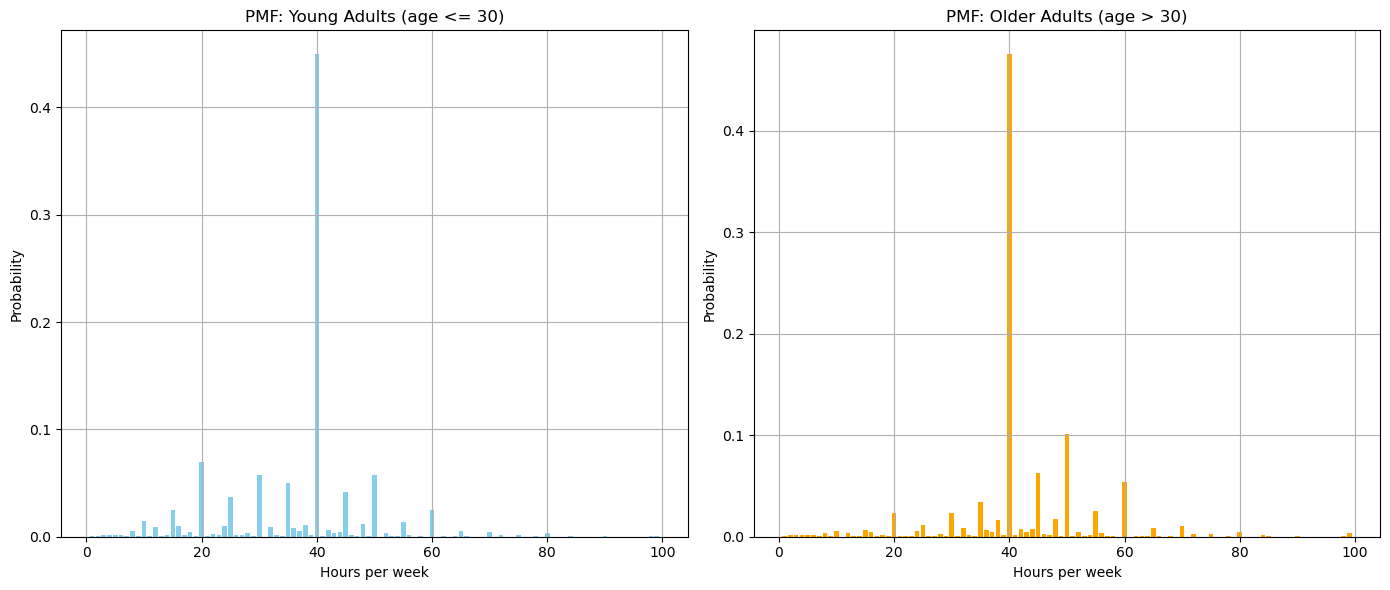

In [38]:
#Code for Implementing PMF (Probability Mass Function):

# Scenario 1: Young adults (age <= 30)
young_adults = data[data['age'] <= 30]

# Scenario 2: Older adults (age > 30)
older_adults = data[data['age'] > 30]

# Calculate the PMF for each group
young_adults_pmf = young_adults['hours-per-week'].value_counts(normalize=True).sort_index()
older_adults_pmf = older_adults['hours-per-week'].value_counts(normalize=True).sort_index()

# Plotting PMF for both groups
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# PMF for Young Adults
ax[0].bar(young_adults_pmf.index, young_adults_pmf.values, width=0.8, color='skyblue')
ax[0].set_title('PMF: Young Adults (age <= 30)')
ax[0].set_xlabel('Hours per week')
ax[0].set_ylabel('Probability')
ax[0].grid(True)

# PMF for Older Adults
ax[1].bar(older_adults_pmf.index, older_adults_pmf.values, width=0.8, color='orange')
ax[1].set_title('PMF: Older Adults (age > 30)')
ax[1].set_xlabel('Hours per week')
ax[1].set_ylabel('Probability')
ax[1].grid(True)

plt.tight_layout()
plt.show()


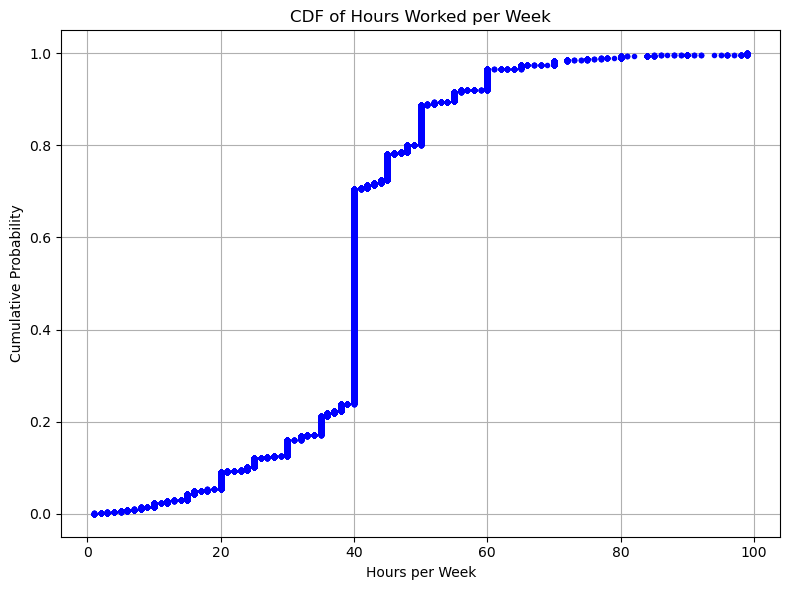

In [40]:
#CDF for hours per week variable

# Select the variable 'hours-per-week'
hours_per_week = data['hours-per-week']

# Sort the data
sorted_hours = np.sort(hours_per_week)

# Compute the CDF
cdf = np.arange(1, len(sorted_hours) + 1) / len(sorted_hours)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_hours, cdf, marker='.', linestyle='none', color='blue')
plt.title('CDF of Hours Worked per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


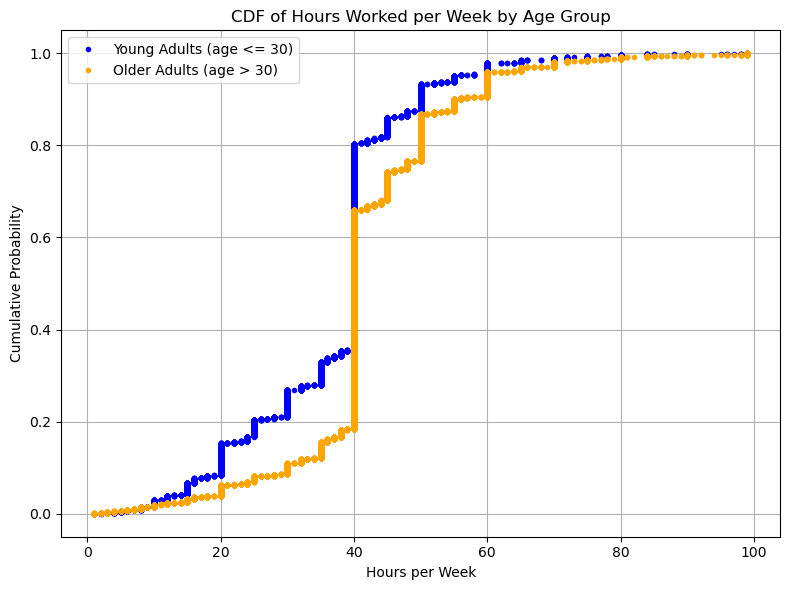

In [42]:
#comparing CDF if 2 age groups
# Filter data based on age groups
young_adults = data[data['age'] <= 30]
older_adults = data[data['age'] > 30]

# Sort hours-per-week for each group
sorted_young_adults = np.sort(young_adults['hours-per-week'])
sorted_older_adults = np.sort(older_adults['hours-per-week'])

# Compute CDF for each group
cdf_young_adults = np.arange(1, len(sorted_young_adults) + 1) / len(sorted_young_adults)
cdf_older_adults = np.arange(1, len(sorted_older_adults) + 1) / len(sorted_older_adults)

# Plot CDF for both groups
plt.figure(figsize=(8, 6))
plt.plot(sorted_young_adults, cdf_young_adults, marker='.', linestyle='none', color='blue', label='Young Adults (age <= 30)')
plt.plot(sorted_older_adults, cdf_older_adults, marker='.', linestyle='none', color='orange', label='Older Adults (age > 30)')

plt.title('CDF of Hours Worked per Week by Age Group')
plt.xlabel('Hours per Week')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


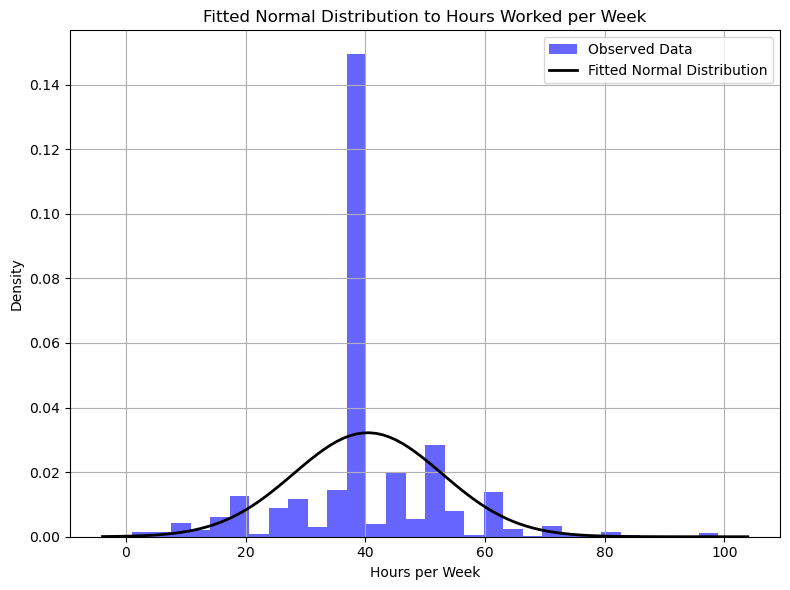

In [44]:
#Analytical distribution
from scipy.stats import norm

# Select the variable 'hours-per-week'
hours_per_week = data['hours-per-week']

# Calculate the mean and standard deviation for the normal distribution fit
mu, std = norm.fit(hours_per_week)

# Plot the histogram of the data
plt.figure(figsize=(8, 6))
plt.hist(hours_per_week, bins=30, density=True, alpha=0.6, color='b', label='Observed Data')

# Plot the fitted normal distribution using the mean and standard deviation
xmin, xmax = plt.xlim()  # Get the x-axis limits for the plot
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)  # Get the probability density function (PDF)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

# Add labels and title
plt.title('Fitted Normal Distribution to Hours Worked per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


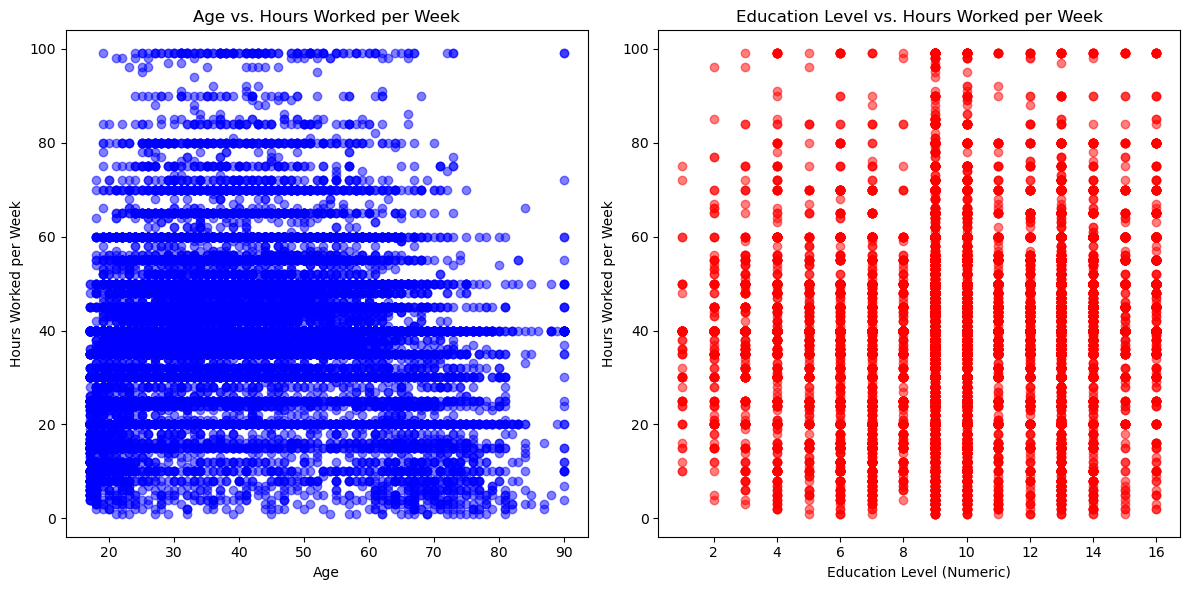

Pearson correlation for Age vs. Hours Worked per Week: 0.07155833852698291
Pearson correlation for Education Level vs. Hours Worked per Week: 0.14553558914300269
Covariance for Age vs. Hours Worked per Week: 12.157261980679044
Covariance for Education Level vs. Hours Worked per Week: 4.6644083035877655


In [46]:
#Scatter plot
from scipy.stats import pearsonr


# Remove any missing values in the relevant columns
data = data.dropna(subset=['age', 'hours-per-week', 'education'])

# Scatter Plot 1: Age vs. Hours worked per week
plt.figure(figsize=(12, 6))

# Subplot for Age vs. Hours per week
plt.subplot(1, 2, 1)
plt.scatter(data['age'], data['hours-per-week'], alpha=0.5, color='blue')
plt.title('Age vs. Hours Worked per Week')
plt.xlabel('Age')
plt.ylabel('Hours Worked per Week')

# Scatter Plot 2: Education vs. Hours worked per week (Education is a categorical variable)
plt.subplot(1, 2, 2)
education_map = {'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '9th': 5, 
                 '10th': 6, '11th': 7, '12th': 8, 'HS-grad': 9, 'Some-college': 10, 
                 'Assoc-acdm': 11, 'Assoc-voc': 12, 'Bachelors': 13, 'Masters': 14, 
                 'Doctorate': 15, 'Prof-school': 16}

data['education_numeric'] = data['education'].map(education_map)

plt.scatter(data['education_numeric'], data['hours-per-week'], alpha=0.5, color='red')
plt.title('Education Level vs. Hours Worked per Week')
plt.xlabel('Education Level (Numeric)')
plt.ylabel('Hours Worked per Week')

# Show the plots
plt.tight_layout()
plt.show()

# Calculate and print Pearson correlation for Age vs Hours worked per week
pearson_corr_age_hours, _ = pearsonr(data['age'], data['hours-per-week'])
print(f"Pearson correlation for Age vs. Hours Worked per Week: {pearson_corr_age_hours}")

# Calculate and print Pearson correlation for Education Level vs Hours worked per week
pearson_corr_education_hours, _ = pearsonr(data['education_numeric'], data['hours-per-week'])
print(f"Pearson correlation for Education Level vs. Hours Worked per Week: {pearson_corr_education_hours}")

# Calculate covariance for Age vs Hours worked per week
covariance_age_hours = np.cov(data['age'], data['hours-per-week'])[0, 1]
print(f"Covariance for Age vs. Hours Worked per Week: {covariance_age_hours}")

# Calculate covariance for Education Level vs Hours worked per week
covariance_education_hours = np.cov(data['education_numeric'], data['hours-per-week'])[0, 1]
print(f"Covariance for Education Level vs. Hours Worked per Week: {covariance_education_hours}")


In [50]:

import statsmodels.api as sm

# Remove any rows with missing values in 'age' or 'hours-per-week'
data = data.dropna(subset=['age', 'hours-per-week'])

# Define the independent variable (age) and the dependent variable (hours worked per week)
X = data['age']
y = data['hours-per-week']

# Add a constant (intercept) to the independent variable matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         hours-per-week   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     251.4
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           1.80e-56
Time:                        14:38:24   Log-Likelihood:            -1.9211e+05
No. Observations:               48842   AIC:                         3.842e+05
Df Residuals:                   48840   BIC:                         3.842e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9232      0.167    226.734      0.0